In [22]:
import pickle
import torch
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
import sys
sys.path.append("../../../..")

from datasets.morpho_mnist.dataset import ImageDataset, MetadataDataset
from auto_localization.models.IsolatedVAE import IsolatedVAE
from auto_localization.plotting.localization import save_localization_metadata_distance_plots
from auto_localization.plotting.image_sampling import plot_binned_tsne_grid

In [33]:
model_dir = "../../../logs/scarlet-wave-1280"
os.listdir(model_dir)

['model.pkl', 'localizers.pkl', 'params.pkl', 'localizer_metrics.pkl']

In [34]:
image_data = ImageDataset()

In [35]:
def load_objects(model_dir):
    # load localizers
    with open(model_dir+"/localizers.pkl", "rb") as f:
        localizers = pickle.load(f)
    # load metrics
    with open(model_dir+"/localizer_metrics.pkl", "rb") as f:
        localizer_metrics = pickle.load(f)
    # load config 
    with open(model_dir+"/params.pkl", "rb") as f:
        config = pickle.load(f)
    print(config)
    # load model
    model_path = model_dir+"/model.pkl"
    z_dim = config["model_config"]["latent_dim"]
    similarity_dim = config["model_config"]["similarity_dim"]
    reconstructive_dim = config["model_config"]["reconstructive_dim"]
    in_shape = config["model_config"]["in_shape"]
    d = config["model_config"]["d"]
    layer_count = config["model_config"]["layer_count"]
    channels = config["model_config"]["channels"]
    model = IsolatedVAE(latent_dim = z_dim, similarity_dim=similarity_dim, reconstructive_dim=reconstructive_dim, in_shape = in_shape, d = d, layer_count=layer_count, channels=channels)
    model.load_state_dict(torch.load(model_path))
    model.to("cuda")
    model.eval()
        
    return localizers, localizer_metrics, model, config

In [36]:
localizers, localizer_metrics, model, config = load_objects(model_dir)

{'trials': 1, 'epochs': 200, 'lr': 0.001, 'batch_size': 128, 'trainer': 'triplet', 'group': 'None', 'localization_config': {'indexed': False, 'trials': 10, 'k': 0.1, 'localizer_type': 'MCMV', 'num_queries': 20, 'similarity_mode': True}, 'model_config': {'model_type': 'IsolatedVAE', 'latent_dim': 4, 'similarity_dim': 2, 'reconstructive_dim': 2, 'in_shape': 32, 'd': 32, 'layer_count': 4, 'channels': 1, 'loss_name': 'IsolatedTripletLoss', 'kl_beta': 0.01, 'triplet_beta': 0.1, 'triplet_margin': 1.0, 'warm_start': 100, 'kl_max': 0.01, 'triplet_mining': False}, 'dataset_config': {'component_weighting': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0], 'which_digits': [1], 'one_two_ratio': 0.0}}


## Plots


In [37]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

/home/alec/anaconda3/envs/latent/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Error: You must call wandb.init() before wandb.log()

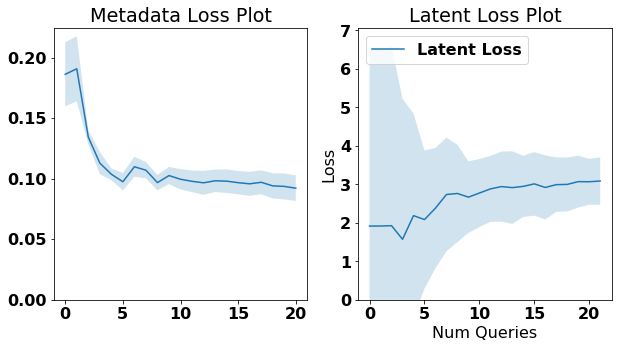

In [13]:
# plot the localization rollouts
save_localization_metadata_distance_plots(localizer_metrics)
plt.show()

In [38]:
# plot an image sampling of the latent space
# embed all the images from the test image dataset
embedding = []
for image in image_data:
    image = image.to("cuda")
    embedding_mean, _ = model.encode(image)
    embedding_mean = embedding_mean.detach().cpu().numpy()[0]
    embedding.append(embedding_mean)
    print(embedding_mean)

[ 0.79822123 -0.4118699  -0.8205547  -0.50777256]
[ 0.8647965  -0.49679133 -0.20194778 -0.10239026]
[ 1.1177038   1.7458215  -0.59418756 -0.71411943]
[0.7894217  0.32580018 1.7942609  0.15132934]
[ 0.6371037  -0.09057567 -1.0030605  -1.6101779 ]
[ 0.79194665 -1.0193584  -0.33768    -0.39359757]
[ 0.40123135 -1.0879179  -3.00289    -0.85236096]
[ 0.935089  -0.7568282 -0.6068459 -1.4385278]
[ 0.12717795  1.0778302  -2.750398    0.08357328]
[-0.04845177 -0.41185018  0.1534132  -1.0384529 ]
[ 0.2533452 -2.6714292 -1.1447498 -1.0882515]
[0.51176643 0.36687022 0.30484265 0.8018861 ]
[ 0.8598287  -1.607144   -0.77240133 -0.16421816]
[ 0.39198908 -1.6602429  -0.65698075  0.04090258]
[-0.69762564  0.34790778 -2.795753    0.48933503]
[ 0.12986025 -0.27702764  0.23403105 -1.2438501 ]
[ 0.6539546  -0.13071793 -0.4001203  -0.7104224 ]
[ 9.5395172e-01 -2.4454877e+00  1.8152148e-03 -3.5491076e-01]
[ 0.8890264   0.46413028 -0.7173109   0.7581619 ]
[-0.28233072 -0.97084737 -0.12029272 -0.30396226]
[ 1.

[-0.8927908  -0.27269092 -0.28126323 -1.2089363 ]
[ 1.5082055 -0.8999783 -0.9747316 -0.620433 ]
[ 0.9508444  -0.5257957  -1.0422434   0.02415246]
[ 0.3058353 -0.8259783 -0.7630138 -1.4445829]
[-0.01161042 -0.40461925 -3.0294464  -0.03153645]
[ 0.04179605  0.25201303 -0.0160187  -1.1904651 ]
[ 1.0274005  -0.8963226  -1.6585841   0.56663966]
[ 1.1436175  -1.8556464  -0.3433796  -0.02265984]
[ 1.0633242  -0.9490026  -0.6705249  -0.48098984]
[ 1.067818   -2.0951376  -0.9140586   0.15080914]
[ 0.24807635 -2.2067928  -0.8620365   0.01101202]
[ 0.61664486  0.8839257  -0.18805659  0.3950563 ]
[ 1.0172334  -0.50300026 -0.31797272 -0.29542053]
[ 0.2558221   0.5592469   0.02431805 -1.0278529 ]
[ 1.5251049 -0.3308281 -1.2648475 -1.2408445]
[ 0.24122009 -0.43795225 -0.29567745 -1.1025456 ]
[ 1.4743862   0.27017462 -1.4475905  -1.0754691 ]
[ 0.3677317  -2.120734   -0.30495605  0.17523201]
[ 1.2189549 -1.3010659 -1.0885093 -0.5245073]
[ 1.234161   -0.77834904 -0.67730904 -0.11923173]
[ 0.11037622 -2.

[ 0.02098277  0.36489248 -0.97080916 -1.1778373 ]
[ 1.2520229  -0.88922155 -0.5723363  -0.9873166 ]
[-1.5599078   0.407391   -1.0095854   0.47286695]
[ 0.8170264  -1.2428586  -1.1631715   0.32761064]
[ 0.31881186 -1.8876781  -1.0705558  -0.18547413]
[ 1.2894162   0.55722487 -0.9291601  -1.7871252 ]
[-1.1093606  -0.20158622 -1.2913593  -1.1508243 ]
[ 0.8743279  -0.2840245  -0.88926035 -0.43533084]
[ 0.9564825  0.554137  -1.1287082 -1.2325623]
[-0.22512683  0.80009615  0.07471196 -1.9672654 ]
[ 1.098652  -1.6664035 -1.9429218 -0.9998002]
[ 1.2886018  -0.7183627  -0.49986026 -0.8728757 ]
[ 1.0766693  -0.9932035  -1.4869583   0.14813036]
[ 0.28293806 -0.62514436 -0.2470685  -1.425787  ]
[ 0.8667582  -0.9555937  -0.22476733 -0.780771  ]
[-0.14826855  0.5422516   0.4047147  -1.4295065 ]
[ 1.0511575  0.2943611 -0.8090027 -0.892123 ]
[ 0.8311503  -1.5299616  -0.34648523 -0.95230913]
[-1.0478656  -3.256475   -2.0373993   0.19696961]
[ 0.12200014 -0.6592108  -0.45789716 -1.3362976 ]
[ 0.91160476

[ 0.986809   -0.52551234 -0.44438943 -0.6859176 ]
[ 1.0700264  -0.21134228 -1.5139638  -0.9656279 ]
[ 1.0389397  -0.04763445 -0.17158131 -0.19531214]
[-0.9798269  -1.6814654  -0.56286913 -0.52152133]
[0.76401854 0.66561115 1.6821803  0.6219594 ]
[ 1.2703273  -1.4783967  -1.1715025  -0.42749247]
[ 0.92922914 -0.5980927   0.2864412  -0.72851896]
[-1.1334373 -3.0015097 -1.6639855 -1.3455962]
[ 1.1658683  -0.2781028  -0.30264235 -0.82646406]
[ 1.1678722   0.62865925 -1.4413766   1.9721669 ]
[ 1.2945318  -2.0592809  -0.07561449 -0.38335082]
[-0.8428191   0.88128614  0.7751331  -0.9288105 ]
[ 0.8596301   0.01617187  0.27550393 -0.24333432]
[ 0.5071745   0.94697    -1.1619862  -0.99476326]
[ 1.5072112  -1.0907421   0.04343867  0.61997914]
[ 1.2484075  -0.27749458 -1.4213501  -1.3198256 ]
[ 0.22675224 -2.3057704  -0.20743982 -0.42728707]
[ 1.0668218   0.41316268 -1.4753191  -1.3719871 ]
[ 0.1985172   0.43586975  0.04064486 -0.40156755]
[ 0.54017717 -0.9296236   0.02354655 -0.9657506 ]
[ 0.4266

[ 0.5107571  -2.1230218  -0.02664917 -1.1783386 ]
[ 0.17751457 -0.89672756 -0.6903185  -0.96776223]
[ 1.4381553  0.5948981 -1.6734873 -0.5498917]
[ 1.0555676  -1.365244   -0.66970867 -0.53891766]
[ 0.2522323 -1.2549182 -2.3982801 -1.3386601]
[ 0.35313413 -1.7556748  -0.41972354  0.02280113]
[ 1.4793706   0.27219474 -0.8075666   0.03316259]
[ 0.32659844 -0.58641005  0.27754334 -0.7926959 ]
[ 1.2090095   0.02167061 -1.7066712  -1.9429636 ]
[ 0.88493514 -3.017934    0.23422664  0.41726044]
[ 0.5423703  -1.0733994  -0.82722133 -0.50817823]
[ 0.33723116 -0.61653876 -0.7267525  -1.7505169 ]
[-0.7115855   1.3083054   0.37152207 -0.73080707]
[ 0.8716892  -1.2321547  -1.6893191  -0.24961355]
[ 0.30060732  0.17049608 -0.7249262  -1.7167268 ]
[ 0.6823915  -0.49820098 -0.15789172 -1.8715041 ]
[ 1.3400915  -1.740859   -0.06730203  0.09281906]
[ 0.99528253 -0.8792341  -0.49952632 -0.0956898 ]
[ 1.3938099  -2.4343758  -0.9684607  -0.31858382]
[ 0.33526197 -1.5913664  -0.43984067 -0.09577829]
[ 0.9309

[ 0.3178985  1.1413418 -1.0512283 -0.6993904]
[ 0.28300235 -1.548106   -0.4653152   0.23245406]
[ 1.1402123   0.25181377 -0.564703   -0.21859992]
[ 0.7839352  -0.5938555  -0.08938454 -0.27187037]
[ 0.71237195  0.42903382 -1.6969258  -1.9639707 ]
[ 0.9246503   0.6966307   1.4346702  -0.42302832]
[ 1.0204767  -0.41089794 -0.826769   -1.1717447 ]
[ 0.94321156 -1.593957   -0.18969816 -0.64669883]
[ 1.1308444  1.0415959 -1.5154506 -0.8219348]
[ 1.1475188  -0.8285639  -0.43802717 -1.1460153 ]
[ 1.225648   -0.04041594 -0.76336426  0.3788044 ]
[ 0.3604794 -0.5308354  0.2079089 -0.8364228]
[ 1.0044001   0.19014196 -0.633769   -0.23469326]
[ 0.85629785 -2.2662437   0.21207112 -0.16041747]
[ 1.4601492  0.5097654 -0.7625986 -1.3577151]
[ 0.91221154  0.04983827 -0.34760877  0.04597353]
[ 0.89023733 -2.5435271  -1.5344185  -0.00496595]
[ 0.75476754 -0.5289211   0.06443202 -0.97923696]
[ 0.36108935 -1.9689455   0.37184474 -0.15199381]
[ 1.0405915  -0.14285347  1.70422     1.0817753 ]
[-1.7725968  -3.

[ 1.3504922e-04  4.5378092e-01  6.0053676e-01 -6.1453140e-01]
[ 0.6958709  -0.14373592 -0.48839286 -1.0916923 ]
[-1.8726854 -1.9049535 -1.0572232  0.5451297]
[0.50131106 1.2178874  1.5432627  0.8022938 ]
[ 0.64626074 -1.3786582  -0.6168662   0.3574409 ]
[ 0.7744347  -0.8577107  -0.37306857 -0.43698356]
[-0.4626104   1.9411478   0.28673768 -0.5684782 ]
[ 0.52700293 -1.2380157  -0.2552715  -0.15891773]
[ 0.94341457  0.1360266  -0.44617262  0.22890198]
[ 0.770875   -1.5610406  -0.6631935   0.20682102]
[ 0.50673914 -2.687627   -1.4142084  -0.04787493]
[ 1.2162918   0.08580695 -0.4996731  -0.30456313]
[ 0.44217435  0.3740259  -0.8270944  -1.4824896 ]
[-0.43469223  1.7581772   1.6524276   0.41819194]
[ 1.1541094  -1.8876858   0.05844104 -0.5617044 ]
[ 1.4148291  -0.9899198  -0.5252493  -0.31240427]
[ 1.4045231  1.221362  -1.3231393 -0.5337292]
[ 0.32811219 -0.8084538   0.22959232 -0.44844547]
[-0.37127045 -2.8157868  -1.4701898  -0.26472202]
[ 1.3516583  -0.8714142  -0.63819826 -0.47844103]


[-1.0160322 -0.6236092 -2.1598637 -1.4398966]
[ 0.5591786 -1.8454552 -0.6931241 -2.5792985]
[ 0.9320675  -1.6815177  -0.43685555  0.17261848]
[ 1.0878133  -3.19414    -0.898986   -0.29837304]
[ 1.1182175   1.055346   -1.6512531  -0.90570974]
[ 0.47521064 -2.3882983  -1.8290097   0.05640966]
[ 1.3473995   0.48735714 -1.2660638  -1.1414845 ]
[-0.9264982 -4.433242  -0.2514346 -1.128444 ]
[ 1.7135637 -0.428099  -2.001409   0.944888 ]
[ 0.4900711 -2.091767  -0.9349135 -2.1416357]
[ 1.3963004  -2.0451844  -0.39703357 -0.17280209]
[ 0.22153321 -3.1441302  -0.2925721  -1.3243729 ]
[ 1.1237757  -0.45928952 -0.41158667 -0.42025056]
[ 0.14086008 -2.9731255  -0.45380265 -1.1578515 ]
[ 0.4573432  -3.04046    -1.0321045  -0.17416382]
[ 0.72867405 -3.7452028  -0.47519076 -1.3404956 ]
[ 0.64310145 -2.1373556  -0.45875436 -0.56228125]
[-0.08224352 -5.0288067  -1.0094843  -0.6792463 ]
[-0.6165383  -0.84026074 -0.81784666 -0.10219452]
[-0.0207302  -3.6448967  -0.60519344 -2.1964753 ]
[ 0.87856424  0.2064

[ 0.8866006  -1.166826   -0.44979295 -0.80811715]
[ 0.8011333  -0.21411738 -0.52793515 -1.3196126 ]
[ 0.70787    -1.1285516  -0.9555087   0.72105813]
[ 1.2905438   0.0095543   1.3341006  -0.03929107]
[ 0.6652869  -2.0198317  -0.07878634 -0.6813103 ]
[ 0.91911924 -0.45467308 -0.46459952 -1.4674408 ]
[ 1.0604118  0.5707754 -1.1101542 -0.6639   ]
[ 0.92974496 -0.34338054 -0.26921135 -0.22929892]
[ 0.9471129  -0.63256    -0.71333045  0.00430661]
[-2.4334936  0.5994814  0.0054527 -1.0597568]
[ 1.2603154   0.76465034 -1.013508   -0.2291627 ]
[ 1.1353465  -1.3429029  -0.31890726  1.0274613 ]
[ 0.3769068  -1.4906665   0.43248898 -0.6313368 ]
[ 1.1117857   0.06919944 -0.43920398 -0.9226887 ]
[ 0.02172184 -0.35062638 -1.2931595  -0.60705376]
[ 0.83247817  0.22105572 -0.74389803 -1.5974253 ]
[-0.30846527  1.1932874   0.29678118 -0.5141195 ]
[ 0.5831117   0.30124733 -0.6599614  -0.27559593]
[ 0.97146094 -0.6780342  -0.591837   -0.14600411]
[ 0.7052591  -0.76897764 -1.3441979   0.06898382]
[-0.3050

[-0.04915723  1.27107    -0.6163262  -1.2615954 ]
[ 1.3178563  -0.43012765 -0.4310522  -0.01131849]
[ 0.65956545 -3.0178082  -2.022686   -0.99644375]
[ 0.47300997 -1.9773681  -0.01655485 -0.6553596 ]
[ 1.2591274   0.21116135 -0.5285089  -0.42903075]
[ 1.205767   -0.39562866 -0.37404722 -0.16205391]
[ 0.6578419 -1.3305494 -0.391779  -0.4687198]
[ 0.5514164  -2.0105531  -0.025906   -0.59679496]
[ 0.96424484 -0.5587064  -0.7113834  -0.7375742 ]
[ 0.28820008 -0.6255553  -0.60006714  0.55284446]
[ 1.1722313  -2.054776   -0.7086088  -0.39249578]
[ 0.15522277 -0.7528416  -0.6146086   0.02660741]
[ 0.4616639   0.13557689 -0.871487   -0.34149048]
[ 1.0505625 -2.1506624 -0.4751957 -0.7252463]
[ 0.7746793  -2.0577257  -0.49653345 -0.6919925 ]
[ 0.33369306  0.24088828 -0.39625412  0.5791024 ]
[ 0.75977993  1.5708627  -2.8449478   0.5839956 ]
[-1.4950557   0.25285518  1.4795599   0.4605737 ]
[ 0.49099404 -1.6435363  -0.71356386 -1.1638438 ]
[ 0.43107423  0.9020994  -0.60155815 -0.80855477]
[ 1.4323

[ 0.55496264 -0.87667966 -1.4131557  -1.9599774 ]
[ 0.8378849 -0.1123322 -1.1413957 -1.094619 ]
[-0.38816175 -3.451502   -1.1767999  -0.25626072]
[ 1.1026621   0.15370457 -0.39598665 -0.42846617]
[ 0.21149956 -1.7501843  -0.8263013  -1.9242995 ]
[ 0.48893532 -2.2032857   0.2785506  -0.15070388]
[ 0.586519  -2.8451672 -0.7625191 -0.4097744]
[ 1.0192521  -0.49683693 -0.45284176 -0.6604035 ]
[ 0.78827083 -1.795274   -1.5298994   0.00466181]
[ 0.56155956  0.4483109  -1.558406   -1.9096241 ]
[ 0.962844   -1.191106   -0.49361095 -0.84244823]
[ 0.5960069   0.07068472 -0.96299326 -0.9292314 ]
[ 1.1795176  -1.2019545  -0.8064109  -0.26605296]
[ 1.2193741  -0.5691253  -1.4302149  -0.41286132]
[ 0.9762739  -3.5433335  -0.586066   -0.70690405]
[ 0.6810715  -2.7893147  -0.66070503 -0.21164441]
[ 0.48840833 -2.3209932  -0.544332   -0.8734503 ]
[ 0.94177985 -1.2269658  -0.34825805  0.03888133]
[ 0.8368807 -0.187671  -0.8241878 -2.3865218]
[ 1.0621595   0.79793775 -1.4972408  -1.0779308 ]
[ 0.85279274

[-1.0109733   0.9835311  -1.1216372   0.05159546]
[ 1.4940884  -1.4773772  -0.73009473 -0.5330486 ]
[-2.4407616   0.21443748 -0.64568955 -0.9556608 ]
[ 0.04847651 -1.7751789  -0.64178836 -1.9111178 ]
[ 0.5262737  -0.97573745 -1.0759655   0.68069434]
[ 0.5659871 -1.6620762 -0.6002874 -1.0343598]
[ 0.24513122 -0.3003538  -0.4653487  -1.4258878 ]
[ 0.858562  -0.4992073 -1.7401899 -1.271728 ]
[-0.14119783  1.3644383   0.13504487 -1.020959  ]
[ 1.264763   -1.289229   -0.6550849  -0.03914961]
[ 1.0117186  -1.9599953  -0.67613864  0.3036726 ]
[ 1.1185971  0.6372058 -1.6614968 -2.2019072]
[ 1.0359108  -0.9444659  -0.36332485 -0.73917115]
[ 1.2980715  -0.55964625 -0.41983125 -0.23956543]
[ 1.5746186  -0.50652695 -2.0454643   0.42320633]
[ 1.1447556  -2.049816   -0.59148175 -0.6002878 ]
[ 0.3453105 -2.6888793 -1.0091745 -1.927877 ]
[-2.5626926  -0.5479219   0.21797568 -0.1723943 ]
[ 0.8488884  -1.6086209  -0.8166913   0.42508888]
[ 0.34818503 -2.2202482  -1.0920739   0.21045369]
[-2.2620673  -1.

[ 0.96668017  0.3584332  -1.6061877  -2.1968062 ]
[ 0.6402451  -2.4388008  -0.61233324 -0.9563124 ]
[ 0.5956772  -0.28802368 -1.1602179  -1.5931802 ]
[ 1.1428529  -0.1549496  -0.928123   -0.21518809]
[ 1.2391342  -0.55299973 -1.8870989  -0.58888865]
[ 0.791512    0.403153   -0.5830274   0.14896837]
[ 1.2848121  -0.54621994 -0.3958617   0.08477998]
[-1.1258451 -2.9272351 -1.7570535 -0.6271486]
[ 0.8476913  -1.5995277  -0.83518875 -0.06353039]
[ 1.0650213  -0.21246043 -0.8647488  -0.37066808]
[ 1.4648058  -1.1415068  -0.84876496 -0.08895132]
[ 0.86684513  0.27670634 -0.48168778 -0.732604  ]
[ 0.42202634 -0.9284365  -1.3596519  -1.5539455 ]
[ 0.7574408  -0.67178345 -0.5623337  -0.66202545]
[ 1.1592515  -0.9593458  -0.40430334 -0.20623395]
[ 0.18783551 -0.64948785 -0.7766588  -1.9834409 ]
[ 0.5964046  -0.03783286  1.8778472   0.7309562 ]
[-0.31093344  0.6625433  -2.2126508  -1.1586688 ]
[ 0.91339993 -0.7132604  -0.23827285 -0.74908864]
[ 0.8079058  -0.48612896 -0.9700363  -1.5013714 ]
[ 1.

[ 1.0137895  -1.2211772  -0.28601435 -1.0100989 ]
[ 0.13116027 -2.3359077  -0.79287493  0.25076705]
[1.3656478  0.05170834 1.5617207  0.2128393 ]
[ 0.81269205 -1.3210366  -0.68095005  0.01954569]
[ 1.0348365  -2.0908542  -0.31362832 -0.5030669 ]
[ 1.3405445  -2.9721138  -0.40852827  0.5160334 ]
[-0.03735578 -0.87192035 -0.15175398 -0.38480768]
[ 1.8109463  -0.75445867 -0.68869084 -0.14096645]
[ 0.65178347 -2.5011523  -0.39812696 -0.4723496 ]
[ 0.08167396  1.3515292  -1.1864974  -1.538708  ]
[ 1.1071895  -0.22032282 -0.40780193 -0.6011411 ]
[ 0.38656792 -0.5614512  -1.2648631  -0.79611254]
[ 0.71814895 -0.9802017  -0.36348203 -0.07905661]
[ 0.5411824  -0.5715909  -0.33668232  0.77455103]
[ 1.0560714  -0.22522    -0.29779443 -0.6705041 ]
[ 0.9648825  -0.90693367 -0.11426657 -0.7067436 ]
[ 0.5639838  -1.5145434  -0.8585233   0.39485738]
[ 1.2079643e+00  7.4735284e-04 -6.5822703e-01 -8.8243365e-01]
[ 0.36765695 -1.3623168  -0.0479781  -0.7343608 ]
[ 0.6183106  -0.31614074 -1.0009129  -1.86

[ 0.8102815 -2.3402941 -0.7169777 -0.1485405]
[ 0.49939778  0.05987541 -2.9671009   0.78988934]
[ 0.6293555   0.42356056 -0.7117805  -1.4374652 ]
[ 0.74288034  0.9802071  -0.6540902   0.08597994]
[ 0.00662157 -0.4754164   0.06417168 -1.6601071 ]
[-1.6062613   0.46367916  0.7788135   1.2810594 ]
[ 0.95477855 -1.0702974  -0.40481192  0.2854256 ]
[ 0.22964928 -1.7782738  -0.36602587 -0.6342329 ]
[-0.19968978  0.00329787  1.9751722   0.32856274]
[ 0.93585026 -1.7161472  -1.2515949  -0.21515906]
[ 0.5560154 -0.2709824 -0.8303563 -1.1907172]
[ 0.85999954  0.2596602  -0.7493018  -0.05129689]
[ 0.58162475 -1.396896   -0.26828274 -1.3997005 ]
[ 1.3939039  -1.7535806  -0.46867764 -0.7423587 ]
[ 0.15515333 -0.42296687  0.21280998 -1.3795621 ]
[ 1.1548553  -0.16284415 -0.74958503 -0.5039307 ]
[-0.2511442  -1.0377178   0.25306386 -1.5969026 ]
[ 1.010652   0.8638183 -1.1723198 -1.8206662]
[ 0.87419844 -0.9959477  -0.5940397  -1.0339379 ]
[ 1.219169   -0.33903417 -1.3241851  -0.9245969 ]
[ 1.1742387 

[-1.6439719  -1.5887614  -1.3789275   0.05813038]
[ 0.8701091  -2.1402657  -0.6229139  -0.43637332]
[ 1.254657    0.44359893 -1.0730774  -1.2935991 ]
[ 1.273683  -1.3065555 -0.8867472 -0.4073979]
[-1.6007632  -3.55606    -1.4083234  -0.71360695]
[ 1.1156019  -1.16419    -0.38449535 -0.606025  ]
[-2.026633   -2.2120278   0.74020106 -0.41101357]
[ 0.9597424  -0.9999281  -0.16087103 -0.4161314 ]
[ 0.5803771  -0.29597065 -0.5448275  -0.8146678 ]
[ 0.7429788   0.09224346 -0.73637086 -0.9788612 ]
[ 1.4832509  -0.5048778  -0.59647304  0.13177189]
[ 1.0478317  -1.3344126  -0.5661203  -0.63870084]
[-0.11870739 -1.4351673  -1.6094106   0.37981874]
[ 0.8699293  -0.04643524 -0.7306235  -0.7380711 ]
[ 1.2482231 -1.1986905 -0.539847  -0.788574 ]
[ 0.9771086   0.17066623 -0.03392045 -0.390933  ]
[ 1.0942477   0.15840203 -1.2990307   0.16691329]
[-1.7082665 -2.755479   0.5419463 -0.5020269]
[ 0.9632516  -0.76351786 -0.69329715  0.2699348 ]
[ 0.4248406 -0.747666  -0.8911215 -1.7390181]
[ 0.6172948   0.

[ 0.7627945 -0.590762  -0.861747   0.1807283]
[ 1.5353941  -1.3757861  -0.1483661   0.33377743]
[ 0.18802248 -0.12005916 -0.0236162  -0.5736643 ]
[ 1.445525   -0.47924486 -1.1167938  -0.3407127 ]
[ 0.688218   -0.2684578  -0.95412225 -0.765833  ]
[ 1.1313223 -2.6182246 -1.7947639 -0.1290769]
[ 0.33842447  0.82480633 -0.39882046 -0.59836733]
[-1.2596883 -0.9062922 -0.07909   -1.1540366]
[ 0.16469324 -0.7224481  -0.12735718  0.07413268]
[ 1.3387552  -0.7763138  -1.4737699   0.00474301]
[ 0.32443088  0.03612961  0.1814087  -0.59373116]
[ 0.9641739  -0.02620614 -0.19161245 -0.38195166]
[0.60569143 0.36534402 0.6293539  0.03670405]
[ 0.9543749 -1.4156604 -1.045185  -1.118384 ]
[ 0.9792234  -0.00776389 -0.32547614 -0.16817889]
[-2.0264943  -1.4893056  -0.07982642  0.04536035]
[ 0.3401784  -0.21906367  0.14814612 -0.50182986]
[ 2.1106749  -0.04893151 -2.086473    0.50144666]
[-0.23355067 -0.70630884  0.26219445 -1.1046681 ]
[ 0.9698763  -1.0176872  -1.9685954  -0.16931906]
[ 0.69075346 -1.9084

[-2.0817068  -0.8511367   1.1173432   0.28503573]
[ 1.1128827   0.3097065  -0.96415144 -0.83837724]
[-0.00918978 -0.32378575 -0.15394944 -1.7849753 ]
[ 1.4474301  1.1860604 -1.0186799 -1.3774048]
[ 0.66823936 -2.5939405  -0.28205585 -0.7104231 ]
[ 0.98472583 -1.4387716  -0.23106804 -0.46029106]
[ 0.24921152 -2.0048983   0.47256464  0.9120171 ]
[ 1.5228444   0.21796395 -0.8269906  -0.45879814]
[ 0.52751374 -0.90073514 -0.86296064  0.27977857]
[ 1.095079   1.3347452 -1.6567665 -1.1040437]
[ 1.0898218  -1.5402412  -0.1884703  -0.28466326]
[ 1.0892925  -1.1958034  -0.3546469  -0.14880657]
[-0.1020989   0.7514677   0.10571044 -1.4039935 ]
[ 0.5564641   0.07762834 -1.0121803  -1.4893831 ]
[ 0.12338118 -2.159247    0.02706229 -1.0047072 ]
[ 0.28844273  0.74503744 -1.5328385  -1.2754866 ]
[-0.09551412 -1.2572749  -0.27329388 -1.6477357 ]
[ 1.3493713  -1.7748048  -0.33948773 -0.43689117]
[ 0.19116879 -0.27687278  0.32452428 -1.056104  ]
[ 1.0486065 -0.0206857 -1.1262892 -1.0379568]
[-0.26003402

[ 0.35367593 -1.456993   -0.23549443  0.15598753]
[ 0.72336483 -2.6396189  -1.0347806  -0.91157305]
[ 0.28110194  0.3528307  -0.09014447 -0.8675916 ]
[ 0.81645286  0.35405228  0.03273488 -0.7923318 ]
[ 0.7882638  -1.6549021   0.68015796 -0.5352291 ]
[ 1.2861016   0.15914132 -1.1894954  -1.2979418 ]
[0.04719278 0.9542012  1.8136129  0.39214927]
[-0.05085728  0.89786446 -0.22029349 -1.0607601 ]
[ 0.9694369  -0.33391008 -0.2720755  -0.32412267]
[-2.0384297  -2.8397756  -0.30501765 -0.06149936]
[-0.82644224  1.4593184   1.3832719   0.9318031 ]
[-0.5731479 -4.4055448 -1.476225  -1.1118119]
[ 1.1990364   0.15902646 -1.2782226  -0.33422413]
[ 0.8950951  -0.8602234  -0.46591905  0.05299246]
[ 0.9123206  0.7459527 -1.3047575 -1.2032539]
[ 0.97617745  0.32202336 -0.76550937 -0.05108163]
[ 0.67348564 -0.7705282   0.23761106 -0.07086454]
[ 0.119385   -0.79514134 -0.3170394   0.28474385]
[ 0.04335299  0.60717994 -0.0659247  -0.4561629 ]
[-1.8493328  -1.9701159   0.08283947  0.58191776]
[ 0.6489999 

[-0.6330788 -2.3747365  1.2912728 -0.3938199]
[ 0.734128   -0.84865737 -1.0699757  -0.7875432 ]
[ 1.7198951  -1.4188364  -0.64533275 -0.28522527]
[ 1.4684265   0.03513837 -1.5678915  -0.4795055 ]
[ 1.3132122 -1.7917001 -0.7108651 -0.5848758]
[ 1.1108254  -0.90676665 -0.813003   -0.30908474]
[ 1.6660588   0.02397615 -1.5500692   0.05406156]
[ 1.4932983  -1.0511969  -0.96020025  0.09372613]
[ 0.6571015  -0.23536769 -0.40987855 -0.6875608 ]
[ 1.2391255 -2.6424642 -0.9087347 -0.978585 ]
[ 1.2490963  -0.58892477 -1.2368108   0.21039033]
[ 1.728588   -1.8201165  -0.41385686 -0.06939758]
[ 0.68983245 -1.0465353  -1.1856288  -1.0387934 ]
[ 1.4533708   0.44806388 -1.6061517  -0.93786204]
[ 1.043734 -2.238657 -0.614772 -0.64333 ]
[ 1.1140486  1.3364899 -1.296284  -1.0318518]
[-0.52544665  0.09062569  0.5578946  -0.3004767 ]
[ 1.223742    0.17698188 -0.44244105  0.17304158]
[ 1.0362983  -1.1782045  -0.7968083  -0.01223189]
[ 1.2811457   0.23738948 -1.6956486  -0.6094483 ]
[ 1.5513777  0.3581751 -

[ 0.27748498 -0.2874271   0.20950836 -0.72176826]
[ 0.8050959  -1.8662565  -0.9514483   0.15976137]
[ 1.1558738   0.91419446 -1.1942835  -0.6816956 ]
[ 1.4245842  -0.73605156 -0.7657513  -0.22720107]
[ 1.2417077  -0.24877605 -1.1192195   0.01549709]
[ 1.1883293   1.013232   -0.38095555 -0.17667013]
[ 1.2272675  -0.73408425 -1.7587777   0.01262878]
[ 0.8947581  1.1018519 -1.0307406 -0.5816206]
[ 1.2298915  -0.27898362 -1.4808283  -0.9678464 ]
[-0.82371414  0.72103405  1.9021279  -0.41039672]
[1.5235243  0.6434336  0.65401876 0.45360604]
[ 1.2646327  -0.8481475  -0.5448352   0.22560434]
[-0.1785132 -0.7060281 -3.0169315  0.3111583]
[ 1.1449194   0.04587734 -0.7061358  -0.73066175]
[-0.08420184  0.01838741 -2.8008363  -0.21212724]
[ 0.73079205  0.6954973  -0.61056525 -0.33740225]
[ 0.5872196   1.6205739  -1.3400306  -0.85191214]
[ 0.20321    -0.23671505 -0.08444856 -0.88291454]
[ 0.9243642   0.46796283 -0.48498762  0.158813  ]
[ 1.016667   -2.444287   -0.46964693 -0.57363415]
[ 0.97075415

[ 0.7108635  -1.2384593  -0.8421921  -0.99225485]
[ 0.9960772   0.29726765 -0.11063958 -1.2352152 ]
[ 0.14871676 -2.2946248  -0.47853747 -1.4786693 ]
[-0.5796462   0.05908805  1.6322215   1.0340837 ]
[ 1.080643   -1.9416788  -1.5954843  -0.38836202]
[-0.15731427 -1.0466169  -0.15889397 -1.7658687 ]
[ 0.3709319  -0.88523984 -0.30613023 -0.7914928 ]
[ 1.2661158  -0.40649393 -0.19843905 -0.38432875]
[ 0.6867118  -1.6649709  -0.8011784  -0.44992873]
[-0.09073126 -0.380304   -0.50151855 -1.273663  ]
[ 1.5284902  -0.44985244 -1.7208585  -0.56822884]
[ 1.1115077  -0.40560248 -0.32178915 -0.58252573]
[ 0.9514319  -1.6321245   0.19606313 -1.0269449 ]
[ 1.4213474  -0.922284   -0.07522719  0.17205966]
[ 0.40740722 -0.29994437 -1.2091008  -1.2480601 ]
[-0.15282354 -0.89527285 -0.6613568  -0.46567985]
[ 0.6130483  -0.15088359 -1.1412804   0.12280147]
[ 0.7734095  -0.6218133  -1.1619079   0.56933796]
[ 1.4730885 -1.2404153 -0.7716646 -0.1412091]
[-0.06636624 -0.487909    0.568913   -0.96718085]
[ 1.

[-0.63138986  1.0648519   0.8202001   1.504267  ]
[ 1.0572413   0.15083183 -0.2592799   1.3861297 ]
[ 1.0875034  -0.5408611  -2.1698666  -0.49728897]
[ 0.27498576 -2.2886047  -1.041918    0.56008136]
[ 1.0519937  -1.0315278  -1.4448174   0.18958996]
[ 0.6503571 -1.5146624  0.1046664 -0.9304602]
[ 1.612877   -0.67458105 -1.96118    -0.16457492]
[ 1.2029558  -0.7857938  -0.4878265  -0.17412698]
[-1.0270332 -2.2195747 -2.1490428 -2.0941284]
[ 0.25350514 -1.1197302  -0.658277   -1.3773031 ]
[-1.923548   -1.3988364  -1.1889503   0.36626983]
[ 1.7246368  -0.02724713  1.2374408  -0.20095423]
[ 1.1980368  -0.33046457 -1.2386378  -1.6584754 ]
[ 0.90573657 -0.5936438  -0.35933912  1.00027   ]
[-2.367657   -0.91080356  0.3817829  -0.01999736]
[ 0.9022094  -0.02455452 -0.4716199  -0.7781626 ]
[ 1.4304447  -0.61782265 -1.0684391  -0.55337167]
[ 0.08463019 -0.64287734 -0.12920463 -1.3216543 ]
[ 0.95974314  1.3679214  -0.84647614  0.16224417]
[ 0.5957484 -1.1711614 -0.7085964 -0.6954398]
[ 1.2114908 

[ 0.50790435  0.4146152  -0.3691667  -1.2904321 ]
[ 0.5023832   0.13467193 -0.6373512   0.27820772]
[-0.08080795  1.0849444   0.27004325 -0.5700412 ]
[ 0.40470394 -0.27285776 -0.5247507  -1.1257584 ]
[ 0.49124888 -2.21676    -0.17411667 -0.10475275]
[ 0.8098055  -1.7014763  -0.03398483 -0.4345589 ]
[ 1.5669309  -1.666591   -0.4856881  -0.14464119]
[ 0.6610794  -0.23543403 -0.26709145 -0.34054777]
[ 1.5553902  -0.28516695 -0.6463269   0.35387516]
[-0.206121   -0.02226657  0.37177995 -1.1651855 ]
[ 0.03385347 -1.3053735  -1.4563056  -0.87849355]
[ 8.6969173e-01 -1.0043983e+00 -4.9588907e-01  3.6925077e-04]
[ 0.92871   -1.3104869 -1.0294173  0.5112821]
[ 0.3383029  -0.84559953 -0.7729787  -0.15980062]
[ 1.2270889   0.42490032 -0.9480944  -0.6340052 ]
[ 0.45482305 -0.47597638  1.5608947   1.6776538 ]
[ 0.8379289   0.3931356  -0.72279143 -0.3079532 ]
[ 0.02003153  0.11529653 -0.37350503 -1.7105592 ]
[ 1.1317468   0.925776   -1.5480202  -0.54730785]
[ 0.43661857 -2.073104   -0.4193356  -0.31

[ 0.47566143 -2.7009332  -1.4466673  -0.3998423 ]
[ 0.49394864 -2.5493011  -0.8023647  -1.2559342 ]
[ 1.2421638   1.1108328  -1.1661626  -0.44591716]
[-0.25885656 -0.6797502  -0.79140663 -1.42285   ]
[-1.701265   1.1538285  1.1490757  0.7177583]
[ 0.4306092 -2.2775958 -1.1069019 -1.7420268]
[ 0.01528656 -2.6345425  -1.0279247  -0.15139207]
[ 1.5421126  -1.0985659  -0.6225237  -0.25054136]
[-0.05087429 -0.1965416   0.12672257 -0.22264448]
[ 1.2839599  -1.5937842  -0.60978985 -0.10477355]
[ 1.0851303 -0.334533  -1.3877838 -1.1658345]
[ 1.1748756 -2.042705  -1.3425497  0.1361322]
[ 1.3235514  -0.31316224 -0.15433836 -0.17137316]
[ 0.9154515  -1.4857401  -1.1612309   0.34264636]
[ 0.20017079 -0.23019817 -2.895955    0.8940809 ]
[ 0.82450795 -0.0737088  -0.515552   -0.00095901]
[ 0.17267333 -2.0265307  -1.0929716   0.27480873]
[ 0.2356745 -2.8729975 -0.8770866 -1.7106184]
[ 0.86017275 -0.47743377 -0.57536614 -0.61005306]
[ 1.2391523  -1.3517437  -0.4314671  -0.33678633]
[ 1.3171635  -0.2737

[ 0.8497033   0.47199503 -0.9368549  -0.11596891]
[ 0.74072313 -3.365045   -0.74720705 -0.8271198 ]
[ 0.5152018  -1.177795    0.06026249 -0.50993824]
[ 1.2219918  0.3206952 -0.9300398 -1.7261529]
[-2.2853916 -0.5410669  1.0503556 -0.3320844]
[ 0.6077462  -2.8986862  -1.3887118  -0.10661307]
[ 0.24977835 -1.7287879  -1.439794   -0.03179227]
[ 0.1712456  -0.21171582  0.00275379  0.20383903]
[ 0.717147   -0.8522183  -2.007382    0.88446236]
[ 1.2444122  -0.31300524 -0.41899657  0.22063819]
[ 0.48054817 -2.7383587  -0.4507775  -0.589998  ]
[ 0.02567723 -4.075242   -2.5218048  -0.6821693 ]
[ 0.68569577  0.14695093 -0.6836079  -0.44961032]
[ 1.6217606  -2.0174024  -0.5808449  -0.60705435]
[ 0.7301122  -1.2827353  -0.85230136 -0.10681674]
[ 1.3633524 -1.2570958 -0.3495732 -0.4560707]
[ 0.8398669 -1.6525096 -1.9029747 -1.635623 ]
[ 0.871902   -0.6324719  -0.37076014 -1.3762021 ]
[ 1.0465766  -1.5472693  -0.82737345 -0.31377006]
[ 1.5879287  -1.2260321  -1.1466795   0.05577549]
[ 0.8913686 -1.5

[ 0.5365617  -0.6145115  -0.83877975 -2.192545  ]
[ 1.343955   -0.32852808 -0.3103973   0.44634277]
[ 1.2196088   1.0653309  -0.82160753 -1.6923685 ]
[ 1.1561619  -0.53118634 -0.4714388  -0.44072017]
[ 1.3894991  -0.80098057 -0.63795173 -0.01242602]
[ 1.3783107  0.7223733 -1.0468285 -0.5950023]
[ 0.913628   -0.61484194 -1.4061812  -2.0231547 ]
[ 1.200467    0.03715961 -0.9818958  -0.5721719 ]
[ 0.97641313 -0.17699671 -0.41202968 -1.7236493 ]
[ 1.5273391   0.20164894 -1.546673   -1.5587454 ]
[ 0.9934448   0.34134233 -0.9644628   0.04982564]
[ 1.5031924  -0.06658593 -1.4722599  -1.5466835 ]
[ 0.4349368   2.2831929  -2.4215248   0.42162305]
[ 1.0298843   0.03057797 -1.0049272  -0.76125073]
[ 1.1295339   0.44365013 -1.5923707  -0.52395165]
[-0.91220987 -0.5162394  -2.3437293  -1.2140299 ]
[-0.10119922 -0.3688943  -0.14900042 -2.0456247 ]
[ 1.0031004  -1.9126859  -1.3371496   0.16249913]
[ 1.5421588  -0.39720353 -0.64768505  0.27606818]
[ 1.5852594   0.14015436 -1.2890531  -1.1072462 ]
[-0.

[ 0.5972743   1.868881   -0.50531405  0.56586796]
[-0.35888144 -1.3787265  -0.43754238 -0.8734329 ]
[ 0.42195916 -2.9054651  -1.5811907  -0.06672816]
[ 0.4525825  -1.8853397  -0.42515516 -0.00904903]
[ 0.8736876   0.02499917 -0.23180741 -0.3253142 ]
[-0.3594639   0.17648865  1.8855555  -0.5120064 ]
[ 1.3600848  -0.7462493  -0.48100677 -0.23503944]
[ 0.0666321  -0.43681726  1.9065942   0.3353727 ]
[ 1.2303959  -2.4183264   0.08541431 -0.22328958]
[ 0.24482124 -1.6861199  -1.3073316  -0.99354243]
[ 1.4281615  -0.05361918 -1.2482837   0.80413723]
[ 0.8920051  -0.76802075 -0.30204037 -0.3394085 ]
[ 0.52823055 -1.8418994  -0.9686854  -0.572181  ]
[ 0.4335672   0.46953437 -0.03727432  0.5521538 ]
[ 0.26736882 -2.1613238  -0.87375706 -0.43810448]
[ 0.9443197  -0.42015186 -0.35054144 -0.32863146]
[ 0.65849113 -3.2544792  -1.3690549  -0.14831129]
[ 0.4704281  -1.0911474  -1.3206934   0.17711627]
[ 0.6269461  -0.2887068  -0.42438376 -1.1803867 ]
[ 0.86567974 -2.6988006  -0.5935826  -0.4629384 ]


[ 0.6256194  -1.1013354  -0.76364005 -0.41785207]
[ 0.16646472  0.35907075  0.39706498 -0.80611145]
[-0.14993584 -0.682992   -0.7885023   0.38268414]
[ 1.0621915  -0.35121676 -0.42862052 -0.1579757 ]
[ 0.9629736 -1.1288292 -2.961626   0.1843114]
[ 0.6971592  -3.015398   -0.5669233  -0.94069946]
[ 0.8537289   0.7991595  -0.29592115 -0.37315032]
[ 1.3313264  -1.2601367  -0.5702195  -0.52832806]
[ 0.8593043  -0.64113045 -1.3747743  -0.05277267]
[ 0.26621485 -1.199497   -0.65416473 -1.1796042 ]
[-1.5785263  -3.7772086  -0.11892248 -0.25010738]
[ 0.46575823 -2.795442   -0.4683362  -0.07572514]
[ 0.73589635  0.8441044  -1.135134   -1.116903  ]
[-0.18602848 -0.76049006  0.88717246 -1.1505449 ]
[ 1.0342833  -1.0468404  -0.38334072 -0.26595804]
[ 0.8467405  -0.93557787 -0.90622824  0.18836273]
[ 1.4039823  -0.5081687  -0.69865745 -0.08822805]
[-0.04702136 -0.64126575  0.13236153 -1.4418786 ]
[ 1.0293946  -1.2842648  -1.534783   -0.84579873]
[0.25953966 0.1397046  1.7838695  0.9810462 ]
[ 0.5862

[ 0.30905485 -2.6662405  -0.11460173 -1.0365133 ]
[ 1.212769   -2.1365283  -0.18904391 -0.277742  ]
[ 0.6705197  -0.27160695 -0.5905656  -1.9063885 ]
[ 1.0036081 -1.7027664 -0.9657103  1.1699541]
[ 0.30589065 -2.1810362   1.3281217   1.0477757 ]
[ 0.9084784  1.4698079 -1.4505627  0.7877357]
[-0.22572353 -0.80063355 -0.4952924  -2.0028765 ]
[ 0.88733685 -2.551597   -0.7283548   0.13243711]
[ 0.10078761 -2.5192862   1.3675684  -0.21405491]
[ 1.259138   0.633157  -1.3293028 -1.2627015]
[-0.70792615 -1.046123    0.9816796  -1.0799968 ]
[-0.45979294 -0.8993752  -0.01439951 -1.4764333 ]
[-0.3071544  -0.36209813  0.39592546 -1.7689419 ]
[-0.58011246 -2.9355845  -0.7985382  -1.4105052 ]
[ 1.013785   -1.3027377  -0.20285559 -1.1538262 ]
[-0.262439   0.313978  -0.7417967 -1.0210905]
[-0.01868039 -2.674121   -0.70341694  0.0469061 ]
[ 1.3879504  -0.6918436  -0.8389298  -0.02342042]
[ 1.3855814  -1.1663319  -1.0270015  -0.79889035]
[-0.04458995 -1.1631402   0.7306744  -0.5843669 ]
[ 1.6086878 -1.4

[ 0.7727964   0.811195   -0.9684283   0.27850217]
[ 1.0575011  -0.78797233 -0.43867487 -0.81419015]
[ 1.1186223  -0.27955893 -0.5222457   0.17805779]
[-0.28738174 -0.7143452   0.16156396 -1.1650239 ]
[-0.3917673   0.10632508  0.62793493 -0.05821837]
[ 0.8162954 -2.5084527 -0.5573642 -1.1649755]
[-0.7818409 -2.7541459  0.0243903 -1.4346704]
[ 0.90750253 -0.62089944 -0.20482284 -0.63406587]
[ 0.7175325   0.30259937  0.10164448 -0.33100054]
[ 0.2543877  -2.58734    -0.35379472  0.09806415]
[ 1.5642164  -0.7978139  -2.817853   -0.14646697]
[ 0.16968091 -0.55457854 -0.41080177 -1.6976695 ]
[ 1.1428958  -1.8253908  -0.93199885  0.17709783]
[ 1.2888552 -1.6809783 -0.7622722 -1.4061575]
[ 0.53629196 -0.4628698  -0.5258171  -1.2134278 ]
[-0.9042164  -1.377943    1.5441289   0.64148355]
[ 1.2255096 -0.7090467 -0.9719506 -1.3778034]
[ 0.9412277  -0.34822455 -0.33510077 -0.9258044 ]
[ 0.60374784 -1.138307   -0.18895873 -0.92205787]
[-0.12102377 -0.47447887  0.07005648 -1.8159329 ]
[ 0.3116076 -0.8

[-0.04255593  0.0603293   0.40604424 -1.1529449 ]
[ 0.66187847 -0.9417778  -1.0964918  -1.3176281 ]
[ 0.77014506 -1.0417743  -0.94296205 -1.6215174 ]
[ 1.1587615  -0.200243   -0.6617123  -0.05327901]
[ 0.55577886 -2.421876   -0.15378931 -0.7906735 ]
[ 0.88198495 -0.82268846 -1.1356018   0.00535473]
[ 0.16906874 -1.0115445  -0.5177999  -1.8188065 ]
[ 1.2916889  -0.73752666 -1.4818552   0.46909952]
[ 0.09880266 -0.87228155  0.15211049 -1.145803  ]
[ 0.04446009  0.49937832 -2.8691437  -0.1416592 ]
[ 1.5011986  -2.1208248   0.00537429 -0.20068464]
[ 0.49639672 -1.727454   -0.6377765   1.0255618 ]
[ 0.26649746 -1.6099026  -1.0220594  -1.730927  ]
[-0.05302297  1.083113   -1.3084131  -1.3907671 ]
[ 0.62389445 -2.6200676  -0.2278126  -0.80202675]
[ 0.8348386 -1.1503602 -1.3130735 -1.153475 ]
[-0.32292736 -1.9673579   0.33710775 -0.75510466]
[ 1.399326    0.69100237 -1.5660003  -0.32162473]
[ 1.3026937  -2.4246564  -0.38139346 -0.6368785 ]
[-0.719116   1.2482785 -1.7664999 -0.5835974]
[-0.0981

[-1.1679302  -4.4066925  -0.44807482 -0.5764692 ]
[ 1.2668241   0.2956323  -0.54507446 -0.23679662]
[ 0.51473033 -2.8105476  -0.18761042 -0.80873954]
[-0.69344723  1.2820935   0.21358418 -0.20467606]
[ 0.94320714 -2.8377557  -1.1323913  -0.95455205]
[ 0.9286525  -3.5082536  -0.7608889   0.29874998]
[ 0.06731483 -2.3945012  -1.0379481  -1.5731488 ]
[ 0.80727184 -1.4765513  -0.4535544   0.2359182 ]
[ 0.42430794 -1.3627329  -0.3663187  -0.6687372 ]
[ 0.97295964  0.8179122  -1.3572963  -1.0896326 ]
[ 0.70601   -3.1148374 -0.8991934 -0.0166862]
[-1.2629322  -3.4519353  -0.00408578 -0.32403842]
[ 0.52448606 -1.6383913  -0.5094197  -2.1598346 ]
[ 1.2266865 -1.0492717 -1.5511018  1.1356387]
[ 0.33302608 -4.1395383  -0.49975148 -0.9646411 ]
[ 0.577141  -1.0449885 -0.9278175  0.5407853]
[-0.05302349 -2.45059    -0.56366616 -1.6973546 ]
[ 0.739136   -1.2616093  -0.93605953  0.3876416 ]
[ 0.8978802  -0.81104267 -0.49147153 -0.4850993 ]
[ 0.9967097 -0.4897891 -3.157676  -0.4577643]
[-0.19779477 -3.

[ 0.30739868 -1.3127425  -0.05767923 -1.4243288 ]
[ 0.94743264 -2.133399   -0.48401365 -0.41102365]
[ 0.9643625  -0.5528898  -0.68396956  0.06028862]
[ 0.5590197  -0.0535675  -0.55373424 -0.6082072 ]
[ 0.4038849  -0.7068577  -0.35590318  0.05715434]
[ 0.53692615  0.39726004  0.17437449 -0.4158264 ]
[ 0.6656159  -1.253536   -0.65488446 -1.7065425 ]
[ 1.4714768 -1.224733  -1.6790324 -1.2190449]
[ 1.6342231  -1.2219385  -0.6952604  -0.69790304]
[-0.36388084  0.7205323  -0.19934642 -1.8628595 ]
[ 0.6611583  -0.40245643 -0.55353236 -0.8648559 ]
[ 0.43431586 -1.2916223  -0.9943091   0.07301244]
[ 1.0252807  -0.89196205 -0.42204085 -0.502318  ]
[ 0.42921185  1.1122686  -0.664861    0.00910792]
[-1.529731   -3.8500025  -0.48247573 -0.3656769 ]
[ 1.1934407  -1.2415979  -1.6824462  -0.12078619]
[-1.1453587  -2.3486974   1.1166558  -0.19607615]
[ 1.248409    0.78224444 -0.938407   -0.1033732 ]
[ 1.6775047 -1.7158368 -0.6371841 -0.8710091]
[-0.24179316 -0.8565949  -2.5366411  -1.5731895 ]
[ 0.5659

[-0.3767043  -0.53397214  0.05334819 -1.7660608 ]
[ 1.1680058 -0.7027683 -1.7409538  0.8429401]
[ 1.00708    -2.739109   -0.60850257 -1.0421536 ]
[ 0.9287249  -1.4954891  -0.78009385 -0.02859715]
[ 0.47250202 -3.078249   -1.1978931  -0.15928638]
[-1.3759682  -0.42873654  1.7037618  -0.49876735]
[ 0.86902165 -2.0176167  -0.7300711  -0.27786267]
[ 0.8017262 -1.9123368 -1.2281508 -2.236455 ]
[ 0.88901234 -1.6342174  -0.79356176 -0.87988484]
[ 0.4653299  -0.42459503 -0.09324183 -0.3671157 ]
[-0.64994025 -1.3408403  -0.24360853 -1.6968338 ]
[ 1.0501441   1.1809956  -1.2600191   0.02793758]
[ 1.0807227 -1.9942551 -0.6355329 -0.7619877]
[ 1.315837   -2.187018   -0.5318321  -0.67141247]
[-1.5019362 -1.1599379  1.4009937 -1.270951 ]
[-1.0990711  1.2700028 -1.6443788 -0.7091036]
[ 0.8541653  -2.3559177  -0.49462146 -0.3561729 ]
[ 0.98963106  0.6663924  -1.1261483  -0.7071191 ]
[ 0.55764645 -3.2706375  -0.602053   -1.3330019 ]
[ 1.2567208   0.24657974 -1.2146512   0.0236326 ]
[-0.6682689  -1.0186

[-0.06546775 -1.3032578  -0.6782742  -1.8013877 ]
[ 1.031464    0.94723153 -0.40164715 -0.6992532 ]
[-1.1994691   0.35617453  1.63443    -0.17824969]
[ 1.4972837  -0.9400233  -0.56669134 -0.0616999 ]
[ 0.5668893 -1.1206195 -0.6548586 -0.7844533]
[ 0.6848602  -0.10918462  0.16140437 -0.01558293]
[ 0.35728738 -2.2732675  -1.4757475   0.30195877]
[ 0.31026325 -0.06246597 -0.9895047  -1.7456293 ]
[ 0.7503625 -0.6461483 -0.9144347 -0.8016068]
[ 0.26021546 -2.1105788  -0.32431397 -0.9084145 ]
[ 1.0106407 -0.6084255 -1.0075423 -0.7887062]
[ 0.40859306 -1.5361542  -0.03988182  0.36574095]
[ 1.4387168  -0.80104315 -0.8004606  -0.73441136]
[ 0.4169858  -1.4856117  -0.65629745  0.561522  ]
[ 1.1012665  -0.23855767 -0.4878747  -0.9127184 ]
[ 0.44162187 -0.27310863 -0.5574012  -1.8386681 ]
[ 0.48928657 -2.0701709  -1.2627637   0.14422853]
[ 1.2228649  1.0282942 -0.7333981 -1.4688408]
[-0.12659264 -2.3693736  -0.11167608  0.2656271 ]
[0.86588454 1.705658   1.3867507  1.1883063 ]
[ 0.731591   -0.1715

[ 1.0608475   0.7108678  -0.48072195 -0.9129858 ]
[ 0.52495635 -2.4800007  -1.6874436   0.14749306]
[ 0.05056867 -0.41438404 -0.5949608   0.44014665]
[ 0.97496533  1.1972704  -0.68679565 -0.10280353]
[ 0.82220745  0.26217133 -0.44497263  0.24563305]
[ 1.0855944  -0.23812684 -0.5748515  -1.5122868 ]
[ 0.6733595 -0.8355582 -0.7150312 -0.7782489]
[ 0.5105629   0.92036545 -0.2006398  -0.34157082]
[-0.12476543 -0.54164326 -0.16083148  1.1744934 ]
[ 1.37849    -1.0520949  -0.43764442 -0.2530303 ]
[ 0.09402394  1.2500798   0.31041706 -0.5633116 ]
[ 1.0058296   0.3532588  -0.64279974  0.11318269]
[ 0.4945869  -0.73036325 -0.39060518 -0.2285356 ]
[ 0.83483386 -1.0114132  -0.76089346 -0.17258194]
[ 0.34476805  0.612576   -0.27188694 -1.1009978 ]
[ 1.0614113  -0.40603307 -1.5238386  -1.026427  ]
[ 0.69237995 -0.3502123  -0.62983555 -0.5446898 ]
[1.4886947 1.2448283 1.140368  0.6109626]
[ 0.7216083  -0.16299748 -0.2652724  -0.29477164]
[ 1.1936889   0.18079036 -0.4621595   0.37401074]
[ 1.1713004 

[-0.19324297 -0.69047403 -0.09306474 -0.23056403]
[ 0.5083047  -1.9693491   0.01385777 -0.4352766 ]
[ 1.1659346  -0.24820897 -1.5761166  -0.05427343]
[-0.05282381 -3.3646257  -0.72675073  0.1453072 ]
[ 0.16311535  0.01452699 -0.9098608  -1.9830985 ]
[ 0.04569913 -2.1792629  -1.2616601   0.3271326 ]
[ 0.00968233 -0.8484528   0.21085632 -0.9578352 ]
[ 0.51630867 -0.5826702  -0.57370734 -2.2580426 ]
[ 1.0340297  -0.17216137 -0.9292888  -0.11357734]
[-1.5128745  -4.048209   -0.46221358 -1.4457418 ]
[ 0.8812102   0.06116472 -1.505737   -1.1324022 ]
[ 0.10562369  0.05734339 -0.13811539 -1.8122871 ]
[ 0.17256078 -2.8287487  -0.92119277 -0.81390965]
[ 1.3023539  -1.8260429  -0.84436315 -0.23727539]
[ 0.71924245  1.3260496  -0.88464886 -0.04818007]
[ 1.1186932  -1.583857   -0.5212686  -0.53172636]
[ 0.6550802  -0.18543592 -0.64765096  0.07085758]
[ 0.9339683  -1.5640335  -1.3371089   0.73875713]
[-0.31432974 -0.5988345  -0.5519954  -1.4863863 ]
[ 1.3243592  -1.6558357  -0.5963485   0.01359138]


[-1.5039939  -0.6334468  -2.016959   -0.76228964]
[ 0.7415799   0.60132456 -1.110694   -1.3858522 ]
[ 0.7001047 -2.6407576 -1.8567872  0.1769986]
[-0.2235255   0.03786202  0.03136545 -0.44780645]
[ 0.63765955 -2.441104   -0.6636739   0.11077569]
[0.6887721 1.0482846 1.6105098 1.0069684]
[ 1.1945951  0.995029  -0.6422453 -0.0133999]
[ 0.6449814   0.0044508  -0.14218791 -0.42568102]
[ 0.20987014  0.56183    -0.3115594  -0.73248696]
[ 0.8039262  -0.35368302 -0.13052928 -0.37764338]
[ 1.1881534  -0.26482448 -1.5904422  -0.7817229 ]
[-0.18671674 -0.8102782  -0.35924622 -0.06335939]
[ 0.883145  -1.3060429 -0.9393783 -0.0966669]
[ 0.7033144   1.1528966  -0.44538024 -1.4674648 ]
[ 1.0774777   0.41920173 -0.9802085  -0.5556017 ]
[-0.36625114  0.6212493   0.05184615 -1.0081259 ]
[ 8.7833977e-01  2.6023388e-04 -5.5718845e-01 -1.2787836e+00]
[ 0.59791386 -2.3121731   0.4134032   0.10997035]
[ 1.2424908  -0.78021634 -1.4242116   0.29892692]
[ 0.45567253  0.28197116 -0.38287795 -0.534238  ]
[ 0.9849

[ 0.8667592  -1.2034489  -0.9184994   0.86746836]
[-0.09886584 -0.3080366  -0.2984696  -1.1286093 ]
[-0.4897006  -3.2201355  -0.9496187  -0.39046046]
[ 0.8100529  -0.62450886 -0.06316261  0.9057286 ]
[ 1.333059  -1.9780865 -0.7050104 -0.4687566]
[ 0.2821294  -0.23329398 -0.30335978  0.4665731 ]
[ 1.1588712   0.15524113 -1.0981196  -0.90723205]
[0.7018223  1.8887712  1.339258   0.88312745]
[ 1.1160252   0.72480077 -0.8901191   0.61492175]
[-0.0205512   1.3267014   0.29354748 -0.47229317]
[0.9623598  1.1119996  0.559097   0.08332426]
[ 0.87793255  1.5692532  -0.22988391  1.5729969 ]
[ 1.5147933   0.6259936  -0.74941844 -0.8013809 ]
[ 0.95830584 -0.74906087 -0.48411223 -0.3695307 ]
[ 0.84769297 -1.4642084  -1.141025   -1.1754473 ]
[ 1.0575848   0.08767836 -0.44518697 -0.4998202 ]
[-0.6032808  -2.297512    0.06806799 -0.29633582]
[ 0.19140053  0.88655496  0.40775126 -0.4963412 ]
[ 0.79643273 -2.1666117  -0.43279946  0.14930728]
[0.4452621  0.5147907  0.09901585 0.28718662]
[ 1.3002982 -1.9

[ 0.2127224  -2.1410637  -1.5747855   0.07676071]
[ 1.2915425 -0.5643368 -0.6402717 -0.6451545]
[ 0.05649651 -0.4844807   1.7671164  -0.16520554]
[ 1.0714896   0.13913107 -0.901735   -0.7421192 ]
[ 0.6746328  -0.62583363 -1.1543547   0.4031203 ]
[ 1.676102   -0.33410057 -0.7950798   0.43793663]
[ 1.1016344  -0.47319558 -0.982479    0.27184674]
[-0.6122955  -0.18057221  0.26402083 -0.55777967]
[ 0.38665947 -1.4121077  -0.24317941  0.35989946]
[ 1.1200457  -0.77422893 -0.5255768  -0.7039641 ]
[ 0.9999349   0.2083477  -0.35198215  0.3676296 ]
[ 0.946141   -0.03977156 -1.0411669  -0.8952671 ]
[ 1.2095456   0.22708341 -1.4853026  -1.0543834 ]
[ 0.54382056 -0.5164839  -0.27178642 -0.15554848]
[ 0.17557615 -3.394016   -0.68712133 -0.9648595 ]
[ 1.3133981  -0.6457161  -0.00536382  0.44882056]
[ 0.48890236 -1.7847345  -0.9460302  -1.940736  ]
[-2.2983963   1.154109    0.52984554 -0.31616274]
[-0.8886056  -0.4650943  -0.50437415 -1.7394494 ]
[ 0.8844708  -0.75532484 -0.38061705  0.71812546]
[-1.

[ 0.4633811  -1.5039775  -0.29830733  0.5061656 ]
[-0.15138537 -0.4510347   0.2000866  -0.7163607 ]
[ 0.39950907 -2.0548508  -0.17220803 -0.302573  ]
[ 1.0705916   0.13872916 -0.11388709  1.2126288 ]
[ 1.0658587 -0.7762549 -1.4142746  0.1790285]
[ 0.7694056 -2.066065  -0.4335562 -0.1457183]
[ 0.06187128 -1.2573409   0.33995128 -0.18695745]
[ 0.253628   -0.33074138  0.546182   -1.0521363 ]
[ 0.5497788   0.57418215 -1.5623784  -1.503305  ]
[ 0.2474391  -3.3833137  -0.19300161 -0.03711607]
[ 0.91008854 -1.0310563  -0.6046004  -0.4747626 ]
[ 0.44537416 -1.5787497  -0.627794   -1.0938274 ]
[ 1.2502466   0.04822609 -0.41039655 -0.01161715]
[ 1.2310024  -1.3232163  -0.42871583 -1.143329  ]
[-0.3469441  1.5029545 -2.5482879  0.524845 ]
[ 1.9645054  -0.609058    1.1814075   0.18745881]
[ 1.3252801   0.96340084 -1.0042304  -1.2579548 ]
[ 0.775393   -0.3175886   0.02150705 -1.0248504 ]
[ 0.99929464 -0.69823277 -0.31719843 -0.5831859 ]
[ 0.8415872 -0.6082164 -0.2182506 -1.8058329]
[-1.0499974  1.8

[ 0.8218175  -0.2805402  -1.325921   -0.13342083]
[ 2.0213938  -0.02655908  0.974747   -0.28408256]
[ 1.337128  -0.8129194 -1.7070475 -1.3814113]
[ 0.9735223   0.3193836  -0.06555665 -1.0211389 ]
[ 1.918438   -2.0042884  -0.950239   -0.02947626]
[ 0.74219334 -2.1959813  -0.37045836 -0.11505157]
[ 1.3707554   0.15199557 -1.1437196  -1.0906683 ]
[ 0.6404886  -0.1442787  -0.33798394 -0.78411365]
[-0.18441823 -3.2005973  -2.6270647  -0.93368316]
[ 0.41138074 -1.1954942   0.08713707 -0.07143539]
[ 0.8206811   0.08328256 -0.26746878 -0.07965821]
[1.5091352  0.37584984 1.4064596  0.745087  ]
[-0.39201578  0.10174653 -0.49168018 -0.16425398]
[ 0.8702166  -0.81572866 -0.33673212 -0.5036472 ]
[-0.752427   -0.71742797 -2.7565308  -0.56076515]
[ 0.9343481 -1.8161047 -0.7812932 -0.4487855]
[ 0.30057728 -0.5201185  -0.22004211 -0.5056156 ]
[-0.9675293  -3.4711215   0.6861629  -0.47259638]
[-1.564898   -0.19758815 -2.075494   -0.06294152]
[ 1.3178952  -2.0995767  -1.024586    0.52762604]
[ 0.04502222

[ 0.97204506 -1.5885195  -0.39667714 -0.48688135]
[ 1.6010556  -1.344576   -1.8235202   0.46290705]
[ 1.0396801  -1.1595666  -1.0269897  -0.64792407]
[ 1.3573085  -1.4187059  -0.51876926 -0.4100947 ]
[ 1.124956  -1.7498677 -1.703465   0.3492044]
[ 0.9084723 -1.254897  -0.8444195 -1.5668038]
[ 0.9329176 -0.3007708 -1.3154192 -0.6592152]
[ 1.6609418  -1.4145652  -0.51503867 -0.43147764]
[-0.03980847 -3.6498158  -1.1461399  -1.5287387 ]
[ 0.77003837 -1.9686146  -0.5948348   0.0350315 ]
[ 1.4458649   0.2447123  -1.0998509   0.35006616]
[ 0.8197514   0.16013213 -0.95765877 -1.4694219 ]
[-0.5802597   0.31704324 -0.00836203 -0.15333304]
[ 1.0851362 -1.6263826 -0.6014152 -0.6626451]
[ 0.4722958  1.0423871 -1.2965385 -0.3635895]
[ 0.04138036 -1.5325593  -0.87823504 -1.8189741 ]
[ 1.3986214  -0.15290102 -0.6191783   0.6705493 ]
[ 1.0168974 -2.6846194 -0.7888418 -1.2426641]
[ 0.4662322 -1.0419692 -1.4294121 -0.3324899]
[ 1.0527157  -0.97130895 -0.38479197 -0.47452602]
[ 0.17771891  0.534986    0.

[ 0.8497689  -0.6367786  -0.84028023 -0.52050114]
[ 1.1706753   1.5333557   1.1808553  -0.48683026]
[ 1.3735303  1.0706726 -1.4965295 -1.4091122]
[ 1.0684075  -0.04803964 -0.5999388  -0.26677054]
[ 0.43432552 -0.01486588 -0.05856887 -0.47020158]
[0.24845639 1.0250661  1.7285852  0.9822352 ]
[ 0.5202942 -2.2700973 -1.5530351 -0.2073277]
[-0.13910541 -0.9075972  -0.52861524 -0.11892992]
[ 0.620594   -0.07399476 -1.1460623  -0.6280451 ]
[ 1.0279744  -0.3232893  -0.47842634 -0.37461653]
[ 0.24493174  0.9504056  -2.7827325  -0.5477053 ]
[ 1.0836531   0.34095994 -0.40023068 -0.8840947 ]
[-0.03396234 -0.51532423 -1.4396652  -0.6451762 ]
[ 0.32502073  0.15781815 -0.41602474 -1.2214801 ]
[ 0.08506063  1.6294483  -0.46077463 -0.58764637]
[-0.15654218  0.22447799  0.09274917 -0.6456734 ]
[ 0.7304752  -0.00524893 -1.0466803  -0.18920612]
[ 0.82102144  0.5752032   0.17984787 -1.3507951 ]
[ 0.07915981 -0.8994112  -1.1176028  -1.0351408 ]
[ 0.44661304  1.7178985   1.384851   -0.06594753]
[ 0.22876263

[ 0.54985994 -0.5534849   0.22501388  0.3079177 ]
[-0.4227973 -1.9829903  1.3631992  0.9345058]
[ 1.2048694   0.62192833 -0.5062668  -0.32790175]
[ 0.01258992 -1.3715585  -0.241288   -1.59757   ]
[ 1.0749824  -0.33392134 -1.1063167   0.13490847]
[-0.13235658 -1.070377    0.47769904 -1.2474351 ]
[ 0.73787427 -1.5507736  -0.6232197  -0.10823882]
[ 0.17587778 -0.4003497   1.8464903  -0.31449142]
[ 1.2937162  1.7202866 -0.9231412 -0.799152 ]
[ 0.98512113 -0.97911227 -0.4189946  -1.3070161 ]
[ 1.178069   1.8885136 -2.6689317  0.4663199]
[ 1.6308599  -2.017271    1.0516807  -0.19570005]
[ 0.47133866 -1.2592458  -0.8194825  -0.49076352]
[ 0.509457   -2.5704885   0.10623457 -1.4192842 ]
[ 1.0831258  -0.3893943  -0.6812264  -0.82752025]
[ 0.68361986 -1.8989062  -0.7549633  -0.31373072]
[ 0.9456326 -1.1947597  1.3149678 -0.5189762]
[ 0.5437236  -1.9558771  -0.05292245 -0.6751839 ]
[ 0.24004565 -0.86462367 -0.5216967  -1.5191951 ]
[ 0.3523991  -3.9077408  -0.65390533 -1.0913264 ]
[ 1.409053   -1.

[ 0.70938563 -2.9858203  -1.702234   -0.135097  ]
[-0.7041998  -0.4017413  -0.10919058 -0.78019166]
[-0.24588698 -2.533533   -0.97052526 -1.8891788 ]
[ 0.65184546 -3.969845   -0.30822462 -0.5150362 ]
[ 1.4484575 -1.69293   -0.8463419 -1.0947167]
[ 1.0884895  0.7182467 -1.562034  -1.8910053]
[ 0.8566953  -0.05299288 -0.18273759 -2.1206534 ]
[ 0.5512917  -0.41009858 -1.1196451  -0.3044494 ]
[ 0.20702262 -0.942785    0.08827192 -0.73924494]
[ 1.3015752  -0.18054429 -1.2037224  -1.6905105 ]
[ 0.7082238 -1.547091  -1.0058761 -1.7032329]
[ 0.6866971   1.4843376  -1.4183197  -0.94596326]
[ 1.4618049  -3.100663   -0.48751247 -0.5628598 ]
[-2.2391596  1.1076332 -0.7140895 -0.5460949]
[-1.8921547  -3.5618448  -0.3216905  -0.73434675]
[ 0.69842386 -0.0164187  -0.21171021 -0.48262563]
[ 0.6186068  -2.5234332  -1.5800018   0.25760442]
[-2.1368368   0.23797938 -0.9010206   0.5466604 ]
[-0.23355046 -1.110259   -0.23343015 -2.3503685 ]
[ 1.3318435  -0.38232198 -1.3671274  -0.37087986]
[-0.156953   -1.

[ 0.05407379 -0.6850393  -0.7353279  -1.3986409 ]
[ 0.27963173 -3.3949351  -0.40365934 -0.22047123]
[ 0.8412657  -0.06047815 -1.3835497  -1.169294  ]
[ 0.98674953 -2.2026303  -0.62667227 -1.0464156 ]
[ 0.8421006  -1.396313   -0.8953569   0.34186575]
[ 1.2050064  -0.43549362 -1.2248572  -0.46908483]
[-0.7407712  -2.3040795  -0.18833259 -1.6447837 ]
[ 1.4649801  -1.9928114  -0.8712914  -0.17840305]
[ 0.8707051  -1.6618325   0.44314915  0.8572818 ]
[ 1.3865398  -0.28281483 -0.21887484  0.4089086 ]
[ 0.38973403 -0.92465603 -0.7388548  -1.0124674 ]
[ 0.86149895 -1.0920682  -0.8497299   0.22762752]
[ 0.38234752 -0.9946406  -0.5300386   0.12241682]
[ 0.64775074  0.9226167  -1.1028284  -1.8843992 ]
[ 1.001617   -1.6306025   0.19981426  0.69870853]
[-0.52835655  1.1138711   1.8986644   0.07230557]
[ 1.1001735   0.7379707  -0.06212377  1.2059796 ]
[ 0.98275864 -0.3108857  -1.087704   -0.21289659]
[ 1.1142026   0.00938982 -0.07450707 -0.32975462]
[ 0.24354309 -3.8024862  -0.6013826  -1.1384493 ]


[ 0.9892502  0.5165367 -0.9413851 -2.0914698]
[-0.00707725 -2.8581545  -0.56778646  0.2709403 ]
[-2.498342    0.110027    0.2095505  -0.36350015]
[ 1.1290405  -0.94201946 -0.32923076  0.24430117]
[ 1.5635806  -0.5939021  -1.936843   -0.27677438]
[-1.5568432 -1.8042951  0.8345362  1.021158 ]
[ 0.05690368 -1.5878075  -0.88246775 -1.189941  ]
[ 1.1158609  -1.4342531  -0.12037861 -0.17703089]
[-0.20852181  0.13156596  0.07115503 -0.01405631]
[ 0.943086  -0.8953861 -0.5724196 -0.8481587]
[ 1.086376   -0.9034709  -1.6420062   0.83464634]
[-0.22084379 -0.75817764  0.09626301 -1.1335247 ]
[ 0.98833287 -0.10788813 -1.3624501   0.28116328]
[ 1.0190077  -0.6587877  -0.90351266 -0.25756332]
[ 0.617913  -2.523366  -0.7201228 -0.8143363]
[ 1.3039453  -1.1327755  -1.4843413   0.55887693]
[ 0.7910154 -1.1594807 -1.066148  -1.6859897]
[ 0.44392267  0.93033874 -0.89876676 -2.0429237 ]
[ 1.0332224  -1.1690041  -0.70230246 -0.16606969]
[-0.11218306 -2.8041537  -0.35517395 -0.02546729]
[ 0.01786453 -1.0549

[ 0.81505597 -0.72608757 -1.569361    0.60558546]
[ 1.382559   -1.2970196  -1.1635696   0.55646694]
[-0.35147288  1.2395395  -1.3506032  -1.1706119 ]
[ 0.76698375 -0.70535314 -0.73978233 -0.712782  ]
[ 0.16046384 -2.64735    -0.80188984 -0.32506683]
[ 1.0686668   1.5220541  -0.13135988 -1.2378874 ]
[ 0.5588652  -0.27324167 -0.62812555  0.13706237]
[ 0.49653575  0.03270634 -0.8762231  -1.6718919 ]
[-2.3767827 -1.5624561  0.7245085 -0.8228935]
[-0.42710796  0.22540826 -0.622067    0.50510323]
[ 0.85610354 -0.16101804 -0.44973838 -0.29138118]
[-2.3655312  0.0462877  0.7258434  0.5007667]
[ 1.1704923  -0.6009232  -0.8246228  -0.15891904]
[-0.31020668 -0.52236676  0.02434092 -0.76227355]
[ 1.0657078 -0.5175073 -1.3231229 -1.3058251]
[-2.0668519   0.18198782 -0.2928218   0.80343294]
[ 1.1784053   0.25016546 -1.1876446   0.12089004]
[ 0.30197287 -2.3770394  -0.08547229 -0.49457678]
[ 0.23403245 -2.408339   -1.4547625   0.25762933]
[ 1.4143786  -0.07388151 -2.153894   -0.7193124 ]
[ 1.0475974 

[ 0.88385403 -1.6885237  -0.24845296 -0.81354845]
[ 0.97378397  0.79686975 -1.3628651  -0.406782  ]
[ 0.7031872  -0.972967   -0.84597415  0.5507177 ]
[ 0.7582978  -1.2489077  -1.2231082   0.82497895]
[ 1.5025941 -0.9797245 -1.3168495 -1.679314 ]
[ 0.42391887  1.5459268  -1.4200641  -0.4969119 ]
[ 1.3354831  -1.7183788  -0.39008996 -0.3427857 ]
[ 0.10287657  0.4060705  -0.13311386  0.29972392]
[ 0.9242804   1.402916   -1.8788158  -0.71280193]
[ 0.80640674 -1.2435161  -0.76558095  0.5057883 ]
[-2.1295316 -1.3885977 -0.8371217 -1.0904285]
[ 1.0017306   0.05629936 -0.9912732  -0.5385295 ]
[ 0.8512387  -1.675873   -0.6573412  -0.86388993]
[ 0.97018063  0.6846112  -1.0329547   0.31487426]
[-2.1884987   1.3834499  -0.49518996  0.3595838 ]
[ 1.2079767   0.8606193  -0.7217565  -0.24632707]
[ 0.5222217  1.0759593 -1.1357155 -0.7821485]
[ 0.8533914  -0.02614215 -1.345915    1.191387  ]
[ 1.1908745  -0.8582001  -0.5411137   0.07838497]
[ 0.78491986 -2.4254737  -0.65320396 -0.5176213 ]
[-0.7250453 

[ 0.22600815  0.4535691  -0.5195364  -1.1554655 ]
[ 0.22214335 -0.75319445 -0.10804982 -1.4130505 ]
[ 0.79770803 -0.0821743  -0.7361752   1.1023426 ]
[ 0.22917591 -1.0247515  -0.4839312  -0.9446119 ]
[ 0.6895946 -2.0719457 -1.0539603 -1.1027671]
[ 0.5736406   0.32619047 -0.48240522 -0.16012898]
[ 1.0195471  -2.5778778  -0.78189075 -0.54267085]
[ 1.0433251  -0.12980816 -0.38411692  0.05937523]
[ 1.1830593 -0.3527679 -0.7729484  0.2828081]
[-0.02147034 -2.5211763   1.2275602   0.40354294]
[ 1.0686083  0.7349448 -1.3245806 -1.2121695]
[ 0.4811882  -3.5634553  -0.64778227 -0.45288196]
[ 1.0622839   0.55845964 -0.7139066   0.61374116]
[-0.57569695 -1.7555408   1.5230684   0.693385  ]
[ 1.1258366   0.3377931  -0.17678839 -0.43422374]
[ 1.2217448 -1.693604  -0.5784409 -0.1453149]
[ 0.282453   -3.111773   -0.9629107   0.02626267]
[-0.25920734 -0.08377108  0.5064113  -1.3794382 ]
[ 0.79557216  0.31965953 -0.5959247  -0.17669824]
[ 0.83791184 -0.99185514 -0.07464501 -0.06959943]
[ 0.5272938 -1.2

[ 0.9448352  -0.87545407 -3.1067438  -0.19676119]
[ 1.1818659  -1.5966043  -1.7362528   0.27099115]
[ 1.4185216 -0.9326633 -2.0443506 -0.4945267]
[ 1.5554774 -1.1696372 -1.4120435 -0.6810901]
[ 1.0347767 -0.5910578 -0.65313   -1.7052222]
[ 1.77613    -0.7162204  -2.0918674  -0.11397144]
[ 1.108983    0.52001005 -0.4382188  -0.68953025]
[ 1.5326054  -1.6380588  -1.5544657   0.12922838]
[ 0.96949697 -0.17388114 -0.9278693  -0.57343924]
[ 1.1190093  -1.2897389  -1.2510144  -0.85950553]
[ 0.51271343 -1.7907758  -0.5795074  -0.6233506 ]
[ 1.216437   -1.0866265  -0.98415846 -1.2505116 ]
[ 0.37559947 -2.1953237  -0.23807648  0.45828018]
[-0.3052738   1.270571    0.89176154 -0.34729716]
[ 0.8148719   0.0790258  -0.76445144 -0.6419381 ]
[-0.67691946 -1.1721367  -2.689235   -0.0989911 ]
[ 0.25258818 -0.08614492  0.052852   -0.03746754]
[ 1.6549041  -0.9564632  -1.7847143   0.22678691]
[ 1.0829761  -1.4358146  -0.49607924 -0.14120188]
[ 1.1233827  -0.8146999  -1.0740659  -0.78414416]
[ 0.92335856

[ 0.83716166  0.95041394 -0.6179945  -0.8268454 ]
[ 0.5913341  -1.20003    -0.70493823 -0.07095096]
[ 1.1795912   0.45205206 -0.89624006  0.5171687 ]
[-2.411474   -0.16180119  1.1451484  -0.3615524 ]
[0.10169148 0.7803885  0.14950818 1.593645  ]
[-0.26746032 -0.9366884  -0.34876788 -1.141162  ]
[ 0.839761   -0.92760754 -0.97051203 -0.297108  ]
[ 1.1353178  -0.967113   -0.37122613 -0.7318958 ]
[ 1.1022096   0.07087021 -0.4348081   0.4817825 ]
[ 0.4765652  0.0842872 -0.4246114 -1.7157518]
[ 1.2433528  -0.12802288 -0.28912413 -0.46477363]
[ 0.9587873  -0.1706579  -0.48433834  0.04531422]
[ 0.25866613 -0.23421338 -1.0862547  -0.40101805]
[ 0.00716276 -0.6210706  -0.39420587 -1.3195889 ]
[ 0.93297625  0.20138177  0.00816867 -0.06535789]
[ 0.4453155   0.01556799 -1.0041552  -1.5883338 ]
[ 0.03900886 -1.7937646  -1.1034333   0.8186821 ]
[ 0.8978193  -0.40912595 -0.7308139  -1.101603  ]
[ 1.276887   -0.7661859  -1.3071184  -0.11665943]
[-0.21580663  0.06306998  0.3861333  -1.285278  ]
[ 0.6381

[ 1.1832266   0.08408669 -0.49956602  0.07447395]
[-0.11960483 -3.26246    -0.01388691 -0.35802105]
[ 1.0217612   0.53654075 -1.4058009  -1.6571681 ]
[-0.2381129   0.09889548  0.13057074 -0.9768795 ]
[ 0.87691116 -0.83850694 -1.0533112  -0.83835137]
[ 0.41545323 -2.8693154  -0.14148635 -0.69727623]
[ 0.9695288 -0.3653483 -1.4158987 -2.5940044]
[ 0.74281216 -0.09851202 -1.510161   -1.468887  ]
[ 1.1800394  0.8259449 -1.2363874 -0.5941237]
[ 0.6742344  -3.1193275  -0.44515663 -1.4636784 ]
[-1.9461467  -0.10884404 -0.6542003   0.9847828 ]
[-1.3918653   0.72033775  1.8797003  -0.14796472]
[ 1.3075879  -1.119894   -1.1878501   0.12849578]
[ 1.3817787  -1.402772   -0.14275186 -0.49811402]
[ 1.1238571   0.04918703  0.11729877 -0.29796207]
[ 0.9509927  -0.501889   -0.41901472 -1.0054541 ]
[ 1.367885   -2.5687788  -1.1130669  -0.36280784]
[ 0.9283962   0.450979   -0.67958635 -1.612468  ]
[ 0.7326772  -0.28348747 -1.0159218  -1.3461076 ]
[ 0.62915266 -0.8253068  -0.6407611  -0.2675784 ]
[ 1.0512

[-0.04262449  0.1332684   0.363386   -0.9007789 ]
[ 1.1203728  0.2559713 -1.5230451 -1.5619859]
[ 0.8121948   0.56090564 -0.5315817  -0.4696007 ]
[-2.2952528  -0.39103714 -0.6287656  -1.4026912 ]
[-0.2415199   0.2766568  -0.01570362 -1.4953072 ]
[ 0.81893635 -0.51322055 -1.0031787  -0.08880278]
[ 0.36410168 -0.48364046 -0.5719695  -1.7338779 ]
[ 1.3066474  -0.27375296 -1.3559623  -1.002982  ]
[ 0.70565116  0.18618034 -0.81555223 -0.3016219 ]
[ 0.7581018  -0.12004611 -1.0090686  -0.98789644]
[ 0.9072856  -2.3057497   0.60335135  0.49928802]
[ 1.3449507  -0.57192194 -0.6083606   0.10676515]
[ 1.0326906  -1.9806452  -0.3468526  -0.49097618]
[ 1.2678504 -1.3397819 -1.2515334  0.4704832]
[ 0.18874383  0.9222976   0.9812463  -0.42705318]
[ 0.9944055 -1.231059  -0.7709539 -0.5036557]
[-0.15348873 -1.0984373   0.11451358 -1.2029476 ]
[ 0.43222266 -1.4449089  -0.47911426 -1.0134984 ]
[ 1.1185708 -1.1821544  0.6312831 -1.1603456]
[ 1.6197026  0.246453  -1.6232253  0.7323493]
[ 0.517107   -0.8780

[-0.03728886 -0.15956187 -2.8291807  -0.81815803]
[ 1.3196335  -0.7419721  -0.5135178   0.13580313]
[-1.9302127  -1.5839396  -1.2261095  -0.81938267]
[-1.2867533  -0.19722357  1.8230771  -0.11626425]
[ 1.0518364  -0.02048996 -0.4340673   0.63752484]
[ 1.6466782  -1.0953203  -0.5747558  -0.09632906]
[ 1.1435523  -2.113954   -0.07925799  0.6803287 ]
[ 1.218035   -0.7449968  -0.43242443 -0.83510983]
[ 1.0666387   0.39346743 -1.1296455   0.37745872]
[ 0.9125242  -0.01454109 -1.0963216  -0.76630235]
[ 1.1573877   0.55790925 -0.42531613  0.23057537]
[ 0.76914406 -0.67026556 -0.6996018  -0.7992891 ]
[ 0.9307543 -0.4222115 -1.8222183 -1.1812103]
[ 0.46877947 -2.4081101  -0.49276635 -0.18762228]
[-2.0076158   1.7472584  -0.11758544  0.08305626]
[ 0.04128465  0.06138447 -0.09972217 -2.1107306 ]
[-1.245355   -2.7436662  -1.9198925   0.01577088]
[ 0.97420025 -2.5632582  -0.61090064 -0.3063866 ]
[ 1.2258109  -0.26984307 -0.11045724 -0.04583275]
[ 0.55216277 -1.0889308  -0.6533844  -0.99464595]
[ 0.

[ 0.6126194  -0.65548444 -0.8461315  -0.36793193]
[-0.38205191 -0.57123864 -0.12890014 -2.005515  ]
[ 0.7649622  1.7899954 -1.0343528 -1.5311481]
[ 0.2098827  -0.9301785  -0.66356444 -1.9748452 ]
[ 0.32152134 -2.18127    -1.1547995  -0.20771691]
[ 1.2479639 -2.080075  -0.8055231 -0.9588773]
[ 0.61617815 -1.7559054  -1.1166652   0.06043622]
[ 0.84077597 -2.003698   -0.2674413  -0.26057518]
[ 1.4198377  -2.3366225  -0.37788644 -0.23431686]
[ 0.14254278 -0.5777767   1.0626172   1.1786916 ]
[ 0.4717662   0.01934049 -3.0849342  -0.14816073]
[ 0.73838294 -1.9402359  -0.22965872  0.28221697]
[ 1.248591  -1.1400636 -1.9349324 -1.2354567]
[ 1.416584   -2.0942357  -0.71992826 -0.6949606 ]
[ 0.8062521  -0.36941585 -0.9820987  -2.163218  ]
[ 0.9175303  -2.6888719  -0.72146255 -0.96155083]
[-1.9830399  0.8112191  0.583553   0.4951054]
[ 0.79780245 -1.238384   -0.34401843 -0.5793953 ]
[ 0.7325262  -1.7608075  -0.90172535 -0.12148911]
[-0.28126186 -0.9064691   1.7250487  -0.8306289 ]
[ 1.237403   -0.

[ 0.8770789  -0.7780553  -1.0667177  -0.06727013]
[ 0.63249016 -1.3259729  -0.33355692  0.20733726]
[ 1.3845726 -0.5277313 -0.8526564  0.2351382]
[ 0.9572598  -0.8957361  -0.60665417 -1.2777443 ]
[ 1.248882   -1.4494054  -0.42580405 -0.81824374]
[-0.3054617   0.5784552   0.52060586 -1.3817658 ]
[ 1.1336062  -0.10753277 -0.08494867 -0.39892963]
[ 0.02429532 -0.75316596 -0.77553284 -1.6465707 ]
[ 0.8510901 -0.9598613 -0.8325427 -0.76297  ]
[ 1.2263354   0.22081317 -0.5616994  -0.4431717 ]
[ 1.0310236  -1.3984172  -0.8763316  -0.88498163]
[0.30335808 1.5206773  1.733072   0.44120643]
[ 1.0356199 -1.4076401 -1.3467627  0.287969 ]
[ 0.48196596 -1.1019382  -0.4336754  -0.18330696]
[ 0.7130071 -1.4361258 -1.4247749 -1.2911206]
[ 1.3217783  -0.32686785 -0.6505389  -0.6113703 ]
[-0.7815032  -1.6486118  -0.20318514  0.4617585 ]
[ 0.9291196  -0.27396432 -0.21927333 -0.68714154]
[ 0.95684195 -1.7632561  -1.9151949  -0.2931688 ]
[ 0.7340877   0.21963093 -0.4426878  -0.24101996]
[ 1.0676566  -1.4926

[ 0.88445675 -2.9257205  -0.53271747 -0.7533983 ]
[0.79092145 1.452663   1.5753129  0.22346053]
[ 0.9097209  -0.4869863  -0.85004896 -0.02299789]
[ 0.23454502 -2.2967036  -0.6450269   0.08546582]
[ 1.5603044  -0.6982168  -0.83651483  0.11430359]
[ 1.1289169  -0.9466529  -0.48732418 -0.23415753]
[ 0.80025816  0.24400102 -0.73279685 -0.72644675]
[ 0.8854201 -1.5884663 -0.926789  -1.2573506]
[-0.39803538 -1.040621   -2.6321714  -1.6098411 ]
[ 0.29015818 -1.2748632   0.21595803 -1.0621696 ]
[ 1.300363   -0.08251253 -0.6248806   0.31192547]
[ 0.14052808 -2.725057    0.14434418 -0.86240816]
[-1.9197466 -2.760727  -0.5387674 -1.5417695]
[-0.19144532 -4.3200545  -0.10531501 -0.7029222 ]
[ 0.74403906  0.98741055 -0.76806533 -1.1675324 ]
[ 0.7389698  -0.79740214 -1.4131733  -1.7536172 ]
[ 1.023143   -0.63090324 -1.4718596   0.04516429]
[ 1.0137047  -1.1715782  -0.45739517 -0.48998627]
[ 0.5677326 -1.6208323 -2.0465066 -0.8269582]
[-2.02145   -1.3883349  1.0280336  0.6156516]
[ 1.3208151   0.9848

[ 0.6474279  -1.5534911  -1.3239899   0.58147335]
[ 0.41489866 -0.20540997 -0.8988913  -1.4952624 ]
[ 1.3250208  -0.35588065 -1.7770683   1.1285753 ]
[ 1.5018318  -1.4162271  -0.7362237  -0.17839608]
[ 0.47904232  1.1653444  -1.0977464  -0.6610342 ]
[-0.00991531 -0.0920426  -0.25449026 -1.1033996 ]
[ 1.4062341e+00  9.8803639e-04 -5.6021899e-01 -5.5700839e-02]
[ 1.1138967  -0.85767853 -0.37913927  0.06483048]
[ 1.6351672  -1.9394956  -0.9403878  -0.33013514]
[ 1.0180905  -0.49490324  1.7301222   0.9863677 ]
[ 0.9596375 -0.5582528 -0.5821381 -0.4213846]
[ 1.6475861  -1.672384   -0.51630247 -0.7187618 ]
[ 1.4558693  -2.8867385  -0.3382189  -0.52924824]
[ 1.2607777  -1.1511755  -0.96108246 -0.18372664]
[-0.8370186   1.6939352  -1.5018276  -0.06599392]
[ 0.03495012 -0.7009679   0.13350949 -1.4422723 ]
[ 0.961058   -1.7034674  -0.97684956 -0.10814956]
[ 0.2621444   0.71871364 -0.08912714  0.9877956 ]
[ 1.0842018   0.017257   -0.45408744  0.06037481]
[ 0.30642444 -2.6070888  -0.92471004 -0.08

[ 0.23010676  0.19276142  0.32898808 -0.75949717]
[ 1.0465649  -0.04696581 -0.8637275  -0.01057196]
[ 0.92135584 -0.99138343 -0.3164196  -0.5439546 ]
[ 1.1895512  -2.4984984   0.04595045 -0.4683524 ]
[0.49307397 0.31519622 1.5328506  1.6220841 ]
[ 1.072259   -0.04109225 -0.48049766  0.10523596]
[ 0.6753346  -2.502696   -1.0053658   0.17256585]
[ 0.6481147   0.20099527 -1.6970942  -2.1669092 ]
[ 1.2705358 -1.2229159  1.4923179  1.012309 ]
[ 0.0261879  -0.36913416 -1.0568112  -0.12228376]
[ 0.24102531 -0.63089836 -0.39075413 -1.0531152 ]
[ 1.1843544  -0.06237903 -1.6785386  -1.7169459 ]
[ 0.8602998  -1.9477379  -0.41535008  0.03838509]
[ 0.693962   -1.1463602  -1.13122    -0.20452738]
[-2.340649   -2.5333753   0.07635688 -0.19024545]
[ 0.9922098  -1.6813872  -0.04793964 -0.5022353 ]
[ 0.8419517 -1.7743609 -0.7885522 -0.6133317]
[ 1.0745554  -0.4459273  -0.90887606 -0.23076048]
[ 0.4286032  -1.605221   -0.55929184 -0.7513373 ]
[ 1.3611065  -0.46384034 -0.22562945 -0.00247148]
[ 1.2149366 

[ 0.7109959  -0.17075497 -0.6752141  -1.8504813 ]
[ 0.47415906 -0.12244305 -1.4567246  -0.4457979 ]
[ 0.32550627 -3.6142926  -0.29751438 -0.8226646 ]
[ 0.91461575  1.0551586  -0.8465457  -0.2473253 ]
[ 0.4566045  -0.8777106  -0.65042675 -1.6070836 ]
[ 1.2680284  -0.8779037  -0.9292792   0.00807527]
[ 0.5886597  -0.23156676 -0.49261877 -1.7613207 ]
[ 1.2202247  -0.57873774 -1.3991779  -0.73628986]
[ 0.8806673  -0.52090895 -1.1603112  -0.7039349 ]
[ 0.9175167  -0.40521917 -0.6049191  -0.6848402 ]
[ 1.2744217 -1.3773397 -1.1515287 -0.6303351]
[ 0.48552027 -1.7244141  -0.677221    0.06003706]
[-0.07431498 -2.5900574  -0.06587046  0.58809376]
[ 0.8311471  -1.6692646  -0.47470993 -0.9771675 ]
[ 0.73167086 -1.1704239  -0.53649056 -0.8608444 ]
[ 0.8023262  -0.846251    0.44735354  0.06640981]
[ 0.24781075 -1.9310253   0.13653994  0.14912501]
[ 1.0570384  -2.0363576  -0.70572704 -0.78102314]
[ 0.36792463 -0.6478752  -0.65683013 -1.7190323 ]
[ 0.71013856 -0.38512865 -0.7721934  -1.2554475 ]
[-0.

[ 0.56953824 -1.5032778  -0.39861548 -1.1114123 ]
[ 0.8342259   0.3020092  -0.08189971 -1.0747147 ]
[ 0.20675302  0.17110881  0.01074514 -0.75560606]
[ 1.0276849   0.17400947 -0.38060156  0.1307421 ]
[ 1.0432715  -0.857895   -0.11270248 -0.4278073 ]
[ 0.8566978  -1.7804725  -0.77703816 -0.67224157]
[ 0.29624382 -1.4753922   0.04417888 -0.84371173]
[ 1.115505   -0.20500553 -1.9511669  -0.09613615]
[ 0.26897615 -2.2934952  -0.87818944 -0.32059962]
[ 1.1957426  0.4025053 -1.2868768 -1.4356096]
[ 0.84327686 -2.1443136  -0.99861234 -0.4400536 ]
[ 0.36339775 -1.9775264  -0.97352225  0.08967316]
[ 0.7319763  -0.63786614  1.7756191   0.5488407 ]
[ 0.73951495  1.1484579  -1.4892992  -2.055924  ]
[ 0.33330327  0.4836472  -0.4137129  -1.7850844 ]
[-2.1485913  -1.2701409  -0.526242    0.63825524]
[ 0.37497628 -2.8625824  -0.73341507  0.46964014]
[ 1.3151885  -0.11719689 -1.2705237  -0.6227647 ]
[-0.01697561 -1.8992252  -1.0139893  -1.455023  ]
[ 1.0487026  -0.22343197 -0.9547042  -1.477155  ]
[-0.

[-2.1083221   0.8082305   1.1750059   0.03755978]
[ 1.5416512  -2.1066499  -0.8408568  -0.21905959]
[-0.09654641 -1.0118572   0.00441671 -1.1645613 ]
[ 1.1251905  1.0389521 -1.8134488 -1.405418 ]
[ 0.690791   -1.1481378  -0.48529238 -0.8484856 ]
[ 1.0708958  0.7844095 -1.4325076 -1.1736617]
[ 0.70130444 -2.719695   -0.9934538   0.7988759 ]
[ 0.7332791  -0.2936006  -1.0013789  -0.70229435]
[ 0.10267405 -0.64298534 -0.26365575 -0.7055409 ]
[ 1.1861278  -2.2766764  -0.03569373 -0.12324235]
[ 0.60281074 -1.5441197  -0.13606778 -1.0800002 ]
[ 1.2544633  -0.5346794  -0.36589023  0.1289044 ]
[ 0.08104141 -0.84808695 -0.70817596 -1.684275  ]
[ 1.0350657  -2.0001853  -0.55040944 -0.6353613 ]
[ 0.24556732 -2.3337448  -0.15395273  0.06176121]
[ 1.054242    0.78430223 -0.8462582   0.27237222]
[ 0.19015221 -2.7407598   0.07464068 -1.0380702 ]
[ 1.4786652  -0.9982389  -0.92953604 -0.6690968 ]
[-0.54305315 -1.0742147   0.39073902  0.27392107]
[ 0.14741331  1.3356262  -0.39731354 -0.7759969 ]
[-2.1102

[ 0.30753255 -0.14091137 -1.084809   -0.69346964]
[ 1.2454981  -0.30567732 -0.38919184  0.11372301]
[ 1.0687139  -0.11152056 -0.03087919 -0.44392827]
[ 1.2119114 -0.5457133 -0.4345134  0.6028402]
[ 0.5024208  -2.5621312  -0.28759992 -0.32661676]
[ 0.8408803  -1.327804   -1.4218214   0.04003063]
[-0.34724605 -1.3127836   0.02267133 -1.3801465 ]
[ 0.5508771  -1.0801617  -0.5334129  -0.44184348]
[ 0.08769993 -2.7989502  -0.48816127 -0.13903359]
[ 1.3814281   0.30813402 -1.4743192  -0.46874693]
[-0.19715026 -1.6137402  -0.40598232 -1.5324188 ]
[-1.7478726 -2.6817293 -1.1050992 -1.3354007]
[ 0.80699074 -0.11993045 -0.77034336 -1.16931   ]
[ 1.2232666 -1.0409994 -1.5757475 -1.0834411]
[-0.1867438  -1.2354038  -0.48691654 -2.1402435 ]
[ 1.3579352  0.9735483 -1.1828341 -1.0716598]
[ 0.8482481  -0.64183724 -0.6092785  -1.604563  ]
[ 0.6190983   0.67613405 -0.19051921 -0.68445253]
[ 0.53179276 -2.9122458  -0.6152052  -0.68495727]
[-0.95918417  1.2028848  -1.9082025  -0.23842978]
[ 0.36169264 -0.

[ 0.3220707  -2.217733   -0.9210617   0.16221495]
[ 0.98174703 -0.56462    -1.4593521  -0.55295765]
[ 0.50014555 -2.3179777  -1.0389636  -0.11800745]
[ 1.2089093   0.16954559 -1.0228388  -0.40910456]
[ 0.16815147 -1.9631209  -0.6876369  -1.8319744 ]
[ 0.7655088  -1.0309393  -0.03020418  0.1258987 ]
[ 1.0629314 -0.9692049 -0.2621611 -0.4143797]
[-1.059001   -0.12809062 -0.95603085 -0.86690295]
[-1.2631768 -0.696638   0.5001269  1.2448505]
[ 1.1263072  -0.96411693 -1.6755354  -1.1096929 ]
[ 1.2584099  -1.0721518   1.4281332   0.01350743]
[ 1.0297337 -2.0082574 -0.8752058 -0.621037 ]
[ 0.6537702 -2.666518  -0.3146909 -0.6098368]
[ 0.29134768 -0.5959654  -3.1159222  -0.38511857]
[ 1.3113766  -1.2526056  -0.21953914 -0.8648763 ]
[ 0.5987534  -2.9856143  -0.8484149  -0.71171284]
[ 0.7450073  -1.2373043   1.6406572   0.03915754]
[ 0.41978005 -1.7710216  -1.2033944   0.34433982]
[ 1.001376   -0.94332314 -0.3803122  -1.1499937 ]
[ 1.1513703  -0.8896934  -0.8417841  -0.40794834]
[ 0.8612248  -0.

[ 0.37294534 -0.9895847  -0.904893   -1.5407231 ]
[ 0.8421111   0.10251079 -0.2879253   0.30602664]
[ 1.5797665  -1.5502158  -0.43486443 -0.48381087]
[ 1.2994324  -0.7761121  -1.1971298   0.22852536]
[ 0.86806583 -1.2215079  -0.46884564 -0.8074442 ]
[ 0.8136672  -0.60822904 -0.9026002   0.8776822 ]
[ 1.2492537   0.16278206  1.5620484  -0.16211385]
[ 0.4462038  -0.30672798 -1.1119858   1.0251133 ]
[ 0.65520203 -2.5976937  -0.83069956 -0.11831856]
[-0.4124498 -2.3600552 -0.9646959 -1.5029773]
[-0.89964545 -1.5688825   0.41110033 -0.48320672]
[-0.79464936 -2.7239342  -0.26446444 -1.4862313 ]
[ 0.9227073  -1.9112601  -0.72473603 -0.9148823 ]
[ 1.3240032  -0.57963645 -1.4757057  -0.09485874]
[ 0.256686   -1.1269934  -0.57346153 -1.3324269 ]
[ 1.2678142   1.1982847  -0.93748605 -0.13006666]
[ 0.14092004 -1.4657747  -0.6135946  -1.4359812 ]
[-1.9893742   1.6621876  -0.65763015 -0.49876192]
[ 0.9834913  -0.53060746 -0.54072654 -0.15582395]
[ 0.3320418 -1.2774674 -0.5614261 -1.0868365]
[ 0.5320

[ 1.1097426 -0.514266   1.6201481  1.221177 ]
[ 1.1157496  -0.39103505 -0.66671085 -0.84178996]
[ 1.3604254  -2.257987   -0.74928975 -0.56971896]
[ 0.5451819  -0.35511658 -0.92515135 -0.79995656]
[ 0.63802123 -1.5719246  -0.15259396 -0.6106396 ]
[ 0.22785783 -1.1998006  -0.1563451  -0.05275787]
[-0.5258205  -0.8639709   0.01914578 -1.0070395 ]
[ 0.79399645 -1.2663194  -1.37091    -0.74295485]
[ 0.88709986 -0.5908252  -0.6780412  -0.45874366]
[ 1.0661225 -1.7807329 -0.6629983 -0.7571461]
[ 0.98824143 -0.5803704  -0.5114131  -0.306074  ]
[-0.78888    -1.6807555  -0.64860624  0.66152894]
[ 1.599229    0.70962036  1.1210631  -0.2406129 ]
[ 1.2856554  -0.05241987 -0.6606176  -0.45711616]
[ 0.6150029  -0.701913   -0.51759684 -0.87985003]
[ 1.4828814  -1.4412031  -1.7060088  -0.34484676]
[ 0.74675167 -0.73813057 -0.43787748 -0.5334208 ]
[ 0.61553097  1.1862894  -1.3798457  -0.09194568]
[ 0.8401754 -1.0888888 -0.4519057 -0.5292536]
[ 0.6126634  -0.03593519 -1.0595337   0.07585201]
[ 0.68355393

[ 0.6851227  1.4277337 -1.2695357 -1.1572602]
[ 1.2509897   0.3072973  -1.6847215   0.01846784]
[-0.07005778  0.87794983  0.00655764 -1.264841  ]
[ 1.3470854  -0.2961453  -1.8363705  -0.39725545]
[ 0.8158257  -0.16073778 -0.6505504   0.23358226]
[ 2.038472   -0.99010754 -0.81417173 -0.83972824]
[ 0.9302486   0.57048774 -0.43593124 -0.12113559]
[ 0.8422158   0.30758315 -0.42632374  0.05780433]
[-0.7731844   1.1879939   0.41720766  0.34208262]
[ 0.6064787   0.07188056 -0.62169677 -0.23522788]
[ 0.964283   -0.20428571 -0.6357301  -0.47258362]
[ 0.754671   -1.5921781  -1.041618    0.13722928]
[ 1.131838  -1.3673857 -0.7522463 -0.2573305]
[ 0.77588713  0.22452682 -3.0684702  -0.5101875 ]
[ 1.2283833  -1.1283216  -0.60274875 -0.4094008 ]
[ 1.0687189  -0.28996244 -0.4107964  -0.08749953]
[ 1.1111001  -0.762264   -0.7027124  -0.08861589]
[ 1.0065382  -0.63535154 -0.27764392 -0.42514417]
[-2.113461   -0.06428388 -0.60869855  0.5145221 ]
[ 0.2573871  -0.73225534 -1.3391778  -1.1749451 ]
[-2.2618

[-0.16830918 -2.3116484   0.47959363 -0.7033366 ]
[-0.4583641   0.67204773 -1.1135231  -1.147952  ]
[ 0.10657537 -4.125923   -0.13468295 -1.0180526 ]
[ 0.8665638  -0.8834307  -0.98203725 -1.0000333 ]
[-0.51364875 -1.7921882   0.13288927 -1.2734734 ]
[ 1.2908087  -0.41807404 -0.31002918  0.05763403]
[ 0.25384054 -3.4910836  -0.23244819 -1.2402425 ]
[-0.56473875 -1.1054034  -0.95155007 -1.6702229 ]
[-0.14556134 -2.1497233   0.04588836 -1.6148341 ]
[ 1.4907178  -0.9510913  -1.5630504  -0.30000415]
[ 1.2172593 -2.8572316 -0.3957147 -0.8942988]
[ 0.3941014  -0.3067967  -0.34914324  0.6223291 ]
[ 1.1231558 -3.3086073 -0.4682493 -0.7657156]
[ 0.9936793  -0.94345796 -1.3962934  -1.2055387 ]
[-0.06355128 -2.8705692  -0.1791679  -1.5337794 ]
[ 1.211149    0.41516054 -1.3191155  -1.4585979 ]
[ 0.20976067 -4.649829   -0.42140192 -1.491427  ]
[ 1.1153383   0.27366883 -0.6351443   0.5442765 ]
[ 0.19039547 -2.515475    0.03229708 -0.29630533]
[ 0.29630458  0.91897786 -0.6910415  -1.1455934 ]
[ 0.1917

[ 1.0980668 -1.2431662 -0.5121701 -0.3019603]
[ 1.1162317   0.26741832 -1.3529181   0.11346731]
[-0.02187313 -1.0766724   0.15980658 -1.1000623 ]
[ 1.249474    0.8130592  -0.90490156 -1.4359566 ]
[ 0.86600196  0.00388142 -0.36965296  0.3195281 ]
[ 0.6813582  -1.051378   -0.59734946 -0.06610492]
[ 1.2197586  -0.9304756  -0.02423432 -1.1723262 ]
[ 1.1887507  -0.6591356  -0.6024335  -0.08347705]
[ 0.5060481 -0.798766   0.624745  -0.563398 ]
[ 1.0805372  -1.0033429  -0.53890014 -0.02714328]
[ 0.68681765 -0.58533263  0.12497944 -0.05188015]
[ 1.0738233   1.0814283  -1.4057882  -0.60530365]
[-0.23914981 -3.4521923  -0.6007945  -0.03257313]
[ 0.15562913 -1.4040025  -0.38246402  1.126298  ]
[-0.6697763  -2.1415968   0.22480533 -1.3836418 ]
[ 0.8196844  1.689417  -1.4821179  0.4702926]
[ 0.63811255 -0.4744443  -0.13966098 -0.6899419 ]
[ 1.4094235  -0.22279644 -0.8736828  -0.6793747 ]
[ 0.33060467 -2.5233216  -0.13193783 -0.8107792 ]
[ 1.3348546   0.49612308 -1.0364953  -0.56749916]
[ 0.6189621 

[ 1.3709929 -1.4598205 -0.3313864 -0.7346984]
[ 0.85762703  1.6625353  -1.3439596  -1.6447573 ]
[ 1.0470116  -1.7095603  -0.73346686 -1.0128233 ]
[ 1.1007284   0.3532593  -0.65845627 -0.989046  ]
[ 0.10351877 -0.08728299 -0.5357286  -0.8642545 ]
[ 0.6779798 -3.1156275 -1.1428463 -1.118697 ]
[ 0.54241526 -0.6582041   0.1737257  -0.7462392 ]
[ 0.6182164 -1.2273536 -0.6603245 -0.813462 ]
[ 0.45727184 -3.1409729  -0.2954486  -0.17822722]
[ 0.83845913 -0.01373357 -0.5305818   0.22423515]
[ 0.42010173 -1.9938922  -0.75011134 -1.5352528 ]
[ 1.4784954   0.06303708 -0.93539834 -1.7279587 ]
[ 0.268005   -1.119438   -0.7122744   0.15537387]
[ 1.2640018  -1.133713   -1.3006413   0.17795932]
[-0.31000626 -0.50880754 -0.2692921  -1.1908685 ]
[ 0.7204915   0.09255943 -0.72622544 -1.6268998 ]
[ 0.74188733 -1.4960172  -0.8977815   0.35138336]
[ 0.5365561  -2.3837032  -0.11520222 -0.9138417 ]
[-1.1272303   0.70851564  1.3920696   0.9936657 ]
[ 0.576494   -0.7135978  -0.27897635 -0.7212552 ]
[-5.7167757e

[ 0.9736086  -0.00978261 -1.0711803   0.8098146 ]
[ 0.35656583 -0.63215005 -0.21829197 -1.3965287 ]
[ 1.0155356 -0.4569281 -1.605797  -2.388757 ]
[ 1.0489455  -2.113185   -0.64564544 -1.017051  ]
[ 0.8727411   0.4515974  -0.9912496   0.01239082]
[ 0.3976686  -1.3919188  -0.5894661  -0.42624882]
[ 0.12133625 -0.78505194 -1.3370736  -0.884362  ]
[ 0.7326021  -3.6515942  -0.78697115 -0.69241846]
[ 0.95274234 -0.12066257 -0.6795294  -0.16626012]
[ 0.76769304 -2.283652   -0.6363523  -1.2105973 ]
[ 1.0120662  -0.7927302  -0.85873884 -0.8788283 ]
[ 1.3066111  -0.36984226 -0.4524108   0.8704548 ]
[-2.4672372  -1.6918222   0.44354308 -0.04620378]
[-1.9558017  -1.8411138   1.4014738  -0.29172242]
[ 0.9838443  -0.36331502 -0.4365808  -0.39637998]
[ 1.3748657  -0.50631344 -0.60227406 -0.47899762]
[ 0.6574651 -1.8476422 -1.4940586  0.7352654]
[ 1.3423901   1.067726   -0.8926621  -0.08383121]
[ 1.0354764  0.6630675 -1.2853096 -0.929863 ]
[-0.5939877  1.2077746  0.8368135  1.3998058]
[ 1.1261427  -1.

[-0.1797325  -2.652179    0.88919175  0.72201705]
[ 0.66645443 -0.47768036 -0.79277796  0.26072425]
[ 0.91078186 -0.5953059  -1.2092385  -0.25501177]
[-1.4894009e-03  1.3215506e+00  1.1343044e+00  1.6036810e+00]
[ 1.1409081   0.22143042 -1.4540677  -1.3907025 ]
[ 0.56879103  0.9223305  -0.5912382  -0.5559701 ]
[-0.1568406  0.9685401  1.1994812  1.5922718]
[-0.45398483  1.3575685  -0.19924012 -0.77683127]
[-1.2979195  -1.3718271   1.6459066  -0.36306122]
[-0.1373955  -0.13579515  0.13446397 -0.7294893 ]
[ 0.4496261  -2.5578597  -0.02801164 -0.7941457 ]
[ 0.77349067 -0.43517968 -0.12414911 -0.13282254]
[ 0.8148198  0.2776749 -1.1922731 -1.54615  ]
[ 0.5895891  -2.1124141  -0.34194255 -0.04039791]
[ 0.22104806  0.32847607 -0.854791    0.15099216]
[-0.05602527 -0.910928   -0.631865   -1.2575148 ]
[ 1.3080639  -1.2152199  -0.6412319  -0.44096437]
[ 0.74254835 -1.1282108  -0.45454955 -0.23936784]
[ 1.211055   -1.4007595  -0.9181238   0.03221346]
[ 0.45512852 -0.8000624  -1.0657055  -0.768377

[ 0.7594789 -1.3386943 -0.8918846 -0.3597674]
[1.5269969  1.387932   1.1101335  0.21099943]
[ 1.1334842  1.0512829 -1.272412  -1.2505546]
[ 0.636143   -0.02333578  0.4739889  -0.58510125]
[ 0.9003271  -0.5625076  -0.2715412  -0.38160858]
[-0.12699431 -0.8784162   0.23241967 -1.2246194 ]
[ 0.7014489  -0.71237075  0.09353837 -0.29296124]
[ 2.2039824  -0.75850785  0.6019627  -0.08276476]
[-0.44712695  1.0709826   1.6007103   1.0125762 ]
[ 0.0536313  -0.12425745  0.31201357 -0.94042337]
[ 1.2119474  -0.5480808  -0.36820158  0.16373785]
[ 0.19974305 -0.6734785  -0.25955617 -0.17868707]
[ 0.70216656  1.1339285  -1.2539917  -1.856339  ]
[ 1.0418847  -2.1092935  -0.02718192  1.0819896 ]
[ 0.3663734  -2.4036286  -0.07663512 -0.94712067]
[ 0.93747044  0.5661737  -0.04002241  0.3688951 ]
[ 0.46192142  1.3332765  -1.5812173  -0.7397139 ]
[ 0.9281719  -0.0328218   0.04375867 -0.79633224]
[ 0.5224763  -0.1067172  -0.19568017  0.6629369 ]
[2.3318405  0.02652675 0.50555104 0.03545639]
[ 1.1160542   0.

[ 0.4630096   0.47337016 -0.03334247 -0.1656909 ]
[ 0.70525384 -1.4661052  -0.74813575 -1.1443958 ]
[ 1.4572964   0.01185226  0.07287274 -0.19763166]
[ 0.92241573 -1.9931157  -0.8565679  -0.6570679 ]
[-2.150362   -0.5437894   1.0443102  -0.15076661]
[ 1.0456083  -1.5910552  -1.4461147  -0.34018138]
[ 1.7067242  -0.82319915 -0.8473832  -1.1430744 ]
[ 1.1548327  -2.1967719  -0.32293907 -0.55753183]
[ 1.0279765   0.01783144 -0.03684593 -0.14383546]
[ 1.2652453  -2.145814   -1.2253954  -0.39760587]
[ 1.2249333  -0.88107955 -0.63363004  0.2617206 ]
[ 0.90909445 -2.516507   -0.5650685  -0.5133687 ]
[ 0.31615078 -0.6626835  -1.492764    0.24469012]
[ 1.1667998  -2.5534673  -0.71603996 -0.08390677]
[ 1.4139081  -0.44589683 -0.51297015 -0.36722186]
[ 1.1867009  -2.1730387  -0.503384   -0.45489332]
[ 0.7220874  -1.8032858  -1.5932252  -0.22217375]
[ 0.95156384 -1.938899   -0.957516    0.03419685]
[ 0.815948    0.10252301 -0.8647835   0.02675986]
[-1.7928584  -2.7412302  -1.2025903  -0.18423703]


[ 1.220778    0.09158511 -0.49096233  0.37468952]
[ 0.55526674  0.2801811  -0.43753475 -0.74637926]
[-0.08066344 -0.66819584 -0.27469355 -0.5207051 ]
[ 1.6444929  -1.859549    0.4391268   0.06365699]
[ 8.7437034e-04 -3.5113287e+00 -9.1886878e-01 -9.6571827e-01]
[ 0.63327897 -3.1030726  -0.9513745  -0.04384905]
[ 1.0746891   0.8922378  -0.62484866 -0.5326512 ]
[ 0.29493192 -1.1598678  -0.42423373 -0.6701788 ]
[ 0.93341506  0.00305989 -0.9681574  -0.91071784]
[ 1.0444236 -1.2895129 -0.4600725 -0.7132155]
[ 0.7394477  -0.6798729  -1.3941108   0.40178376]
[-1.6000293 -1.7762215  1.0311865 -1.4718298]
[-1.4806291   0.5200802   1.5032545   0.57021034]
[ 0.20512113 -2.4437654  -0.47919768  0.11884658]
[ 0.03545859  1.9548676  -1.0293094  -1.639852  ]
[ 0.807624   -0.76567876  0.07613654 -1.7009106 ]
[ 0.8114352   0.93667054 -1.4528811   0.23622069]
[ 0.22600359 -1.1828609   0.51475453 -0.98064446]
[ 0.93270195  0.01352507 -1.4187391   0.4642271 ]
[-0.29235825 -0.76165426  1.8097248  -0.277669

[-1.7129912   1.0828038   1.5265183  -0.17793205]
[ 0.5753765  -0.41599295 -1.4406826  -1.6038661 ]
[ 0.07179148  1.1346824  -0.5456214  -2.0537827 ]
[ 0.75644827 -2.2904146   0.10936358 -0.15270385]
[ 0.6679889   0.13144687 -0.6739381  -0.4533889 ]
[ 0.800336    0.83851933 -0.37047946  0.23415707]
[0.6325811  0.11441478 1.7064021  0.63060284]
[ 0.83558786 -2.0897682   0.09932796 -0.49370292]
[ 0.84804     0.22440702 -0.2612696  -0.24028513]
[ 0.50534546 -1.6233213  -1.3724737  -0.44323918]
[ 1.0525005  -0.08477536 -0.3723681   0.09330875]
[ 0.9820999   0.736747   -1.4633863   0.32152763]
[ 1.786277   -0.7950145   0.12400746  0.30638537]
[-2.5567849  -0.7394372   0.8967038  -0.44070664]
[ 1.1613581  -2.3534324  -0.20649934 -0.16765702]
[ 0.76108634 -0.8482661  -0.5875095   0.13177189]
[ 0.24288967  1.0124608  -1.389306   -1.9831331 ]
[ 1.4019432  -0.58186936 -0.7578729  -0.96547997]
[-1.4918579  -0.5420017   0.07241159  1.3600693 ]
[ 0.7649139   1.6389712  -0.9732088  -0.10330677]
[ 1.

[ 1.0121685  -2.5769691  -1.121385   -0.15333149]
[ 1.6601243  -1.2582985  -0.59966743 -0.12347278]
[ 0.07082777 -1.7637584  -0.84877044  0.3863595 ]
[ 0.99377906 -0.4133701  -1.4114374  -0.22371992]
[-0.3801169  -2.03632    -0.06131057 -0.30287078]
[ 0.77007353 -1.6958532  -1.0855663  -1.4097412 ]
[ 0.5208959   0.54027385 -0.8901055  -1.6353081 ]
[ 1.337292   -0.469138   -1.8216869  -0.11921129]
[-2.0655384  -0.17467251 -0.7932274   0.66316724]
[ 1.3942358   0.2734539  -0.844861   -0.70499754]
[-0.65027463  1.0117744  -0.52673453 -1.1673813 ]
[ 0.3623786  0.0894582 -3.0076792 -0.5294541]
[ 1.2002635 -0.5042505 -1.0463388 -0.7612624]
[ 1.5207076  -0.6875627  -1.8615335  -0.08123226]
[ 0.99950886 -1.2107383  -0.80077964 -1.2828017 ]
[ 1.1968186  -1.2802746  -1.0798635  -0.39971367]
[ 1.4782187  0.3137912 -1.2535173 -0.7304932]
[ 1.3330668  -2.4329455  -1.0645049  -0.00245319]
[ 0.31742203 -4.689005   -0.9399583  -1.0566461 ]
[ 1.3489096  -1.6068321  -0.48385966 -0.2651745 ]
[ 1.2996584 

[ 1.086629   -1.5696442  -0.46033376 -1.0345953 ]
[-1.9717908   0.36582753  1.234268    0.6309042 ]
[-0.5447098   0.13886428  1.9707879  -0.25427553]
[ 0.8152492   1.5609609  -2.885427    0.24569039]
[ 0.7120372   0.03443356  0.04088219 -0.79954755]
[ 1.0314237   0.10949719 -0.7742383   0.17290124]
[ 1.0029961  -0.60145533 -0.96378034 -0.5228181 ]
[ 1.6976907  -0.30501965 -0.9103272  -0.33100802]
[ 1.2394745  -0.32532153 -1.6605042  -0.2197597 ]
[ 0.73942804 -1.5588763  -1.0093497  -1.3075981 ]
[ 0.7461443  -0.64788365 -0.648805   -1.1681108 ]
[ 0.8306836   0.8274846  -0.25439718  0.60219055]
[ 0.1725493  -1.6468489  -0.72298837  0.5669497 ]
[-2.4270191  -0.6515633   0.6492899   0.25707215]
[ 0.75490344 -0.8999102  -0.7832798  -1.8077865 ]
[ 0.56250393 -3.5698888  -0.64967734 -1.0170152 ]
[ 0.67624867 -2.085537   -0.3510696  -0.14457142]
[-0.6892477 -1.0135589 -2.59848   -1.0044115]
[ 0.6809894  -0.46216378 -1.0709457  -1.2661756 ]
[ 1.096031   -1.5642666  -0.5760792  -0.40174362]
[ 1.

[ 0.56033206 -2.8944414  -0.2290824  -0.8708097 ]
[-2.2313309  -1.950752   -0.5177184  -0.21919298]
[ 0.81266487 -0.6340629  -0.99492985 -1.8502135 ]
[ 1.0228692 -2.7117662 -1.2957098 -0.7827841]
[-0.20231906  0.6928179   0.21254647 -1.1214656 ]
[ 1.4363835   0.87184846 -1.4498166  -0.13914114]
[ 1.7967644  -0.34172562 -0.46543694  0.10503037]
[ 0.9447868 -2.0105925 -0.2401064 -0.6102228]
[ 1.0563822  -0.49814364 -0.93584603 -0.2073817 ]
[ 1.2563936  -1.1360989  -0.5276106  -0.20419225]
[ 0.07945108 -2.016369   -0.51977664  0.5558015 ]
[-0.31216294 -0.8405726  -2.559069   -1.5698376 ]
[ 0.9326253  -0.9709729  -0.63791037 -1.4011687 ]
[ 1.1361084  -0.15820846 -0.6231278   0.03538492]
[ 0.21022129 -1.9815273  -0.27199692  0.5755683 ]
[1.3154403 1.5022936 1.1621457 1.3321402]
[ 0.37607318 -0.7340677  -0.91949576 -1.7111478 ]
[ 0.8359895  0.0382825 -0.480756  -0.3457031]
[ 0.76573277 -1.0167621  -1.2522641   0.35053033]
[ 0.49275914  0.01843378 -0.24368137 -1.2350926 ]
[ 1.0035555  -0.8305

[ 0.85987675  0.752468   -1.2324563  -1.8861685 ]
[ 1.141445  -1.2402253 -1.8267069 -0.4590378]
[ 1.1939414  -0.20613158 -0.54926044 -0.24499491]
[ 1.0206568  -0.72983277 -0.54312044 -0.97998965]
[ 0.71447515 -0.7124126  -0.21793029 -1.0952013 ]
[ 0.28225935 -0.78116345 -0.30342296  1.1386259 ]
[ 1.141313   -1.2319515  -0.22708654 -0.4422919 ]
[-0.37975684 -0.9332415  -1.0383085  -1.4122224 ]
[ 0.58426976 -1.0890591  -0.30310068 -0.45912716]
[-1.9127247  1.0532045  1.183046   0.4729563]
[ 1.1946373  -1.8224943  -0.66026735 -0.8605194 ]
[ 1.1545523  -0.47911873 -1.3825264   0.21028142]
[ 1.1533781  0.3633442 -0.6420746 -0.9439837]
[ 1.4330547  -1.0045332  -0.48313618 -0.05784386]
[ 0.76048696  1.0659938  -1.099213   -1.3770529 ]
[ 0.13949189  1.1749723  -1.5105622  -1.5609226 ]
[-1.7675993   0.54621404  1.50658     0.39159068]
[ 1.0766529  -0.44955257 -0.8313666  -0.33850083]
[ 0.7880918   0.599398   -0.96771187 -1.190129  ]
[ 0.64959383  0.15852748 -0.6750983   0.4301379 ]
[ 0.45973694

[ 1.2052779  -1.0586755  -1.0800998  -0.78618526]
[ 0.94068694 -0.07774851 -0.04887441 -0.33710662]
[ 1.4621637  1.2155383 -1.0407556 -0.7896701]
[ 0.5884571  -0.2964917  -0.2694584   0.08112025]
[ 1.3204873  -1.0935012  -1.2507597  -0.34979185]
[ 1.3840705  -0.9276924   0.15404761  0.04938088]
[ 0.6685498   1.3108286  -0.39911157 -0.16813168]
[-0.24217516  0.617049    0.09134283 -0.43649897]
[ 1.3896284  -1.1759132  -0.5594704  -0.24365062]
[ 0.8563559   0.5406139  -0.06027914 -0.60809565]
[ 0.7167394  -2.358112   -0.39044824 -0.17646489]
[ 0.90118134  0.47116375 -0.2271079  -0.35440865]
[ 0.523744   0.9341904 -1.0200659 -1.2672879]
[ 0.7935363  -1.0003103   0.26159552  0.13816965]
[ 0.87185395 -1.9079156  -1.3829284  -0.42891476]
[-0.17162085  0.22502226 -0.00623076 -0.64636016]
[ 1.4141488 -1.3188832 -1.901989  -1.4237264]
[ 1.0051599  -0.40966085 -0.938335   -0.1913512 ]
[ 1.4650884   0.54369617 -1.4720138  -1.2179855 ]
[ 0.01896349 -0.9411516   0.0432309   0.33120537]
[ 0.63358396

[ 1.1687559  -0.10123512 -0.13457246  0.08013535]
[ 0.9933443  -0.41053382 -0.35627207 -0.12653157]
[ 1.3850232  -0.31815568 -0.24056858 -0.50440335]
[ 0.9968898  -0.8731812  -0.50013864 -0.40166822]
[-0.24284485  0.6956697  -0.47648385 -1.076756  ]
[ 0.95502555 -0.64968455 -0.76296186 -0.45852873]
[ 0.75070333  2.2564223  -0.6585801  -0.91711223]
[ 0.8978543  -1.0281503  -1.0011765  -0.40662107]
[ 0.18699151  0.31034714 -0.11851461 -0.4110184 ]
[ 0.33031207 -0.27641657 -0.26702756 -1.047984  ]
[ 1.3137813  -0.6628922  -0.38770115 -0.20185974]
[ 0.14325038 -2.1362216  -0.670094   -0.10599926]
[ 0.91423965  0.43342254 -1.0841818   0.60815454]
[-0.20466289 -1.1060293  -0.5772183  -0.7984458 ]
[ 1.3383762  -0.11061972 -1.2853966  -0.26066497]
[ 0.84872484 -2.7533514   0.1402551   0.17480335]
[ 0.462217  -0.7927749  0.0691747 -0.743842 ]
[-0.49661294 -0.38056335 -0.1320428  -1.2687769 ]
[ 0.43586853 -1.1893868  -0.80981445 -0.76596594]
[ 0.99287724 -2.1615117  -0.11514304  0.9144157 ]
[ 1.

[ 1.123732   -0.7192682  -0.23991838 -0.12704203]
[1.5288359  0.02739508 1.4600468  1.4330648 ]
[ 1.1689222  -0.63044703 -0.5676121  -0.85098267]
[ 0.6010204   0.46351957 -0.42610097 -0.22466618]
[ 0.36629885 -0.28363726 -0.82336956  0.66758835]
[ 0.6219903   0.19252199 -0.5511361  -0.29957715]
[ 0.9010252  -0.735113   -0.88631403 -0.46800599]
[ 0.92874265  0.30967152 -0.8070298  -0.01566286]
[ 1.2066379  -0.54798794 -0.42686394  0.02546898]
[ 0.43719727  0.05006792 -0.57835084  0.2759211 ]
[-0.01376376 -1.6070218  -0.730866   -0.567068  ]
[ 0.701293    0.20502008 -0.7004906  -0.27723542]
[ 0.54377186  1.322205   -2.5403826  -0.4647796 ]
[ 1.5884498 -1.5789961 -0.6094498 -0.6975131]
[-0.02676132  0.621377   -2.8743727   0.33018106]
[ 0.95101917 -0.546522   -0.33119494 -0.2576862 ]
[ 1.4648733  -1.1004465  -1.5698544  -0.09472489]
[ 0.4579533   0.6803478  -0.45913655  0.01174575]
[ 1.2125751  -0.4199777  -0.87638205  1.2565024 ]
[ 0.55976605  0.24572963 -0.6327116   0.17442042]
[ 1.0110

[ 0.2324585 -3.1905515 -1.6283106 -1.1171405]
[ 1.0101978  -0.18866608 -0.86735225  0.1104537 ]
[ 0.2718974  -2.3855948  -1.0767833  -0.95231366]
[ 0.57120824  1.4302238   0.27058744 -0.72891927]
[0.613703   0.2786472  0.25309467 0.9010829 ]
[ 0.33605132 -1.6304349  -0.36995792 -0.6367785 ]
[-0.26489624 -4.171411   -0.6233525  -0.22978601]
[-0.78019655  0.1643297   0.55283433 -1.2990054 ]
[-0.17284757 -1.1315697   0.2585923  -1.7301848 ]
[ 0.86895835 -0.38988772 -1.4217272  -0.6846391 ]
[ 0.54389024 -2.8736079  -0.2362696  -0.9239247 ]
[ 0.41678736 -1.92079    -0.2644099  -0.8388636 ]
[ 0.13603123 -2.7906866  -0.8353019   0.26369426]
[-0.28913695 -0.7914505   0.18061125 -0.14609686]
[ 0.37226126 -1.184094    1.5407535   0.9378327 ]
[ 0.8475199  -1.0285627  -1.3465326   0.43515155]
[ 0.46765506 -2.088122    0.4669382   0.00610757]
[-2.5068936  -0.33635232  0.82476854 -0.68088627]
[ 1.1165909 -0.8784803 -0.8870974 -1.3073648]
[-1.2195151   0.56578124 -1.5146374  -1.3768061 ]
[ 0.6849669 

[ 0.6938803 -2.550829  -1.1139638 -0.5901036]
[ 0.7983465 -0.7577392 -1.0130408 -0.6997056]
[-1.1813724   1.0200834  -0.84231496 -1.279735  ]
[ 0.8081281 -2.9804726 -1.2165152  0.3653447]
[ 1.2646114 -1.059668  -1.2234881 -0.8138108]
[-0.13877803 -2.0653608  -0.4328517  -2.2417166 ]
[ 1.080057    0.19902527 -1.856625    0.54387283]
[ 0.45209745 -3.14718    -0.32785478 -0.45089558]
[ 0.9801712   0.5578648  -0.4889956   0.10701898]
[-0.83053684 -1.1752529   0.3019845  -1.0511984 ]
[-0.10689133  0.4203251  -0.33211663 -1.3353409 ]
[ 0.7664467  -2.3703551  -0.53409374 -0.29877678]
[ 0.8868352   0.05457826 -0.42429066  0.10970649]
[ 0.33133835 -2.8757162   0.17918241 -0.85099804]
[ 0.9924371   1.014304   -0.67477375  0.24273437]
[ 0.33899868 -0.17601186 -0.2902285  -1.6481993 ]
[ 0.5326853  -2.7017064  -0.54510844 -0.395416  ]
[ 0.03296208 -3.3806105  -0.40752319 -1.0347707 ]
[ 0.84294176 -1.3824525  -0.8574131  -0.59966135]
[-0.8059418  -1.521195    0.06485014 -1.2523534 ]
[-1.8427346   0.

[ 1.4036427  -0.02257642 -0.647715   -0.17988455]
[ 0.8428911  -0.8618307  -1.2261362  -0.35827777]
[ 0.7965542  1.2179284 -1.1518098 -1.0191584]
[ 0.9989468   0.30982292 -1.0455067  -1.4166579 ]
[ 0.4383021   0.4614808  -0.14486772 -0.53781366]
[ 1.5527246  -0.73094714 -0.79492265 -0.3311555 ]
[-0.6344118 -0.537781  -0.844797  -1.715639 ]
[ 1.0688672  -1.3507038  -1.4920176  -0.01059811]
[ 0.6796664  -1.2242929  -0.55574626 -0.41900626]
[-0.2888815  -0.11571419 -0.3103826  -1.9351702 ]
[ 0.9922608  -1.3240587  -0.48073626 -1.0227956 ]
[ 0.8306972 -2.072509  -0.6232962 -0.7254425]
[ 1.6874135 -1.6725845 -1.1995798  0.4006183]
[ 1.4403642  -0.6309608  -0.55619735 -0.28883883]
[-0.6763998   0.1943797   0.00540702 -1.7282162 ]
[-2.6630924  -0.64807796 -0.1560533  -0.82917786]
[ 1.318413   -0.07181725 -0.49554652  0.40952837]
[ 1.3598742 -0.2712678 -0.934937  -0.4129679]
[ 0.33104736 -0.10367873 -0.385926   -0.52461624]
[ 0.8861389 -1.3576722 -0.9495108 -0.6221285]
[ 1.3056562  -0.25162432

[ 1.3025297  -0.64646137 -0.6815118  -1.0336154 ]
[-0.0016298  -1.4756721  -0.6471527   0.24298157]
[ 1.0905029  -1.5167652  -0.953328    0.01543981]
[0.13749695 0.45904064 1.6772918  1.4023322 ]
[ 0.07750538 -0.39680704  0.46576893 -1.2799268 ]
[ 1.3288367  -1.3945925  -0.12490786 -0.35174134]
[ 1.3297096  -0.65896106 -0.71593666  0.07695752]
[ 1.1227764  -0.28290513 -0.88075495  0.10378757]
[ 1.1184933  -2.0697243  -0.39364794 -0.8949468 ]
[ 0.6821672  -1.8441098  -0.42492828 -0.65039647]
[ 0.72739387 -2.0207746  -0.98765624 -0.69409263]
[ 0.92590857 -0.3083506  -0.55140465 -1.2745447 ]
[ 1.3330654  0.4114225 -0.6354148 -0.5305972]
[ 1.1791756 -0.0065006 -1.2415905 -2.0551686]
[ 0.22723    -1.9441564  -0.9947901   0.58503616]
[ 0.66454196 -1.3313434  -1.3627076   0.08968601]
[ 0.3882804  1.4052806 -2.5467691  0.0084158]
[-1.4859899  0.7052449  1.7492156 -0.5333508]
[ 0.61923826  0.5848563  -1.1716973  -1.3201301 ]
[ 1.1299354  -0.8116305  -0.8410919   0.02670319]
[ 0.91504025 -1.0885

[ 0.6018629 -1.8632982 -0.7222521 -0.6513157]
[-2.5958989   0.14569867  0.03073486 -0.5752431 ]
[ 1.2393649  -0.11155972 -0.5658772   0.30769277]
[ 1.0198566   1.2075965  -1.2640082   0.29098743]
[ 1.3545421  -0.05122232 -1.5484393  -0.932824  ]
[-1.4086002   0.40686908 -2.0812376   0.5927033 ]
[ 1.1551577  -0.620566   -0.10055086 -0.41517416]
[ 0.48596367 -4.289437   -1.8657973  -0.9717214 ]
[ 0.3642975  -0.7393075  -0.1684571  -0.95726466]
[ 1.008407   -0.8141366  -1.3145002  -0.43166587]
[ 1.1413649  -0.15327266 -0.5708948  -0.00173375]
[ 1.1759152  0.8458402 -1.1146481 -1.3334693]
[ 1.2739117   0.7644756  -1.5743812  -0.38342264]
[ 1.4052058  -0.96231246 -0.81025815  0.10105717]
[ 0.59122896 -0.7895652  -0.20109454 -0.405737  ]
[ 1.1990646  -0.49486247 -0.91617966  0.42224514]
[ 0.8564211   0.71211624 -0.474321   -1.9658897 ]
[-1.1662506  -3.5692685  -0.11344966 -1.6748934 ]
[ 0.9453695  1.2659657 -1.8595191 -1.4296048]
[ 0.76671433 -0.83939254 -0.8971686  -0.53925776]
[ 0.9175235 

[ 0.72322786  1.6091415  -1.3997378  -1.1181555 ]
[-0.00857234 -0.5521723   0.39523858 -0.6434126 ]
[ 1.071925    0.23397703 -1.55083    -0.372081  ]
[ 1.0189503  1.3774294  1.1486366 -0.6147698]
[ 1.2808754   0.07086511 -1.054146   -0.5071286 ]
[ 1.1574647   0.01545966 -0.29855704 -0.7670964 ]
[ 1.0712576   0.7800839  -0.7739768  -0.01255387]
[-0.1743989  -0.51304376  0.36241245 -0.7103572 ]
[ 0.9925251 -1.5504802 -0.8217011 -1.6584698]
[ 0.9089472  -0.32599595 -0.3325619  -0.8070271 ]
[ 1.5657022  -1.7569494  -0.83286077 -0.6313864 ]
[1.1612135  0.48218876 0.1357089  0.4232783 ]
[ 1.0493695  -0.5057516  -0.8368159  -0.07202798]
[1.4818228  0.05149265 0.28214377 0.67983305]
[ 0.71694744  0.26111734 -0.23660293  0.14900184]
[ 0.78822565  0.08490023 -0.3665099  -0.30372566]
[ 1.0013182  -0.71145046 -0.65218824 -0.04407397]
[2.1526892  0.9784229  0.65933543 0.50659883]
[ 1.4008851  -2.164876   -1.0632223  -0.21454182]
[ 0.47355422 -0.5527804   0.3347968  -0.25025466]
[0.00603497 0.986918

[-2.405843   -1.1837393   0.3264992  -0.09132579]
[-0.9464328   0.0865932  -2.5837288   0.20691781]
[-0.1125578  -0.7309271  -0.14405537 -1.1321862 ]
[-0.2731935   1.7657406  -2.0367754  -0.43187144]
[-0.39203814  0.16156429 -1.0193523  -1.7075279 ]
[ 0.2624947 -0.6254364 -0.5286873  0.8753829]
[ 0.87200594 -0.506202    1.7137407   0.8269651 ]
[ 1.0582252  -1.7363148  -0.86898375 -0.31183282]
[ 1.0519348  -0.7969488  -0.90747094 -0.6660241 ]
[ 1.2452233   0.09687567 -0.87471145 -0.4593875 ]
[ 0.8333311  0.7720106 -1.0020654  1.4257035]
[ 0.9971018  -1.4038472  -1.2911597  -0.44040945]
[ 1.3759389  -0.11725643 -1.1721513  -1.406872  ]
[-0.8153348   0.08360845  1.3090054   1.2589667 ]
[ 2.2612383  -1.0502812   0.7080816   0.11013761]
[-0.05026774 -2.9504266  -0.99790317 -2.0556877 ]
[ 0.6643456  0.4410506  0.8642677 -0.7090303]
[ 1.1247157   0.20540324 -0.5102721  -0.58444464]
[ 1.0146488 -1.9784431 -1.3918208  1.5366277]
[ 1.3454394  -0.296487   -0.71451074 -0.12336013]
[ 1.1131103  -1.

[ 0.3172399  -3.0540268  -0.86317635 -1.2341073 ]
[-0.08263288 -1.5034406   0.24600312 -1.2614158 ]
[ 1.2628138 -1.1078031 -0.5907835 -0.7448875]
[ 1.9065529  -0.7057353   0.74953234 -0.20465091]
[ 0.9626595  -0.10747555 -1.1130165   0.5802207 ]
[-0.26956362 -0.6543883  -0.45608935 -0.08212769]
[ 0.6668191  -1.0133358  -0.7714372  -0.99751496]
[ 0.5647036  -0.28940257 -0.3773585  -0.07788193]
[ 1.586345    0.22969234 -1.3619312  -1.0112138 ]
[ 0.538104   -0.016296   -0.47784117 -0.6456624 ]
[-0.45657983 -0.73651004 -0.25196108 -1.4076476 ]
[ 0.5165769  -2.0018268  -0.8072407  -0.21744505]
[-0.02239072 -3.6186314  -1.4172055  -0.40852937]
[ 0.7096331  -2.0775673  -0.3993824  -0.14931446]
[ 1.1436051   0.31975657 -0.823415   -0.08455038]
[1.2754552  0.16472368 1.5132056  0.5539827 ]
[ 0.81251574  0.63006186 -1.8059418  -1.2001196 ]
[ 1.427792  -1.0689859 -0.952673  -1.2094244]
[ 0.4794232   1.3973049  -0.6989716  -0.58260214]
[ 0.7783389  -1.229888   -0.637061    0.25123227]
[ 0.8259293 

[ 1.1395338   0.18213388 -0.80348545  0.39347017]
[ 1.2596388  -0.51905787  0.17839438  1.4489353 ]
[-1.0664058  -0.98040795 -2.0960267  -1.7704725 ]
[ 0.84195924 -1.2761543  -0.19439706  0.5498462 ]
[ 1.0605261 -2.2458293 -0.7671253 -0.2254146]
[ 0.49734423 -1.950726   -0.1619151  -0.09270683]
[-0.0825834   0.09101214 -0.46517673 -1.284878  ]
[-0.2285169  -0.6173587   0.86743027 -0.8616166 ]
[ 1.166444   -0.9398453  -1.1719441  -0.45235744]
[ 0.59716284 -2.0026739  -0.35738775  0.01874894]
[-1.8319716   0.81862926  1.3603624   0.53765696]
[ 0.63019633 -1.1000847  -0.23014754 -1.7484609 ]
[ 1.2592587  -0.85008955 -1.5371877   0.7739104 ]
[ 0.4284954  -1.9870741  -0.54910284 -0.20785603]
[-1.1333307  -1.5720339  -0.18768787 -0.72814727]
[ 0.05038706 -2.690659    0.11784489 -0.65065753]
[ 0.5446055  -0.791165   -0.9701935  -0.92485297]
[ 0.546983  -2.220808  -1.2051698 -1.2998085]
[ 0.79962015  0.5604182  -0.632906   -0.45118174]
[ 1.0888213  -0.12584719 -0.38705304  0.23369163]
[ 1.1929

[ 1.3167949 -0.5946772 -1.1091949 -1.233345 ]
[ 0.98767054 -0.07810715 -0.52428347 -0.39012012]
[-0.5542611 -1.9826303 -0.4933731 -1.0994408]
[ 0.52826935 -0.05942598 -1.039816   -0.75929797]
[ 1.0035645  -0.03823254 -1.3282793   0.23562169]
[-0.36623088  0.03108682 -0.07776336 -0.28259066]
[ 0.40857723 -3.1503692  -1.1586109  -1.1716726 ]
[ 0.96000826 -0.0139612  -0.58805513 -0.8941519 ]
[ 0.7049829   1.4148805  -0.20558275 -0.13057506]
[-0.03725818  0.179108   -0.27715808 -0.4506466 ]
[ 1.2930437  -0.5064441  -1.1510055  -0.63644814]
[ 0.19342616  0.549953   -0.1796161   0.18253344]
[ 1.0047982   0.227038   -0.83236647 -0.27019164]
[ 0.5653442   0.7349691  -0.52728283  0.0364753 ]
[ 1.3252665  -0.4387448  -1.3837477   0.27857345]
[ 0.6332492  -0.5698947  -0.47286475 -0.19166973]
[ 1.0629281  -1.282865   -0.9833922   0.12370679]
[ 0.5791895   1.2039262  -0.5100952   0.09706959]
[-0.7162595 -1.1313386 -2.5121205 -1.5505023]
[1.3925599 1.4121239 0.8288439 1.4658211]
[ 0.6092429  -0.0118

[-0.5269351   1.5085484   0.07401898 -1.1858057 ]
[ 0.54023075 -1.5435555  -2.8005722  -0.47100762]
[ 0.30337447 -1.4872993  -1.5270895  -0.3503069 ]
[ 0.49965474 -0.7836857  -0.8711818  -0.33204785]
[ 0.68342185 -0.76232815 -1.5628802  -0.12676191]
[ 0.5386381  -0.77912664 -0.59531116 -0.4344689 ]
[ 0.50296426 -2.5415707  -1.0039128  -0.44210336]
[ 1.3921947  -1.2276314  -1.2966354  -0.44807354]
[ 1.2626677 -2.0286133 -1.1277281  1.1740564]
[ 0.50691366  0.87600756 -1.198505   -0.4379275 ]
[-1.6036123  1.1226313 -1.2903749 -1.0760118]
[ 0.8390521 -1.5047574 -1.4055429 -1.6946684]
[ 0.9654075  -1.0576793  -0.61258024 -0.40331063]
[ 0.9861158  0.9748194 -1.4817549 -1.8782203]
[-0.7699461  -1.2728215  -0.24500936 -0.15226504]
[ 0.7687291 -2.3028162 -1.0581062 -0.2329148]
[ 0.6565348  -2.116552   -1.1825455  -0.36291608]
[ 0.9180448  -0.66112185 -1.4506043  -1.2741534 ]
[ 0.9228878   0.7398258  -0.63108665 -1.8998613 ]
[ 0.22418636 -3.0458298  -0.65032285 -0.7052566 ]
[ 0.8679637   0.6660

[ 0.63486636 -0.06447494 -0.69262743 -1.7367665 ]
[ 1.1449659  -0.25833812 -0.45001805 -0.14605713]
[ 0.27291507  0.05015069  0.60957485 -1.2184988 ]
[ 1.0856692  -0.47783878 -0.5683237   0.32317957]
[ 0.09600338 -2.7533665  -0.23759472 -0.19918278]
[ 0.78112376 -1.0609657  -1.2440641  -1.8013835 ]
[-0.51300395 -0.81967056  0.02068689 -1.4896632 ]
[ 1.0039126   0.4945908  -0.7654082  -0.85262966]
[ 0.1795328  -2.4005756  -0.6254312  -0.74459696]
[-1.8353362   0.24810784  1.1767431   0.5120654 ]
[ 0.45847675 -0.5964602  -1.069473   -2.0748978 ]
[ 1.0228077   1.2264918  -1.105947    0.02836022]
[ 0.9854667  -0.01952586 -0.27645308 -1.2440877 ]
[-1.8052754   0.46154946 -1.810101   -0.26106495]
[ 1.543512   -0.4885213   1.4484212  -0.03608206]
[ 1.2072275   0.7701747  -0.47569636 -0.9935472 ]
[ 0.5910336  -0.39267948 -0.03051594 -1.559005  ]
[ 0.30854672  0.5498568  -0.47146708 -0.8289068 ]
[ 1.5233139  -0.7159231  -0.60446537 -0.73844385]
[ 1.1810971  -0.74176586 -0.5095005   0.17834193]


[ 1.5250936   0.31286728 -1.5294423  -1.2233653 ]
[ 1.082075  -1.426236  -0.5625095 -0.5700166]
[ 1.1491874  -1.4767537  -1.0642916  -0.47091702]
[ 1.4178928  -1.162439   -0.74881077 -0.4046953 ]
[ 0.27920476 -1.9825037  -1.007038    0.20215654]
[ 1.0676721  0.870149  -0.911072  -1.0797629]
[ 0.11623321  0.41744706 -0.58745325 -2.4469826 ]
[ 0.9700315 -2.517135  -0.7055538 -1.3585507]
[ 0.9243866  -2.1699102  -0.71719563 -1.1175282 ]
[-0.46342513 -0.64375854 -0.10325112 -0.8016906 ]
[ 0.34395543 -0.39304444 -1.2162837  -1.8951564 ]
[ 1.0241398  -0.6875627  -0.2970441  -0.07712838]
[ 0.9892858  -0.51734746 -0.26831755 -0.17136765]
[ 0.7212157  -1.8693299  -0.4540428  -0.63128495]
[-2.3236532  -1.3370318  -0.65580374 -0.9932325 ]
[-0.4709591  1.051133  -2.071064  -1.057826 ]
[ 1.2704729  -2.2258718  -0.12133144  0.24901612]
[ 1.1968696   0.18122566 -1.2909844  -1.0204511 ]
[ 1.0016699  -0.8316432  -0.65457916 -0.7030221 ]
[ 0.7936382   0.4141413  -0.60173726  0.247869  ]
[ 1.5586419 -0.0

[ 0.23451757  0.2500334  -2.6398532   0.02435721]
[ 1.5291481   0.06965528 -1.5087345  -1.1561639 ]
[ 1.2325436  -0.84676373 -0.53272426  0.18586497]
[ 0.2927533  -2.5259886  -1.8096839  -0.33050907]
[-2.088809    0.42360708  1.2997282  -0.21773127]
[ 0.48981085 -1.7634432  -1.2373862  -0.6297535 ]
[ 0.91944623 -3.8192804  -0.57795185 -0.9454348 ]
[ 0.5871434   0.63216656 -1.339795   -2.0632997 ]
[ 0.41141954  0.08743146  0.16465741 -0.62318754]
[ 0.45155895 -2.68777    -0.80569345 -0.34365872]
[ 1.0096074  -0.7364775  -0.5287529   0.30261797]
[-0.40791836 -2.160508   -1.0808245   1.2924631 ]
[ 1.2081441   0.33045548 -1.1198692  -1.158349  ]
[ 0.89151454 -1.7114358  -0.7226316  -0.18054962]
[ 0.9661052   0.54261494 -1.2341313  -1.3969829 ]
[-0.00131103 -1.1918674  -1.0191275  -0.9412496 ]
[ 0.83114314  0.5633825  -0.7179974   0.42665327]
[ 0.6463802 -2.0169492 -1.6264197 -0.6739963]
[ 1.2024238  -0.12082258 -0.31044716 -0.27817833]
[ 1.3538176  -0.5206512  -0.4499911  -0.27830383]
[ 0.

[ 0.9268104   0.5572244  -0.7681975   0.13854232]
[ 0.64528346 -1.9341633  -1.4197149   0.2573071 ]
[ 1.2475433  -0.8700825  -0.62635386 -0.5276638 ]
[ 0.9679071  -1.4257307  -0.67558616 -0.46940908]
[-1.2815866 -4.550917  -1.340207  -0.7971964]
[-0.54534817  0.3073316  -0.4603822  -1.2432699 ]
[-0.01170355  1.8842258  -0.23896042  0.83440936]
[ 1.0642468  -1.3868402  -0.44710594 -0.18234643]
[-0.4986886  -0.7048476   0.4965356  -0.67092633]
[-0.3693191  -1.0290375   0.14158282 -1.2251289 ]
[-0.37109396 -0.56975245 -2.6671746  -0.9812528 ]
[ 0.5994806 -1.1769195 -1.5837892 -1.3867097]
[ 1.5358436  -0.6639408  -1.4237096   0.07491609]
[ 0.25932848 -2.4626877  -0.65779537 -0.5566325 ]
[ 0.5963017 -2.7133596 -0.6076599 -0.8094995]
[-0.10419038  0.07004288 -0.673481   -1.5753114 ]
[ 1.095166   -0.17654547  0.53544426  0.7296561 ]
[ 1.249816   -0.77430236 -1.3269652  -0.19410971]
[-0.3111283  -1.4169407  -2.3530962   0.30193835]
[-0.05340727 -1.3320323  -0.3639892  -2.1201744 ]
[ 1.1268884 

[ 0.9350189 -2.234416  -0.5516234 -1.0401928]
[ 1.7288628  -0.98078775 -1.3460591  -0.45126304]
[ 0.72106266 -2.2997365  -0.5506564  -0.01199569]
[ 1.0356119   0.40933412 -0.26739508  0.24744615]
[ 0.47258076 -0.4760206  -0.3098707  -0.77304184]
[-1.6762501  -0.16429046 -1.3188796  -0.28057814]
[-0.3243824  -0.28208503 -0.21876834 -1.7402806 ]
[-2.3003478  -1.2750226   0.9904563  -0.93337464]
[ 0.90894425 -1.5883912  -0.03592273 -0.45710215]
[ 1.2561457 -0.2958016 -1.08202   -0.5331402]
[ 0.7528845  -2.2643406  -0.30726728 -0.7801399 ]
[ 0.77700317  0.0555003  -0.77006197 -1.4290586 ]
[ 1.2815692 -1.1947871 -1.3019277  0.7519727]
[-0.2294459  -1.4752598  -0.30320778 -0.01890159]
[ 0.07444382 -2.0568657  -1.532477   -0.97040415]
[ 0.6916431  -1.9208124  -0.5421828  -0.52134633]
[ 0.93035877 -1.2789173  -0.5324753  -0.348294  ]
[-2.32409     0.39536703  0.8000319  -0.38261685]
[-0.23990679 -3.30451    -1.4196516  -1.0988355 ]
[ 1.6119775  -0.6382011  -1.0072088  -0.02484429]
[ 0.45455864

[ 0.3630929  -0.4848387  -0.30400202 -1.6547341 ]
[ 1.0171595   0.41105434  0.75245076 -0.48578838]
[ 0.2008976  -0.7023386   0.40309554 -0.92677987]
[ 1.0307631  0.3888477 -1.242657  -0.0594863]
[ 0.6792432  -0.91143715 -0.42115635 -1.7366916 ]
[ 0.8457289  0.3824488 -0.6802988 -0.751542 ]
[0.08481675 0.2341826  0.09972133 0.40310264]
[ 0.8880669  -1.5219069  -2.94931     0.45449165]
[ 0.786175   -0.3361564   0.28512987 -0.6935015 ]
[ 0.773401   -1.5014429  -0.7698418  -0.74231935]
[ 1.0812763 -0.165845   1.6032196  1.645241 ]
[ 0.5837244  0.5991328 -1.8026804 -1.4611417]
[ 0.7871448  -1.7019306  -0.51515716 -1.1061218 ]
[ 0.5216234  -0.53177464 -0.52969414 -0.7513678 ]
[ 1.0492458  -0.81726503 -0.43360752 -0.20513889]
[ 1.0657083  -0.4821165  -1.251829   -0.28524205]
[0.21417439 0.44357795 0.05190518 0.2934444 ]
[ 0.68460023  0.39400774 -1.0175924   0.35047835]
[ 0.45005223 -1.9663367  -0.9624685   0.1689898 ]
[ 0.75662935  0.9423554  -0.805483   -0.3090887 ]
[ 0.24694338 -0.53547335

[ 0.9010335 -1.9378393 -0.9934106 -0.6807029]
[ 0.22065498  0.27065226  0.46407145 -0.78163147]
[ 0.5682492  -2.0902388  -0.59575146 -0.6203704 ]
[ 1.1837459 -1.9996922  0.6615981 -0.1358917]
[ 1.2252413   0.03986388 -0.20532104 -0.21454698]
[ 0.30024266 -0.60348403  0.8755381  -0.6435956 ]
[ 1.0563303  -0.46860102 -0.75090575 -0.2300438 ]
[ 0.7820302  -0.76864326 -0.33739957 -0.37424633]
[-1.0787553  -0.5777763   1.7898532  -0.37353256]
[-0.444631    0.86510396  1.740893    1.0115575 ]
[ 1.3163197  -1.0098518  -0.52834356  0.30676678]
[ 0.94667876 -0.04861608 -0.10273196 -0.12208852]
[ 0.5878924  -0.97781575 -0.92404145 -0.58183277]
[ 0.2645675  -0.4435412  -0.92066044 -0.9546579 ]
[ 0.26315507  0.75781894 -1.9076562  -0.9061649 ]
[ 0.12967375 -0.68746114 -0.14111081 -0.53793466]
[-1.8620305   1.5124514  -0.34543487  0.69311893]
[ 0.91445446 -0.520653   -0.82133293 -0.46384045]
[ 1.2848699 -1.4130721 -0.9136378 -0.8246304]
[ 1.3156968  -0.8539971   0.00990362  0.43064058]
[ 1.4168444 

[ 0.447034   -1.2606634   0.14962095 -0.41076156]
[ 0.7138318   0.5048267  -1.3914359  -0.02575693]
[ 0.8608433   0.18730545 -0.34277746 -0.5591533 ]
[-0.08743106 -1.9741626  -1.2566122   0.6628305 ]
[ 0.69427276 -0.3344185  -0.3616943  -0.31033266]
[ 1.3123113  -1.2855849  -0.86590767  0.05580109]
[ 0.8867655   0.24274394 -0.55597883 -0.938517  ]
[ 1.5444891   0.05157167 -1.4615821  -0.8780792 ]
[ 0.00989845  0.6619181   0.10250669 -0.39835224]
[ 0.9175315 -1.173996  -1.385092  -1.8536167]
[ 1.0056462  0.3512106 -0.470672  -0.9425614]
[ 0.7066237  -0.84713054 -1.339741    0.6239055 ]
[ 0.5467359  -1.0407676  -0.90509564  0.11632067]
[ 1.141151   0.9907403 -0.7663396 -0.9923954]
[ 0.20359841  0.48580962  0.47477978 -0.4800925 ]
[ 1.0811706  -1.1311076  -0.83585495 -0.9248345 ]
[ 0.6552522  -1.6401409  -0.6409996   0.56458795]
[ 1.1649809   0.02601409 -0.8105013  -1.5541928 ]
[ 0.59522575 -0.23289123 -0.3018901  -0.24934748]
[ 0.9536904  -2.2583828  -0.71299964 -0.52380335]
[ 0.94620895

[ 0.9724586 -1.4512798 -1.1118569 -0.0475131]
[ 1.1927817 -0.8479569 -1.0709242  0.4936173]
[ 0.8119652  1.3374472 -1.2968296 -1.9709854]
[ 0.58146167 -1.8226547  -0.43117595 -1.3831416 ]
[ 0.7662817   0.27442342 -1.1081489  -0.9774045 ]
[ 1.3942819 -1.7536588 -0.5034175 -0.3125536]
[ 0.9676235  -0.51636934 -1.0824279  -0.28697267]
[-0.1747148  -0.75406563 -0.43970558 -0.9846828 ]
[ 1.047288    0.4710629  -0.6093932   0.27726722]
[ 1.45638    -0.8687948  -0.5094727  -0.93614805]
[ 1.5538576  -0.02446339 -1.3707123  -0.646605  ]
[-0.073314   -0.99541056  0.41690814 -1.5187778 ]
[ 0.997656    0.85880744 -0.21706589 -1.0483695 ]
[ 0.7041855  -2.1362202   1.3556579   0.84709513]
[ 0.4797114 -1.6011664 -0.8052492  0.7175493]
[ 0.29460388 -0.56819487  0.27638605 -0.86573553]
[ 0.2157518  -1.8465447  -0.93220854  0.14803937]
[ 1.09497    -1.4356897  -1.1377208   0.03778629]
[ 1.1492649 -2.9722202 -0.9132216 -1.1586643]
[ 0.8514354 -1.2767663 -1.4707135 -1.2148037]
[-0.92652047 -0.77154064 -2.

[-2.6580067  -0.09185204 -0.44665828  0.09555863]
[ 0.3918505  -2.3494503   0.3433041  -0.49927482]
[ 0.8428066 -0.684994  -1.125729  -2.033291 ]
[ 1.0642678  -1.8645751  -0.698933   -0.51204145]
[ 0.8678554  -3.2204087  -0.92862016 -1.0332373 ]
[ 0.5274091  -2.8183217  -0.34685946 -1.425186  ]
[ 0.74558985 -0.9743929  -0.5876824   0.08766016]
[ 0.88796866 -2.7463288  -0.99947256 -0.6508825 ]
[-2.6258907   0.20696014 -0.37576067 -0.40401056]
[ 1.2322686  -2.038937   -1.8579745   0.35809356]
[ 1.1128768  -0.5832298  -0.49474335  0.21995623]
[-0.51663697 -1.3212918   1.6778368  -0.01915172]
[0.5558404  0.32548255 0.29891655 0.55674756]
[ 0.23064923 -3.9954689  -0.45939213 -1.1311502 ]
[ 1.1633471   0.8688035  -0.8651032   0.09666106]
[ 0.7939426  -3.074509   -1.3767871  -0.04020652]
[-0.46399406  0.24931535 -0.2069582  -0.9235523 ]
[ 0.24887365 -0.98023534 -0.29977307 -2.1757796 ]
[ 1.0450852   0.7258018  -1.1898478   0.96457434]
[ 0.32152116 -3.8941534  -1.2420127  -0.14128187]
[ 1.1168

[ 0.6068468  -0.00640365 -0.4431808  -2.0726025 ]
[ 1.2520456   0.11370733 -1.5789491  -1.1416395 ]
[ 1.0461532  -0.77962697 -1.5839006  -1.5006825 ]
[ 1.0766097  -0.25857446 -1.3515097  -1.3856704 ]
[-1.527311   -3.1727655   0.20382228 -0.2313242 ]
[ 0.6987313   0.4650462  -0.33607048  0.23121086]
[ 0.19085199 -0.24820939 -0.36608967 -1.6686385 ]
[ 1.275514   -1.0365658  -0.5724766  -0.52288723]
[-2.1856475  -0.63687277  0.45600814 -0.8130691 ]
[ 1.3801433 -0.6549436 -1.6960181 -0.5096482]
[ 1.3604461  -2.5178955  -0.59443504  0.01177968]
[ 1.1403531   0.14004481 -0.5156435   0.06611851]
[ 1.0563782  -2.2408633  -0.77959436 -0.9272834 ]
[ 0.04664667  1.345425   -0.7338589  -1.8480637 ]
[ 1.062953   -1.5639431  -0.86669445 -0.5033221 ]
[ 0.52037096  0.5823072  -2.991168    0.1961377 ]
[ 1.4177256  -0.40767226 -1.6344951  -0.9649943 ]
[ 1.0418558   0.4933107  -0.44892913  0.3384523 ]
[ 0.6178788  -2.157174   -1.3412839  -0.15132365]
[ 1.6592114  -1.7123128  -0.81043005 -0.16672614]
[ 0.

[ 1.058339   -0.96799815 -1.1771485  -1.4660192 ]
[ 1.3278582  -2.1158826  -0.7928303  -0.81228423]
[-0.4219422  1.0177644  0.5764102 -0.9142915]
[ 1.3255663  -0.393055   -1.2427381  -0.61719334]
[ 1.0516356 -1.815517  -1.7612801 -1.5708396]
[ 1.535255   -0.07750428 -0.6883353   0.21714482]
[ 0.1125249  -2.0686429  -0.77153546  0.46295026]
[ 1.2445186  -0.07936543 -3.125467    0.17945209]
[-0.4841583  1.6865262 -2.343578   1.0066949]
[ 1.026241   -1.2046106  -1.3980361   0.13701859]
[ 0.8432294   0.65921307 -0.83115304  0.20177183]
[ 0.8772547  -1.3703828  -0.89828557 -0.6645752 ]
[ 1.30885    0.2754173 -1.0644423 -0.9218699]
[ 1.012969   -0.1651223  -0.84200937 -0.60280037]
[ 0.6720531  -1.232578   -0.50022006 -0.25121346]
[ 1.5394574  -1.420587   -1.2791599  -0.54941404]
[ 1.392447   -2.0964403  -0.23021762 -0.43213972]
[ 0.7355943  -0.9665427  -1.1712005  -0.61928856]
[ 1.5028937  -0.83055174 -1.4947437  -1.9244347 ]
[ 1.3185778   0.43227798 -1.3270844  -0.93631697]
[ 1.2661014  -0.

[ 1.5069946  -1.2720659  -0.8739746  -0.30149814]
[ 1.074341   1.2046583 -1.4678631 -1.1813871]
[ 1.2882347  -0.68860304 -1.2222377  -0.06651932]
[ 1.0569444  -0.4250429  -1.1155863   0.07672846]
[ 1.6767066  -1.0373659  -0.97841847 -0.466287  ]
[-2.6455748  -0.23660609  0.0632656  -0.78624237]
[ 1.7512091  -1.0006675  -0.7808996  -0.06627387]
[ 1.0024148 -1.3949887 -0.7965746 -0.3269928]
[ 1.424844   -1.3770286  -1.0310055  -0.24784383]
[ 0.9873395   0.06626576  0.2877735  -1.1865215 ]
[ 1.0351586 -1.1817698 -0.9304381 -0.6892828]
[ 0.9725568  -0.83022463 -0.93468034 -1.1252614 ]
[ 1.6818495  -0.98100245 -0.9664721  -0.71102   ]
[ 1.3463777  -0.97813606 -0.33275992 -0.81460726]
[ 1.5215945  -0.63324845 -1.4908657  -0.5374688 ]
[ 0.7758733  -1.3270665  -0.98864144  0.70923114]
[ 1.3667532   0.574149   -1.3042641  -0.70411575]
[ 0.9710752  -0.7256447  -0.2617059   0.24681282]
[ 1.4076507  -2.1342678  -1.0928787  -0.40415654]
[-2.268437   -0.3300843  -0.85067946  0.10210596]
[ 1.5902854 

[ 1.2631631 -0.4072952 -1.4195437  0.369201 ]
[ 1.0602616   0.9337381  -0.99874836 -0.86697984]
[-2.2581773   1.1030473  -0.08508029  0.2717402 ]
[-0.16688856 -0.16715693  1.675504    1.3606678 ]
[ 1.3833185  -0.96090555 -0.5319742  -1.195293  ]
[-0.06797333 -0.30840537 -0.7028714  -1.4462036 ]
[ 1.2626525  -0.3613011  -1.604106   -0.51418495]
[-1.2224855 -0.9301181  1.1863698  1.2017028]
[ 0.51282364 -1.0325457  -0.7480643  -1.3887378 ]
[-0.9914292   0.77317035  1.6170105   0.98517084]
[ 1.0993601 -2.1924868 -1.5287086 -1.0603917]
[ 0.80958307 -1.0649065  -0.5692884  -0.11769581]
[-0.01698519 -2.298529   -0.7031228   0.20760055]
[ 0.85367787 -0.8277093  -0.47368017 -1.0395433 ]
[ 0.6359389  -1.2424747  -0.54955417  0.8936887 ]
[ 0.835659    0.11726728 -0.94689125 -0.53644574]
[ 0.21734457  0.48024434 -0.16244084  1.2211235 ]
[ 1.0874246  -1.5486226  -0.5005283  -0.23054776]
[ 0.8822204   0.7668048  -0.5913817  -0.84933674]
[ 0.2270675 -1.7932696 -0.9077012 -0.0171859]
[ 0.23123807 -3.

[ 0.06646917 -1.4672973  -0.5372108  -0.16140386]
[-1.7315985   0.63364947  0.05070256  1.1236345 ]
[ 0.1397649  -1.6158072  -0.64993626 -1.2645993 ]
[ 0.7027503  0.9412142 -1.1953111 -0.8746427]
[1.5949643  0.14894587 1.344073   0.7845905 ]
[ 0.31686515 -0.48900297 -0.74294037 -1.2693288 ]
[1.5495936  0.15925565 1.3683767  0.4616172 ]
[ 0.51801884  0.90669084 -1.3142687  -1.1016121 ]
[ 0.48831818 -1.8940451  -0.68575186 -0.45115176]
[ 1.3840218  0.7576823 -1.493568  -0.1983211]
[-2.0758462   0.09020999  1.3619415   0.07126874]
[ 0.70993924  0.12343062 -0.950383   -1.1409363 ]
[-0.00152086 -0.31829992  1.0879325  -0.64504826]
[-0.06809551 -1.6626987  -0.8172305  -1.5158563 ]
[ 0.1625519  -2.3726497  -0.3799937   0.37583047]
[ 0.20741493 -1.8134406  -0.22678807 -1.0749823 ]
[ 0.5893857  -1.5321351  -0.30910474 -0.7707257 ]
[ 1.1052916  -1.1216121  -0.7226656  -0.09327802]
[ 1.1387668  -1.4707725  -0.75305325  0.0429229 ]
[-2.439867   -1.0989459   0.5456102  -0.62808275]
[-0.6196599 -0.5

[ 0.6650858 -1.068784  -0.9211521 -2.2155106]
[ 0.24042681  0.6075674  -0.62163305 -1.1203061 ]
[ 0.13438559 -0.04288736  0.09366219  0.8581178 ]
[ 0.9742038 -0.6333877 -0.9197925 -0.6057056]
[ 1.0562818  -1.5089042  -1.9795808  -0.29906625]
[ 1.3720403  -0.16675192 -1.6314739  -1.2982322 ]
[ 0.29364723 -3.3818016  -0.4641086  -0.7218838 ]
[ 1.1212679  -2.2921903  -1.163611   -0.72056174]
[ 0.82306814 -1.8607957  -1.0876099  -0.9462669 ]
[ 0.82090676 -0.6817776  -1.1682518   0.0758945 ]
[-0.8712654  -0.86161065  1.7796485  -0.10995549]
[-0.0691697  -0.24565074 -1.040668   -1.4032111 ]
[ 0.7646525  -1.4926711  -0.31896552 -0.49487683]
[ 1.3660537  1.1423804 -1.1710352 -1.4789312]
[ 0.7950871  -1.9931865  -1.6081725   0.12575002]
[ 1.6928267  -1.7663629  -0.23760873 -0.19144997]
[ 1.0336466  -0.4665043  -0.60933477 -0.8892988 ]
[ 1.0570278  -1.2587594  -1.0798776  -0.56159925]
[ 0.5143064 -1.6490079 -1.132151  -1.9540997]
[ 0.7324426  0.6897972 -0.8716272 -1.7226014]
[ 0.2269704 -1.63531

[ 1.1694769  -1.2249889  -0.48899904  0.23611611]
[-2.2013748  -1.6619091   0.46261638  0.21470979]
[ 0.962371    1.1680217  -0.91711104 -0.30455652]
[-0.08093555 -2.9920728  -0.4316037  -0.9784219 ]
[ 1.3229676  -0.7009988  -0.35380048 -0.45022473]
[-0.23851997 -2.7537878  -1.4751776  -0.15698934]
[ 0.8568114  -1.0550215  -0.7870166   0.17931867]
[ 0.40571877 -3.30508    -1.1209837  -0.46274826]
[ 1.3103285   0.60847616 -2.7621858   1.3837026 ]
[-0.74649715 -0.9270091  -0.13302119 -0.4500437 ]
[ 1.0001736   0.12156567 -1.0475994  -1.1439022 ]
[ 1.3693635  -0.3705506  -0.674101    0.01504193]
[-0.8375037 -0.8988278 -2.3265243 -1.4545854]
[-1.825599    0.00646606  1.5841511  -0.33708343]
[ 1.0599551 -0.9871812 -1.254298  -0.9131354]
[ 1.3013759  -0.94385195 -0.48082352 -0.54233336]
[ 1.0247176  -0.05603611 -1.394268   -0.32040235]
[ 1.185382   -0.8508588  -0.70501137 -1.1319807 ]
[-0.11950341  0.20955563 -0.70048547 -2.2744913 ]
[ 0.6586369  -0.25346795  0.6880068  -0.5228692 ]
[ 1.3917

[ 1.2576356  -0.61870825 -1.0461102  -1.3968406 ]
[ 0.57954276 -1.9105864  -0.9081876  -1.4721513 ]
[-0.25165084 -1.441602   -0.64698327  0.8437998 ]
[-0.7756468  -1.626931   -0.05120017 -0.6083286 ]
[ 0.15748012 -0.12237188 -1.6076645  -1.7940243 ]
[ 1.0686473  -1.1133125  -0.44938794 -0.18861756]
[-2.1831622   0.91147137 -0.3771856   0.20520143]
[ 0.25801706 -0.94736433 -0.5992217  -0.2263852 ]
[-0.11373377 -3.00341    -0.9745331   0.27274328]
[ 0.6913905  -1.0418714   0.124327   -0.00764331]
[ 0.7942364   0.8403586   0.02310532 -0.6317301 ]
[ 0.9171001  -2.3306634  -0.36376473 -0.72362506]
[ 0.47303513  0.06465192 -0.7665279   1.0351983 ]
[ 1.2312572  -1.1891814  -0.40104312 -0.37707385]
[-2.026922    0.01181757  0.2574833   0.9098942 ]
[ 0.94692004 -0.69258523 -0.13606244  0.11778607]
[ 0.6925461 -1.7252781 -0.7411346  0.4799085]
[ 0.77541745 -1.1470842   0.01956109 -0.17572394]
[ 1.5151767 -0.7287067 -1.2519457 -0.649204 ]
[-0.00695334 -2.8748214  -0.29791063 -1.6294861 ]
[ 1.2734

[ 1.1673703  -0.01246426 -0.65717584 -1.0356929 ]
[ 0.91220903 -1.6836869  -1.8427598   0.47042522]
[-0.4823769   0.3585678   0.14112312 -1.263589  ]
[ 0.8492254  -0.8598708  -1.256434   -0.50357866]
[ 0.82524276 -0.4862356   0.1411646   0.2192431 ]
[ 1.2587134  -0.19119564 -0.92006236  0.23462573]
[ 0.66366816 -1.2608739  -0.90986305  0.24324293]
[ 1.5142646   0.809443   -0.8696894  -0.37039813]
[ 1.2160134  -0.19927874 -0.67380536 -0.8746166 ]
[ 0.5994415  -1.9001508  -0.44042072 -0.42642823]
[ 0.6416395  -1.6451664  -1.0612464   0.15736985]
[ 0.66994643 -2.6460378  -1.937973   -0.8505521 ]
[ 1.0882353  -0.08833465 -0.27693903  0.16714966]
[ 0.99915576 -2.015186   -1.1614182  -1.4851252 ]
[ 1.0559484   0.13160093 -1.401107   -1.2290952 ]
[ 0.54701746 -0.1324175  -0.0483135  -0.7380959 ]
[ 1.2130425 -1.1916634 -1.3260419  0.4094867]
[-2.1380987  -1.3489099  -0.27024496  0.7606684 ]
[ 1.5935882  -2.2971249  -0.75996906 -0.50038433]
[ 0.04796164 -0.06072959 -0.574711   -0.12649009]
[ 1.

[-1.8542644   0.6347314  -1.3392903  -0.62290716]
[ 0.5160862   0.66127956 -0.6603282  -0.8760853 ]
[-0.5197952   1.997345   -1.715256   -0.04348688]
[ 1.3560344  -0.4916493  -0.54965997  0.46324056]
[ 1.3772684  -2.3193264  -0.44410434 -0.7468139 ]
[ 0.21837436  0.3086991  -0.26534864 -1.2739569 ]
[ 0.8907989 -1.2109993 -0.9840774  0.2962935]
[ 0.01279885 -0.70109034 -0.32691318 -1.0267998 ]
[ 0.93883896  0.15359455 -0.64827675  0.11959767]
[ 1.2783877  -0.3471429  -0.60466766 -0.05881488]
[ 1.0511146  -0.21101424 -0.62678427 -0.22660479]
[ 1.0764078  -0.5799272  -0.94769585  0.79917085]
[ 1.0701842e+00  1.6489327e-03 -1.1165673e+00 -1.7188071e+00]
[ 1.2967048  -1.9674628  -0.42791605 -0.39630362]
[ 0.05037653 -1.3872306  -2.7351687   0.7367183 ]
[-0.8481065  -2.557717   -0.19247782 -1.5874943 ]
[ 1.088254    0.73785615 -1.2564119  -1.1153442 ]
[-1.9554768  -0.3814883  -1.4508129  -0.97776496]
[ 0.9323313   0.41152877 -0.41243535  0.428919  ]
[ 1.0241206  -1.1463493  -0.3149013  -0.42

[ 1.312294   0.6110187 -1.3028888 -0.7992568]
[-0.2380493  -0.02780697  0.2650071  -1.0546005 ]
[ 0.8500701   1.4429522  -0.41590095  0.3052871 ]
[ 0.6064913  -0.5060257  -0.8401133  -0.37597117]
[ 1.0719643  -1.3682327  -0.12939683 -0.9223757 ]
[ 0.846287   -0.8994032  -1.0679647   0.47219962]
[ 1.4705396  -0.2573258  -0.3879106  -0.06961861]
[ 0.15027866  0.00295877  0.10078029 -1.2321221 ]
[ 1.2549415  -0.16233972 -1.1533254   0.7651403 ]
[ 0.40942648 -2.3346105  -0.07086933  0.11825233]
[ 1.1968826  -1.0148971  -1.1356043   0.03378102]
[-0.16099373 -0.2532045   0.50094044 -0.5692034 ]
[-1.5629264   2.1111298  -0.44490626  0.7483306 ]
[ 0.89276445 -0.7788055  -0.3637905  -0.37599394]
[-0.62479115 -0.03242505  1.4146405   1.5872258 ]
[-1.4814098   1.4691728   1.5022992   0.54847956]
[ 0.06845541 -3.6964452  -1.0302556  -0.78500044]
[ 1.3353219  -0.9262713  -0.36908886 -0.40812656]
[ 1.152322    0.33224216 -0.9007228   0.2685458 ]
[ 0.2650843  -0.7036835  -0.56458104 -0.77430284]
[ 1.

[ 0.22515436 -2.0802736  -0.01138677 -0.19277897]
[ 1.132824   -0.38497898 -1.1683974  -0.32072037]
[-0.52519643  1.2109549   0.52419716 -0.8907256 ]
[ 0.7183317 -0.9343287 -0.7213352 -0.7589886]
[ 1.0315579  -0.3200988  -0.08822048 -0.78271306]
[ 1.3844024  -0.10552821 -0.60213023  0.12165529]
[-0.41857705 -0.1642383   0.49929988 -0.39682445]
[ 1.4206262  -0.56018925 -0.953774    0.45862088]
[-0.07568753 -0.01646224  0.5502373  -0.63650525]
[ 0.837585   1.6154095 -1.5414474 -1.1462594]
[ 0.19438863 -1.5640203   0.3315162  -0.42474046]
[ 1.0223243  -0.1567426  -0.41047686 -0.04477352]
[ 1.3827178  -1.0812309  -0.89447564  0.23675334]
[ 1.1981939   0.04173467 -0.43344474  0.21197852]
[-1.0422988   1.6816759   1.4948447   0.37477487]
[ 1.1405993   0.61101854 -0.23881727 -2.0185864 ]
[ 0.37094742  0.30252963 -0.800538    0.20157616]
[ 0.40140057  0.7868068  -2.9359217  -0.44959417]
[-1.5609591   1.0644436   1.4306077   0.51626366]
[ 0.2721843  -1.8223574  -0.30712265 -0.641806  ]
[ 0.7349

[-0.24769911  1.3470188  -0.08729605 -1.5818682 ]
[-1.6053612  -4.197151   -0.47837427 -0.42210844]
[ 1.0767097  -0.67201066 -1.0470228  -0.6579126 ]
[ 1.2440428  -1.7260644  -0.34795985 -0.3448752 ]
[-0.53358567 -0.36133417 -2.819961   -0.28939188]
[ 1.1015236  -1.6265341  -0.58207476 -0.11674446]
[ 0.9889648  -1.0950356  -0.8440978  -0.12031978]
[ 1.0095537  -3.0213568  -0.18450114 -0.613114  ]
[ 0.8984214   0.4384241  -1.3257911   0.61702025]
[ 0.7665297  -2.9303079  -0.80414814 -0.82361937]
[ 0.9985467  -0.9966918  -0.88307494 -0.09718448]
[ 0.37512442 -1.6619842  -0.87087965 -2.1970565 ]
[ 1.1536353  -0.10647169 -1.0017473  -0.8746679 ]
[ 0.9804895  -2.6657965  -0.06616151 -0.41085777]
[ 0.55628276 -2.732208   -1.4142218  -0.36638102]
[ 1.3717488  -1.6118155  -0.93182755 -0.96576464]
[ 0.84387684 -1.5284572  -1.5853397  -0.5779383 ]
[-1.6380557 -3.817877  -1.0301386 -1.2996944]
[ 0.37539905  0.20594795 -0.6861755  -1.569756  ]
[-2.0218692  -2.8455415  -0.50275016 -0.86806285]
[-0.

[ 0.72117865 -2.2471673  -1.1191201  -0.10010517]
[ 1.0806234   0.35521343 -1.483878   -1.1625443 ]
[ 1.4007492   0.53612405 -1.1917515  -0.7482157 ]
[ 1.1565002   0.59422636 -1.6635747  -1.4556633 ]
[ 1.2802789  -0.46083012 -0.84507424 -0.48321667]
[ 1.2139535  -0.82595015 -1.2748591  -0.12009931]
[ 0.8834171   0.4799684  -0.2563548  -0.95546734]
[ 1.1600055 -1.5589627 -1.0396793 -0.7672659]
[ 0.5015212  -0.6174513  -3.1980617  -0.10808226]
[ 0.7147658  1.2457539 -1.2736022 -1.2442275]
[ 1.1006329  -0.3600196  -0.8582106   0.02444366]
[ 0.18576728 -0.50894713 -1.7651699  -1.9820716 ]
[ 1.2328508   0.11018315 -0.4427588  -0.25703442]
[ 0.9902365  -1.909384   -0.14208604  0.05199537]
[ 0.7234571  -0.85931635 -3.1450922  -0.87768626]
[ 0.27527982  0.5187941  -0.61207545 -1.6921222 ]
[ 1.7281208   0.00311068 -2.745632    0.37296298]
[ 0.31808162  0.38761806 -0.71951747 -1.5880451 ]
[ 1.1074898   1.233121   -1.0335928  -0.68302333]
[ 1.235447    0.5055607  -1.4338241  -0.24311891]
[ 1.1191

[ 0.6582228   0.1110467  -0.6175146  -0.93622684]
[-0.5780196 -2.250729  -0.4507236 -1.4894886]
[ 1.3475709  -0.96554554 -1.3689561  -0.43394628]
[ 0.9664687  -0.12394512 -0.2861863  -0.8183706 ]
[ 0.4274972  -2.2095315  -0.0564137  -0.09635785]
[0.7270341  0.60607076 1.8506128  0.67371714]
[ 0.921926   -2.0738125  -0.78210247 -1.4368937 ]
[ 0.89598536 -0.88079834 -0.4046778  -1.027012  ]
[ 0.721508   -0.3074614  -1.1744847  -0.27240404]
[ 1.1572689   0.42727324 -0.56942856 -0.9062052 ]
[ 1.4207208 -0.0560478 -1.6709758  0.9976356]
[ 0.11285149 -0.44348243 -0.8452185  -1.1376971 ]
[ 0.54456365 -1.6093812  -0.6455716  -1.0950023 ]
[ 0.698722   -0.4941822  -0.51031715  0.00556819]
[ 1.0401165   1.6322899  -0.47537687 -0.12945917]
[ 0.44353685 -1.3551182  -0.31660056 -0.04313494]
[-0.21842441  0.5202957   0.73508126 -0.59645736]
[ 0.1354647  -0.02706644  0.38389814 -0.37355325]
[ 1.4317758  -1.4287698  -0.09749558  0.67981577]
[ 0.26238558 -2.7156034  -0.10153005 -1.1074947 ]
[ 0.63288426

[ 0.9183072  -0.7738937  -0.85450566 -0.2464802 ]
[-0.3349671  -0.07012531  0.2134566  -1.0343902 ]
[-0.7258676  -3.7865136  -0.6267434  -0.40715906]
[ 0.09886234 -1.4094539  -0.15501566  0.17021571]
[-0.48626027  0.05643657 -0.336471   -0.9559026 ]
[ 0.8608155  -0.64838564 -0.4086627  -0.7973248 ]
[ 0.01126231 -3.5305538  -2.578242   -0.23257545]
[ 0.42984337 -2.7274082  -0.33482912 -1.0970377 ]
[ 0.99161553 -0.7685646   0.51191384 -0.32570407]
[-1.3504198   0.02079996  1.6791481   0.02102809]
[ 1.0627347   1.7805474  -0.71071476 -1.2188627 ]
[ 1.1559376 -3.03623   -0.2785501 -0.7915207]
[-0.25705865  0.95045125 -0.33198917 -0.7191303 ]
[ 0.40115708 -3.1482923  -0.77279365 -1.5565526 ]
[ 0.93951225  0.14066947 -0.9605994  -0.71451235]
[ 0.0961516  -0.0168106   0.42632967 -1.3609396 ]
[-2.065898   -2.904872    0.12218232 -0.3558245 ]
[ 0.3854487  -0.477778    0.14875099  0.50432897]
[-1.3269802   1.3777225   1.577042    0.32125008]
[ 0.29194835 -1.5951443  -0.04304432 -0.86113167]
[-2.

[ 0.35748994 -0.5818697   0.05991981  0.25450125]
[-0.06318152 -1.5375798   0.2436426  -1.2630754 ]
[ 0.60384536  0.14417152 -1.2721407  -1.643687  ]
[1.8692743  0.16254751 1.1852385  0.44703338]
[-1.2276247  -0.6661315   1.6588311   0.15214375]
[ 1.1010112  -1.9574745  -0.5041161  -0.58292365]
[ 0.548444    0.38244814 -0.4871137  -2.078346  ]
[ 0.30576816 -0.9315628  -0.15486003 -1.5947695 ]
[-0.6703192  0.8638743 -2.066521  -0.3590649]
[ 0.6270232  -0.3418518   0.17555988 -0.82261837]
[ 1.5149515 -1.4072055 -0.8268901  1.0111868]
[ 0.771142   -1.5687642   0.00794421 -0.32463136]
[ 0.9707787  -0.7926823  -0.4756251  -0.48078302]
[ 1.0711843  -2.0279975  -0.5367478  -0.25315964]
[ 1.3040539   0.04695478 -0.8321432   0.38711107]
[ 1.051938  -1.7621055  1.2161304 -0.6126058]
[ 1.0316322  -0.14517352 -0.5056661   0.02536827]
[ 0.5670398  -1.9101903  -0.8363628  -0.47812214]
[-0.8012816  0.7577292 -2.5039098  0.6523479]
[ 0.65411973 -3.350829   -0.3462336  -1.1198308 ]
[-1.724629  -1.19477

[-1.1344136  -2.6713753   0.02511805 -1.1595186 ]
[ 0.46099836 -2.2556841   0.10218712 -1.3117862 ]
[ 0.9436697  -0.08876461 -0.8037566  -0.17091808]
[ 0.9686276  -2.0770512  -0.82881373 -0.55668867]
[-2.1305938  -0.40318152 -0.8500524  -1.2226825 ]
[ 0.5980967 -1.7904227 -1.3637282 -2.0240335]
[ 0.92652607  1.4797517  -1.3655382  -0.92326415]
[ 0.2219424  -2.9329839  -0.58145815 -1.8064826 ]
[-0.22187826 -1.3574756  -2.300508   -0.717275  ]
[-0.33806512 -2.7192266  -0.50758165 -1.7473142 ]
[ 0.7110797  -0.5227871   0.11112294  0.2610252 ]
[0.74233437 0.06174545 0.3011482  0.9855007 ]
[ 0.4405212  -2.7010374  -0.20430946 -0.6969198 ]
[ 0.37825972 -2.6495187  -0.55461013 -0.168197  ]
[-0.4595869  -1.4208573  -0.43129754 -1.4832374 ]
[ 0.43432453 -0.6308564   0.10647484  0.7246132 ]
[ 0.3951589  -0.43448994 -0.5235923  -0.5311371 ]
[ 1.47033    -2.860037   -0.65898335 -0.5499089 ]
[ 1.2752668  -0.25191823 -0.42331836  0.09698963]
[ 0.2361787  -3.0134444  -0.22647671 -0.53956103]
[ 1.3093

[ 0.5844114  -1.6676004  -0.18307194 -0.2535744 ]
[ 1.2871023  -0.49671718 -1.2906979  -0.13744411]
[ 0.58237374 -1.5655814  -0.67179674  0.16847219]
[ 0.8407532   0.62162995 -0.8576787  -0.10315061]
[ 0.5718414  -1.1        -0.59299546 -0.997663  ]
[ 0.98338616  0.43620884 -0.6430151   0.5783168 ]
[ 0.9639013  -0.8999002  -0.33558977 -0.5502075 ]
[ 1.0766212   0.21033254 -0.44983009 -1.0817659 ]
[ 0.7683475  -0.6962161  -0.3689534  -0.03322116]
[ 0.6069535  -0.02488318 -0.05298848  0.8961259 ]
[ 1.0185798  -0.16376981 -0.7924868  -0.07922314]
[ 0.29961926  0.98713267 -1.7084324  -1.3060837 ]
[ 1.1992183   0.17930323 -1.4009001  -0.5062555 ]
[ 0.52894783 -0.34364036 -0.88571733  0.46924362]
[ 0.9075459  -0.15224609 -0.17626977 -0.218342  ]
[ 0.7278632   1.1946162  -0.27001986 -1.380173  ]
[ 0.7608861  -1.298707   -0.61106366 -1.3221167 ]
[1.2000268  0.86707354 0.02595779 0.9529511 ]
[ 0.3238326  -1.4923965  -0.53301805 -0.43501768]
[ 1.0117997   0.23715568 -0.33721098 -0.9104533 ]
[ 0.

[ 0.8569317  -0.8194212  -1.5356125  -0.24962431]
[ 0.14948171 -2.3680866  -0.63720953 -1.3636471 ]
[ 1.1089833  -0.52880263 -1.5647206   0.6879293 ]
[ 0.62387824 -0.78419185 -1.6020021  -1.870415  ]
[-1.1503464  1.124181   1.1036988  1.182329 ]
[ 0.636624   -1.8055754  -0.41764852 -0.87365675]
[ 0.9913039 -1.6928166 -1.0143917 -0.8493426]
[ 0.68925726 -3.2844868  -0.5318329  -1.0039022 ]
[-1.0690547   1.200472    0.64008504 -0.14677724]
[ 0.51660275 -2.2473652  -0.5619042  -1.1459106 ]
[ 0.17284769  0.341581   -1.0091795  -1.2829448 ]
[-1.6297247  -3.5423906   0.16669947 -0.56329465]
[ 1.2235292  0.0081372 -1.191722   1.0446042]
[ 0.7178627 -0.7301538 -0.4296018 -0.7206669]
[ 0.97358286 -0.12233678 -1.1289735  -1.3073081 ]
[ 1.450571   -2.5249958  -0.9945637   0.05091337]
[ 0.9145534  -0.0316664  -0.43478784 -0.0608283 ]
[-0.09017724 -0.5146122  -1.0680807  -2.1626956 ]
[ 1.4444005   0.34566274 -1.5445791  -0.28378484]
[ 1.1876615   0.58672607 -0.21483281 -0.8721404 ]
[-2.0732305   0.

[ 1.3769932  -2.373577   -0.6323799   0.29148972]
[ 0.8040012  -0.29357556 -0.72512704 -0.34293613]
[ 0.5890722  -1.6355926  -1.3599796   0.47485894]
[ 0.6107604 -1.1859925 -1.2906414 -1.2208109]
[ 0.12207499 -1.891216   -1.1992131  -1.8201139 ]
[ 1.1095711  -0.769326   -0.07350345  0.17611206]
[-0.80998266 -2.1433327  -0.24949199 -1.0918677 ]
[ 0.94435656  0.02703908 -0.5152521  -0.41721937]
[ 1.4899493  -0.8807043  -0.5828307  -0.24473408]
[ 0.54739463 -0.6880901  -1.4710282  -0.58803403]
[ 1.4038624  -0.71184456 -2.9739904   0.2113935 ]
[ 1.0511574   0.53499854 -1.5998107  -1.9208481 ]
[ 1.3333423  -2.1339576  -0.38957384 -0.26440272]
[-0.09670517  1.336167    0.24570897  0.90624917]
[ 1.0261966 -1.8186314 -1.2681313 -0.6492871]
[ 1.0457375   0.09389041 -0.9821944   0.00711426]
[ 0.56300974 -0.47546622 -0.8325899  -0.9913392 ]
[-0.28800547  1.5102977  -2.1596057   0.41537866]
[ 1.2193061  -1.503824   -0.74262726 -0.55315626]
[-1.1559956  1.3491073  1.4650042  0.6253232]
[ 1.2510464 

[ 0.33391222 -0.9192865  -0.45307446  0.5333847 ]
[ 1.0232694 -1.8870785 -1.351328  -0.7251003]
[ 0.9695631 -1.1884533 -0.747935  -0.8757049]
[ 0.7261504 -1.5437684 -1.6011096 -1.0461285]
[ 0.49224073  0.1888989  -0.14604822 -0.24066773]
[ 0.64097226 -0.09352082 -1.0796041   0.12932709]
[ 0.17109603 -0.39005664  0.25695673 -0.5668572 ]
[-0.23339537 -1.8020761  -1.4372239  -0.80367565]
[ 1.2076714  -0.8442799  -0.4484477  -0.26602015]
[ 1.5928638  -0.31652948 -0.6642187   0.41821733]
[ 0.9922228  -0.05050305 -0.37061864 -0.7060437 ]
[ 1.2502179 -0.6366136 -1.8563489 -0.736488 ]
[ 0.9460362   0.33402783 -0.5533763   0.15062556]
[-0.16647774 -3.00849    -1.3254057  -0.8816135 ]
[0.29393226 0.03670695 0.40320873 0.21947023]
[ 1.1353958   0.98231804 -1.1061014  -0.4148681 ]
[ 1.2384912   0.06275718 -0.6377419  -0.23577037]
[ 1.3944087  0.7367228 -1.3015465 -0.4142327]
[-0.28854492 -0.33780614 -0.09942412 -0.14004943]
[ 1.0062072   0.88393664 -1.7530714  -1.9101839 ]
[ 0.27244118 -0.18522832

[ 0.8793436  -0.24295095 -0.9449297   1.294421  ]
[ 1.8373352 -1.3677776 -0.6630795 -0.5365926]
[-2.1944108   0.58630276  1.2333583   0.05490512]
[ 0.4828493 -0.5863304 -1.0429821 -1.9462423]
[-1.6511894  1.3726612  0.6106239  1.080073 ]
[ 0.64179444 -0.09529462 -0.5766132  -1.5106854 ]
[ 1.0712765 -1.6657403 -0.726942  -0.5491266]
[-0.9996208  -1.0435069   1.4839476  -0.63624966]
[ 0.9389616  -0.01426259 -0.7002304  -0.42257258]
[ 0.66648304 -0.40276352 -0.1556837  -1.198385  ]
[ 1.2633873   0.39575893 -1.3216596   0.9549725 ]
[ 1.2138399  -0.50180423 -1.1592994  -0.766502  ]
[-2.2454574   1.3727633  -0.7763139  -0.21051845]
[ 1.1189469   0.32002366 -0.8835022  -0.6939074 ]
[-0.7120017  -1.6270515  -0.71590835 -0.97169137]
[ 0.8435439  -0.9372673  -0.42799932 -1.4747671 ]
[ 1.1126405 -0.7468437 -0.7378871 -1.2439787]
[ 1.0901473   0.15734877 -0.8577873  -1.083794  ]
[ 0.9649509 -0.6316751 -1.4262615 -0.7845745]
[ 1.0983722  -0.80349565 -0.81206405 -0.15472853]
[ 1.3113168  -0.34320703

[ 0.8113202  -0.5127001  -0.96411294 -1.7388608 ]
[ 0.842638  -1.6333601 -0.6949668 -0.5720391]
[ 0.73248446 -1.8486841  -0.29391375 -0.25744632]
[ 1.0867151  -1.3937683  -0.264631   -0.13311848]
[ 0.54727125 -2.3079243  -0.95884657  0.4408747 ]
[ 0.58606946 -0.56675625 -0.93286365 -0.91948175]
[ 0.41760713 -0.24849007 -0.6136807  -1.9472203 ]
[ 1.1437416  1.2396526 -1.1495645 -1.4814317]
[ 0.8315115  -0.63730025 -1.8583267  -1.6180117 ]
[ 0.7265804  -2.385419   -0.86490816 -0.42070326]
[ 0.19208133 -1.7078997  -0.8890955  -0.13032514]
[ 1.0540972  0.5753072 -1.2630824 -1.4654932]
[ 0.7967546  -1.1169266  -0.82916045  0.1552426 ]
[ 1.1454021  -1.8285971  -0.95720696  0.04947844]
[ 0.72318435 -0.22177204 -0.9393488  -1.7297201 ]
[ 1.4983199  -1.2203612  -0.62875825 -0.33177537]
[ 0.01840562 -0.606284   -0.7034722  -1.4868506 ]
[ 0.76867235 -1.3013452  -0.40481818 -0.86743987]
[ 0.15936545 -2.2010405  -0.12273808 -0.6970365 ]
[ 0.19136949 -0.06866425 -0.01411017  0.57126796]
[-0.8723005 

[ 0.5532646  -1.2429456  -0.78712726 -0.9717605 ]
[ 0.8974136  -0.19287121 -0.94465727 -0.47921696]
[ 1.0143111 -0.5192201 -0.5626837 -0.9789623]
[ 0.59099543 -2.1845007  -1.2277396  -0.05743814]
[ 1.2603937 -1.0220053 -1.8230042 -0.8899406]
[ 0.79030645 -3.4776328  -2.296086   -0.06639178]
[ 0.920681   -2.2196248  -0.35602906 -0.44993016]
[ 0.22118105 -1.4137385  -0.5198069   0.759171  ]
[ 0.72184825 -0.02607653 -0.24473897 -0.23132259]
[ 0.9506637  -1.5988926   0.06030294  0.20373973]
[0.76598215 0.44176883 1.7720956  0.56643516]
[ 0.23397084  1.2575898  -0.5688217  -0.72785616]
[ 1.2345855e+00 -8.8339150e-01 -2.7809280e-01 -4.4545531e-04]
[ 0.61366355  1.1159443  -0.8554416   0.37594926]
[ 1.5402195  -0.68733156 -0.7546397  -0.95358217]
[ 0.9135517  -0.75238395 -1.3298069  -0.4916173 ]
[ 0.5500629  -0.6791637   0.21470535 -0.36311284]
[ 0.94262147 -1.4235523  -0.5354555  -0.09612465]
[ 0.94499135  0.2478728  -0.16713923  0.05960909]
[ 0.61536103  0.4470587  -1.7857445  -1.944586  ]


[ 1.6762395  -0.15214846 -1.9001585   0.00666586]
[ 0.7212143  0.7981931 -0.3860619  1.6356723]
[ 0.8261272 -2.5838845 -1.5455067 -1.1180625]
[1.3265127  1.4591208  1.2306563  0.24656269]
[ 1.379195   -0.6236187   0.28049007  0.5336964 ]
[ 1.1555502  -0.5227853  -0.60196954 -1.3795431 ]
[ 1.5387187   0.28251275 -1.0911717   0.51164854]
[ 0.09400211  0.2769134   0.05067142 -1.3249729 ]
[ 0.3725466 -4.4081283 -1.4124235 -1.6807106]
[ 0.25738633 -2.2989025  -0.13968074  0.4818857 ]
[ 1.0233799 -1.0430183 -1.0741377 -1.3416319]
[ 0.30080488 -0.4472902  -0.60671294 -1.5387475 ]
[ 1.1362141  -1.442558   -1.7468815  -0.32413977]
[-0.33538884  1.0837154   0.588231   -1.1862869 ]
[ 1.2082224  -3.2352576  -0.76358044 -0.5548055 ]
[ 1.0510998  -0.63340974 -0.53644323 -0.972739  ]
[ 1.3182498 -1.7894633 -1.1863906 -0.7965385]
[ 1.1703452  -0.03004083 -0.28173777 -0.47293875]
[ 1.4514453 -0.5894898 -1.1122977 -1.1737318]
[ 0.8874569  -0.1329844  -0.5436742  -0.23539302]
[ 1.2045474  -3.2042966  -0.

[ 0.8904737  -0.6512222  -0.93638307  0.03423083]
[ 0.55294263 -0.57530165 -0.6172019   0.42311668]
[ 0.48818812 -2.0871131  -0.69835436 -0.57422566]
[ 1.4665159 -1.5353162 -0.6871794  1.2967205]
[ 0.5304383   0.74805367 -0.981532   -0.8550402 ]
[ 1.3402443  -2.212096   -0.18643855  0.95821786]
[ 1.1619148   0.45285657 -0.9193854  -1.1021203 ]
[ 1.0895139  -2.609511   -0.64454764 -0.12224558]
[ 0.8900231 -0.8718275 -1.0060866  0.5990311]
[ 0.0022248 -1.4026983 -1.4123914 -1.3908017]
[ 1.2141029  -0.08957556 -1.5142679  -0.9282868 ]
[ 1.0990652  -1.3538022  -1.2261509  -0.22051528]
[ 1.2238426 -0.4350187 -0.9525929 -0.5421945]
[ 1.0427341 -1.3599628 -0.6137874 -1.2225127]
[ 0.9977827  -0.25882682 -0.38394958 -0.04474175]
[ 0.41770047 -0.10529017  0.09676445 -0.7903384 ]
[ 0.7088659  -2.2000792  -0.57108766 -0.22108221]
[ 0.6192032  -1.0065827  -1.1444888  -0.93693304]
[ 0.9060396  -0.35287312 -0.5771469  -0.23645857]
[ 1.381289   -1.2384182  -0.89899445 -0.8009684 ]
[ 1.3077877   0.4717

[ 1.3330593   0.36471748 -0.8995777  -1.166381  ]
[-0.48134407 -2.3444438  -0.05043001  0.15553588]
[ 1.2127162 -1.2322818 -0.8376731 -0.526724 ]
[ 0.5960053  -3.3565593  -0.48928595 -1.219516  ]
[ 0.48066816  1.0121979  -0.63077873 -1.4424456 ]
[-0.6604849 -1.1178665  1.5284708  1.1344953]
[ 1.1688933   0.62189806 -1.7662593  -0.85298693]
[ 0.2270273  -2.3545284  -0.40984803 -0.9991567 ]
[ 0.47516376 -0.82886124 -1.1532093   0.701638  ]
[ 0.01890533 -1.8527346  -0.5837103  -2.1691241 ]
[ 0.6209854  -0.24728754 -1.1028826  -0.1711087 ]
[ 0.78782964 -1.8452919  -0.45299995 -0.34306625]
[ 1.1207885 -0.2927738 -0.7794683  0.0692485]
[-0.5703943  -2.6150708   0.19342598 -0.14528358]
[ 0.89972043  0.26051116 -1.6142563   0.02497539]
[-0.62909436 -2.606381   -0.8158625  -0.41861174]
[-2.6351998  -0.0317699  -0.43376797 -0.20567945]
[ 0.53750587 -2.1822095  -0.61552763 -1.2656877 ]
[ 0.67039895 -1.3868324  -0.9124225  -1.043932  ]
[-0.02077918 -2.8513627  -0.2440488   0.31948334]
[ 0.24474823

[-0.7347082  -0.95067894 -0.4613931  -1.4265774 ]
[-0.23965263 -0.93355894 -0.2596315   0.6708659 ]
[ 0.90272665  0.88630044 -0.4986181   0.2713064 ]
[ 1.186495   -0.9038166  -0.44849837 -0.23380259]
[ 0.11743242 -2.3426003  -0.6634077  -1.3256872 ]
[ 1.3808916  -0.09555337 -1.2077701   0.70538723]
[-0.07719445 -2.3095307  -1.0576403   0.3593744 ]
[ 0.5261973 -0.3811209 -1.1881977 -1.6500106]
[ 0.10781081 -1.0030245  -0.81071234  0.98036146]
[ 0.49025193  1.5207511  -2.8119464   0.48423883]
[-0.16913334 -1.7367299  -0.21496052 -0.7000197 ]
[ 1.2071924  -0.89835143 -0.90367466 -0.48033115]
[ 0.8244158   0.29869515 -0.16679972 -0.64751947]
[ 1.1394672  -1.2399799  -0.60740215  0.12620933]
[ 0.5697615 -1.2265637 -1.0299516  0.4531665]
[-0.70832634 -0.38986298 -0.26541528 -0.39702734]
[ 0.3622569  -0.2719082  -0.7095154  -0.39335707]
[-1.0716628 -0.5394522 -1.9280018  0.8704648]
[-0.36123964 -0.0396454  -0.6267021  -1.7522836 ]
[ 0.85118115 -1.3865085  -0.40480655 -0.9786968 ]
[ 0.54160714

[ 0.83422184 -0.1535804  -0.480301   -0.08555293]
[-0.12481496  0.20426273 -0.20910597 -1.473007  ]
[ 1.0216938   0.48338872 -1.0411412  -1.1578782 ]
[ 0.2602126  -0.66464996 -0.6847686   0.10496694]
[ 1.3748775  -0.16920707 -0.02598052  0.58408296]
[ 0.672619    0.2764793  -0.6394785   0.21443397]
[ 0.86508334 -0.1494442   0.41247123 -0.0518423 ]
[ 1.4395784   0.05327544 -0.6429883  -0.3427793 ]
[-0.2933015  1.0361401  0.0817891 -1.3602026]
[ 0.72067773 -0.89129233 -1.1701165   0.2979639 ]
[ 0.60246456 -1.1652018  -0.8565808  -0.0792581 ]
[ 1.2011807  -0.43301097 -0.9239838  -0.64506364]
[ 1.1430074  -1.1031845  -1.3591866   0.69751406]
[ 0.80577123 -1.3845985  -0.7735166  -0.013372  ]
[ 1.2522154  -1.9731109  -0.7478467  -0.02906737]
[ 1.782203   -0.42854676 -0.6010576  -0.1854355 ]
[ 0.81510115  0.00189748 -0.66974545  1.2143759 ]
[ 1.7880291  -0.7803813  -0.66722256  0.24009666]
[ 0.94503987 -1.6289417  -0.42307895 -0.38626233]
[-0.88927555  0.34645477 -2.17698    -0.87124944]
[ 0.

[ 1.534935  -1.9513509 -1.3865496 -0.9378383]
[ 1.1802073  -0.6426146  -0.79230446  0.68328977]
[ 1.2027215  -2.881192   -0.99842495 -0.8465967 ]
[ 0.91681504 -0.42522094 -1.7761564  -0.5559133 ]
[-0.25576088 -2.2143824  -0.528041   -2.1671054 ]
[ 1.3571295  -0.35497078 -0.88416225 -0.08856049]
[ 1.5353291  -3.0690963  -0.48033985 -0.599825  ]
[-1.1381828  0.323389   1.6145464  0.4529515]
[ 1.2187886 -1.1351622 -1.523524  -1.8579755]
[ 0.74384177 -0.6000365  -3.0113492   0.41575518]
[ 1.1762648 -2.0803397 -0.7212584 -0.7792915]
[ 0.921245   -0.613271   -0.70025533  0.15992114]
[-0.75428   -4.5479255 -2.0130653 -1.2020916]
[ 0.25803304 -0.8835175  -1.916305   -0.50452566]
[ 1.0735493  -3.5632026  -0.90549815 -0.8594986 ]
[ 1.0783906  1.0595531 -0.6998998  0.4268096]
[ 1.3931012 -1.8667886 -0.7848285 -1.2703264]
[ 1.1428314 -1.1046313 -1.5956829  1.1560766]
[ 1.1132965e+00  1.1312962e-03 -4.1944608e-01 -1.8177074e+00]
[ 0.5934664   1.4531575  -0.28154272 -0.29210788]
[ 1.1010687 -2.75731

[-0.5691016  -2.0364041  -0.20951483 -0.91027665]
[ 0.79215086 -2.8088043  -1.4443606  -0.43437073]
[ 1.0230001  -0.15150732 -1.5236529  -1.8869812 ]
[ 1.0266541 -1.5771374 -1.1846042 -1.5816655]
[ 1.2817812   0.789001   -1.2681451  -0.16741335]
[ 1.2781636  -1.1209463  -0.93199325 -1.7861859 ]
[ 1.3130517  -0.40684608 -3.125457    0.15204029]
[ 0.56314075 -3.1239288  -1.8018947   0.09273019]
[ 0.8156848  1.2434423 -1.3632455 -1.6389616]
[ 1.5874813  -2.9583368  -0.7146199  -0.34344456]
[-0.3790361  -0.28739384 -0.8692952   0.5351256 ]
[ 1.3746744 -1.449441  -1.2825769 -0.8407502]
[ 0.7735621  -1.9092131  -0.05221277 -0.98930967]
[ 0.4824274 -1.4660794 -1.4557183 -2.1176186]
[ 1.0166847  -0.16246316 -0.3453654   0.29959726]
[ 0.3139192 -3.147553  -2.6169176 -0.8298526]
[ 1.4700377  -0.8144579  -0.6900025  -0.84955704]
[ 0.7600399 -1.8975523 -1.4115001 -1.7771397]
[ 0.22119819 -2.0967848  -0.4482623   0.36300284]
[ 1.5640398  -2.7365608  -0.31497663 -0.64254284]
[ 1.2820499   0.11650673

[ 0.11861722 -1.2380741  -0.84572595 -1.8311243 ]
[ 1.529356    0.08490726 -1.3702271  -1.0498321 ]
[ 0.9080266  -1.5718973  -0.10393173 -0.4775392 ]
[ 0.8507694 -0.5022887 -1.0275779  1.3504885]
[ 0.98970926 -1.1560036  -0.7639453  -1.3488231 ]
[ 0.41801667 -3.0976367  -1.2863318  -0.84193826]
[-2.6193411  -1.4804249   0.54735583 -0.6497619 ]
[ 0.78863406  0.19434674 -0.6435325  -0.5675546 ]
[ 1.1359185  -0.8452796  -0.75448024 -0.5712104 ]
[ 1.1547284  -0.67499804 -0.7129192  -0.3322783 ]
[ 0.829638   -1.2466354  -0.41104165 -0.31637278]
[ 1.4588778  -0.7004305  -0.52688146  0.5147344 ]
[-0.27389315 -0.45110902 -0.46510503 -1.7119294 ]
[ 1.2348728  -0.22504988 -0.53349346  0.08016747]
[ 1.3863484  -0.828791   -0.48321193 -0.6347165 ]
[-1.8751237   1.1222739  -0.41129485  0.92819667]
[-1.8729742  0.4965791 -1.3205153 -1.1075269]
[ 0.84396195  1.1916361  -1.3798262  -0.40753916]
[ 0.58391887 -0.4990823  -1.1067504  -1.4923391 ]
[ 0.9844136  -2.2360585  -0.22917832 -0.21243256]
[ 1.0215

[ 0.6362343   0.7830186  -2.8905385  -0.30056605]
[ 1.2381537  0.8522366 -1.4859902 -0.6557511]
[ 1.2523395  -0.18168727 -1.1814023  -0.85060287]
[ 1.1018006   0.49249974 -1.1037992  -1.0566553 ]
[ 0.44381624 -0.5744753  -1.533254   -2.1474452 ]
[ 1.1096098   0.6862819  -0.97391975 -1.2048441 ]
[ 0.81176496 -2.1968799  -0.63629377 -0.31154132]
[ 1.1580464   0.56664157 -1.514634   -1.1502503 ]
[ 0.34402218 -0.1873649  -1.2909265  -1.3874019 ]
[-0.46266612 -1.7279844  -0.50183636 -0.2782435 ]
[-0.7332238   0.5072786  -1.2698036  -0.51720643]
[ 1.0014374   0.05756342 -0.69807154 -1.7920214 ]
[-1.6334829   0.91362774  1.4444054  -0.23870972]
[ 1.0631719   0.21416074 -1.4691653  -1.6646181 ]
[ 1.3320994   0.62666184 -1.3090553   0.15597042]
[-0.312417   -2.0551817  -0.2319406   0.34505233]
[ 1.079291   -1.1423358  -0.9600823  -0.71074605]
[ 0.75199115  0.39492917 -1.2241529  -1.2108247 ]
[ 0.7079611 -1.0217934 -0.7170487 -0.6632657]
[ 0.56187356  0.42043108 -0.9374039  -0.42277697]
[ 0.9481

[ 1.193078    0.5926625  -0.82323766 -0.24554622]
[ 1.4149545   0.24967566 -1.7378625  -1.3936296 ]
[ 0.7650616   0.39093462 -0.7337419  -0.08316529]
[ 0.7227894  1.0309011 -1.2183228 -1.3912858]
[ 1.3179631  -0.52490294 -0.7016735  -0.18740568]
[ 0.49741152 -0.28878412 -0.83615446 -1.4002132 ]
[ 1.2568629  -0.51365125 -1.2981001   0.4003187 ]
[ 0.43146944 -0.9177784  -1.4135625  -0.5427985 ]
[ 0.44380614  0.44280905 -1.1166326  -1.7008576 ]
[ 1.33533    -1.0671589  -0.54585624 -0.02821738]
[ 1.0200701  1.1741345 -1.4247448 -0.961051 ]
[ 1.3036754 -2.0262606 -1.1060888 -0.7825936]
[ 1.2843674  -0.42700544 -0.88011485  0.34824237]
[-2.489727   -1.7825155  -0.33440703 -0.9007728 ]
[ 0.71029603  0.13435464 -1.0470173  -1.3385826 ]
[ 0.35836047 -3.2740192  -1.1985179  -0.5072429 ]
[ 1.3240799 -0.5458391 -2.0202894  0.3662345]
[ 1.3420604   0.09589151 -1.8895313  -1.5823921 ]
[ 1.1896939  0.4131907 -1.5068439 -1.0978043]
[ 0.24005947 -3.0133393  -1.4470477   0.13488191]
[ 0.5504495 -3.80913

[ 1.4881079  -1.7859416  -1.4035847   0.19282812]
[ 1.1284884   0.02294698 -0.6533107  -0.06806481]
[ 0.37342018 -0.6994537  -0.2635529  -1.0347748 ]
[ 0.9732379   0.15367858 -0.54278266  0.42744923]
[ 0.37618807 -2.5196972  -0.96028113  0.12627177]
[-0.2491287   1.350879   -0.58987755 -1.3640206 ]
[ 0.92800677  0.32710016 -1.1751336  -0.4426112 ]
[-0.11951399 -0.8568655   0.28361702 -1.2446682 ]
[-0.01819855 -0.5830412  -0.30006912 -1.91892   ]
[ 1.4364228  -0.62445617 -0.97199285 -0.3601319 ]
[ 0.93330884 -1.933696   -0.1244027   0.30478853]
[-2.2790978   0.5743005  -0.39523685  0.16832638]
[0.55128753 0.07666922 0.15898913 0.32737797]
[ 0.34502453  0.55392015 -0.2900701  -0.8731948 ]
[ 1.2526877  -0.38539854 -0.51830375 -0.02908152]
[ 0.5604024   1.1794467  -0.32687372 -1.3123351 ]
[-0.4306753  0.4428019  1.5698427  1.1730357]
[ 1.6986952  -1.2215676  -0.8147549  -0.12635705]
[ 1.1033529 -2.1850104 -0.6298126  0.1482261]
[ 1.2014209   0.2409459  -0.7372282  -0.76260483]
[ 1.1617364 

[ 1.2517083 -1.277741  -1.2720274  0.4239123]
[ 0.65723634 -0.6614572  -0.5887686   0.4524072 ]
[ 1.5942918  -0.9910989  -2.0805738   0.31050485]
[ 0.9831449   0.07961108 -0.63505274 -0.109882  ]
[ 0.8492329  -1.2990549  -0.50486934 -0.06282555]
[ 0.7996955  -1.9077649   0.0295011  -0.70619035]
[ 0.9499078  -0.06565201 -0.790978   -0.7736528 ]
[ 1.3656545   0.7603288  -1.5770895  -0.69431734]
[ 1.1314701  -0.50051486 -0.8273302   0.09365857]
[ 0.13250847  0.4574514  -0.65814173 -0.8674351 ]
[-0.44606277  0.27451393 -2.4113882  -0.73686695]
[-0.81122756  0.5809599   1.6787759   0.6945826 ]
[ 1.1788954  -0.14990398 -0.4376468   0.24581677]
[-0.62605274  1.4594495  -0.07192774 -1.0266966 ]
[ 1.2371624 -1.4598211 -1.9815762 -0.9544518]
[ 0.56722814 -1.9650197  -1.0981354   0.953941  ]
[ 0.14152722 -0.15056509 -1.0723325  -1.7774484 ]
[ 1.5846752  -0.46436706 -0.5084386   0.35749856]
[ 1.1738585  0.8480544 -1.7975962 -0.4518678]
[-1.8733776  -1.3415238   1.2177937   0.13750517]
[ 0.9575932 

[ 0.85326624  0.5381423  -1.1902183   0.26661634]
[ 0.8577037   0.4249347  -0.59091914 -0.96118486]
[ 0.16827679  0.5458593  -1.1693449  -0.85463536]
[ 0.7150785  -0.5908824  -0.39909518 -0.64050853]
[ 1.2406466  -1.5431603  -0.6723863   0.10517637]
[ 1.175532   -0.3898972  -0.45170248 -0.19563866]
[-0.8558701   0.65090877 -2.3956087   0.7513341 ]
[ 1.4090185   0.8250518  -1.0541407  -0.82100666]
[ 1.5011379  -0.30619225 -1.6628798  -0.98909235]
[ 0.78849673 -0.23423883 -1.3121195   0.13040537]
[ 0.18543923 -3.3895772  -1.4153959  -1.8795452 ]
[ 0.29573998 -0.39777854 -0.8478811   0.25353935]
[-0.39755347  1.943178   -1.822194   -0.49425527]
[ 0.62915087 -1.564972   -0.5879918   0.11957757]
[ 0.7652372  -0.57246363 -1.2198433   0.9362173 ]
[ 0.71599007 -0.25126132 -0.54420525 -0.12906209]
[ 1.5303564 -0.4418939 -0.7075457  0.4130204]
[ 0.40505746  0.4693012  -0.61557484 -0.8985442 ]
[-1.4283627  1.2213664  0.8447889  1.3093759]
[ 0.48799315 -1.1187142   0.15809    -0.5732553 ]
[-0.8466

[ 0.87752295 -2.0118253  -0.85570174 -0.2738335 ]
[ 0.9242724  -2.0709147  -1.0113016  -0.44659957]
[ 0.5370846  -3.3711557  -2.1150494  -0.05535865]
[ 0.23717201 -1.8617065  -0.5322605  -1.4415519 ]
[ 1.180267  -2.5355089 -1.0494488 -0.3938196]
[-2.0978043  -1.2678993  -0.25152114  0.59750354]
[ 1.0450873  -1.5803701  -0.52155143 -0.430737  ]
[ 0.93133795 -0.35758278 -1.0145793  -0.31097707]
[ 1.1359466 -1.3222369 -1.89812   -0.5493448]
[ 0.9561645  -0.9037459  -0.56250024 -0.16331914]
[ 0.43773535 -3.5952995  -2.1638603  -0.33425158]
[ 1.4371839  -0.6703069  -1.2580433  -0.15228352]
[ 1.009248  -1.7898641 -1.2024581 -1.1691966]
[ 0.86520696 -0.18853089 -0.57894623 -0.2781226 ]
[-2.3578463  -2.4493442  -0.3996296  -0.27496028]
[ 1.2417008  -0.41618463 -1.6458843  -0.7797617 ]
[ 1.1613595 -2.3454137 -1.4529787 -1.6529455]
[ 0.92418957 -1.0262187  -1.2492768   0.01386403]
[ 1.1448696  -1.4043126  -0.95956296 -0.6223568 ]
[ 1.2949097  -0.11265472 -0.7992572  -0.33341157]
[ 1.0101838 -1.0

[ 0.23105435  1.1271012  -2.7857912   0.09314041]
[ 1.20299     0.20408958 -0.5838839  -1.3204224 ]
[ 0.6539879  -1.0533682  -0.79731417 -0.7562603 ]
[ 1.1689724  -0.9625902  -0.45310354 -0.4103547 ]
[ 1.1792703  -0.34042802 -1.2726173  -1.5043925 ]
[ 1.4134047   0.10267022 -1.3716661  -1.2466475 ]
[ 1.3237336  -1.0560448  -0.46572715 -0.6033647 ]
[ 1.7531414  -1.5261109  -0.37589777 -0.3528373 ]
[ 0.56428    -2.0345032  -0.838049   -0.48351708]
[ 1.2196686  -1.422487   -0.44785786 -0.4838536 ]
[ 0.32574737 -0.43862638 -0.777396    0.58134025]
[ 1.1997359  -1.6587774  -0.38763192 -0.9724761 ]
[-0.9794692  -0.33520094 -2.384476   -0.9161588 ]
[ 1.1854775  -0.40737185 -0.34667042 -0.25326636]
[-0.08050476  0.8264431  -0.50051504 -0.7617477 ]
[ 1.2844315  -1.4303383  -0.7711707   0.29426897]
[ 1.2329338  -1.2328326  -0.59419405 -0.77555335]
[ 1.0878868  -0.14681661 -0.36631465 -1.2282919 ]
[-1.9579628   1.1375476   0.6967293   0.44599843]
[ 1.1460085 -2.1319005 -0.6284753  0.3975134]
[ 0.

[ 1.0767982  1.3288668 -1.0442607 -0.8891152]
[ 0.8849417  -1.8334942  -3.0325723  -0.43117568]
[ 1.2189901  -0.5287286  -0.9176613   0.10557729]
[ 1.3842217  -1.187358   -0.30497217 -0.25570044]
[ 0.8167826  -1.462458   -1.8018464  -0.13787583]
[ 0.9672507  -2.0332167  -0.28272477 -0.4226252 ]
[ 1.0227743   0.0329908  -0.6702348  -0.50491476]
[ 1.1420642   0.31399816 -0.4243292  -0.7159482 ]
[ 0.86198235 -2.178308   -1.3913074  -0.23985732]
[ 1.3565226  -0.73164225 -0.46138674 -0.25107095]
[ 1.2093682 -0.9035417 -0.8558745 -0.3060215]
[ 0.938936  -1.0142437 -1.0383217 -0.3166997]
[ 0.79207027 -2.285023   -0.78596586 -0.06200078]
[ 1.3106265   0.49923906 -1.723746   -1.4886574 ]
[ 1.1363858  -0.55821395 -0.53016376 -0.3848466 ]
[ 0.08881661 -1.2561549  -0.85023326 -1.3901192 ]
[ 0.9610939  -0.832391   -0.71135193  0.13491239]
[ 1.0034089  0.1078545 -1.1483033 -0.6915864]
[ 0.966789   -1.097851   -0.51649314 -0.01205799]
[ 1.063297   -0.69877636 -0.8598354   0.15685481]
[ 1.5016178  -0.

[ 0.19606698  0.3683869  -2.9373085   0.3983435 ]
[ 1.0511354   0.50705695 -1.6998807  -1.3763385 ]
[ 0.47883114 -0.23597011 -1.45817    -0.11372837]
[ 1.4182078  -0.28077462 -0.61513096  0.2116209 ]
[ 1.4000928  -1.0243686  -0.6756594   0.18693186]
[ 1.4270288  0.41155   -0.7985178 -1.8586102]
[ 1.1950899e+00  8.6215138e-04 -1.0848632e+00 -1.1430838e+00]
[ 1.0129237 -1.080998  -1.45747   -0.4389648]
[ 1.1630665   0.43147492 -1.7545037  -1.5281878 ]
[ 1.0552753   0.32310998 -1.0030733  -0.25378296]
[ 1.2470247  -1.2689701  -0.36451662  0.1034728 ]
[ 1.5033453   0.2927721  -0.83148175  0.7675886 ]
[ 0.04977977 -1.3993437  -2.4379106   0.98213935]
[ 1.1271095   1.1712443  -2.1072493   0.43976244]
[ 1.5098056  -0.45841458 -0.56567854  0.4576561 ]
[ 1.1365658  -0.13980636 -1.8610926   0.78015685]
[ 0.8356011 -2.3522618 -1.5846366  0.5021075]
[-0.24433687  0.02606401 -2.6905065  -0.5674701 ]
[ 1.3770561  0.8885211 -1.7204543 -0.9731029]
[ 0.8668127  -1.7484431  -0.73289347 -0.5288087 ]
[-0.

[ 0.7285805  -0.51298225 -1.005847    0.21058278]
[ 0.96597624  0.01038119 -0.41999763 -0.65679014]
[ 1.0309432   0.49313086 -1.3977855  -0.8087499 ]
[-0.39964697 -0.52605045  1.7119037   0.9766762 ]
[ 1.3581218  -2.575761   -1.5734783  -0.13174361]
[-0.3068972  -0.711524   -0.50966984 -1.5344076 ]
[ 0.8339423  -1.3855045  -0.13361958 -0.5231106 ]
[-0.57448626 -0.1284605   1.7537282   0.7346158 ]
[-0.35010424 -3.8072116  -1.5057021  -0.38882503]
[ 0.73789835  0.6329265  -0.7461244  -1.3275023 ]
[-1.8146487   1.6864382   0.9498455   0.13607289]
[ 0.47769573 -1.2608409  -0.46823198 -0.1644626 ]
[ 1.1830513   0.15507627 -1.3360562  -1.0794742 ]
[ 0.09589033 -2.5911996  -0.6149805  -0.27004445]
[ 1.1605537   0.4573741  -1.1009034  -0.70488024]
[ 0.80861616  0.5690335  -0.874227   -0.7315806 ]
[ 0.69073904 -1.0032707  -0.9198527  -0.22893515]
[ 0.67661905 -0.41614434 -0.68427056 -0.7299082 ]
[ 1.1415534  0.8095747 -1.1847848 -1.3250215]
[0.5475643  0.52387893 1.713103   0.2025516 ]
[ 1.3818

[ 0.6398935  -0.63862777 -1.3304241   0.5389943 ]
[ 1.2441869   0.5358013  -1.1187894  -0.03626412]
[ 1.477402   -1.2098848   0.01213025  0.46536434]
[ 0.9112253   0.70799625 -0.79130214 -0.6036985 ]
[-1.5141175  0.4410544 -0.5579457 -0.8290523]
[ 0.99238014 -0.3767331  -1.2487673  -1.8529799 ]
[ 1.2389201  -0.4598467  -0.34502587 -0.4352971 ]
[ 1.6025575  -0.2661976  -0.66290027  0.31658924]
[ 1.1211056  -0.14371109 -0.7311763  -0.2816174 ]
[ 0.23375891  0.90298414 -0.28633285 -1.8834352 ]
[ 0.27233663  1.7406286  -1.0390649  -1.7110482 ]
[ 0.9835292  0.6790487 -0.5030827 -0.9022454]
[ 0.7871692 -1.4629742 -1.4759902 -0.5545733]
[-2.4766364   0.11860391  0.7668769  -0.2819313 ]
[-0.8268447  -0.8436152  -0.15996128 -1.6688545 ]
[ 0.43659505 -0.40497467 -0.7040089  -1.2404265 ]
[ 1.3224789 -0.9108764 -0.5754219 -0.9556569]
[-1.0408881  -0.43963572  1.3595207   1.355771  ]
[ 0.97103524  0.6176579  -1.4912066  -1.2483761 ]
[ 1.1701605   0.2217713  -0.9048598  -0.05150709]
[ 1.3428576  -0.

[ 0.18063828 -0.00495166 -0.4099679  -0.35597923]
[ 0.59247696  0.18410483 -0.5802521  -2.0193744 ]
[ 1.4109684  -0.32744315 -0.58023643  0.28808776]
[ 0.42686963 -3.072659   -0.76397896 -0.75553095]
[ 0.8741777 -1.2621526 -1.1601228 -0.8565725]
[ 0.6215588 -1.0673739 -1.5585407 -1.8431804]
[ 0.5425278   0.02789246 -0.3569189  -0.8055793 ]
[-0.4355388 -2.0050533 -1.0071515 -1.3325915]
[ 0.8800987 -0.8877113 -0.2502361 -0.3366496]
[-0.7531005  -2.495355   -0.47958082 -1.9431062 ]
[ 0.22283234 -1.3397936  -0.20574366  1.011976  ]
[ 0.24993542 -1.1315376  -0.57404214 -2.3619053 ]
[ 0.74999344 -1.692232   -0.12247573 -0.24592403]
[ 1.00985   -1.43151   -1.4443576 -1.7974253]
[-1.485068   -1.9611998  -1.1281323   0.73257196]
[ 0.5097643  -1.7330699  -0.54669493 -0.8571849 ]
[ 0.4296455  -1.8259547   0.02900546 -0.613384  ]
[ 1.0256716  -1.8652401  -0.3693497  -0.82240117]
[ 0.7796341  -0.93247426 -0.7954873  -0.28780383]
[ 1.008492   -0.18470415 -1.6215929  -1.9220107 ]
[ 0.87954867  0.6765

[ 1.1022534  -0.06755778 -0.7097701  -1.459408  ]
[ 1.1776906  -2.6739354  -0.67446804 -0.6125722 ]
[ 1.3506161  -0.07977733 -0.88257545 -1.3823845 ]
[ 1.0937493 -1.0890031 -0.6053581 -0.7172512]
[-0.3463872 -1.830071  -0.6062718 -1.919735 ]
[ 1.2339705  -1.3816727  -0.35326245 -0.35430774]
[ 1.0592066  -1.654342   -1.4243308  -0.18126634]
[-2.2045708  0.7435583  0.4922791 -0.8168646]
[ 0.6928141 -3.0899386 -1.0498885 -1.1484525]
[ 0.97139144  0.54146016 -0.5008535   0.25687057]
[-1.915462   -2.6080856  -0.07975416 -0.28144857]
[-0.335605    0.50059426 -1.2154396  -1.2262961 ]
[ 0.05462985 -1.8515155  -0.7819905  -2.1606603 ]
[ 0.25824058 -1.0508162  -2.9132721  -0.02919748]
[ 0.5281335 -1.734179  -1.577017  -1.4294055]
[ 0.5741532  0.2319145 -1.388217  -1.2004426]
[ 0.56510663 -2.2112982  -0.6343276  -0.8703079 ]
[ 1.313173   -0.9420091  -0.84362435 -0.01072314]
[ 1.1092219  -0.01323229 -0.73161936 -1.4297659 ]
[-2.2312686  -2.4689643   0.34696758 -1.0527959 ]
[-1.4733304   0.50008607

[ 1.0337572 -2.309775  -0.925324  -0.9596958]
[ 1.0951668  -0.6758597  -0.98475885 -0.50397766]
[-1.4098788 -1.9211783 -1.9475523 -0.328105 ]
[ 0.7357733   0.14326668 -0.41577536 -0.24698335]
[ 0.8487884 -2.097886  -0.8643815 -1.8079138]
[ 0.90300536  0.97011864 -0.11849109  0.77491033]
[ 0.21062359 -3.402833   -0.9570266  -0.26322356]
[ 1.2970128   0.65981495 -1.1742337  -0.6129924 ]
[-0.0686838  -2.239241   -0.59387624 -1.4332342 ]
[ 0.4279264  -0.17959622 -1.1264617  -0.07957435]
[ 0.62616074 -3.2996213  -0.91400677 -0.68073285]
[ 1.8625665  -0.09146056 -2.203161    0.6754774 ]
[-0.05292304 -1.3047029  -0.8418753  -1.7017523 ]
[ 1.298746    0.25352532 -0.49131316 -0.9584006 ]
[ 0.39881942 -2.8220656  -0.6689358  -0.54963124]
[ 1.0216427  -0.00298309 -1.0830625  -0.73564243]
[-0.2458626  -3.8870137  -1.1951995  -0.34138986]
[ 1.1615664  0.9128841 -0.5368052 -1.154459 ]
[ 0.6714102  -2.7279928  -0.7538839  -0.55316067]
[ 1.1361672  -0.2865642  -0.35002562 -0.07161826]
[ 0.83788943  0.

[ 0.6474304  -3.109959   -1.2466004  -0.08379655]
[ 1.3591543  -0.45378622 -1.5132318  -0.36327514]
[ 0.98500633 -2.1262963  -0.55987823 -0.5945556 ]
[ 1.0126489   0.49470982 -1.0311897   0.78433204]
[ 1.0241274 -2.969135  -0.6720552 -1.0217147]
[ 1.3574779  -0.5147898  -1.045214   -0.01190403]
[ 0.01105207 -1.7540982  -0.8453447  -1.2337239 ]
[ 0.97127724  0.15717325 -1.2356031  -0.8596146 ]
[ 1.1273031  -0.44087192 -1.8172798  -1.1399156 ]
[-0.25483736 -1.7999063  -0.64634395 -1.9715502 ]
[ 0.36928925 -1.0443655  -1.248959   -1.1368293 ]
[ 0.9029052 -1.8737304 -1.1894511  0.5304196]
[ 1.2209121  -2.6977422  -0.310023   -0.10147962]
[ 0.5616418 -1.0449862 -1.6093656 -1.5965583]
[ 0.42499644 -2.597113   -1.4719445  -0.2848623 ]
[ 1.0509528   0.05616209 -0.5507539   0.44056568]
[ 1.0881019  -1.5630867  -0.5172708  -0.21918473]
[ 0.3670371  1.1398149 -1.5704222  0.9717883]
[-0.15548709 -0.25142047  1.9617945  -0.51100564]
[ 1.1038699   0.8423526  -0.8424052  -0.48883793]
[ 1.2499714  -0.

[ 0.49243462 -1.2261161  -1.2417508  -1.127863  ]
[ 0.9596925  -1.3858033  -0.75808084 -0.677099  ]
[ 0.9993565  -1.9634147  -0.46310696 -0.7852465 ]
[-0.09016551 -1.9635949  -0.04764558 -1.3605084 ]
[ 0.07630746  0.5160347  -0.6620459  -1.0514365 ]
[ 0.65053856 -1.4195489  -0.29288885 -0.2860819 ]
[ 0.90508735 -2.351711   -0.99395764 -0.06729843]
[ 0.5816333  -0.10418555 -0.07081942 -0.18208322]
[ 0.67754483  0.812848   -0.07068975  0.4041272 ]
[ 0.67379093 -1.298409   -0.9875186  -0.04855919]
[ 1.177491    0.34145433 -1.0173886  -1.1041749 ]
[ 0.81352425 -0.71863294 -0.6986058  -0.9027289 ]
[ 0.632463   -0.63398576 -0.14068982 -0.21096599]
[ 1.1086398  -0.68696713 -0.7452077  -0.48033103]
[ 0.96211684  0.8944434  -0.9492783   0.72116554]
[ 1.0453155  -0.7706057  -0.67017853 -0.82550144]
[ 0.10171783 -1.5991826  -0.816849   -1.15372   ]
[ 1.344463   -0.9482188  -0.49096647 -1.1091431 ]
[-0.6899475  -0.08896828 -0.19076395 -1.3318084 ]
[ 1.0110106  -1.340375   -0.76238257 -0.67381144]


[ 0.8262296 -0.6749524 -0.3963233 -0.9618441]
[-0.6194844  1.1572227  1.0846814 -0.6024189]
[ 1.0934279  -1.816566   -0.26064295 -0.574388  ]
[ 0.1383773  1.7200838 -0.2988497  1.3126483]
[ 1.1781116   0.3461609  -1.2500322  -0.94339335]
[ 1.1784159   1.4232497   0.8702606  -0.04423794]
[ 0.97120535 -0.99437964 -1.5577996  -1.0139083 ]
[ 0.14951552  1.1143568  -0.17930841 -0.99536836]
[ 0.90023744 -1.527287   -1.05484    -0.26749337]
[ 0.13667938  0.50291294 -0.16600353 -0.6897074 ]
[-2.1483655  -1.4929438   0.17207336  0.74486566]
[ 0.05380028 -0.1691089  -0.01459466 -1.0389364 ]
[ 1.015216   -1.2177683  -0.61780703 -0.4223871 ]
[ 0.30414003 -0.0170128  -0.50742686 -0.98652744]
[ 0.18446882 -2.8184898  -0.5469928  -0.6211343 ]
[ 0.9017867  -1.3556502  -0.18784446  0.18217164]
[ 1.4210136   0.22636092 -0.8290446   0.61548865]
[ 1.3706897  -1.3809394  -0.30924827 -0.7596233 ]
[-0.12188527 -1.1623439  -1.1974618  -0.5847206 ]
[ 0.0932207  -0.15495321 -0.38723344 -1.2758169 ]
[ 0.8602176 

[-9.9101841e-01  4.8547983e-05  9.6327394e-01  1.6101185e+00]
[ 0.7273084  -2.9899583  -1.3443086   0.00321557]
[ 0.92093956 -2.448915   -0.8059499  -0.15781882]
[ 0.33076283 -1.1324892  -0.5783653  -1.773151  ]
[ 0.00735347 -0.07110849 -2.5550702   1.11839   ]
[ 0.62504447 -3.6643562  -0.6235678  -1.5511025 ]
[ 0.7974293  -1.8724711  -1.0039971  -0.08840594]
[ 0.3048438 -2.1211114 -1.0251372 -1.9672909]
[ 0.3097251   0.36885276  0.19176817 -0.86986625]
[ 0.87410235 -0.861869   -0.3840486  -0.57686746]
[-0.7848314   2.3766904  -1.0933595  -0.02643539]
[ 0.63233775 -0.39998433  1.8505456   0.95163584]
[-0.9358901 -3.3857749 -1.3487346 -1.382513 ]
[ 0.3912054  -1.6085076  -0.47636136 -1.2961036 ]
[-1.9090271  -0.48898634 -1.2299141  -1.3074512 ]
[ 1.4869263  -1.0656035  -0.87372255 -0.540776  ]
[ 1.1781673  -0.3949674  -0.28659394 -0.648734  ]
[ 0.47199902 -0.5913805  -0.7991323  -2.3792658 ]
[ 1.32933    0.9061272 -1.1379672 -1.0677893]
[ 1.1552975 -0.9555092 -0.103173  -0.6056125]
[ 0.

[ 1.2342956  -0.4539884  -1.609247    0.39601243]
[ 1.3591347 -1.4788231 -0.710267  -1.0221212]
[ 0.75076437 -1.3357408  -1.1272957   0.262434  ]
[ 0.66970193  0.12967888 -0.61063147 -2.3728237 ]
[ 1.2766354  -1.6370054  -1.2344955  -0.08474556]
[ 1.0431768  -0.61781776 -1.4899951  -1.9849217 ]
[ 0.9646809  -0.81193435 -0.05839304 -1.1779202 ]
[ 0.10367338 -2.4000163  -1.0416255  -2.0320709 ]
[ 0.44064668 -1.5663878   0.18551907  0.542966  ]
[ 0.91623783 -0.25958195 -1.050812   -1.71875   ]
[ 1.405439   -0.8296206  -0.44641545 -0.15363201]
[ 0.85476565 -1.8105345  -0.538183   -0.73361814]
[ 0.8900267 -0.7725549 -1.7736964 -1.0997158]
[ 1.1020939  -2.2018292  -0.5349849  -0.42940578]
[ 1.071968    0.00964853 -0.9028355  -0.27955455]
[ 0.9242395  -1.8870587  -0.6873293  -0.99911547]
[ 1.0438837  -0.6394212  -0.604683    0.59354585]
[ 0.508621  -2.3333817 -1.4670769 -2.0701077]
[-1.0507487e+00 -3.9473176e-04  8.3462358e-01 -4.0555742e-01]
[ 1.3973389  -1.2175647  -0.33763355 -0.3842202 ]


[ 0.75004935 -0.5162723  -0.7086059  -1.0305085 ]
[ 1.0936643  -1.1746563  -0.37973243 -0.9831605 ]
[ 1.0601604  -0.98932993 -0.48789665 -0.01951307]
[ 0.422738   -0.8964586  -0.467204   -0.23194185]
[ 0.9896965  -1.3351467  -1.3677254   0.86557996]
[ 0.11070285  0.7225237   0.36990494 -0.7259338 ]
[ 0.45439625 -0.49984232 -0.00455122 -0.04735672]
[ 0.59003574 -0.64564013 -0.6848911  -0.48040017]
[ 1.0944194  -0.80722725 -1.0083507   0.17994046]
[ 0.9251772  -0.3928384  -0.6305803  -0.20335451]
[ 0.73826253 -0.21565309 -0.6931719  -0.77334464]
[-1.7120613   1.4478015   1.3926533   0.14654945]
[-0.26915675 -0.98657024  0.30503318 -1.8696539 ]
[ 0.89705956 -0.24063453 -0.38376683 -0.5848526 ]
[ 0.74152744 -1.4317566  -0.5691604  -0.28409898]
[ 0.0947815  -0.5174233  -0.72984374 -1.3179075 ]
[ 0.7112465  -0.8362851  -0.93692493 -0.6255915 ]
[ 0.87471414 -0.8281033  -0.22298591 -0.5657381 ]
[ 0.24532565  1.3157042  -2.7942514   0.5600635 ]
[ 0.7863629  -1.3551036  -0.23995543 -0.46504948]


[ 0.22907364  1.3244511   0.09677025 -1.661161  ]
[ 1.1131805 -0.6373935 -1.9097364 -0.6880671]
[-0.21880344  0.9097086   1.8015646   0.39060965]
[ 1.0346688  0.6344633 -1.5137044 -1.4879264]
[ 0.3022344   0.65210533  0.61160403 -0.5235038 ]
[-0.30426005 -4.2243657  -2.3890126  -0.38419935]
[ 0.4265884  -2.7025366   0.06696301  0.3900864 ]
[ 1.0718257   0.15506706 -1.2504675   0.50878435]
[-0.13790298 -0.48483947  0.56646794 -0.7136545 ]
[ 1.0801669   0.6636256  -0.52893347  0.4486051 ]
[-0.47783038  1.0421214   0.46038383 -1.0184251 ]
[ 1.2187045  -0.2399824  -1.0347402   0.07754628]
[ 0.5039089  -0.72572505 -0.23166448  0.91983163]
[ 0.5190363  -2.633182   -1.5011373  -0.37260094]
[ 1.0035769  -1.2394149  -0.87383974  0.7061082 ]
[ 0.7222394   0.67834044 -1.1653227   0.8199408 ]
[ 1.1477466  -0.10976872 -1.521202    1.4559015 ]
[-1.3950931   1.0790423   1.6564708   0.04578789]
[ 0.13508394  0.35553315 -0.9674856  -1.5674335 ]
[ 1.2928176  -1.0643374  -1.3028322  -0.61801696]
[-0.3974

[ 1.1004804  -0.78236556 -1.058004   -2.0197184 ]
[0.3529583  0.63035405 1.5345368  1.0138952 ]
[ 0.4960287   0.26183963 -0.8523863  -0.6951866 ]
[ 0.8965938   0.04327035 -0.26250023 -0.05817294]
[ 0.42978904  1.1678224  -1.306178   -1.1381651 ]
[ 1.0507905  -0.76012087 -0.3907293  -0.8665534 ]
[ 1.135896   -0.17922205 -1.2800815   0.47388676]
[ 0.8612051  -0.5312835  -0.25754592 -0.0652784 ]
[ 0.29422757  0.6535982   0.12630612 -0.99020123]
[ 0.54076004  0.5203099  -0.72714216 -1.4513526 ]
[ 0.7888577   0.71647316 -0.93627363 -0.79310536]
[ 0.08494531  0.3524385  -0.6916638  -1.5837947 ]
[ 1.1437948  0.572996  -0.8546137 -1.1305125]
[ 1.3136235  -0.9564457  -0.6315263  -0.00548492]
[ 1.1131803   0.55476177 -0.63676304  0.42367017]
[ 0.4396892  0.4344967 -0.4266205 -1.2791777]
[ 0.3010991  -0.1311073  -0.15598893 -0.7976874 ]
[ 0.43599102 -0.8920965  -0.65892255  0.24845938]
[ 0.90321314 -0.32470956 -1.0885587   0.15532431]
[ 0.2101239  -0.59076715 -0.20685935  0.3081204 ]
[ 0.9779694 

[-0.304522   -2.0328548  -2.904657   -0.83829904]
[-0.6005229   1.4928865  -0.05570769 -0.57817554]
[ 0.8033124  -1.9309461  -0.67243195 -0.56344736]
[ 1.305018   -1.3449215  -1.0694456   0.26229525]
[ 1.0681654  -0.55987227 -0.4016342  -0.60617685]
[-1.2189152   0.44595817 -1.8477786  -1.0040004 ]
[ 1.2480066  -0.95765555 -0.9716887  -1.0313464 ]
[ 1.2973852  -1.2642345  -0.61130166 -0.57157123]
[ 0.8901906  -0.32431725 -0.88713324 -0.2255125 ]
[ 1.106759    1.9507536  -0.726771   -0.01766941]
[ 0.76413345 -1.1242428  -0.7196905  -0.715224  ]
[-0.28416637 -0.5624982  -2.768481    0.23347266]
[ 1.0686597   0.52754116 -1.4931525  -1.2104167 ]
[ 0.5172766  0.813835  -1.656064  -0.5455197]
[ 0.56926006 -1.2965975  -0.48507082 -0.85391855]
[ 0.9128387   0.33525944 -0.82906574 -0.40613177]
[ 1.1770787  -0.22736338 -1.3407205  -0.30540487]
[ 1.2273312   0.05058406 -1.4041702   0.5800657 ]
[ 1.3720279  -0.77415025 -0.60023344 -0.08393365]
[ 0.5861703 -0.9076265 -1.3080456 -1.6634219]
[-1.2670

[ 1.2385337  -0.9690181  -0.5813038  -0.11812082]
[ 0.3555678   0.72987545 -0.56315327  0.32292327]
[ 1.1813092  -0.77962947 -0.54291016 -0.60948825]
[ 0.85846996 -2.1680017  -0.01812556 -0.38319072]
[ 1.0779425  -0.95661867 -0.62177306 -0.5543897 ]
[ 1.0971164  -0.3808405  -0.9080247  -0.45237526]
[ 1.0338781  -0.2211062  -0.5167304  -0.51911235]
[ 1.0158854  1.3615234 -1.4679207 -1.226252 ]
[-2.292264   -1.3826255  -1.0650066  -0.48261693]
[ 1.0557146  -2.0824127  -0.43095332 -0.47970697]
[ 1.2881705  -1.643215   -0.8734906  -0.22278178]
[ 1.2474083  -0.8861747  -0.4293236  -0.27971107]
[ 1.2381548  -0.7088225  -1.533826   -0.87572265]
[ 1.5941114   1.6278646  -0.8231569  -0.35351667]
[ 0.7799978 -2.0333133 -0.8034261 -0.4548727]
[ 1.2607809  -1.7708249  -0.8619959  -0.44363138]
[-0.55650246  0.91813004 -2.0195746  -0.89392495]
[ 1.4674147  -0.5927179  -0.9870193  -0.21411243]
[ 0.98953104 -0.46097544 -1.0300311  -0.05519909]
[ 0.7422569  -0.97193325 -0.6766532   0.30834544]
[ 1.0535

[-0.68176687 -2.3831952  -1.975526   -1.530503  ]
[ 0.60846865 -1.8667784  -0.31952444 -0.18838638]
[-1.096433   1.1606206 -0.1390633 -0.7725482]
[ 0.19403267 -2.697688   -0.13577816 -0.9167075 ]
[ 1.0035725  1.5675944 -1.5767133 -1.5645151]
[ 0.9656881  -3.1655748  -0.2762175  -0.82297397]
[ 0.45319262 -0.42874518 -1.3249059  -1.499995  ]
[ 0.3513903  -2.569465   -0.39664382 -0.25203702]
[ 0.07898654 -1.0502784  -2.9236872  -0.84778595]
[ 0.4352108  -2.0419867  -0.4196368   0.00768952]
[-0.34963053 -3.9354346  -0.46009064 -0.6184819 ]
[-2.6111794  -0.01837897  0.13203543 -0.7651669 ]
[ 1.5570374  -2.3630648  -0.54626393 -0.25285152]
[ 0.87278044 -0.6178006  -0.20912886 -0.5878192 ]
[ 1.664837   -1.20885    -0.12081851  0.21642642]
[ 0.90441954  0.21340613 -0.6013459  -0.59090245]
[ 1.2333176  -1.5310441  -1.4098399   0.00582275]
[ 0.45798284  1.4540538  -0.04117184 -1.4170855 ]
[ 0.9959432  -0.5799482  -0.23685166 -0.5419941 ]
[ 1.1226934  -0.4477937  -0.773065   -0.44468567]
[-1.0984

[ 0.50156355 -0.3390287  -0.55720955  0.69809604]
[ 1.1223038  -1.4237146  -2.9698606  -0.17812505]
[ 0.9925324  -0.47577456  0.02773794 -0.24030498]
[ 0.30330586 -1.6911452  -0.689711    0.12659979]
[ 0.48626706  0.7490516  -0.19938543 -0.81439257]
[ 1.3995695  -1.0684863   0.07030805 -0.38584754]
[ 1.0712042   0.525275   -0.4479344  -0.23700035]
[ 1.6016917  -0.3152664  -0.64877766  0.7249749 ]
[0.13771895 1.8888912  1.4982077  0.5587832 ]
[ 1.0643334  -0.8599045  -0.9269401  -0.37930784]
[ 0.73237395  0.22487456 -0.2560175  -0.06844524]
[ 0.9263239  -1.3657922  -0.7883533  -0.11158088]
[-0.11476463  0.43808222  0.4219337  -1.0782279 ]
[ 0.8116504   1.0366715  -0.8894369   0.03305995]
[ 0.5957042   0.06180829 -0.9968094   0.27124858]
[-0.57301676 -1.4804246  -0.03027727 -0.8404465 ]
[0.36279133 1.7837818  1.5285099  0.58105946]
[ 0.97783256 -0.07909063 -0.38316163 -1.4908448 ]
[ 0.4263868   1.1207818  -0.33397785 -0.8388784 ]
[ 1.0667639 -0.987072  -1.1743832 -0.9871993]
[ 1.0369532 

[ 0.97780263  0.39643744 -0.79176056 -0.96425724]
[ 0.40913162  0.9642917  -1.3139437  -0.68683505]
[ 1.0440044  -0.45819512 -1.2858468  -0.23700842]
[ 1.1439208 -1.2768377 -0.9170208 -1.027566 ]
[ 1.2849631  -1.4273621   0.00635655  0.8519527 ]
[-2.0306518   1.459987   -0.86151546 -0.81911993]
[ 1.1136808  -0.32764497 -0.27542743 -0.7824899 ]
[ 1.4237099  -0.7254144  -0.71109766  0.22126812]
[ 1.578271  -0.7287637 -0.5743023 -0.3753722]
[ 0.45369795  0.06277339 -1.4080936  -1.0882546 ]
[ 1.1962512  -1.0498433  -1.3815279  -0.32030717]
[-0.01623361  0.7721262   0.39920783  0.5673655 ]
[ 0.55134356 -1.3945208   0.2754271  -0.44541213]
[ 0.60354435  1.1624382  -1.1807302  -1.6222887 ]
[ 1.3101689  0.6667468 -1.2704104 -0.1364972]
[-0.14431784 -0.3186576   0.06052426 -1.3332137 ]
[ 0.7045789   0.29729182 -0.53788286  0.6044599 ]
[ 0.3087486  -2.1333926  -0.87608767  0.7632079 ]
[ 1.2737684   1.1729091  -0.54557496 -0.9534652 ]
[ 0.10449718 -0.4287121  -1.170191   -1.8587003 ]
[ 0.46692345

[ 0.95276713  1.4049004  -1.197834   -1.1003902 ]
[ 1.3098159   0.3121764  -0.65658724  0.44030657]
[ 0.83256364 -1.2833422   0.30895463  0.82369137]
[ 0.24965374  0.7425288  -1.0908056  -1.83571   ]
[-0.26735133 -0.55782807 -0.2806335  -0.85547376]
[ 0.8740188  -2.9156272  -0.57371914 -0.45588133]
[ 0.74893713 -0.8184142  -0.38182947 -1.2927383 ]
[-1.1465296   1.1486349  -2.0774596   0.29338837]
[1.4631479  0.99754095 1.2685549  0.99354863]
[ 0.57160294 -0.8873168  -2.8513396   0.80299485]
[ 0.78652287 -0.06256941 -0.13997793 -0.52417505]
[-2.2724826  -0.33004412 -0.13584669  0.2637002 ]
[ 1.2076561 -0.3433009 -0.2878815 -0.8660921]
[ 1.10322    -0.03100303 -1.3481826  -0.6491418 ]
[-0.0305759  -0.67868555  0.16749525 -0.2301661 ]
[-1.7641107   0.6475328  -1.4236543   0.63581175]
[1.0217607  1.7406702  0.06755164 1.442812  ]
[ 0.82277334 -2.2485716  -0.5135929  -0.10238466]
[ 1.1464969e+00 -1.0173106e+00  6.8400055e-04 -4.8163489e-01]
[ 1.1944239 -0.7491398 -1.38923   -0.4116846]
[ 0.

[-0.4434841  0.6950161  0.4573328 -0.6188606]
[ 0.34601682 -4.136656   -0.8204546  -0.5804316 ]
[ 1.0212034  -0.05381539 -0.9994562  -0.0931814 ]
[ 0.9264661  -0.61357486 -0.36646742 -0.35177693]
[ 0.4405938  -1.337873   -0.9426828   0.35859302]
[ 0.21090354 -0.9563062  -1.3801296  -1.2152431 ]
[-0.20098734  0.84757257  0.04181587 -1.0166696 ]
[ 1.5554891  0.651912  -1.231729  -0.8433912]
[ 0.37330353 -1.3357897  -0.984765    0.35053813]
[ 1.2078899 -1.8496332 -0.2828145 -0.9817387]
[ 0.7580327 -1.0178314 -0.4674734 -0.5202265]
[ 0.9664625  -0.923133   -1.2719505   0.28858954]
[0.5486369  1.5223253  1.5974989  0.33258712]
[ 1.2723576  -0.29102877 -0.73284394  0.12382954]
[ 1.1628195  -0.15509829 -0.2830531   0.05402122]
[ 0.86420476  0.4007178  -0.39418688  0.3076702 ]
[ 0.6018634  -0.01481482 -0.30199796 -1.1757873 ]
[ 0.77851474 -0.81492805 -0.5976762  -0.14640364]
[ 0.36337763  0.65280795 -0.31771407 -1.5802917 ]
[ 0.8823434 -0.6120399 -1.1998137 -0.3307344]
[ 1.0761349   0.28927368

[ 0.7466426 -0.7284092 -0.7658197 -0.2489352]
[ 0.5825241   0.44619575 -0.46854308 -0.9159601 ]
[ 0.77714026 -0.46766832 -0.9430707   0.36140853]
[ 1.028601   -0.76390934 -0.48540753 -0.27088508]
[-0.35125655  0.51346016 -2.7874553   0.1745415 ]
[ 0.57649696  0.08123426 -0.59666795 -0.75659835]
[-1.6026096   0.45246682 -1.6948278   0.6975677 ]
[ 0.14365813  0.73715794  0.16719571 -0.14372852]
[ 0.6820371   0.5746974  -0.9135906   0.05278563]
[ 0.7404349  -0.46827158  0.02825416  0.67037344]
[ 1.1623675  -1.3704998  -1.159864    0.14737262]
[1.387878  1.2023149 1.2422822 1.3150146]
[ 1.1093502   1.2961159  -1.013244   -0.30668584]
[ 0.26498368  0.89549494 -0.18332916  0.31411126]
[ 1.1883248  -0.916641   -0.67643946  1.1238481 ]
[ 0.5884384  0.5997939 -0.6369536 -0.3937212]
[-0.25373015 -0.04751343 -1.7458602  -0.78069055]
[-0.29938278  0.5990684   0.28394905 -0.31778133]
[ 1.2450817  -0.83071625 -1.2280691   0.16384275]
[ 0.7098559  -1.9202104   0.08783425  0.73553514]
[ 1.2121433  -2.

[ 1.3029956  -0.75689304 -0.7708571   0.5478089 ]
[ 0.5619974 -1.0437784 -1.014155  -0.2999074]
[ 1.3202295  -1.0762552  -1.02009    -0.22491756]
[ 1.5579722   0.20697348 -1.5148445  -0.4229755 ]
[ 0.7487742  -1.4450165  -0.14006904 -0.8122252 ]
[ 0.10521598 -0.40911427 -0.36201146 -1.0784647 ]
[ 1.0297962  -2.05895    -0.76393145 -0.2791476 ]
[ 1.3124106   0.73130274 -1.3656963  -1.0557499 ]
[ 1.1248342 -2.1541252 -1.2982997  1.052825 ]
[ 0.18202892 -0.87722194 -0.5997862  -1.7422446 ]
[ 0.6027535   1.4301112  -2.8258433  -0.46682546]
[ 0.7229978   0.27369797 -0.02873591  0.04662696]
[ 1.3681184 -0.7263726 -0.7540604 -0.6801996]
[ 0.6477375  -1.9862881  -0.6305039  -0.83421206]
[ 1.3836743   0.17275703 -1.1809603  -0.1388267 ]
[ 0.5676781  -0.04025966 -0.98620576 -1.4255198 ]
[ 1.2988857   0.26402438 -0.9703699  -0.96888065]
[ 1.2591089  -1.2975932  -0.47777045 -0.28582492]
[ 1.4466511  -0.98313665 -0.6650468  -0.36588863]
[ 1.003378    0.26275283 -0.9901554   0.26626527]
[-0.6469028 

[ 1.2562863 -0.8242867 -1.3125333 -0.2650451]
[ 0.7412815 -2.0062358 -0.0533841 -1.0807421]
[ 0.05678868  0.8995398  -2.685382   -0.5502682 ]
[ 0.07935596 -0.8313713   0.1404025  -0.4570367 ]
[ 1.1369089 -1.0953205 -1.0406728  0.1262114]
[0.8252959  0.22458443 0.08854964 0.35640466]
[ 1.230169   -3.0502942  -0.97107583 -0.38782212]
[ 0.69145584 -0.7892957   0.19490057 -0.6342565 ]
[ 1.4432869  -0.35061827 -0.37961727  0.56695056]
[ 0.18401432 -0.87139225  0.34332958 -1.1075711 ]
[ 1.0231863   0.31777364 -0.34806973 -0.44901404]
[ 0.38218713 -2.5101185  -0.14779714  0.26224697]
[ 0.8036914  -1.4117733  -0.10687802  0.45359296]
[ 0.18484476 -0.9299654  -0.5013544  -1.8367519 ]
[-1.0063035  -2.3237097  -0.45398057 -0.05731302]
[ 0.9893154  -0.62116206 -0.36286345 -0.4696444 ]
[-0.20585424 -0.2871937  -0.7288075  -0.01079001]
[ 1.8524395 -0.6606697  1.1913834  0.7382575]
[ 1.0506247   0.26445884 -0.98573387  0.39159104]
[ 1.0756574  -0.40647092  0.00668093 -1.1611501 ]
[ 0.6990961  -1.8288

[ 0.63144565 -1.4191436  -0.96072125  0.03068434]
[-0.6393025 -2.698655  -1.339603  -0.7171408]
[ 1.0864189  -0.4252741  -1.325334    0.10208446]
[ 1.4496078  -1.0085424   0.54776055  1.7008331 ]
[ 1.4975898  -0.5164131  -0.99094135  0.21234834]
[ 0.48377827 -3.166095   -0.54979044 -0.50370526]
[-0.53628755  1.248741    1.7621816   0.5944023 ]
[ 0.31327108 -1.7265975   0.12226339 -1.0975288 ]
[ 1.5488191   0.9464576  -1.6742786   0.14262603]
[ 0.6396595  -3.4922965   0.22143209 -0.13807932]
[ 1.4875234  -1.7751937  -0.62376976 -0.64163625]
[ 0.3299545  -1.8844001   0.04763473 -0.6141368 ]
[-1.1213634   0.08822446 -2.1536982  -0.388351  ]
[ 0.8440956  -1.590651   -0.73171157 -0.10571271]
[-1.3497752  -2.5348039   0.76146984  0.4301585 ]
[ 1.2430228 -1.7991049  0.9559838  0.1640813]
[ 0.94019973 -1.98073    -0.5999912  -0.80445313]
[ 0.8945049  -2.2599776  -0.65019363 -1.0210903 ]
[-1.6209121 -2.6243708 -1.0203029 -0.8984511]
[ 0.56945956 -2.6370697  -0.1986534  -0.6168859 ]
[ 1.5754929 

[-0.0334121  -1.708495   -0.44269043 -1.3423018 ]
[ 1.1848085   0.19056146 -0.82224995 -0.03897396]
[ 1.0429908 -1.236546  -0.3775007 -0.6661755]
[ 1.0455121  -0.3345416  -0.40988347 -0.29985657]
[ 0.9175583 -2.3144374 -0.5427664 -1.2224531]
[-2.079666    1.5273207   0.3521527   0.39043933]
[ 0.7504742  -1.6944072   0.05333937 -0.631176  ]
[-0.07511902 -0.4961764  -0.4001088  -1.1244493 ]
[ 0.00710724 -2.372888   -0.02357241  0.37320733]
[ 1.0486722  -0.49209508 -0.7662531   0.37278515]
[ 0.1303997  -1.9828181  -0.01189052  0.9546671 ]
[ 0.93856144 -1.5368726  -0.54492515 -0.3458338 ]
[ 1.119761   -1.1613096   0.3894616   0.76054645]
[ 0.97718096 -0.9785701  -0.64923227 -1.3520943 ]
[ 0.4005462 -2.7464156 -0.7620471 -0.4791607]
[ 0.65846217 -1.2594025  -0.50013274 -0.9564223 ]
[-0.6084802  -2.6466622   0.1413528   0.05998009]
[ 0.97912216  0.31228703 -0.54852355 -0.43190572]
[ 0.91851676 -1.2336313   0.24643078  0.27254373]
[ 0.01293279 -0.90946424  0.18802601  0.14886409]
[ 1.074115  

[ 0.9603801   0.4622838  -0.57705796  0.6803067 ]
[ 1.3047161 -1.7129464 -0.5477854 -0.3772523]
[ 0.9499638   0.18254602 -1.8493037  -0.88909745]
[ 0.24460654 -1.4684474  -1.5357972  -0.6151147 ]
[ 0.8052082  -1.6632063  -1.3010143  -0.39646098]
[-1.1822108   0.737272   -2.2878065   0.68663013]
[ 1.1333542  1.1832486 -1.4065473 -0.814199 ]
[-0.09861371  1.7215033  -2.2621815  -0.2987467 ]
[ 1.0068734  -1.648164   -0.18964595  0.33718672]
[ 0.9107021   0.21127546 -0.7508761  -0.41598782]
[ 1.1754242 -1.1912949 -0.5311311 -0.700644 ]
[ 0.8284806  1.7213442 -1.3982962 -1.4814546]
[ 1.2405486  -1.0931853  -0.47490096 -0.64807534]
[ 1.139912    0.39265484 -0.5463885  -0.8394804 ]
[ 1.2725708  -0.8565545  -0.9687435  -0.08361664]
[ 1.1849384  -0.6163058  -0.9905056  -0.46995488]
[ 1.4249465  -0.45683876 -0.8797223  -0.1539036 ]
[ 1.0396433   0.93939507 -1.472377   -1.553113  ]
[ 1.0614942  0.409593  -1.3040762  0.5158702]
[ 1.066937   -0.26068184 -0.785266   -0.24922451]
[ 1.4474808  -0.6682

[-1.1739482   0.8665463  -0.00399341 -1.5033585 ]
[ 0.9938301  -1.5026921  -0.05997279 -1.1225808 ]
[-2.1198227   0.34203345 -0.54433626  0.6421787 ]
[ 1.3143189   0.48093826 -1.0827087  -0.19623408]
[ 0.75233626 -0.1959149  -1.3962436  -1.1631762 ]
[ 1.0865934 -0.7118876 -1.1803395  0.2961756]
[-2.4817207  -0.22774735 -0.43176186 -0.41745177]
[ 0.7919649 -0.5017767 -1.0814689 -1.5384145]
[ 0.8995863  0.8678967 -1.3467613 -2.01336  ]
[ 1.0009766  1.3603771 -1.001801  -0.9782375]
[-2.606941   -0.67408     0.41898972  0.15953553]
[ 0.68431556 -1.4827573  -0.9835405  -0.86131275]
[ 1.4271761  -0.3302603  -0.81412166 -1.0292792 ]
[ 1.1229976  -0.7208625  -1.1780117   0.00419502]
[ 1.3045439  -0.49507406 -0.51530504 -0.13617977]
[ 0.91715443 -2.2185388  -1.2842585  -0.33659968]
[ 1.1821593  -1.1468596  -0.59701276 -0.24750537]
[ 1.394001   -1.1177623  -0.92941165  0.1899215 ]
[-2.4206886   0.39319357  0.6713182  -0.693025  ]
[ 1.3375938  -1.2297902   0.02337831  0.7374619 ]
[ 0.984602    0.

[ 0.13033476 -2.0199592  -0.30802098 -0.6632483 ]
[ 0.75016534 -1.1439842   0.12050823 -0.7293912 ]
[ 0.36833537 -4.3304834  -0.83883464 -0.8004967 ]
[ 0.98522294 -2.0976033  -0.4552886  -1.3366092 ]
[ 0.9191178  -0.12506062 -1.5589806   0.6324717 ]
[-0.3134003  -1.5702591  -0.03000294 -1.1100878 ]
[ 1.1909882   0.47439268 -0.38870257 -0.32112673]
[ 0.7579527  -0.11173627 -0.2071566  -0.26993218]
[ 0.9169407 -0.4372116 -0.8145635 -0.6100007]
[ 1.2767279  -0.3641266   1.419437   -0.46057686]
[ 1.2487974  -0.37603864 -1.1131482  -0.22643733]
[ 1.2177854 -1.6826007 -0.6626905 -0.5957595]
[ 1.6157261  -0.45285478 -2.6116645   0.6270914 ]
[ 1.2153995  -1.9233434  -0.65789527 -0.97083545]
[ 0.31126213 -1.728863   -2.0136633  -0.975201  ]
[ 0.20968997 -1.4139092  -0.87845725 -0.514884  ]
[ 1.2230157 -0.4070752 -1.6236964 -1.4202055]
[ 0.5067524  -1.136042   -0.09431034 -0.03953396]
[ 0.6902224  -1.0747871  -1.0292982  -0.24906102]
[ 0.65960443 -0.78101945 -0.18046051 -1.0219765 ]
[ 0.8976859 

[ 0.9995055   1.0360228  -0.7176386  -0.01296249]
[ 0.7308793  -1.0008401   0.03118142 -0.6933969 ]
[ 0.28298473 -1.7171766  -1.4182657  -1.1177195 ]
[ 1.0869113  -1.3163642  -0.49183112 -0.48634252]
[ 1.0424886  -0.17414501 -0.974819   -0.5517223 ]
[ 0.42315835 -1.6806935  -0.243664    0.4445041 ]
[ 1.378112   -0.12318709 -1.3234118   0.281582  ]
[ 0.95005476 -1.3306255  -0.6901622  -1.0148653 ]
[ 0.8876934  -1.5526124  -1.8973475   0.12915069]
[ 0.91982806 -1.0441761  -0.5339656  -1.4525477 ]
[ 0.89338005 -0.01775652 -0.97602963 -0.6909436 ]
[ 0.06006325 -2.3770049  -0.27847132 -0.13616988]
[ 1.4490412  -0.56208956 -0.64416754  0.65300274]
[ 0.76371324 -1.9452348  -0.62309176 -0.78597033]
[ 0.8152617  -1.0732919  -0.54803854 -0.22532833]
[-1.7165165  -0.4209542   1.546079    0.43676624]
[-0.14177367  0.30613917 -0.15006599 -0.21971866]
[ 1.3838168 -1.9594376 -0.3397397 -0.5676249]
[ 0.93939924  1.2298248  -1.0784023  -1.8509276 ]
[ 0.4119242  -0.322373   -0.31799766  1.1651037 ]
[ 0.

[ 1.7412361  -1.0372269  -0.4977951  -0.17203513]
[-0.5426855  1.6069963 -1.756832  -0.5189959]
[ 0.91191256  0.02682269 -1.0619805   0.49438307]
[ 1.1843454  -0.4949763  -1.679605    0.21715114]
[ 1.32946    1.2348111 -1.3656952 -1.1216122]
[ 1.1085484  -1.6421965  -0.8537635  -0.46930012]
[ 1.392192    0.71634984 -1.1540637  -1.3728989 ]
[ 0.7228838 -0.4106743 -1.6027714  0.320371 ]
[ 1.0592434  1.032608  -0.6361981 -1.9607284]
[ 0.75973594 -1.2596027  -0.70868504 -0.88424134]
[-2.3590946   0.5953512  -0.61405694 -0.543934  ]
[ 0.8308953  -0.6869042  -0.51582515 -0.47759375]
[ 0.61782366 -0.9332657   0.05681462 -0.72042036]
[ 0.69684815 -0.39567658 -0.4787434  -0.96163845]
[ 0.91674757  1.42275    -1.5879196  -1.7310501 ]
[ 1.3271983  -0.52885973 -0.7498976   0.11758721]
[ 1.0881135   0.8087168  -0.90391046 -0.3851283 ]
[ 1.6135266   0.49747688 -0.614852   -0.45171496]
[ 0.8630556   0.3232993  -1.0215596   0.05044723]
[ 1.0020357  -0.37972048 -1.2168866  -0.754707  ]
[-1.0554543   1.

[ 1.1071023  -0.03973424 -0.8531735  -1.6031251 ]
[ 0.04818584 -2.7435408   0.9406473  -0.5957155 ]
[ 0.9908459  -0.6188406  -0.9282125   0.49108055]
[ 1.4868488  -1.6957284  -0.30414313 -0.8538163 ]
[ 1.3583673  0.2679055 -1.5976988 -1.5480936]
[ 0.3405395 -2.3561451 -0.6336544 -1.6512594]
[ 0.01900089  0.6985029  -1.34164    -1.0474972 ]
[ 1.2591635 -0.4110063 -1.2335826 -1.9031675]
[ 1.1181477   0.04412481 -0.78404915  0.50067735]
[ 0.62382877 -2.4577491  -0.8866461  -1.1476674 ]
[0.30819374 1.6879758  1.2217368  1.5798172 ]
[ 0.206429   -3.1207645  -1.2788137  -0.20914963]
[-0.45394656  0.5929564   0.12525493 -1.6194017 ]
[ 0.57687354 -1.3385794  -0.638401   -1.624055  ]
[ 1.2807022 -1.1681306 -0.8572851 -1.5920699]
[ 0.31098264 -3.3918722  -0.45864868 -0.5896381 ]
[ 1.2524016  -0.14604026 -1.5516595  -0.6085731 ]
[-0.03305639 -1.7748032  -0.8252589  -1.806564  ]
[ 0.716697   0.8364327 -2.292151   0.0938122]
[ 1.2845336   0.23272602 -1.3768553  -1.6969283 ]
[ 1.1246048  -0.6655791 

[ 1.0883051  -1.8757496  -0.6775916  -0.45228675]
[-1.6807448   1.8449936  -1.1324779   0.08007565]
[ 1.1311764 -0.853397  -1.1557434 -1.8145447]
[ 0.9542489  -0.28863427 -1.0218477  -1.2709306 ]
[-0.32134184 -3.3376572  -0.96715957 -0.32881546]
[ 1.2335715   0.83367586 -0.8344221   0.42865503]
[ 0.43554866 -2.7971041  -1.1214254  -0.0943169 ]
[ 4.9282119e-01  1.2385522e+00 -2.9217601e-01  4.4694543e-04]
[-0.12782642 -2.2919233  -0.7700096  -1.9581316 ]
[ 1.0098168  0.9962617 -1.0352083 -1.2095777]
[ 0.5740479  -2.8156555  -0.3975227  -0.90988016]
[ 1.2186    -1.2090933 -1.7952143  0.4075689]
[-0.30579162 -0.82729316  1.8295423   0.51966095]
[-0.53897524  0.518987   -2.4090998  -0.8005148 ]
[-2.049837   -1.4211198   0.88591903 -0.9147918 ]
[ 1.0229352  -1.7953675  -0.748599    0.77877057]
[ 0.18994847 -0.7589228  -0.712323   -1.9335663 ]
[ 1.2132608  -0.9078866  -0.79799896  0.2969234 ]
[ 1.2581743 -2.598012  -0.5629817 -0.8520086]
[-1.7001784  1.4547237 -1.1197208 -0.6015346]
[-0.4866

[ 3.6764562e-01 -3.0104091e+00  7.8535080e-04 -1.3039276e-01]
[ 1.3398714  -0.86574006 -0.52184546 -0.6768861 ]
[-0.11639801  0.30948627 -0.06468375 -0.61671937]
[ 0.7992296   0.42416158  0.7502046  -0.50471044]
[ 0.29626268  0.24371281  0.6929264  -0.8747215 ]
[ 1.3744048   0.00316048 -0.67582786  0.02510047]
[ 0.95726204 -0.38535103 -0.11303586 -0.3885307 ]
[ 1.1585524  -0.38017246 -0.86929935 -0.17146012]
[ 1.3931777e+00 -1.0307957e+00 -1.4803830e+00  3.7345290e-04]
[ 1.7157407  -0.2559162  -0.6109719  -0.48041835]
[ 0.26648763 -1.8117297   0.01070696  0.02389663]
[ 1.1268392  0.8126886 -1.6207378 -1.4758509]
[ 0.8935305 -0.8089634 -0.5278477 -1.0782166]
[ 0.5959666   0.2108959  -0.6774299   0.10657904]
[ 0.30989718 -1.7405317  -0.1532321  -0.12182832]
[ 0.72370684 -0.2175974  -1.1541957   0.08599329]
[-0.02271977 -1.4735967  -0.4512747  -1.2712284 ]
[ 1.5286586  -0.72322345 -1.6983979   0.5046423 ]
[ 0.04354285 -1.6109055   0.11766883  0.31617826]
[-0.27836156 -1.35385     0.176734

[-1.2933371   0.40925717 -1.584104   -0.3961031 ]
[ 1.2744056   0.08568186 -1.3450116  -1.2260252 ]
[ 0.9427109  -0.86925125 -0.6813141   0.09254798]
[ 0.6597533  -0.50023377 -1.3355725  -0.50383294]
[ 0.81180537 -0.7769793  -1.6831881   0.33241308]
[ 1.2213231  -1.116802   -0.60713166 -0.45805088]
[ 0.7367065  -1.4455866  -0.93550104 -0.879413  ]
[ 0.5772823  0.7725848 -1.3978832 -2.0275161]
[ 1.3878422  -0.943756   -1.3525789  -0.77421415]
[ 0.7925974   0.9273782  -1.1628     -0.28135487]
[ 1.0150371  -0.4344915  -1.4479934  -0.84631443]
[ 1.3543212  -0.05156085 -0.34445152 -0.01128897]
[ 0.38360173 -1.026783   -0.92504394 -1.8903096 ]
[ 1.2868383  -0.8355932  -0.471905   -0.28162384]
[ 1.1260854  -0.8420949  -0.8319868  -0.03363875]
[ 0.39117438 -0.22779688 -1.1951889  -1.3132408 ]
[ 0.7063612  0.2116726 -1.215517  -2.0368173]
[ 0.86291254 -1.1085501  -0.86167985 -0.9712672 ]
[ 0.7787864 -0.5036334 -0.4524011 -1.2403498]
[ 1.1834129   0.4115605  -0.48767114 -0.23616081]
[ 0.41484427

[ 1.1121229  -2.155476   -0.46512082 -0.34121516]
[ 1.3042636 -0.3443807 -1.3794569 -1.2784901]
[ 0.8483709   0.03225425 -1.085957   -1.2893445 ]
[ 1.6639585 -1.0838599 -1.8643111 -0.1156497]
[ 0.73922515 -0.18107101 -1.1752234   0.77817285]
[ 1.0344496  -0.1163446  -0.22257885 -0.12820539]
[ 1.1404538  -0.61422575 -0.621991   -0.6687707 ]
[ 1.0089489  -0.28977624 -1.4300492  -1.6138974 ]
[-2.6561372  -1.5007348  -0.46857974 -0.6520355 ]
[ 0.78024685 -1.4233806  -1.155965   -0.4724159 ]
[ 0.7466358 -0.5027783 -0.7000752 -0.7919482]
[ 0.5051125  1.7301345 -0.3819673  0.4380249]
[ 0.67388654 -0.51536226 -0.6814034  -1.4319371 ]
[ 0.44075117 -2.7816834  -1.5665628  -0.13678429]
[ 1.0079238 -0.7625234 -1.651968  -1.7596657]
[ 0.8986877  -0.7242732  -0.80848163  0.80981255]
[ 1.3672378  -0.12861371 -1.5468049  -1.2192756 ]
[ 0.9965918 -0.7794844 -1.2560265  1.1859206]
[-2.44928    -1.1680869  -0.10657054 -1.0734025 ]
[ 0.98532236 -1.2197596  -0.39562374 -0.35268816]
[ 0.8842572  -0.7654426 

[ 1.1380085  -1.7898004  -0.67452985 -1.3752661 ]
[ 0.36655048 -0.3176562  -1.7264316  -0.8335546 ]
[ 0.07943963 -0.30456832  0.2916404  -0.3072599 ]
[ 1.0509692  -0.23357937 -0.5475586  -0.23665494]
[ 1.549356   -2.0998325   0.5740277   0.04221415]
[ 0.7375386  -0.2585509  -0.4477001   0.09922057]
[0.76416504 1.5387334  0.30586174 0.69270635]
[-1.0002413   1.2644615  -0.20105866 -0.7322055 ]
[0.0727292  1.5628216  1.6829579  0.05280451]
[-1.3056167  -3.475952   -0.27716246 -1.3988717 ]
[-0.8642155  -4.164817   -0.39650476 -1.0474128 ]
[-0.14077261 -0.5605117   0.48143965 -1.0124311 ]
[ 0.5768857  -0.32765958 -0.6019549   0.04414934]
[ 1.2529504  -1.2755449  -0.4245198  -0.50591815]
[ 0.13568708  0.2214472  -0.22282383 -1.5685633 ]
[ 0.9003099  -0.34071556 -1.0937201  -0.8434024 ]
[ 0.89058983  0.7082783  -0.410782    0.00646825]
[ 1.2127163   0.34947723 -1.6924617  -1.8161232 ]
[ 0.88507056 -0.23296174 -0.81195396 -0.80860305]
[ 1.4991167  -0.85046244 -0.46548796  0.13920224]
[ 0.7800

[ 0.8361958  1.1679326 -0.6558175 -0.6950501]
[ 0.837504  -2.2208366 -0.6273647 -0.7310535]
[ 1.089254   -3.3322814  -0.5311709  -0.45441827]
[-0.11016479 -0.8718451   1.5388566   1.381239  ]
[ 1.0769508  -2.1869237  -0.9762494   0.02256757]
[ 0.78330314 -2.019719   -0.06667928 -1.0409156 ]
[-1.8621712   1.4488888  -1.3484703   0.35351807]
[ 0.40431118 -1.7059851  -0.54186904 -1.5515506 ]
[ 0.8870672  -0.49335018 -0.8770605  -0.01624307]
[-0.3860257  -2.2782207  -0.17418334 -1.0365036 ]
[ 0.82923543  0.78401566 -0.29283187  0.4193454 ]
[ 0.53728235 -0.5896678  -0.29368317 -0.029708  ]
[ 1.3785913  -0.519861   -1.6536661   0.15760726]
[ 0.932933   -1.2377197  -0.63363045 -0.33697972]
[ 1.0055939 -1.7358589 -1.7370526 -0.6199311]
[ 0.47542793 -2.9374537   0.30449373 -0.9565053 ]
[ 0.49466434 -0.13276622 -0.67949015 -0.7727208 ]
[ 0.8288294 -2.6503208 -0.1222879 -0.3255497]
[ 1.8787043  -0.6772032  -0.11644416  0.24216446]
[ 0.12654033 -0.9530257  -0.2700983  -1.5936769 ]
[-0.15640295 -2.

[ 0.1274328  -2.1887598  -0.51298326  0.23236164]
[ 0.8974855  -1.9187303  -0.48019284 -0.17263076]
[ 1.0213528 -1.3706201 -0.2315619 -0.5872599]
[-0.08971161 -3.3504808  -0.7394086  -1.4930389 ]
[ 2.2873273e-01 -2.8357050e+00 -3.4494773e-01 -9.4655156e-04]
[ 0.32876635 -4.125158   -0.7809512  -1.5988983 ]
[ 1.2506049  -1.0687616  -0.57811004 -0.58387876]
[ 0.70853186 -0.6798346  -0.68352276 -0.7547455 ]
[ 0.7780297 -2.1106033 -0.611564  -1.0383754]
[ 1.4368777  -0.5747254  -0.55949485 -0.3090738 ]
[ 0.49285486 -1.5482514  -0.9689783  -1.3994348 ]
[ 1.5063723  -2.614445   -0.45964342 -0.41979495]
[ 1.2579767  -0.14421698 -0.9139154  -1.140938  ]
[ 1.2350397  -1.476749   -0.86937386 -0.429513  ]
[ 0.29852206 -1.5340569  -0.6749098   0.23841792]
[ 0.70095396  0.9853411  -2.9556253   0.38266075]
[ 1.0202738  -0.36550257 -0.70777    -1.2886529 ]
[ 0.82903063 -0.40176943 -0.6344723  -0.31882882]
[ 1.507171  -1.5650892 -0.9648088 -0.9723053]
[-1.0643469 -2.5441568 -2.0500028 -1.8722703]
[ 0.

[ 0.63155556 -0.11614865 -0.35982227 -1.0771016 ]
[ 1.2290047 -0.7344117 -1.5998024  0.3137779]
[-0.67037153  0.54116106  0.94277376 -0.3826557 ]
[ 0.453084    0.61538136 -0.73398775 -0.79891515]
[ 0.46971148 -0.04634655 -0.35123795 -1.1605643 ]
[ 1.583355    0.16331802 -2.666706    0.27423644]
[-0.3223647  -0.51075506 -0.29069757 -0.853634  ]
[ 1.1513921  -0.84180474 -1.3326727   0.444243  ]
[ 0.2077232  -0.7181541   0.28387785 -1.4683462 ]
[ 1.5409831  -1.1867634  -0.44212145 -0.7519629 ]
[ 0.33152038 -0.12983406 -0.49921012 -0.85429   ]
[ 1.3504201 -0.2408525 -1.6537118 -0.5665045]
[-0.18247125 -1.2743663  -0.02425139 -1.0666485 ]
[ 1.1167127 -1.0282031 -1.733323   1.0589937]
[ 1.4978764  -1.008541   -0.2471255  -0.45485792]
[ 0.5153927  -0.16781425 -0.49821848 -0.7618717 ]
[ 0.8385092  -1.8178287  -0.10351939 -0.6185926 ]
[-0.16914281 -3.223278   -0.53561705  0.08220263]
[-0.11385325 -0.49571785 -0.1099201  -1.1760024 ]
[ 0.84430707 -1.1483716  -0.30565575 -0.64670765]
[ 0.04933332

[ 0.68486536 -0.58727646 -0.45559734 -0.01503912]
[ 0.4998705  -3.4421225  -0.45734853 -0.3311185 ]
[ 0.675931   -1.9339616  -1.0508564  -0.19199616]
[ 1.5874947   0.30999166 -1.0167207  -0.33492273]
[-0.27283412 -1.0152925   0.13763916 -1.2273223 ]
[-2.6870437  -0.14310226 -0.00334458  0.00687997]
[ 0.7275237  -1.9970963  -0.64333004 -1.3632811 ]
[ 0.7683364  -0.07156011 -1.4185187  -1.8816178 ]
[ 0.7903553 -1.7554266 -0.0709205 -0.7200396]
[ 0.21484494 -0.83292055 -1.3454901  -0.98795617]
[ 0.52431595 -1.6327506  -0.10356531 -0.58645046]
[ 0.4684488   1.2251719  -1.6801928   0.16999885]
[ 0.19796008 -1.2481366  -0.47355196 -1.2651694 ]
[ 0.89730775 -1.3319663  -0.51198864 -0.12596259]
[ 0.93296075 -0.66580343 -0.29300764 -1.1308118 ]
[ 1.0610824   0.34561378 -0.85112303  0.35067704]
[ 0.24748948 -1.9842196  -1.376339   -0.5915216 ]
[ 0.9741299  -0.17564309 -1.070672    0.48889562]
[1.6980629 0.4303196 1.3334156 1.0331985]
[ 0.47308916 -0.91654277 -0.58101875  0.22247511]
[ 0.80107784

[-0.40950277  0.86695635 -2.6473613   0.6949073 ]
[-0.13819516 -1.0207969  -0.10526028 -1.4174788 ]
[ 0.7306018  0.1255762 -1.2256175 -1.808285 ]
[-1.0215788  -2.1399782   1.2358133  -0.31948942]
[-1.3363284 -0.9406558 -1.8299767 -1.6815149]
[ 0.9219265  -0.8651588  -0.05750651 -0.12179124]
[ 1.0048794  -0.19216955 -1.3469605  -0.9816575 ]
[ 1.2631929  -1.0763836  -0.57197094  0.02817097]
[-1.9639854  -1.0684865   1.3229215  -0.18070298]
[ 0.65821195 -3.0317461  -0.12270068 -0.3702142 ]
[ 0.98934186  0.25208873 -1.0972041   0.18491828]
[-0.00959471 -0.7398598  -0.06092028 -0.6511649 ]
[ 1.216549  -1.8176632 -0.6223744  0.4458036]
[-0.0782052   0.02083191 -0.374932   -1.0502266 ]
[ 0.86007607 -1.3376776  -0.5293486  -0.7830839 ]
[ 0.4383022  -2.5715966  -0.1727606  -0.31135127]
[ 0.9415767 -1.069747  -1.1370538 -0.4019675]
[ 0.23625413 -0.03922912  0.12531543  0.04219332]
[ 0.4298549  -0.07671228 -1.0377501  -0.2878472 ]
[ 0.748683   -0.35489288 -0.36861408 -0.5499066 ]
[ 0.5025698   1.

[ 0.82199645 -1.401578   -0.9777256   0.14669432]
[ 1.0494906 -2.1193142 -0.8832348 -0.5897459]
[-1.7263353   1.0410571   0.13476619  0.22099707]
[ 1.1279072   0.4762997  -0.35483128  0.3749106 ]
[ 0.7417549  -1.4337991  -0.12935838 -0.44754776]
[ 1.4078908  0.637576  -1.0851138 -0.0610878]
[ 0.60503733 -0.42557976 -1.2829797  -1.8750188 ]
[ 1.1987066  -0.41907683 -0.32203144 -0.0616214 ]
[ 1.0124233  -2.2686608  -0.3701587  -0.00660105]
[ 0.5257777  -2.2168605  -0.833717   -0.16261268]
[ 1.0252916  -1.7997878  -0.14780974 -0.2871785 ]
[ 1.0974945   0.99660134 -1.0367917   0.1643169 ]
[ 0.31214485  0.2922489  -0.04608736 -0.69209003]
[ 1.0887585  -2.693958   -0.8666363  -0.45057645]
[ 0.48747316 -1.0942378  -1.4473345  -1.5559933 ]
[-0.40004638  0.04802096  0.23453957 -0.09214297]
[ 1.2554213  -1.5236348  -0.8616765  -0.49257264]
[-2.0495949   0.2456438   0.6938192   0.98894405]
[ 0.9873197 -1.3565669 -0.5537463 -0.5071207]
[ 0.7681253  -0.94131446 -1.3202274  -1.2432886 ]
[ 1.3594420e

[-0.5733812  1.4193078  1.2311751  1.2057486]
[ 1.3533444   0.3504066  -0.5903537   0.01339006]
[ 0.7486329   1.5379615  -0.16712025 -0.03342777]
[-0.08141913 -2.331184    0.36083087 -0.05175622]
[ 0.5391686  1.0924046 -0.8659484 -1.5623014]
[ 0.73640716 -1.5271429  -0.7498024  -0.6270175 ]
[ 0.6358899  -0.38494202 -0.84076416  0.39843506]
[ 1.354806    0.09893698 -1.0838585  -0.8576709 ]
[ 0.9801563  -0.09983939 -1.184665    0.4074551 ]
[ 1.047769  -0.9093528 -0.9501901  0.1175099]
[ 0.64496624  0.46278292 -0.38072583  1.2958895 ]
[ 1.3555826   0.44568807 -1.1191097  -1.1435583 ]
[ 0.02094372  1.3615359   0.08284339 -0.89839184]
[ 1.3265142  -0.76020455 -0.4328529  -0.17173907]
[ 0.8739867  -0.05312479 -0.39152145  0.21340382]
[ 1.2395258   0.92082894 -1.4615617  -0.60738146]
[ 0.2981503  1.455001  -1.1838399 -1.3124914]
[ 1.0839312  -0.6846018   0.07810565 -0.6904888 ]
[ 0.6111946   0.54520285 -0.10514781 -0.4617227 ]
[ 0.911054   1.0478927 -0.4122657 -0.5551058]
[ 0.3043513   0.3685

[-0.3300823 -2.9939833 -2.4904578 -1.3726149]
[ 1.083486   -0.6178144  -0.11430547  0.32184204]
[ 1.3599658   0.61071813 -0.9964819   0.5239517 ]
[ 1.6806839   0.03933942 -0.51901275 -0.20756772]
[ 0.9182466  -3.6058125  -1.3436526  -0.26967904]
[ 0.59753704 -0.2143175  -0.46858263  1.5249938 ]
[ 1.1470685  -1.2855835  -0.83829886 -0.5054023 ]
[-0.13190907 -0.16296008 -0.9164352   0.08786835]
[ 1.364659   -0.3616139  -0.7075922   0.23824757]
[ 0.46387833  0.39117137  0.29889622 -1.0141139 ]
[-0.01539318  0.55832624 -0.9390319  -1.8524468 ]
[ 0.21958312  1.3866119  -0.33989176 -0.17753395]
[ 0.64055896  0.41178918 -1.2707705  -2.166351  ]
[ 0.6782968  -1.4470432  -0.32837072  0.40174538]
[ 0.9550518  -0.55905247 -0.86143917  0.24426535]
[ 0.8289715  1.2415173 -1.298442  -0.5049416]
[-0.01116002 -1.0589931  -0.5773336  -1.8545041 ]
[ 0.00684127  0.9632182  -2.0412836  -1.2538804 ]
[ 1.2555765  -2.3159597  -0.15912978 -0.4631267 ]
[ 1.2202952  -1.8424962  -0.5254673  -0.06542477]
[ 0.6237

[ 1.2851961 -0.9974699 -0.4153013 -0.5726613]
[ 0.7309878 -1.2978503 -1.8379434 -0.1496926]
[ 1.7434418  -1.4673731  -0.8905319  -0.79595983]
[ 1.2893692  -0.22849813 -0.4152636  -0.16728833]
[ 0.7536988  -0.59124184 -1.1760488  -1.4664556 ]
[ 0.1292507  -0.24714383 -0.28558153 -0.37452844]
[-1.6971203  -4.0019608  -0.6025067  -0.39323816]
[ 0.35188693 -0.80314195 -0.46818563 -0.76163864]
[-1.4511728  -3.804764   -1.5623496  -0.91845036]
[ 0.93151176 -1.3352258  -0.82097065 -0.05924931]
[ 0.8534807 -1.2583793 -1.3370047 -1.8958786]
[ 0.08172524 -3.0975425  -0.20767587 -1.5156343 ]
[ 1.5389705  -2.0332954  -0.99860936 -0.14109978]
[ 1.3374033   0.40267572 -1.416236   -0.8772987 ]
[ 0.8351513 -1.5592312 -0.3997295 -1.0199778]
[ 1.2804272  -1.4752597  -2.2930791   0.08882045]
[ 0.9611378  -2.849693   -0.45198685 -1.0721473 ]
[ 1.2414713  -2.1657374  -0.42541236 -0.5531713 ]
[ 1.0847027  -0.62525475 -0.40968654 -0.8464606 ]
[-0.65479124 -2.6865604  -0.2317932  -1.7589624 ]
[ 1.4843019  -1.

[ 0.9403049  -0.69308305 -1.2162954  -0.28640088]
[-0.14038524  0.19763327  0.2282475  -0.70879054]
[ 1.2452205  -0.7941301  -0.30288294 -0.24463865]
[ 1.3359416  -1.7285373  -0.3759521  -0.49337938]
[ 0.8051071  -0.56748736 -0.90480995 -1.2552276 ]
[ 0.4623821  -0.8816807  -0.95077616 -0.11103925]
[-0.6740601  0.2542882 -0.6844351 -0.2783393]
[ 0.553311   -1.4347333  -0.32521936 -0.21959767]
[-1.5510862   0.37154028 -1.921217    0.6133915 ]
[ 1.179937   -1.8385255  -0.16738516 -0.29569402]
[ 0.1125598  -2.3951073  -1.0637757  -0.25269666]
[ 0.3224266   0.38070092 -0.28337017  0.4314972 ]
[-0.3899801   0.14924404  0.06417493 -1.1982226 ]
[ 1.081813    0.49008942 -0.8876615   0.04972088]
[ 1.3392115  -1.0786245  -1.9444554   0.82228875]
[ 0.21132523 -0.25676027 -0.32915747 -1.0046122 ]
[ 0.83647525 -0.7472676   0.00663924 -0.00884083]
[ 0.29148075  0.4417548  -0.25384098 -0.7844691 ]
[ 0.5620542   0.35271502 -1.1773703  -1.600336  ]
[-0.39913878  1.0760599   1.8690206  -0.3976237 ]
[ 1.

[ 0.6001182 -1.9913507 -0.9559979 -0.4055312]
[ 0.5196619 -1.659744  -0.8738115 -2.0801296]
[ 1.1722102  -1.4687595  -1.2291484   0.49395365]
[ 0.6397941 -2.0783482 -0.6272449 -0.8543966]
[ 1.3773661 -2.3741548 -0.387765  -0.9806508]
[ 0.84488666 -1.5730683  -0.92771417 -0.7535281 ]
[ 0.28574872  1.3594593  -0.8145592  -0.9581777 ]
[ 0.5355219  -2.5283504  -0.85230845 -0.18896109]
[-0.41386816 -2.1275463  -0.5352307  -1.5176042 ]
[ 0.836782   -2.3038404  -0.69748783 -0.23013934]
[ 0.92829    -1.0822673  -1.89506    -0.17227802]
[-0.90067935 -4.2137756   0.02410605 -0.75226974]
[ 1.5495178 -1.819788  -1.9016763 -0.7823621]
[ 1.117554  -1.4844067 -1.0565674 -1.3429785]
[ 1.5051861  -1.0307578  -0.651147    0.04694606]
[ 0.52823764 -2.3429446  -1.1773754  -0.42264786]
[ 0.2836491  -0.2944962  -0.44578284 -2.1705887 ]
[ 0.25754976 -2.3607917  -0.7500295  -2.0722957 ]
[ 1.5746393  -0.15353838 -1.7921163   0.1523065 ]
[ 0.76399577 -3.1317842  -0.6322866  -1.3609174 ]
[ 1.0947816   0.47976747

[ 1.5849088  -0.551386   -0.5405992   0.26456127]
[ 0.01396227 -0.23851678 -0.6765532  -1.3053244 ]
[ 0.78269994 -0.04342183  0.15875712 -0.42335424]
[ 1.1893189 -2.428322  -0.6837939 -0.7830483]
[ 0.51921165  1.7294072  -0.31101713 -0.50934577]
[ 0.20112024 -0.39877084 -0.6952314  -1.3185841 ]
[ 1.3796177  -0.6115663  -0.51029754 -0.17386985]
[ 0.9792491  -0.5150901  -0.3308588  -0.20611173]
[ 0.6653267  -0.5370432  -0.61779237 -0.14268628]
[-1.4498622   0.47855622  1.753523   -0.13099799]
[ 1.5522549 -0.5805038 -1.030229  -1.0359168]
[ 0.74548686 -2.039042   -0.41834673 -0.22479966]
[ 0.5919455  -2.0189388  -1.1347264   0.31328225]
[ 0.406696   -1.5064584  -0.98115605 -1.2202629 ]
[ 0.8750547  1.2153301 -1.2927027 -0.6284355]
[ 0.24984565 -3.0054855  -0.7133593  -0.1510356 ]
[ 1.5105075 -2.3469992 -0.2670567 -0.935544 ]
[-0.5743978  -0.1350956   0.16731092 -1.1648332 ]
[ 1.1879233   0.04640165 -1.3527867  -0.91615164]
[ 0.89849484 -1.9278884  -0.53338647 -1.0201193 ]
[ 1.1959031  -0.

[-0.56372106 -3.2632782   0.5077514  -0.06375483]
[-2.114796    0.97394335  0.12298845  0.804494  ]
[-0.4693596  -1.3151697  -0.15158698 -1.5156358 ]
[ 0.30309415 -0.87299335 -1.3612576  -0.7410222 ]
[ 0.99146736 -1.807919   -0.5791524  -0.30329964]
[ 1.3351679  -0.7536862  -1.2729453  -0.31987473]
[ 0.29038435 -0.7109821  -0.77638394 -1.628511  ]
[ 0.65996027 -0.5802859  -0.83188283 -0.29662463]
[ 0.62160194 -1.8208671  -0.6973043  -0.75026405]
[ 0.48855737 -0.91291046 -0.23956811 -1.2072076 ]
[ 6.2244141e-01 -2.0460775e+00 -7.8170937e-01 -3.8051605e-04]
[-0.32297197 -1.7882028   0.32777846 -0.55533254]
[ 1.1459911  -0.61091983 -1.4391652  -0.7741722 ]
[-0.3726122  1.2715391 -2.0049398 -0.9482645]
[ 0.49744603 -2.722503   -0.48700678 -0.09780055]
[ 0.01384318  0.04460648 -0.8633463   0.44824743]
[ 0.8488413  -1.549057   -0.49869153 -0.97162163]
[ 0.99678767 -2.212971   -1.0415837   0.6686504 ]
[-0.20114487 -0.4084845  -0.19975644 -1.2619781 ]
[ 0.8209404   0.45621538 -0.6769829  -1.01

[-1.5152794 -2.2402585  1.0333873 -1.1809822]
[ 1.2204854 -1.632394  -1.5215433  1.086122 ]
[ 0.3900692  -3.064893   -1.4468683  -0.36963066]
[ 0.8759345  -2.9414504  -0.9489367  -0.21231505]
[-0.18365374 -2.570139   -0.9291828  -1.9120553 ]
[ 1.3544736   0.99406934 -1.3910309  -0.7862102 ]
[ 0.8139094 -2.6702588  0.9870526 -0.383666 ]
[-0.24069521 -0.88810325 -0.7617392  -1.254996  ]
[-0.3113857  -1.4138635  -0.13041751 -1.7082005 ]
[ 0.44121447 -0.70691    -0.15429878 -0.25669163]
[ 0.10301733 -2.9949439  -0.70066345 -0.26871803]
[ 0.58808506 -2.372916   -1.6367573  -0.31269512]
[ 0.6052234 -3.8925264 -0.7419665 -1.1176956]
[ 1.0521979   0.08027738 -0.62217194  0.278013  ]
[-0.17165694 -2.2012608  -0.22892776 -0.5274656 ]
[ 0.6572635  -2.1954644  -1.4743952   0.27686357]
[ 0.891312  -2.7964213 -1.1677067 -0.8808063]
[ 0.73001325 -2.1554344  -0.05828425 -0.60518456]
[ 1.6172426  -2.0055792   0.78903955 -0.6573272 ]
[ 1.0792127   0.6287154  -0.6769756  -0.15355995]
[ 0.3163821  -1.3592

[ 0.80914533 -1.1739601  -1.4982507  -1.5054034 ]
[ 0.5032011  -1.8515289  -1.6847221  -0.46439335]
[-1.3193629 -1.6721503  0.9493379  1.063152 ]
[-0.16299227  0.7008817  -0.43817848 -1.8933318 ]
[ 0.11097804  0.08718483  0.2767786  -1.683828  ]
[ 0.6521231 -0.5212618 -1.510436  -0.3653601]
[ 0.52668834 -1.700734    0.02827542 -0.9383457 ]
[ 0.46235058 -2.220337    0.20100537 -0.6154072 ]
[-0.12285915 -0.9653516   0.01490623 -1.5174221 ]
[ 1.245313   0.6234267 -1.4578065 -1.0353059]
[ 0.7799499  -2.1652985  -0.44278967 -0.04296461]
[ 1.7652607 -0.5954373 -1.4684361 -1.9482372]
[ 0.4402608  -0.48544636  0.01568809 -1.203607  ]
[ 0.78929687 -0.8590683  -0.9965368  -0.6511266 ]
[ 1.03046    -0.16190907  1.7467021   0.529168  ]
[ 1.0825406  -1.3446476  -0.5678152   0.28720605]
[ 0.6904677   0.7461544  -0.21543953 -0.15186325]
[ 1.0866507   0.17139477 -0.4253569   0.38452166]
[ 0.8809612  -0.06992921 -0.43312204  0.7740965 ]
[ 0.06489905  1.1327524   0.16145882 -0.11719474]
[ 1.115781  -1.7

[ 0.91407025  0.8273481  -0.50405705 -0.558939  ]
[ 1.4212767  -0.897714   -0.5659384  -0.30411917]
[ 1.085783   -2.0316856  -0.6937212  -0.34174874]
[ 1.316934   0.6695893 -1.94395   -1.3850207]
[ 1.115818   -0.10017404 -1.1887134  -1.0227014 ]
[ 1.3888673   0.01016477 -2.0316873  -0.6310117 ]
[ 0.54448116 -2.2090068  -1.210851   -0.13503006]
[ 0.69749224 -0.67553425 -0.919793   -0.40662798]
[ 1.5686162  -1.4821202  -0.89257073 -0.4948289 ]
[-0.25141123  0.29318792 -2.5370045  -0.5662916 ]
[ 0.6452682  -0.12929848 -0.42523265 -1.0015801 ]
[ 0.77150893 -0.40835175 -1.5397624   0.12614384]
[ 0.8820226   1.3598667  -1.4798216   0.11213033]
[ 1.2155133  0.8397157 -1.8384959 -1.4411119]
[ 1.2189438  -0.33642325 -1.3289135   0.02907991]
[ 0.48497456  1.0307088  -0.78971475 -1.0449817 ]
[ 0.9178668 -1.1219854 -1.2531942 -0.5012003]
[ 1.1246142   0.10085377 -1.5025163  -0.983194  ]
[ 1.4473808 -1.3762095 -0.7299076 -0.5925151]
[ 1.2963772  -0.40542617 -1.5306971   0.05639762]
[ 0.03661653 -0.

[ 0.1106486  -0.60370326 -0.7903734  -1.794734  ]
[ 1.4758399  -1.8493264   0.03741264  1.0884802 ]
[ 1.2114587   1.7017418  -0.3984679   0.01726075]
[-0.26316383 -2.0617154  -0.06597539 -1.7026371 ]
[ 1.0152915 -2.6465168 -1.4241737 -1.231778 ]
[ 1.1349976  -0.48714086 -0.4601554  -0.26676813]
[ 1.3780395 -1.3943549 -0.6242532 -0.9141916]
[ 0.50553566 -2.8846104   1.0387633  -0.05273372]
[ 1.3612971  -0.08679327 -1.6538659  -1.6804614 ]
[ 0.6538583  -0.60632586 -0.42054266 -0.15249422]
[-0.01822597 -0.24964294 -1.1751796  -1.3802677 ]
[ 0.98931897 -1.1146078  -0.6903194  -0.53257716]
[ 0.38618746 -3.3417284  -0.9666314  -0.2627202 ]
[ 0.73726153 -1.2240267  -1.0027378  -1.5060128 ]
[ 1.1232028  -0.07140604 -0.5402858  -0.01514661]
[ 0.35073018 -0.94859457 -0.20566198 -0.77822304]
[ 0.3017994   0.83026624 -0.31153193 -1.1803683 ]
[ 0.99182606 -2.1591158   0.0751412   0.9169831 ]
[-0.15797836 -0.55387616 -0.51240534 -1.4440725 ]
[ 0.8672426  -0.63421047  0.2487523  -0.13587973]
[ 0.4164

[ 0.9160031  -0.38377234 -0.14991203 -0.5724988 ]
[-1.13023   -2.6007006 -1.9105115 -1.8056449]
[-2.5779307  -0.5598967   0.44082737 -0.5546272 ]
[ 1.0219163  -0.32331273 -0.56456715 -0.09894514]
[ 0.95006     0.1435664  -0.46384984 -0.78758323]
[ 0.70136964  0.36435705 -0.27173305 -0.59135234]
[ 1.0191839 -1.1892797 -0.6591219 -0.740623 ]
[ 0.8134166   0.52949595 -0.5126604   0.08122788]
[ 1.3393179   0.21025437 -1.6437769  -1.0906492 ]
[ 1.1053184  -2.9953861  -0.74980664 -0.49298564]
[-0.34848788  0.03026503  0.31969872 -1.7093085 ]
[-2.1770296   0.7747537  -1.3158753  -0.61709106]
[ 0.49322957 -1.5986648  -0.6116796  -0.51023483]
[ 1.1464766   0.34481445 -0.76921624  0.6371193 ]
[ 0.43765643 -0.15219179 -0.56252515 -2.2608232 ]
[ 0.38898617 -1.1830666  -0.16446477 -0.72585034]
[ 1.1278757  -0.6287577  -0.3301302  -0.15773958]
[ 1.1869723  -0.9500258  -0.49455905 -0.33576924]
[-1.3822914 -4.1743197 -1.1995661 -1.5206817]
[ 0.92009103 -2.452545   -0.8561789  -0.77735627]
[ 1.0202041 

[ 0.63305104 -1.929821   -1.5317378  -1.524393  ]
[ 1.2162642  -1.2328391  -0.61708057 -0.5201056 ]
[ 1.1315163  -0.5697527  -0.28493568 -0.5150126 ]
[ 0.94110966 -0.7689452   1.6778214   0.0577101 ]
[ 1.1543727  -0.64580643 -0.56481916 -0.19925898]
[ 0.98737204 -2.4331293  -0.23206718 -0.29613426]
[ 1.1985749   0.28180587 -0.72549635  0.44358078]
[ 0.81184554 -0.87979317 -0.5547634  -1.7238251 ]
[-0.01676723 -1.8289442  -0.99135125 -0.99105   ]
[-0.15101409 -1.583902    0.32121184 -0.9830054 ]
[ 0.89710677 -0.58205605 -1.1362911  -1.4826567 ]
[ 0.31063658 -0.6194681  -0.42643863 -1.6113961 ]
[ 0.9122822   0.18734425 -0.5646964  -0.6109278 ]
[ 0.87253165 -2.4126399  -0.6712318  -1.07866   ]
[-0.5332862  -2.3038106  -0.11713575 -1.2565339 ]
[-0.41918764 -2.566552   -0.12499847 -1.5777364 ]
[ 0.9765029  -0.01340577 -0.70925206  0.02584764]
[ 1.2472762  -0.9020654  -0.36945865 -0.09008515]
[ 0.48082247 -1.1736598   0.03176094 -0.45802543]
[-1.2937269  -1.441211    1.4818314   0.33881828]


[ 0.6752769  -0.6377547  -0.22085282 -0.73219013]
[-0.1411016 -2.4733713 -0.7553621  0.5910431]
[ 0.33857536 -1.96563    -0.16326484 -0.09775671]
[ 0.9374498 -1.4904827 -0.6983203 -0.5500889]
[ 0.8516625  -0.47255465  1.5279582  -0.8543612 ]
[ 1.2584529 -2.9548726 -1.6899027 -0.6712427]
[ 0.8225144 -0.5628902 -0.0440416  0.9099721]
[ 1.1243812  -0.3393995  -0.8391341  -0.05813402]
[ 0.92093086  0.19565107 -0.7618285  -0.06297827]
[ 1.0011144 -0.7082684 -0.6070882 -1.1478654]
[ 0.02344705 -1.6895529  -2.9274101  -0.48432484]
[ 1.0297204  -0.2798834  -0.51774985 -0.8081434 ]
[ 0.7690046  -2.3051975  -0.23281646 -0.6290549 ]
[ 1.0741009  1.1074841 -1.5197116 -0.3384557]
[ 1.442229   -0.60431075 -1.5992852  -0.49457094]
[ 1.0866479   0.08083898 -1.5533102   1.078481  ]
[ 0.5246828   0.37028557 -0.5212767  -1.8610051 ]
[ 1.0610669  -2.178995   -0.6883726  -0.87748444]
[ 1.4731516  -0.75394094 -0.7351113  -0.29849306]
[ 0.9490434  -1.8761957   0.13242328 -0.04997896]
[ 1.142682   -0.6874101 

[-1.3019826  1.2231048  1.0271497  1.1785349]
[ 1.0817914  -3.0195897  -1.3422414  -0.61210346]
[ 0.46480256 -1.7271926  -0.2114828   0.28964782]
[ 0.915951   1.2429731 -2.8909566 -0.3330768]
[ 0.78281224 -0.4344932  -0.87749654  1.0502906 ]
[ 0.85662997 -0.455524   -2.9775076   0.26785633]
[ 0.996681   -0.01935193 -1.0986854  -0.46006677]
[ 1.4073194  -0.09490466 -0.3362466   0.3499712 ]
[ 0.37052923 -0.2593073  -0.8063289  -0.49243322]
[ 1.3480248   0.04134414 -0.5522469  -1.3611878 ]
[ 1.0467365   0.08431117 -0.5646347  -0.13681927]
[ 1.3958924   0.61947703 -1.2955223  -0.21289286]
[-2.1002493  -2.8396358   0.30156678 -0.49343273]
[ 1.4462345 -0.8327913 -1.3499216 -1.4984217]
[ 0.8071544   0.3326031  -0.32275534 -0.16256142]
[ 0.3488985  -0.11224443 -1.4591774  -1.5148937 ]
[ 0.32583195  0.33999455 -0.2707468  -1.4903942 ]
[ 0.22373092 -0.00204444 -0.7564304  -1.6512961 ]
[ 0.9685916  -0.3072677   0.38076857 -0.20590997]
[-0.38525936 -1.082869    0.17514983 -1.8312961 ]
[ 0.8484514 

[ 0.32675317 -0.04192257 -0.45952365 -1.1651528 ]
[ 0.21171091 -0.73861575  0.0138855  -1.317442  ]
[ 0.5860244   0.14325117 -1.3510138  -0.79886365]
[ 0.77547646  0.97223353 -0.2565506   1.7211963 ]
[-0.04210198 -3.9859416  -1.3655717  -0.6101129 ]
[ 0.8084538  -0.45790437  1.7368696   0.8521242 ]
[ 0.803612    0.6522721  -0.82009417  0.09800723]
[ 0.7024174  -0.5068923  -0.530105   -0.77685666]
[ 0.33663285 -1.1801898  -1.4258069  -0.91923404]
[ 0.23629746 -1.9825561  -0.6885309   0.45654437]
[-1.8050009   1.912158    0.59065884 -0.21572703]
[-0.45483407 -0.5203146   1.8481829   0.46856087]
[-1.7921274  1.1715779 -1.070496  -0.896204 ]
[ 0.3991085  -1.9656234  -0.02024049 -1.1149921 ]
[ 0.77477574 -1.1932867  -0.60443044 -0.2947977 ]
[ 1.4425329  -0.8256031  -0.8722373  -0.76094365]
[ 0.86384046  1.3623728  -1.0811656  -0.40971366]
[ 0.2841763 -0.1714074 -0.1891094  1.14271  ]
[ 1.220452    0.23463184 -1.505516   -1.6204132 ]
[ 1.0735432   0.05526021 -0.39532045 -0.52573514]
[ 1.4964

[ 0.50161695  1.7126529  -1.2934563  -0.8368429 ]
[ 0.63894653  0.58300376 -0.4481566   0.28170487]
[ 1.263715   -0.07290474 -1.1680124   0.00582817]
[-0.3496548   0.55112445  1.7608085   0.86450386]
[ 0.1888718 -1.6502056 -2.9221506 -0.5638859]
[ 0.8293911 -1.0749366 -1.1402683  0.2642529]
[ 0.34489444  0.31330916 -1.6548998  -0.67480934]
[ 0.3530288   1.0619239  -0.15426135  1.162178  ]
[ 0.3568818  -2.5582678   0.22186792 -0.23245355]
[ 1.1797038  -0.5892682  -0.73900753 -0.1580554 ]
[ 1.140008    0.30978978 -0.5773158  -1.4561173 ]
[-0.3363823  -0.5202395   0.52774674 -0.75829196]
[-0.33470947  0.03912024  0.7516157  -1.0495214 ]
[ 0.28185046  0.11517484 -0.5958328   0.07180962]
[ 1.0062853  -0.54109335 -0.6317774  -0.10152557]
[ 1.4615743  -1.0346235  -0.45417812 -0.04172511]
[ 1.4170017  0.7409253 -1.5674269 -0.7666421]
[ 0.62064326 -0.8273492  -0.9099984  -0.7056861 ]
[ 0.5242481  -0.99345756 -0.14502203 -1.0451906 ]
[-0.9508531  0.866411   1.6572331  1.0548233]
[ 1.2912822 -2.1

[-0.320404   -1.5215011  -0.34339377 -1.6109523 ]
[ 0.874534   -2.5224588  -1.8591193   0.11402848]
[ 0.30802807 -3.0878353  -0.3873436  -1.2381961 ]
[ 1.4788997  -0.23046389 -0.45389888  0.18030855]
[ 0.86056864 -1.7823517   0.06155696 -0.658476  ]
[ 1.0029399 -0.5802351 -0.8064703 -1.3071291]
[ 0.56355083 -2.5786688  -1.4265751  -0.02002814]
[ 0.68185246 -1.6471069  -1.4355274   0.0252665 ]
[ 1.1573312 -1.2623942 -0.4252247 -0.3658006]
[ 0.7138331   0.39216784 -0.84999114  0.18410021]
[ 0.01224962 -1.7808342   0.10501163 -1.4103867 ]
[ 0.8958566  -2.3534229  -0.6391519   0.31297058]
[ 1.0694674  -0.81764925 -0.6511398   0.2207064 ]
[ 0.7299236  -0.93699205 -1.3790227  -0.07528226]
[ 0.96571815 -0.9749633  -0.32710263 -0.5586444 ]
[ 1.029408    0.6262784  -1.2503874   0.05396292]
[ 1.1264014  -1.8784394  -0.64981616 -1.4139013 ]
[ 1.2355901  -1.3368057  -0.929591    0.75572467]
[-0.77662444 -0.591596    1.7584784  -0.1994009 ]
[ 1.233647    1.0222818  -0.48172477 -0.908674  ]
[ 0.5753

[ 0.77283525 -0.3014247  -1.4528028   0.08974907]
[ 0.21614672 -3.283929   -0.36362305 -0.35906067]
[ 1.0030235   1.6963679  -0.44572103 -1.0499486 ]
[ 0.33648166 -1.0230045  -0.5303333  -1.8114653 ]
[ 1.091914   -0.692173   -1.6620203   0.41587248]
[ 0.413398   -3.4921224  -0.39102995 -0.6783401 ]
[ 0.1523673  -1.769572    0.61129206 -0.8236917 ]
[ 0.42543164 -3.546937   -0.60828054 -0.95976365]
[ 0.74961925 -2.1378493  -0.5347729  -1.017608  ]
[ 0.09132414 -3.1509502   0.8022924  -0.3468798 ]
[-0.02992262 -2.4400876  -1.2353773   0.4679145 ]
[-0.04725078 -2.3821108   0.14334723 -0.4161887 ]
[ 0.73641646 -0.6137569  -0.29362768 -1.8715093 ]
[ 0.9867904  -2.1301267  -0.8916554  -0.94480956]
[ 0.6201786   0.91708183 -1.6310173   0.28154308]
[-0.13532084 -1.5784677   0.14166304 -1.4803351 ]
[ 0.13351026 -1.0055665  -0.8218124  -0.12393415]
[ 0.2414203 -1.0051413  0.4079715 -1.2496994]
[-1.5833014   0.5453905  -1.891621   -0.33229485]
[ 0.29604962 -1.2692974   1.5825402  -0.16818234]
[ 1.

[-0.4590474 -3.2612607 -2.1804972 -1.0363271]
[-0.72786236 -2.9352133  -1.1525666  -1.4495442 ]
[ 1.4649534  -1.0517504  -0.52958053  0.12163413]
[-0.4621205  -1.716995   -0.54282355 -1.7426816 ]
[ 1.0085855  -0.1878852  -0.6075734  -0.02723929]
[ 0.53977036 -1.1633313  -0.2911273  -1.1758956 ]
[ 1.1639366  -0.03872147 -0.6495419  -0.09121636]
[ 0.40198308 -2.9281867  -0.53680813 -0.2890532 ]
[ 0.25627515 -1.5303482  -1.914607   -1.248551  ]
[ 0.75286746 -1.4695393  -1.5580693   0.398403  ]
[ 1.0646721 -0.8832483 -2.1355317 -0.6429175]
[-0.9169738  -0.0997332   0.41491747 -1.4572954 ]
[ 0.19817872 -0.601881   -0.24181998 -1.2264789 ]
[ 0.93517053 -2.5767245  -0.7597514  -0.4149948 ]
[ 0.72243655 -1.916986   -1.7830982   0.10722584]
[ 0.5773909  -2.0711317  -1.2699658  -0.04431555]
[ 1.0510379   0.9414171  -0.48825973 -0.53775656]
[ 0.5098145  -3.1519468  -0.22008163 -1.208148  ]
[ 0.77987576  0.79908574 -1.7654978  -1.2787851 ]
[ 1.3742708  -2.7962413  -0.52413046 -0.4657317 ]
[ 0.8983

[-1.0919551   0.20945053 -0.65147245 -0.9956409 ]
[ 0.08566675  0.32125026  0.19438419 -0.29256937]
[ 1.5059738   0.5665743  -1.6277597  -0.59629893]
[ 0.9426596   0.48907423 -0.27838266  0.43491653]
[ 0.34232664 -2.091914   -0.5410905  -0.4401205 ]
[ 1.8054588   1.4809861   0.50285697 -0.34715882]
[ 1.2382958   0.11233938 -0.6918312   0.10461459]
[ 0.7424773  1.2347784 -0.5980705 -0.3211857]
[ 0.1346885   0.05491008 -0.42680728 -1.3035909 ]
[ 1.340815    0.78225946 -0.73447067 -0.452283  ]
[ 0.7410089  0.7941457 -1.2376145 -0.7421384]
[ 0.5042062   0.20140095 -0.49056953 -0.3744839 ]
[ 0.58841026 -1.5338099  -0.6911481  -0.18549299]
[ 1.1729023   0.4200564  -0.58262986  0.4482313 ]
[ 1.1303004 -0.7715081 -1.2044445  0.4149589]
[ 0.76749265 -0.90569746 -0.69948876  0.6976837 ]
[ 1.2320117   0.07782283 -1.4279798  -0.39526156]
[-0.09653801  1.1365187   0.04232048 -0.44504854]
[ 0.68871844  0.41640717 -0.31905836 -0.33128476]
[ 1.0720677   0.57599413 -0.34682316  1.5272518 ]
[ 1.1995044 

[-1.8552783   0.9019693  -0.04152214  1.0398906 ]
[-1.7041371  -0.456553    1.4930533  -0.33598673]
[-0.02924314 -1.8439007   0.44534808  0.00277163]
[ 1.0083413  -2.353373   -0.52231497  0.34424743]
[ 1.2661504   0.32289788 -1.1140314  -0.07284322]
[ 1.0961452  -0.42926958 -0.59996784 -1.0301194 ]
[-0.02471536 -1.0260483  -0.10292048 -1.1305017 ]
[ 0.14411125 -2.2998495  -1.3166454  -0.2947131 ]
[ 0.6842663  -2.2028136  -0.7673677  -0.23080516]
[ 0.5641453  -2.3394656  -0.9315865  -0.16285199]
[ 1.1117731  -1.3697399  -0.86782163 -0.7175486 ]
[ 0.92745435 -1.5023124  -1.2685436  -0.15608397]
[-0.16251901 -1.7383566   0.36667562  0.3603175 ]
[ 0.3904384  -0.25028118 -0.32749793 -1.3090143 ]
[ 0.63273907  1.7185252  -2.7910388   0.11985163]
[ 0.20697844 -1.7437322  -0.11907706 -1.4770607 ]
[ 1.1800431   0.05252774 -1.0096664   0.19900835]
[ 0.40761015 -0.65092087 -0.6942367  -2.2576213 ]
[ 0.7993599   0.13307872 -0.956304   -0.04048446]
[ 0.8659251  -1.2200079  -0.09279579 -0.9371176 ]


[0.64659333 0.40086353 1.556613   1.5778238 ]
[ 0.89723694 -2.5632784  -0.8348237  -0.3507019 ]
[ 0.35607588 -1.2330005  -0.2890638   0.02492675]
[-1.9939482  0.7409235 -1.3649855 -0.376946 ]
[ 1.0484139  -0.81821    -0.7188988   0.04330209]
[-1.1380464e-03 -2.6634879e+00 -1.3614666e+00  3.7175578e-01]
[ 0.9552877 -0.5945424  0.2669757 -0.8289441]
[ 0.9298463  -0.00530612 -1.073257    0.90848637]
[ 0.9550934  -0.32296547 -0.19837582 -0.8704835 ]
[ 0.92218363 -0.09398928 -1.3691864   0.8036208 ]
[-0.14836365 -0.38414976 -0.13625129 -0.99584186]
[ 0.9262656  -0.8744472  -0.567938   -0.15646425]
[-0.102725   -0.3377051   0.5602377  -0.73860574]
[ 1.1850916   0.45381775 -0.62646675  0.5322911 ]
[0.7283542  0.38440335 1.7055309  1.4544343 ]
[ 0.7304425   0.61776096 -1.8847404   0.21151038]
[ 1.4201984  -0.39723316  0.28727978  0.11122969]
[ 1.5687656  -0.06437871 -1.6508193   0.09873453]
[ 0.55690753 -0.06864181 -0.39854732 -0.71179044]
[-0.4516168 -2.3020322 -0.5028469 -1.702856 ]
[-0.2123

[ 0.9556271   0.42320925 -0.9983598   0.7409537 ]
[ 1.0412817   0.01107076  0.02592734 -0.7238749 ]
[ 1.4910985 -1.169038  -1.1502955 -0.9601215]
[ 1.5092927 -1.2330316  1.37663    0.84368  ]
[ 1.3475138  0.6895038 -1.2373016 -1.0887152]
[ 1.1475642 -1.024978   0.0024773 -1.1557696]
[ 1.1294693  -0.24009976 -0.9624577  -0.5799252 ]
[ 0.90245044 -1.6985848  -0.04116058 -1.1385765 ]
[ 1.0639573   1.4320505  -2.9281232   0.21222627]
[ 0.4689159  -1.7897182   0.13945055 -0.36186358]
[ 0.8189633 -2.535862  -1.1566669 -0.6687648]
[ 0.8054359  -3.232801   -0.2547107  -0.01179229]
[ 0.16315019  0.769632   -2.7225096  -0.2638072 ]
[-0.10404986 -2.848296    0.3858114  -1.3046378 ]
[ 0.08721463 -0.3403075  -1.4948884  -1.1187546 ]
[ 0.7604165  -2.8584793  -0.43465102 -0.6159682 ]
[ 1.5105085  -1.3797473  -0.81900305 -0.20032144]
[ 0.65757287 -1.1864132  -0.17845607 -1.34452   ]
[ 1.3779992  0.2759065 -1.3178822  0.0165703]
[ 0.5054171  -3.0181038  -0.11061357 -0.5612552 ]
[-0.5475018   0.67901236

[ 0.9107636  -0.6942502  -0.644644   -0.74866664]
[ 0.9347024  -1.060389   -1.007247   -0.38768837]
[ 0.6137764  -1.5670705  -0.22931358 -0.19432384]
[ 1.3902317  -1.5200552  -0.29604837  0.3245993 ]
[ 0.89507544 -0.03440425 -0.53883684 -0.880442  ]
[ 0.23877983 -0.33278158 -0.1059951  -1.1017605 ]
[ 0.6147847  -2.19232    -0.46822232 -0.38231692]
[ 0.7556236 -1.267096  -1.175949  -0.7499746]
[ 0.46671876 -0.5590732  -0.5476664  -0.69469714]
[ 1.4757714  -0.20649526 -0.47174692  0.11724378]
[ 0.8233378  -0.98019147 -0.26367798 -0.18386948]
[ 0.04594603 -3.084132   -1.4627732  -0.11499605]
[1.1859634 0.5524714 1.6294554 0.6528838]
[ 1.5573854  -1.2919484  -0.46199077 -0.1906845 ]
[ 0.45287642  0.46420363 -0.42387697 -0.02169502]
[ 2.2774463  -0.70373285 -2.0724804  -0.24403265]
[ 1.0053744 -0.6610749 -1.0235727 -0.6773679]
[ 1.135479    0.3193497  -1.651709   -0.76553035]
[ 0.35153976  0.20163855 -0.17320254 -1.501045  ]
[-1.631136   1.257466  -0.5656139  1.0685482]
[ 0.8974974   0.2770

[ 0.5233313   0.5765747  -0.66426605 -0.44650462]
[ 1.0635717  -0.50840306 -0.4611321  -0.4182509 ]
[ 0.8822329  -0.5408386  -0.29563946 -0.683668  ]
[ 1.1389027  -1.6755233  -0.35863173 -0.41897365]
[ 0.8389602  -0.21556038 -0.5485613  -0.4291211 ]
[ 1.0693834  -0.7199211   0.03309675  0.1564391 ]
[ 0.8446325  -0.18212318 -0.48414743 -0.21845552]
[ 0.8240398 -1.285892  -1.4643017 -0.3170947]
[-2.05238    -0.12877735  1.3173927  -0.68903875]
[ 1.1728662  -0.12497404 -0.6156997   0.4298173 ]
[ 0.96621954 -0.746608   -0.11561452 -0.27530938]
[ 0.26594096  0.8022227  -0.5596123  -0.6569582 ]
[-0.55461705  0.3771755   1.8902429   0.00612837]
[ 1.0622544  -0.509084   -0.7315236   0.05516189]
[ 0.7461575  -1.4627694   0.04255789 -0.2364963 ]
[-0.651211   -0.26897272 -2.24047    -1.2161036 ]
[ 0.06438062  0.51016796  0.44575924 -1.1614331 ]
[ 0.8824105   0.33511338 -0.8159118  -0.4034457 ]
[ 1.0831845  -1.0975944   0.1885469  -0.14767095]
[ 1.01079    -0.21422333 -0.11907221 -0.44598672]
[-1.

[ 1.3466262  -0.39760175 -1.8516182   0.81501424]
[-1.5343113  -0.09099266 -2.0424645   0.21845594]
[ 1.1047703  -2.4416075  -0.03789373 -0.20608997]
[ 1.3801045  -0.23527649 -0.72705114  0.00465459]
[ 1.7656634   0.48191828 -1.649153    0.51118994]
[ 0.7199148  -1.0020022  -1.2811917  -0.12882209]
[ 1.267028   -0.43269488 -1.6691523  -0.99930716]
[ 1.3625933  -0.53930783 -1.1372504   0.1123853 ]
[ 0.9356177  0.5668558 -0.9296727 -0.791638 ]
[ 1.3810703  -0.71405613 -1.4794691   1.0236608 ]
[ 1.1537374  -0.9033525  -0.7489442  -0.46686217]
[ 1.148958   0.131767  -1.7057205 -1.2455941]
[ 0.5388297  -2.1121445  -0.55800223 -0.764078  ]
[-2.1319828  -1.147058   -0.9652136   0.35726538]
[ 0.7126076   0.2888096  -0.45109013 -0.5152334 ]
[ 1.3490009 -0.5718882 -0.5197519 -0.0538488]
[ 0.3634247  -0.8899418  -0.16659185 -1.1560347 ]
[ 0.4042438   0.12943248 -0.87998056  0.13261014]
[ 0.43968904 -2.2654908  -0.20264423 -0.01056191]
[ 1.0848533   0.34364215 -1.8577462  -1.0003796 ]
[ 0.5385691 

[ 1.0275     -0.37830392 -0.49333757  0.126459  ]
[ 0.49949694 -1.286321   -0.80281794  0.40417814]
[ 1.0506848   0.14187104 -0.14223452  0.12831031]
[-0.02969372  0.52634394  0.33387676 -1.3878108 ]
[ 0.8161113 -2.0379295 -1.7172627 -0.5275098]
[ 0.14901015  0.08549151 -0.3565737  -1.5774086 ]
[ 0.8314049   0.10692003 -1.2070004  -1.4364318 ]
[ 0.00845866  0.22765596  0.05622403 -1.1114174 ]
[ 0.7471905  0.574426  -1.5550189 -1.9892478]
[ 0.4375241  -1.7319427   0.08582524 -1.2666785 ]
[ 1.1306326  1.0801537 -0.6229993 -1.0506907]
[ 0.64353335 -0.93482506 -0.36068738 -0.28279072]
[-0.45152977  1.1511222   0.01019975 -1.1146095 ]
[ 1.3900418  -0.6818707  -0.16672984 -0.37053636]
[ 0.14714952 -3.5065358  -1.1744246  -0.42883727]
[ 1.3818877 -1.0544314 -0.5897037 -0.8895993]
[ 0.6724855  -1.2409861  -0.5069295  -0.00904217]
[ 0.72980917  0.01801321  0.73228514 -0.58937526]
[-0.67736316  0.7501271  -0.4958899  -1.3705761 ]
[ 0.55928934 -1.6166971  -0.58310413  0.37447956]
[ 1.0491921 -1.7

[ 0.917961   -1.4535549  -1.4315321  -0.23636433]
[ 1.3163007 -1.3899065  0.2717511  0.1976895]
[ 0.6239959  -2.204102    0.6097683  -0.40099224]
[ 0.59078205  0.61087203  0.309472   -0.21177074]
[ 1.0362947   0.4294657  -1.239549   -0.27268493]
[ 0.6248678  -1.5460577  -0.12073814  0.5959513 ]
[-0.71698594  0.6103363   0.5341081  -0.40728083]
[ 0.14981964  0.24612972  0.32287502 -0.26142195]
[ 1.1359015 -1.5062307 -0.8051115 -0.7308551]
[ 0.97953176 -0.81746113 -0.5974268  -0.4984928 ]
[ 1.4140851   0.37322336 -3.0413473   0.8934014 ]
[1.878813   0.49903518 0.8324751  0.1492402 ]
[ 0.8169769  -0.99507296 -1.3474611  -0.32239482]
[ 1.4011717  -0.60717237  0.0049897  -0.29661372]
[ 1.102323    0.02131966 -1.7278568  -1.5380433 ]
[ 0.9093629  -0.46154538 -0.44499844 -1.2765203 ]
[ 0.92255807  0.5121677  -0.07664976  0.01107794]
[-0.06533027  0.94783175  0.34254235 -0.2922543 ]
[ 1.1071838  -1.4805154  -1.7234899   0.32074386]
[ 0.6587689   0.23158607 -0.22446625  0.05109888]
[ 1.1659224 

[ 0.6339081   0.03978047 -0.8997984  -0.15060976]
[ 1.3110204  -0.1227757  -0.39789778 -0.13283563]
[-0.00239712  1.0660408   0.1950252  -0.91206   ]
[ 0.26615566  0.08642603 -0.67959064 -1.7480758 ]
[ 0.8214953  -1.3686138  -0.8910357   0.27291858]
[ 1.3033125  -1.0153112  -0.83621275  0.2567274 ]
[ 0.5526296   0.7886381  -0.4645448  -0.12443396]
[0.977247   1.8152965  1.295162   0.99066365]
[ 1.4007354  -0.15072247 -0.89946896 -0.4416031 ]
[ 1.0044008  1.3406113 -1.2466929  0.1225061]
[ 0.98619497 -2.6663463  -0.09560524 -0.7717334 ]
[ 1.2515727   0.05811293 -0.5146908   0.17276892]
[ 0.8064414  -1.178208   -0.71421593 -0.49480012]
[ 0.55601656 -0.41499254 -0.4285485   0.9384569 ]
[ 0.70467997 -0.7739997  -0.42186219 -0.07026806]
[ 0.2276108   1.0293543   0.37463623 -0.3844113 ]
[ 1.0774137   0.9829943  -1.1659184  -0.47006306]
[ 1.0566858  -0.83618784 -0.42558265  0.17809404]
[ 1.2110353  0.7870834 -0.7346155 -0.5482578]
[ 0.23730713  1.0426092  -0.879874   -1.1122129 ]
[ 1.1598408 

[ 1.0256455  -0.11827514 -0.26059443 -1.1584339 ]
[0.45513743 0.04205242 0.05060586 0.33480397]
[ 0.6951817 -2.1213224 -1.1946512  0.3215997]
[ 0.44311443 -2.375831   -1.123806    0.36552835]
[ 0.21713872  0.5343232  -0.83307153  0.26982188]
[ 0.19698767 -0.9254     -0.17917652 -1.6964282 ]
[-2.0145373 -1.178543  -1.0504837 -1.5320842]
[ 0.3882768  -3.6268802  -0.92852306 -0.99082184]
[-0.30663744 -1.938411   -0.16030256 -1.5687935 ]
[-0.22861359 -1.5750198  -0.17558295 -1.396049  ]
[ 1.2446874  -0.9615691  -0.67487514  0.10334212]
[ 0.78177035 -0.99217963 -0.24319962 -0.15766627]
[ 0.4397966  0.4856419 -2.9303586  0.611721 ]
[ 1.5087304   0.79453826  1.0646625  -0.14615303]
[0.19030955 0.22665848 0.4191038  0.595196  ]
[ 1.5190542  -0.9805931  -0.43539938 -0.04814541]
[-1.6662813   1.8707086   1.0768443  -0.21022382]
[ 0.95040214 -1.1157591  -0.44049484 -1.2149358 ]
[ 1.4831895  1.1775918 -1.0658666 -0.9776416]
[-0.23785487 -0.96869123  0.56275374 -1.3843988 ]
[ 0.12653497 -1.8737884 

[ 0.59732175 -3.304012   -0.39322525 -0.97744536]
[ 0.16873202  0.32465684 -0.6665531  -1.2881126 ]
[ 0.29596457 -1.423172   -0.27306417 -1.7959538 ]
[ 0.1504998  -2.5355194  -0.89915335 -1.7083437 ]
[ 0.7503772  -0.89292765 -0.9950173  -1.1256795 ]
[ 1.2221682  -0.95090353 -0.8798121   0.02801304]
[-0.0051001 -1.66236   -0.3378406 -1.5321859]
[ 0.91455543  1.5950915  -1.4942658  -0.80348504]
[ 1.7811387  -1.4656028  -0.7451179  -0.16247258]
[ 1.0420094  -0.5755552  -0.392456   -0.12044969]
[ 0.67094874 -1.0557096   1.50031    -0.5579164 ]
[-0.01196513 -1.5290291   1.6449709   1.1123796 ]
[ 1.0461208  -1.416599   -0.73347443 -0.8896276 ]
[ 1.2305292  -1.7644043  -1.7471461  -0.41391143]
[ 0.89457726 -2.1429377  -0.7217487  -0.9765271 ]
[-0.7601255  -0.11178839 -2.1105587  -1.2225015 ]
[ 1.0785105  -1.0824575  -0.37038994 -0.32661256]
[ 1.0976878   0.13039406 -1.631524    0.53704154]
[ 0.69320166 -0.4762309   0.17210591 -0.18038765]
[ 0.91931593 -0.77550566 -1.4503533  -1.0991027 ]
[ 0.

[ 1.4215004  -0.41522065 -1.1284837  -0.73569846]
[-0.13631502 -2.610081   -0.3138929  -0.88281024]
[ 0.32952344 -0.8491565  -1.1732441  -1.3824294 ]
[ 1.3186376  -2.0880134  -0.83930844 -1.1454295 ]
[ 0.92347646 -0.9187081  -1.075896   -0.3797364 ]
[ 0.43567   -2.5165937 -0.1484865 -1.0927613]
[ 0.95703506 -1.7960103  -0.6340044  -0.77424884]
[ 1.1417307  -1.5143291  -0.6257784  -0.88061845]
[ 1.1013026   0.37504226 -1.6037855  -0.27923965]
[ 1.1336895  -0.4481161  -0.11640988 -0.6620678 ]
[ 0.60229146  0.08898821 -1.5806627  -1.080536  ]
[ 0.98369825 -1.658536   -0.06467567 -0.14295825]
[ 1.6340544  -0.2547774  -0.75525856  0.46798235]
[-0.09168051 -3.6247437  -1.0651921  -0.5354848 ]
[ 0.44646564 -3.6265988  -0.97371376 -1.3624729 ]
[ 0.42684728 -2.7127311  -0.47768676 -0.7530005 ]
[ 1.1208757  -0.6118343  -0.9714898  -0.89864635]
[-0.03083996 -3.149313   -0.54309094 -0.9389093 ]
[ 1.2984946  -0.58986247 -0.7400471   0.1920787 ]
[ 0.15460688 -1.212246   -0.7464237  -1.0660466 ]
[ 1.

[ 1.2827305  -1.1184008  -0.7187197  -0.04543263]
[-1.9588823  -0.61370134 -0.8682598   0.59422535]
[ 1.3352958  -1.0047656  -1.4109812   0.44084513]
[ 1.3710858  -0.74006414 -1.101939   -1.3204688 ]
[ 1.5547194  -1.0344452  -0.524489   -0.23819384]
[ 0.5520125  -0.6928688  -1.6420816  -0.62839854]
[ 1.0143543   0.713021   -0.80108136 -0.42352065]
[ 0.53338623 -1.2332565  -1.1913329   0.6039299 ]
[ 1.105548   -0.5946307  -0.58486027 -0.03723463]
[ 1.1650009  -1.0228721  -0.7470945  -0.83361673]
[ 1.3791326  -0.34694067 -0.2405057  -0.2367886 ]
[ 1.0895389   0.04238075 -1.5538983  -0.16034415]
[ 1.2430854 -0.8321322 -0.6082907 -0.4593368]
[ 1.00832   -0.9413346 -1.4470203 -0.4248301]
[-1.484642  -1.9468517 -1.5558277 -1.8224847]
[ 1.2469602 -2.3423717 -1.0721658 -0.5134661]
[ 0.7474413  -1.3314458  -1.2491394   0.03177105]
[ 1.073416  -0.7053915 -1.3239737  0.5805974]
[ 1.2016019  -1.4173677  -0.5169065  -0.21185312]
[ 1.2472464  -0.2240229  -0.9096199  -0.52684224]
[ 1.4532319  0.43640

[ 1.3008276  1.019629  -1.7168369 -1.1189604]
[ 1.0811925   0.77777374 -0.8555478  -0.75411725]
[ 0.8776283   0.3116347  -1.0501559  -0.24301231]
[ 0.979604   -1.0819385  -0.9009585  -0.20234036]
[ 0.9180721  0.791507  -0.5320564 -1.42324  ]
[ 0.4325154  -1.1650884  -1.1112626  -0.40084586]
[ 0.9484769  -1.2201829  -1.2564011  -0.52410614]
[ 1.1698186  -0.4857557  -0.9970107  -0.42507902]
[ 1.0502752  -0.13936687 -1.359826   -0.8692745 ]
[ 0.62500143 -1.5260818  -0.55649084  0.47561508]
[ 1.1290654  -1.26773    -0.43548995 -0.48524824]
[ 1.3402706  -0.61046636 -1.3922514   0.13102756]
[-1.0226885 -1.3986739  1.6058073  0.484649 ]
[ 0.6455935 -1.9098601 -0.4758711  0.5403583]
[ 1.5266523  -1.8945694  -0.61073506 -0.91682315]
[ 1.1504462 -0.7740389 -1.637067  -1.3500469]
[ 1.5708948  -0.8224472  -0.98026603 -0.5745164 ]
[ 1.6480268   0.58194196 -1.0816098  -1.230379  ]
[ 0.458597  -1.6143981 -1.1674267 -1.4048928]
[ 0.820503   -1.238199   -0.2658696  -0.03934807]
[ 1.4766096  -1.1410023 

[-0.576607   -0.27246425  1.9096185   0.32629788]
[ 1.3837453  -0.00660387 -0.6584519  -0.03019047]
[ 0.5142768  -0.28140613 -0.9368001  -1.4679936 ]
[ 1.2497196   0.29462796 -0.85924965 -0.09387338]
[ 1.2527369  -1.4038203  -0.515177   -0.60271895]
[ 1.0664037  -1.0374298  -0.63778937 -0.5107734 ]
[ 1.4178907  -1.8127923  -0.8291513  -0.79367507]
[ 0.97891295  1.0342634  -1.6381648  -0.6696986 ]
[ 0.78403556  0.4347828  -1.4302061  -0.98726237]
[ 0.50088596  1.2853525  -2.791116   -0.2742359 ]
[ 1.471673   -1.4854811  -0.7243408  -0.76464367]
[ 1.2196529   1.5227048  -1.1358196  -0.36029074]
[-0.2068133 -2.0493913 -0.7216219 -1.0911156]
[ 1.3149623  -0.9685074  -0.7534088   0.21702379]
[-0.15932235 -3.101104   -0.17662103 -0.1315256 ]
[ 0.7840568  -1.0364789  -0.1377011   0.31670704]
[ 1.061936   -2.457649   -0.84566295 -0.5276514 ]
[ 0.30600956  1.0869441  -0.9399642  -1.5322684 ]
[ 1.1974392  -2.452042   -0.92145085 -0.89117014]
[ 1.0111154   0.88322186 -0.8297823  -1.8250903 ]
[ 0.

[ 1.2911491  -1.5518842  -1.5665108   0.10253412]
[ 0.71072173 -1.514962   -0.32327095 -0.29092497]
[ 1.3164573   0.48436987 -1.2991712   0.74923897]
[ 1.5136918  -1.1687934  -0.48631975 -0.01029693]
[ 1.1139019  -1.9123557  -0.12009876 -0.00767522]
[ 1.2520206  -0.94190955 -0.70798165 -0.02545258]
[ 1.4953575  -2.7244787  -0.6262874  -0.56292355]
[ 1.0164214  -1.5523874  -0.47285718  0.5111546 ]
[ 0.9371371  -0.4942566  -0.25207216 -1.0802044 ]
[ 0.50201535 -2.611714   -0.45790792  0.601141  ]
[ 0.24840134 -1.7451873  -1.4807924   0.63478327]
[ 0.876804   -1.5663455  -0.8625078  -0.48956868]
[-0.62652695  0.49573624 -0.42819214 -0.6183014 ]
[ 1.1185696  -1.1845435  -0.70231277 -0.14343405]
[ 1.3338988   0.54030114 -0.54191965 -0.61148584]
[-1.9028826   1.2213072   0.7692476   0.65858614]
[ 0.27115202 -0.5199573   0.01237653 -0.9632243 ]
[ 1.0220221  -0.08703133 -0.19122782 -1.0130752 ]
[ 0.9239762 -0.4854987 -1.1628821 -0.2758678]
[ 0.43562707 -0.05733612 -0.55749273 -1.4346662 ]
[-2.

[ 0.79444623 -0.20466056  0.8884688  -0.27958444]
[ 0.40348002 -3.104378   -1.119826   -0.6088617 ]
[ 0.4316002  -1.0266893   0.4838102  -0.43609986]
[ 0.37845165 -0.1571706  -0.38793814  0.42343074]
[ 0.05018401 -1.436248    0.5039889   0.19472183]
[ 0.457185    0.8671956  -0.62457454 -0.46138653]
[ 0.6936263  -0.11378005  0.22845069 -1.1801813 ]
[ 0.9848615  -0.12300652 -0.842182   -0.04429474]
[ 0.90589416 -0.8010509  -0.5766312  -1.3591287 ]
[ 0.34131444  1.3297064  -0.9856023  -0.9699764 ]
[ 0.99055326 -0.3974361  -0.19107378 -0.8856174 ]
[ 0.4792632 -1.2635963 -1.116206  -1.008758 ]
[-0.8405006  -1.2671745  -0.37451646 -0.2296111 ]
[-0.5960988  -0.36592147 -0.28757125 -1.7317203 ]
[-0.69021714 -0.4515876   1.2515701   0.5052997 ]
[ 0.7669909  -2.0218236  -0.5861525  -0.74567187]
[ 0.2283244  -0.23411235 -0.6280198  -0.10939208]
[ 1.3155011 -0.256332  -0.5511855 -0.8280661]
[ 0.5700749   0.40060714  0.35235763 -0.99397683]
[-0.20723182 -0.2189937  -0.01365663 -0.47952542]
[-0.7731

[ 0.9425974  -0.24220702 -0.6224197  -0.6521168 ]
[ 0.10017697 -0.8827044  -0.13693245 -1.6322312 ]
[ 0.9538883 -0.926002  -0.9181777 -1.0893956]
[ 0.26050666 -1.0595351  -0.53874373  0.06984545]
[ 1.1106783  -0.51196396 -1.0850884  -1.3122873 ]
[ 0.95612955 -0.6828468  -0.15108824 -0.6354865 ]
[-0.24458522  0.9812335  -1.3143265  -1.5467707 ]
[ 0.30085546 -0.05380452  0.76288515 -0.6920283 ]
[-2.2317977 -1.9466169 -1.0866792 -0.4677563]
[ 0.43812487 -1.2803113  -0.55845094 -0.8652996 ]
[ 0.96366453 -0.6756327  -0.7530866  -1.8497922 ]
[ 0.7293345  -2.2308183  -0.34259424 -0.9390558 ]
[ 0.76712596 -1.6556219  -1.4299982  -1.5953721 ]
[-0.25269523 -0.6359712   0.05796724 -1.6899053 ]
[ 0.783044    0.19549643  0.14376485 -0.73398674]
[ 1.1080949  -1.8264911   0.06721715 -0.63679636]
[ 1.1753788 -2.037419  -0.847102  -0.8391534]
[-0.57598734 -0.6804552   0.8768639  -0.49210373]
[ 0.7921233   0.70407605 -3.0191274  -0.03666195]
[-0.61043584  1.81457     1.6798118   0.01839583]
[ 1.0864874 

[ 0.8565515  -0.87931573 -0.8664682  -0.9967544 ]
[ 1.1822578  -0.20722732 -0.22792104 -1.7031217 ]
[ 0.30701718 -0.6672466  -0.38865727 -0.94916105]
[ 1.0033333 -0.3756642 -1.7155386  0.1381279]
[ 1.0536872 -2.0820258 -0.6925797 -1.2729491]
[ 0.80918     0.00642422 -1.1572781  -0.24650043]
[ 0.08550151 -1.792634   -0.52487224  0.04916009]
[-2.0892975  -0.06504485  0.7001057   0.92492115]
[ 1.0003527  -1.315979   -0.8282359  -0.44651595]
[ 1.1299942  -0.6406307  -0.49315205 -0.93322587]
[ 0.37799603 -0.4748682  -0.70470226 -0.5513928 ]
[ 0.8109921 -1.8909519 -1.3775464 -0.0587226]
[ 0.8117428  -0.11711136 -0.19451466 -0.2681566 ]
[ 0.8281964  -1.5306376  -0.41479304 -0.75454164]
[ 1.1201116  -0.23068932 -0.30964878 -0.77054167]
[ 1.0310621  -0.69682467 -1.1342258   0.09063962]
[ 0.15751845 -0.309361    0.5779233  -1.4305742 ]
[ 1.1750832 -1.5788689 -0.5729831 -0.4656587]
[ 0.3891186   0.68925464  1.727188   -0.1754165 ]
[-1.5441303  -0.18896222 -0.6990026  -0.3892829 ]
[ 0.35264197 -0.

[-0.7217438  -1.6007092   1.5753498  -0.70899785]
[ 1.2053542   0.7133007  -0.16727424 -1.0719161 ]
[ 0.786656   -2.5814667  -0.01443137 -0.79877126]
[ 1.3151813  -0.12454838  0.31050384 -0.46896467]
[ 0.9556583  -2.6013668  -0.69728154 -1.3215536 ]
[ 1.2753491  -0.08170381 -0.6373694   0.40557703]
[-0.23305443 -2.2808833  -0.39686093 -2.037674  ]
[-0.5672059  -1.42509    -0.8807819   0.46206143]
[ 0.29538453 -1.6373148  -0.36517438 -0.87234664]
[ 0.29818475 -0.47161177  0.12988922  0.5688923 ]
[ 0.21789774 -2.8954248  -0.59316087 -0.43646368]
[ 1.0938592 -1.5453006 -1.157201  -1.1021119]
[-0.41257116 -0.9571438  -0.2198188  -2.2299707 ]
[ 0.7206266 -2.3096209 -1.4583008  0.4749882]
[ 0.68638086 -2.2081046  -0.50002736 -1.0487828 ]
[ 1.2535415  -0.5322032  -1.1115465   0.47320977]
[ 0.6440605  -1.2260078  -0.19208615 -1.0283449 ]
[ 0.996541    0.09014644 -1.1308937  -0.44460413]
[ 0.5554133  -1.2034441  -0.42771354 -1.4516034 ]
[-1.3295267 -1.0201606 -2.0471103 -1.5475307]
[-0.5916995 

[ 0.7113496 -2.7332237 -1.1922936 -0.6634164]
[ 0.73164475 -1.7422969  -0.9999114  -1.706906  ]
[ 0.8177786   0.01624843 -1.0811534  -1.148157  ]
[ 0.20443338  0.03409092 -0.61429816 -1.867476  ]
[ 1.2242835   0.3919287  -0.9072216   0.65430903]
[ 0.02325967 -0.01256827 -0.32718092 -1.4828652 ]
[ 0.8343625  -0.31910363 -0.7913609  -0.3484411 ]
[ 0.6603763  -0.99471533  0.50704247 -0.22600845]
[-0.09216464 -1.4147481   0.13651931 -0.2666011 ]
[ 0.09608061 -0.01413456 -0.34691465 -1.5853636 ]
[ 0.8866792  -0.43071935 -0.70580065 -0.8120636 ]
[ 0.7409643  -1.383629   -0.39720237  0.08972824]
[ 0.67049205 -1.6400198  -0.4699585  -0.299579  ]
[0.27542928 0.10506874 1.778945   1.4403646 ]
[ 1.106605  -0.1357952 -1.1791177 -1.4043465]
[ 1.6416773  -2.0397253  -0.3766091   0.37116387]
[ 1.18679    -0.05216271 -0.14715694 -1.2651827 ]
[ 1.5062374  -0.7311183  -0.74691695 -0.9284867 ]
[ 0.97819006 -2.2731419  -0.29983348 -0.27695087]
[ 0.11377548  0.60450613 -0.11220955 -1.5637968 ]
[-1.9184091 

[ 1.0927963   0.575786   -0.69530773  0.2607558 ]
[ 0.8132658   0.74144304 -0.88657343 -1.2279643 ]
[ 1.0621897  -0.52220106 -0.5725732  -0.26972905]
[ 0.83380556  0.01922259 -0.9359165  -1.6511621 ]
[ 1.3396659  -0.48130885 -0.5751956  -0.4461014 ]
[ 0.31838965  1.6330079  -0.03705522  1.1423634 ]
[ 0.75643814 -2.0430005  -1.6602892  -0.60425735]
[ 0.48778793  1.228388   -0.9713961  -1.5569643 ]
[ 0.9916339  -0.9215112  -0.58923626 -0.33651757]
[ 0.35535753 -2.029731    0.28194407  0.01295118]
[ 0.7826717   0.39965612 -1.0610446  -1.2226226 ]
[-0.06109142 -0.42401043  0.25540853  0.26436567]
[ 0.16363148  0.2183227  -0.5974623  -1.0281537 ]
[ 1.2276273  -0.13575524 -1.4102484   0.5312439 ]
[-2.3318667   0.26692784 -1.0532308  -0.13814533]
[ 1.4155532   0.41677946 -0.43361765 -1.2263806 ]
[ 1.3272988   0.41951516 -0.60396296  0.46485916]
[-0.10722685  1.0932665  -0.42491803 -1.4716175 ]
[ 0.8326287   0.67811584 -1.2602899  -0.8390055 ]
[ 0.25183046 -0.1704818  -1.114657   -0.06836647]


[ 0.32599965 -2.8584406  -0.8543009  -1.3811826 ]
[ 0.8488612  -0.51335776 -0.5280684  -1.0119587 ]
[ 0.8730916  -0.22311562 -1.0446302  -1.3223315 ]
[ 1.6028415   0.27308232  1.030735   -0.4375129 ]
[ 0.8059608  -0.00209552 -0.47142005 -0.0527696 ]
[ 0.10784486  0.44349015  0.06414514 -0.75450337]
[ 1.2967255  -3.1599941  -0.54912597 -0.8177146 ]
[ 0.02016108 -0.22331497  0.21943948 -1.2036657 ]
[ 0.9749584   0.15096909 -1.19938     0.45294514]
[ 0.6517962  -1.3187817  -0.65722114  0.32542637]
[ 1.241892   1.1883386 -1.3907492 -0.3474442]
[ 0.66727054  0.08927794 -0.4230262  -0.8197371 ]
[ 0.5802556  -0.41909447 -0.6632356  -0.6458174 ]
[ 0.7003516  0.3603837 -0.6067425 -0.52651  ]
[ 0.36091033  1.7762911  -1.3452165  -0.50819993]
[ 1.1785785  -0.26242456 -0.23925194 -0.6658492 ]
[ 0.99532247 -2.5457995  -2.2169003  -0.16147116]
[ 0.8758174 -1.2225724 -0.7561838  0.808612 ]
[-2.4889953   0.08683817 -0.09434918 -0.34254333]
[ 0.95925665 -0.03494394 -0.18831995 -0.5157027 ]
[ 0.46489754

[ 2.1680346   0.4750347   0.5925884  -0.02664411]
[ 0.6645894  -2.1310894  -1.5621718  -0.14476481]
[ 0.38745725 -1.6650746   0.3138836  -0.05287446]
[ 0.7543427   0.59306693 -0.28229165 -0.37913117]
[ 0.9460416   0.10617039  0.09273406 -0.11453292]
[ 0.54569    -0.5184423  -0.16508864  0.34635362]
[ 1.0020318  -2.2193143   0.03279345 -0.66048574]
[-2.333983    1.0055866  -0.41138825 -0.1088579 ]
[ 0.6144999   0.23648447  0.65572095 -0.53933907]
[ 0.8623259  -0.5884583  -2.9867036   0.71310747]
[ 1.2193799  1.9658254  0.8571297 -0.2755398]
[-1.2111617  1.8214674 -1.2279546 -0.6800442]
[ 0.41480705 -0.70677364 -0.25547376 -0.5440302 ]
[ 1.227219   -0.98327816 -0.568499   -0.2795086 ]
[ 1.2372222  -0.43749794 -0.7974535  -0.44570062]
[ 1.3943466  -2.0682623  -0.38622367 -0.24924189]
[-0.07313743 -0.46540365  0.18793961 -0.3414723 ]
[ 0.70683324  0.68872815 -1.0567613  -1.1600162 ]
[ 1.1653377  -1.744715   -0.40405053 -0.1432508 ]
[ 1.2503232  -2.2379518   0.19472873  0.05098291]
[-0.1139

[ 1.3831124 -1.5414772 -0.4410157 -0.6301359]
[-0.11536667  0.46262068 -2.8294947   0.12032078]
[ 1.2058042  -0.6983428  -0.44286314 -0.70983624]
[ 1.4072859  -0.37033543 -0.4591232  -1.7462251 ]
[ 0.70345926 -0.25692925 -0.4053356  -0.17086971]
[ 0.9046073  -1.0378718  -1.099533    0.14618868]
[ 1.0499163   0.06142315 -1.2487587  -1.431156  ]
[ 0.07900806  0.7129691  -2.7664163  -0.23903915]
[ 1.016208   -0.48635933 -0.3101112  -0.6525531 ]
[ 1.1757041   0.43150255 -1.2733968  -0.91336143]
[ 1.2783602  -1.4128833  -0.6021548  -0.21816772]
[ 0.17441133  0.53600335 -0.11203236  0.12092352]
[ 1.0817822   0.11204195 -1.2878327  -0.6276983 ]
[ 1.1939621   0.7413137  -1.0628392   0.14518979]
[ 0.44904003 -0.73189116 -0.83204895 -0.4577352 ]
[-2.1197186   1.1301758  -0.83746314 -0.96990836]
[ 0.7469621   0.04205251 -0.95700467 -0.70000744]
[ 0.9102577  -0.5762739  -0.6446511  -0.05342458]
[ 1.0518168   0.39273357 -1.5634564  -1.2564228 ]
[ 1.4182004  -0.8030298  -0.26917735  0.3664841 ]
[-1.

[ 1.2088839  -0.57147443 -0.62493485  0.4967983 ]
[ 0.95911205  1.5355861  -2.8550646   0.00425869]
[ 0.12291887  1.1261177  -2.6367273  -0.50051033]
[-0.38403025  0.64227873 -0.33199155 -0.07679158]
[ 1.145699   -0.63874316 -0.6755424  -0.6661675 ]
[ 0.47820637  0.02553451 -0.7556458   1.4198357 ]
[ 1.0101289  -1.0890566  -0.7552321  -0.04040053]
[ 0.7775694  -1.8168733  -0.4425089  -0.46193877]
[ 1.207408    0.77169216 -0.4229954  -1.0371491 ]
[ 0.9496149   0.16005175 -0.7312264  -0.68689954]
[ 1.1057446  -0.36085477 -0.7043437  -0.59678614]
[ 1.1903906  1.0164739 -1.4916339 -1.1150537]
[ 1.1135069  -0.98799217 -1.4359146  -0.07276592]
[ 1.3512837  -0.1982989  -1.6298702   0.20957193]
[ 1.3609109  0.9083241 -1.4762956 -1.2613472]
[ 1.0621542   0.43335843 -0.7296897   0.27985355]
[-0.07591426 -1.3762206  -0.40469143 -0.88603735]
[ 1.467466   -0.53501976 -0.68321645 -0.57007194]
[ 1.1614522   0.01547858 -1.3855618  -1.0258859 ]
[ 0.40441328 -2.760362   -1.4862748   0.33414233]
[ 1.1694

[-0.14806578 -2.938298   -1.040975   -2.3228393 ]
[ 1.3442711   0.22681758 -1.3385223  -1.1448393 ]
[ 0.7450186   1.2167082  -1.7776152   0.02793172]
[ 0.89741135 -1.1070794  -1.0162631   0.22273062]
[ 0.6606308   0.19128212 -0.8279762  -0.53942597]
[ 0.8631842 -1.7964437 -1.4717243  0.1499371]
[-0.30983347 -2.6974661  -0.40203202 -0.51285636]
[ 0.8732487  0.2091007 -1.4530753 -0.9463531]
[-0.61617076  0.6825043   1.1798201  -0.8142942 ]
[ 0.71626496 -1.7056537  -0.05383434  0.11096655]
[-0.02735311 -3.0240858  -0.68701786 -2.2096221 ]
[ 0.53020585 -0.5510993  -1.8802556  -0.9903612 ]
[ 1.1535103  -0.50842583 -1.3409411   0.44464758]
[ 1.1044792  -0.6981051  -0.3405056  -0.49537787]
[ 1.1104345   0.05691807 -0.87992644 -0.15063176]
[-1.4349061  -0.18835238  1.8050681   0.40936163]
[-0.18043998 -1.2719054  -0.25092766 -1.7855675 ]
[ 0.08684974 -0.5367987  -0.27141687 -1.8559098 ]
[ 1.4200078   0.58605397 -1.5831102  -0.55419075]
[ 1.3699256  -1.6679085  -0.81729853 -0.2686397 ]
[ 1.1672

[ 0.98201704  0.28892112 -1.3331791  -1.2492176 ]
[-0.6010313   0.9482701   1.8076104   0.10236036]
[ 0.620806   -0.6999655  -0.7887005  -0.45896515]
[ 0.8779882 -0.9761287 -0.5700614 -1.2430881]
[ 0.86199534 -0.6388066  -0.54363817  0.3817038 ]
[ 0.8864448  -1.4808723  -0.7189506   0.50786126]
[-0.61033237 -1.1506032  -2.6076424  -1.3737763 ]
[ 1.32468    -0.8007488  -0.72283506 -1.123585  ]
[ 1.2206439  -2.4219694  -0.8339407  -0.52835214]
[ 1.0764815  -0.49798724 -1.432445   -1.4538683 ]
[ 1.1043627  -2.42225    -0.56374073 -0.21423483]
[ 0.08462225 -0.60016286 -0.67660946 -1.4830698 ]
[ 1.4464996  -1.9240243  -0.62904125 -0.67870224]
[ 0.75627685  0.5438076  -0.95325756  0.8065636 ]
[-0.07985935  0.30903652  0.88650584 -0.7176714 ]
[ 0.88648653 -1.6881353  -0.66970605 -0.12691364]
[ 0.6705065  -0.29445574 -1.2722793  -1.3837684 ]
[ 0.5081575 -2.1574435 -0.3193587 -1.0078535]
[ 0.7527174  -1.8938034  -1.3314526  -0.38002482]
[ 0.5535168 -0.6772933  1.5730184  1.5669868]
[ 0.7875055 

[ 0.9304911 -1.4155196 -0.9586721  0.6180837]
[ 1.1726975 -1.6060039 -0.75918    0.1365897]
[ 0.9929776   0.21662772 -0.6295551  -0.4333602 ]
[ 0.96937597 -1.5341132  -1.0819751  -0.19472268]
[ 1.0036818   0.19567156 -0.48372743 -0.38284156]
[ 1.4185394 -0.6085907 -0.7449017  0.6405895]
[ 1.0220715  -0.34989414 -0.24897972 -0.2291621 ]
[ 1.0636787  -1.3031617  -0.38841143 -0.36468336]
[-2.1773925   0.4162523  -0.70212847 -1.2295655 ]
[ 1.0827045   1.1208978  -1.1776813  -0.52760637]
[ 1.0853412  1.4342046 -1.5825741 -2.0088427]
[ 0.6471702   1.0380313  -0.81819785 -0.96102715]
[ 1.16888    -0.41296473 -0.39289352 -0.42543945]
[ 1.0723387   0.1259421  -0.72448605  0.58469296]
[ 1.2639922 -0.5620049 -0.6830267  0.2759713]
[-0.37232432 -3.6226165  -2.5990155  -0.6977184 ]
[ 0.7319795   0.02937523 -1.203445   -1.7743047 ]
[ 0.8486278  -2.3561914  -0.62850183 -0.4619675 ]
[ 1.2587402 -2.363506  -0.6759085  0.2956899]
[ 0.7163285   0.71215165 -0.0770153  -0.2325728 ]
[ 0.60288095 -0.73179936

[0.312287   0.0438631  0.00760102 0.13725999]
[ 1.2271934   0.13559535 -1.6122829  -1.092134  ]
[-0.6737759   1.3507332   1.5790317   0.24368109]
[ 1.0933163   0.32010162 -1.0038551  -0.08884093]
[ 1.3106593   0.0987104  -0.66732633  0.050125  ]
[ 0.77362204 -1.4126308  -0.84622514 -0.1264697 ]
[ 0.2636546  -0.7546743   0.04190307  0.20084277]
[ 0.4530265  0.2954043 -0.8099948 -1.177708 ]
[ 0.0499204   0.89786327  0.15379038 -0.5260639 ]
[ 0.6034782  -1.0862236  -2.6152253  -0.27681062]
[ 1.1083097   0.21225059 -0.6485477  -0.41504303]
[ 0.5188542  -1.079886   -1.5365444   0.16772915]
[ 0.16021536 -0.37500533 -0.11119129 -0.44091865]
[ 0.50808346 -1.3609071  -0.7674015  -1.0755584 ]
[ 0.23708194 -0.90703297 -0.477466    0.6079844 ]
[ 1.2000203   0.69976616 -0.57520014 -0.16769761]
[ 0.59858596 -0.00408098 -0.5067942  -0.58704495]
[-0.17425764  1.3234091  -0.18063909 -0.8893993 ]
[ 0.9450463  -0.74925244 -0.47088066  0.05830193]
[ 0.38039553  0.27880597 -0.7319898  -0.7887703 ]
[ 0.6071

[ 1.046361   -0.15807205 -1.4205718  -1.1036955 ]
[ 0.61509407 -1.7358539  -1.4229922  -0.08682182]
[ 0.61939156 -3.5669653  -1.4174647  -0.31258976]
[ 0.54516304 -1.7468619  -0.95301646 -0.09149772]
[ 1.4139574  -1.4695361  -1.4782794   0.08206986]
[ 0.51434016  0.93906    -1.1640235  -1.9166284 ]
[ 1.0057267   0.7368294  -0.40998745 -0.9635159 ]
[ 1.2695632 -1.9809527 -1.1726831 -1.0526363]
[ 0.87332225 -0.98029304 -1.3478943  -0.23105589]
[-2.263219    0.503697   -0.3511908   0.01751485]
[ 0.5672339 -1.6251676 -1.6335968 -0.8185568]
[ 0.49073103 -1.8850522  -1.2044109   0.12488766]
[ 1.2542664  -0.7263633  -0.75804067 -0.90739155]
[ 0.49211803  0.358266   -1.2797226  -2.2912452 ]
[ 0.65382075 -3.1654682  -1.1845834  -1.0518169 ]
[ 0.02450405 -2.2051706  -0.8847605  -0.8289255 ]
[ 1.6580397  -0.8674183  -0.27834588 -0.2194004 ]
[ 0.7663398  -1.9687846  -0.8543576   0.37995112]
[-1.2179862   0.8445308  -1.7384564  -0.82627296]
[-2.1805117  -0.42550996 -1.0691845   0.37833986]
[ 0.7043

[-1.2952945  1.8694407  1.233842   0.7070564]
[ 0.7850921   0.0721291  -0.41261476 -0.51089215]
[ 1.6316392  -0.87078893 -0.06210588  0.27132037]
[ 1.3516263  -0.9263072  -0.66904825  0.02328619]
[-2.2696483   1.0154463  -0.724176   -0.18821004]
[ 0.71577203 -0.24318704 -1.1760137  -0.96829414]
[ 0.7101532 -1.3673966 -1.5127373 -0.2781308]
[ 0.4540719  -2.2840245  -0.14684585 -0.4693174 ]
[ 1.320636    0.97671366 -1.5588361  -0.36059818]
[ 1.373868   -1.1387614  -0.51953447  0.03340289]
[ 1.0717977  -0.9586873  -0.6128458  -0.26748106]
[ 0.34322864  0.36551854 -0.1421366  -0.69955313]
[ 0.9042512   0.14890999 -1.446868   -1.56333   ]
[ 0.6230104  -0.00524965 -0.94516647 -0.39949933]
[ 1.2266465   0.00565457 -0.59183764  0.05467972]
[ 0.43111566 -1.108197   -0.2558645  -0.04234311]
[ 1.055887   -2.8655636  -1.1087675  -0.19009009]
[ 0.51122475 -0.6859126   0.3260071  -1.1234034 ]
[ 0.9939443  0.3189587 -1.7217181 -0.9721192]
[-0.01019567  0.434342   -0.16878295 -0.74079883]
[ 1.1359677 

[1.4817154  1.9135796  0.83936054 0.7373258 ]
[ 1.2142092 -0.8166261 -1.7038484 -0.7671658]
[ 0.53230405  1.5559623  -0.7303198   1.3019603 ]
[ 0.400398   -1.6026152  -0.00383202  0.28190616]
[ 0.27667594  0.91491497 -0.2291087   0.5003824 ]
[ 1.3330792  -0.3862383  -1.1249331  -0.48436007]
[ 0.8551159   0.67740816 -0.8937888  -1.1136721 ]
[-0.19571534 -1.5362643  -2.7570477  -1.6493982 ]
[ 1.0880117   0.1924458  -0.26425192  0.38906467]
[ 1.4043933   0.05971441 -1.4662913  -0.95631623]
[ 0.18932281  1.8141284  -0.3336929   0.23644224]
[ 0.79567385  0.22052822 -0.36840767 -0.08490306]
[ 1.1595725  -0.05887419 -0.35817513  0.19604805]
[-1.8247044   0.34493887 -1.614949    0.01610813]
[ 0.33574408  0.39030337 -0.14709044 -0.19954625]
[ 1.363074   -0.3514407  -0.5026594   0.44579282]
[ 1.5973938   1.6226517  -0.05636646  1.2856619 ]
[ 0.32028008 -2.7164392   0.19270694 -0.39934084]
[ 0.8978698   0.46301007 -0.06452291 -0.29502225]
[ 0.53261936 -3.1031702  -0.99394685 -0.20379043]
[ 0.8782

[ 1.6422818  -0.34516743 -0.68282616  0.31760365]
[ 0.84058607 -1.1805611  -0.4049721  -0.43036088]
[-1.5532025  -0.16558564  1.3541731   0.8305439 ]
[ 0.04335029 -3.3046052  -0.5331879  -0.11475453]
[ 1.5746548  -0.36839327 -1.157597   -0.3142266 ]
[ 1.1155355   0.68245375 -0.87044924  0.87365365]
[ 0.40459332 -1.62855    -0.8503759   0.19361693]
[ 0.04413344 -1.5670749  -1.3322448  -1.8257754 ]
[ 1.0343922  -0.8309789  -0.41131085 -0.3942708 ]
[ 1.3703799  -1.0914425  -1.0354614  -0.06621987]
[ 0.2125185 -0.3616301 -0.703674  -1.6881948]
[ 0.81000817 -0.34429118 -0.5645315  -2.2131388 ]
[ 1.0907022  -0.04686868 -0.83849674 -0.32157674]
[-1.6784035  -2.5539794  -0.94895023 -0.48779866]
[ 1.5506313 -1.0989175 -0.6009239 -0.6910809]
[ 0.8606205 -1.0094857 -1.417006   0.0839293]
[-1.2457101  -0.53842187  1.1583546   1.360193  ]
[ 0.8152516 -2.228706  -1.3653829 -1.770259 ]
[ 1.0596621   0.65115035 -1.275138   -1.6892169 ]
[ 1.1706381  0.4276299 -1.0784417 -0.8414395]
[ 1.4127673   0.0405

[ 0.8692564   0.4282662  -0.80322766  0.6969403 ]
[2.2787704  0.03086087 0.6885873  0.3720923 ]
[-1.9004996  1.0116334 -1.2353547 -0.6188276]
[ 0.7694638  -1.1037985  -0.07035816  0.35418296]
[ 0.7466575  -0.4069952  -0.2382026  -0.25285083]
[ 2.3449888  -0.08091339  0.5676337   0.27483147]
[ 0.8946551  -2.4877048  -0.5670878  -0.43755373]
[ 0.81646717 -0.5866606  -0.26380488 -0.5020801 ]
[ 1.1575946 -0.4209667 -1.3917607  0.9059069]
[ 0.8589009 -0.805758  -0.2102246  0.15208  ]
[ 0.9117507   0.63690674 -0.87757844 -0.57594   ]
[ 1.1293913  -1.1865147  -0.60354733 -0.23921663]
[ 0.9834924  1.1618507 -1.4847404 -0.5014399]
[-1.6666113  -2.8095164  -1.1412213   0.45481685]
[ 1.2560524  -0.09402528 -0.54253215 -0.33175576]
[ 1.4566264  -0.91184795 -1.2048813   1.6665511 ]
[ 0.61275125 -0.88974166 -1.2914242  -0.65561867]
[ 1.1918665  -0.93908787 -0.64816195 -0.1038506 ]
[ 0.8325378  -3.3570292  -0.54335093 -1.3539762 ]
[ 0.6108446   0.33713797 -0.43607047 -1.707267  ]
[-0.48309597 -2.9528

[ 1.3749847  -0.39079908 -0.5143713  -0.38080588]
[ 0.94346964  0.6452608  -1.069357   -1.3287882 ]
[ 1.4168303 -1.0248137 -0.5911581 -0.5022013]
[ 0.80160284 -2.737428   -1.3664083   0.27088475]
[ 0.84745824 -0.48681512 -0.5777957  -0.65678346]
[ 1.3102775 -1.0411148 -2.2530105 -0.7673179]
[-0.67084193 -0.7696519  -0.24636522 -2.037288  ]
[ 0.95500386  0.8694787  -1.3924866  -1.1639345 ]
[ 1.3779106  -1.1095953  -0.8103572  -0.21746984]
[ 0.8685137  -0.24251291 -1.2586143   0.31183982]
[ 1.1707371  -0.7306112  -0.56629676 -0.6883819 ]
[ 1.3295884  -0.73631525 -0.50262606 -0.08449784]
[ 1.3327328  -1.1227773  -0.46582854 -0.4301559 ]
[ 0.06824963 -0.60000515 -0.35496816 -0.56984854]
[ 1.2759638  -1.381887   -0.51858145 -0.7485759 ]
[ 1.3229219  -0.36389878 -1.245281    0.3050529 ]
[ 1.3648114  -1.3287891  -0.45923    -0.22367653]
[ 0.89514303  0.12894179 -0.38903713 -0.41877243]
[ 0.6774534 -0.6448872 -0.8928215 -1.0117543]
[ 0.27867642  0.8291302  -0.99519145 -1.6583478 ]
[-1.438437  

[ 0.97282827 -0.16976023 -1.235272   -1.9385335 ]
[ 1.0120498   0.55702984 -0.87203896 -0.81921244]
[-1.8010097  -2.1422951   0.7388148   0.26596183]
[ 1.1187563  -0.7875668  -0.94550383 -0.84588647]
[ 1.1079955 -0.214059  -0.491391  -0.8802818]
[ 0.3958173  -1.3335699  -1.0394176   0.34241208]
[ 0.6134932   0.1219345  -0.7515249  -0.48064563]
[ 0.7146418  -0.20635691 -1.5151318  -1.1143583 ]
[ 1.3679183  -0.32252827 -0.68271255 -0.92146325]
[ 1.1197679   0.16304047 -0.4381742  -0.52188087]
[-2.4985468  -0.6242385  -0.07608047 -0.998245  ]
[ 1.0985923   0.7564322  -0.36353475  0.47569212]
[ 0.7831125  -2.4160752  -1.3130414  -0.02022786]
[ 1.2810472   0.31434816 -0.56119096  0.72452366]
[ 0.26920602 -2.1934578  -0.60728824 -0.5308268 ]
[ 1.3649582  -0.1519494  -1.5883893  -0.46895078]
[ 1.0702065  -1.6065671  -0.63577634 -0.60251594]
[ 0.00939123 -1.3416181  -0.36471066 -0.43889418]
[ 1.4108365  -1.9786546  -1.3277246  -0.52700806]
[ 0.44894442 -1.1406493  -0.48500985 -0.32452235]
[ 0.

[ 0.4871327  -1.3687268  -0.76552993  0.30645585]
[ 1.1258075  -1.0982821  -0.6557081  -0.55765665]
[-2.083012   0.9152864 -1.0841058 -0.9207214]
[ 0.520457  -1.4978526 -1.3953174 -2.018849 ]
[ 0.30798188 -0.07190955 -2.1175573  -0.01788294]
[ 0.7872546 -0.5399461 -1.2050365 -1.5961169]
[ 0.1823455  -0.8211212  -0.36783344  0.4577822 ]
[ 0.537217   -0.13395688 -0.05136353  1.2187718 ]
[ 1.0050266   0.43194714 -0.9170366   0.40067554]
[ 0.33486885 -0.22825262 -0.07490844 -0.0480305 ]
[ 0.7296374   1.1775278  -0.54715014  0.3433254 ]
[ 0.9242679  -0.75928664 -1.284773   -1.243472  ]
[ 0.5952325  -2.1230366  -0.37694663 -0.07372296]
[ 0.27569786 -0.40191993 -0.3523376  -1.5519873 ]
[ 1.3225337   0.01087096 -1.2505322  -0.21775436]
[ 1.5946684  -0.8032683  -0.7996187  -0.47929946]
[ 1.9168205 -1.3884089 -0.6166517 -0.3681697]
[ 0.85150063 -1.183688   -0.4623415  -0.11220184]
[ 0.81696916  0.05263555 -0.57686454  0.18039861]
[-0.11172903 -0.24028805 -0.04724021 -1.9774339 ]
[ 1.3728094  -0.

[ 0.6026112  -0.15012029 -0.8053271  -1.4004025 ]
[ 1.2104517   0.13273712 -0.04362652 -0.1551108 ]
[ 0.9024159   0.10904375 -0.11380589 -0.67019904]
[-0.17386264  1.0074959  -0.93782765 -1.1474531 ]
[ 1.2317443   0.5456431   1.2533439  -0.88767195]
[-0.26726025 -0.10012379 -0.07356378 -1.61082   ]
[ 1.4187344  -0.4003738  -0.86030006 -0.7736064 ]
[ 0.89504147 -1.3684102  -0.9644298  -0.07896703]
[ 1.0195843  -0.6435739  -1.1422905  -0.84019494]
[ 1.00356     0.66926736 -0.46731526  0.15284014]
[ 0.46174172 -0.86142015 -0.8676403  -1.8103365 ]
[ 1.3470447  -0.09068504 -1.000393   -0.09751993]
[ 1.1093764  -0.18833324 -0.8062423   0.14755589]
[ 1.1685648  -0.77540755 -1.9042692  -0.99893296]
[ 0.6109012  -0.76117516 -0.7466318   0.58689964]
[ 0.7924185  1.6701816 -1.0386007 -0.3896968]
[-0.06809404  0.5637486  -0.20360607 -1.2467068 ]
[ 1.0479474  -0.48242214 -1.4853109  -2.354775  ]
[ 0.45248607 -1.2451657  -0.65855366  0.15986408]
[ 1.0893518  -0.21999818 -1.4224693  -2.4216945 ]
[ 0.

[ 1.3910037   0.05271469 -0.4928003  -0.16791826]
[-1.0627885   0.6334683   0.24204001 -0.7955129 ]
[ 3.7952626e-01  4.9437845e-01 -2.9799089e+00 -2.2977591e-05]
[ 0.64313734  0.97653353 -0.92627746 -1.4051324 ]
[ 0.39114928 -1.3844813  -1.1780703  -1.2443447 ]
[-0.37745598 -0.9738178   0.41539013 -0.49851695]
[ 1.1650871  0.7809007 -0.8161977  0.7905897]
[ 0.5960442   0.18352783 -1.2027928  -1.861404  ]
[ 1.0249977  -0.09867963 -1.1800524   0.23006034]
[ 0.7625905  -1.211026   -0.6791829   0.24948728]
[ 1.2551868  -0.75377595 -0.515826    0.04218701]
[ 0.4425436 -1.4596803 -0.0950992 -0.4401522]
[-1.7248558   1.7002156  -1.0029365  -0.50250304]
[ 1.3057382   0.43926412 -0.8106022  -0.7558441 ]
[-0.10919064  0.25272673 -0.06311439 -0.9002007 ]
[ 0.083052   -0.18542242 -0.5505298  -1.7963295 ]
[-1.4596676   0.48599035  0.03276669 -0.62974596]
[ 0.81825113 -0.8723662  -0.57811147 -1.3197234 ]
[ 1.2584649  -1.4315141  -0.71369857 -0.46629694]
[ 0.93274045 -1.6511557  -0.7679082  -0.899793

[ 1.791529   -1.251716   -0.28207767 -0.4087887 ]
[ 1.2742273  1.5164709 -1.539035  -1.0304767]
[ 0.8345579  -0.8088827  -0.6057768  -0.67444766]
[ 1.1893255  -0.92937946 -0.1916933  -0.86385393]
[-1.2740898 -1.5610785  1.4278684 -0.5585196]
[ 0.7735591  -2.3614066   0.17469305 -0.9652568 ]
[ 0.0731899  -1.0272754  -0.04960908 -1.5751022 ]
[ 1.1689955  -0.23815027 -0.7188323   0.6871617 ]
[ 0.40803272 -1.6955723  -0.18820538 -1.1679156 ]
[ 0.09431744 -2.3300261  -1.7433172  -1.4223078 ]
[ 0.04244655 -0.63054097  0.11280517 -1.1934457 ]
[-2.0360801  -0.7586851   0.06471314  0.5569552 ]
[ 0.6184685  -1.3459024  -0.44261986 -0.55602276]
[ 0.23620376 -0.93864346 -0.60852337 -2.2849562 ]
[0.5176468  0.21310057 1.6336312  1.6562822 ]
[ 1.152054   -0.5770782  -0.40156332  0.66118705]
[-0.03494811 -0.81292963 -0.19057411 -0.93320704]
[ 0.644897   -2.7757304  -0.60511154 -1.3236284 ]
[ 0.30232683 -3.2929566  -0.4154762  -0.9547286 ]
[ 0.78337336 -2.1974819  -0.7178156  -0.15779209]
[ 0.96500635

[ 1.1336926  -2.083318   -1.5347639  -0.11896023]
[ 1.0285189  -0.03762394 -0.28686565  0.03470674]
[ 1.1926626  -1.0731169  -1.3695327  -0.09255165]
[ 1.3662137   0.19590354 -0.5858577   0.67641664]
[ 1.1521347  0.5613705 -1.5416018 -1.8861651]
[ 0.02879691  0.49262202 -0.36761808 -0.2633892 ]
[ 1.0787957  -1.0625886  -0.88704026 -0.5595015 ]
[ 1.0462728  -1.1745282  -0.7516763  -0.51694655]
[-0.482327   -0.36681893 -2.573154   -0.90647364]
[ 1.2286671   0.14821486 -0.3379728   0.34228992]
[ 1.5997789  -1.148517   -0.42004168 -0.42929277]
[ 0.7596215  -0.05465338 -0.8706766  -0.38751844]
[ 1.0127225 -0.7130662 -0.4604938 -0.6741879]
[ 0.89663374 -2.8983045  -0.5698139  -0.14039141]
[ 1.0631534  0.6131176 -1.3532286 -1.3020674]
[ 0.64944625 -2.9326055  -1.0817622  -0.77764225]
[-1.331273  -1.4464278 -2.2001965 -0.7013533]
[ 0.02770999 -2.6896572  -0.6923695  -1.0948647 ]
[ 0.9964533  -1.0492784  -0.4237843   0.53536296]
[ 0.1683761 -0.6376145 -1.4510665 -0.4675937]
[ 0.9936131  0.27340

[-1.6846145  -0.6051183   1.1833364   0.41086066]
[ 1.0751612  -0.8443124  -0.62070465 -0.4360626 ]
[-2.4356132   0.96475077 -0.01890685 -0.7747474 ]
[ 0.87903595 -1.7865407  -0.4396332  -0.57916856]
[ 1.308809    0.08246249 -0.4415163   0.16698465]
[-1.9511049 -1.8982999 -1.1253512 -1.5177261]
[ 0.08025253 -3.4901485  -1.0194566  -1.2475989 ]
[ 1.519005   -1.6544936  -0.60592633 -0.60905445]
[ 0.8629112  -0.72534645 -0.6229839  -0.91646206]
[ 1.0909646  -2.6603413  -0.80090106 -0.99764585]
[ 0.8959881  -0.7762213  -0.79951674  0.39984024]
[ 0.12006481 -3.0817935  -0.87898785 -0.30635127]
[-0.03944263  1.3304715   0.5414124  -0.2593966 ]
[-0.51464   -1.8072948 -0.4556481 -2.1578193]
[ 0.06451081 -1.4800985  -1.1435901  -1.5419706 ]
[ 1.0316616  -2.6952038  -0.97716546 -0.66040766]
[ 1.2219152  -0.02106032 -1.1512777   0.27954105]
[ 1.120427   -1.7491546  -0.47498375 -0.6831503 ]
[ 1.1763309 -0.4461415  1.4818739  1.4141644]
[-2.3784053 -1.7570248 -0.2237454 -1.3316404]
[ 0.7202867  0.9

[-0.17240825 -0.28833303  0.05037104 -0.48778114]
[ 1.0365591  -3.4282286  -0.8459257   0.22045381]
[ 1.2347556 -3.4665835 -0.6593272 -1.3346946]
[ 0.21006191 -2.2145875  -0.9557111  -0.65318894]
[ 0.6704179 -0.8785604 -1.2618096 -0.9936646]
[ 1.154142    0.36001986 -0.79492813 -1.8970866 ]
[ 0.87973523 -1.5867902  -0.7899253  -0.07804736]
[ 0.6278719  -1.2717948  -0.39766496 -1.2372878 ]
[ 0.80554426  0.33013004 -1.3092927  -1.149461  ]
[ 0.6936717 -2.9740212 -1.3138285 -0.52676  ]
[ 1.2871736  -0.31705675 -0.65437186  0.09806499]
[ 0.37654784 -0.4634532  -0.3953433  -2.0315888 ]
[ 0.56475127  0.29198602 -0.5869167  -1.9031188 ]
[ 0.15583163 -3.4796817  -0.46428567 -0.63111436]
[ 1.4717633 -1.1595752 -0.547693  -0.1592724]
[ 0.58927035 -1.7780917  -1.3326951  -1.4483328 ]
[ 1.0195032 -1.4670264 -1.1400989 -1.7680727]
[ 0.90938306 -2.432787   -0.84027016 -0.31203872]
[ 0.4449485  1.1005751 -1.1475521 -2.1625755]
[-1.4536862  -3.7705004   0.07013952 -0.8021045 ]
[ 0.7322376  -1.920759  

[ 1.1068364  -1.9672158  -1.4067848   0.72442997]
[-2.0447965  -2.2357357   0.304803    0.13973276]
[-0.23209134 -1.679642   -0.09514816  1.0189824 ]
[-1.7426243 -3.4985359 -0.6891925 -0.3377665]
[ 0.8008337   0.22147961 -0.5667186   0.2387657 ]
[ 0.34125912 -0.09392691 -0.5309474  -2.3122933 ]
[ 0.25443083 -2.4495418  -0.65961623  0.30073428]
[ 0.8008467 -2.0778484 -0.8436461 -0.9002869]
[-1.9420652  -2.9338357   0.18762401 -0.02818289]
[ 0.61929405 -0.64886713 -0.58834785 -0.4690338 ]
[-1.8963435e-01 -2.4604433e+00 -1.4780775e+00  1.8351078e-03]
[ 0.8999469  -2.6005256  -0.94318295 -0.8671973 ]
[ 1.8190495  -1.293306   -1.2749192  -0.06850338]
[ 0.7887014 -1.119618  -0.6672164 -2.4007719]
[ 1.0067176   0.05636662 -0.7816332  -0.26315916]
[ 0.5291405 -2.2924523 -0.9718868 -1.1260159]
[ 0.87293875  0.6004999  -0.96844035 -0.9848602 ]
[ 0.8318428  0.3664807 -1.3642246 -1.8009509]
[ 0.8060523  -0.8162272   0.07487743 -0.63435113]
[ 1.3074025  -0.35708335 -1.0832975  -1.879442  ]
[ 0.8568

[ 1.1016674  -1.5713928  -0.7152148  -0.72510076]
[ 1.3098977 -1.7037579 -0.691878  -0.5509218]
[ 0.13191655 -2.061832   -1.6776761  -1.0547341 ]
[ 0.9150616  -1.6282771  -0.6272939  -0.75483227]
[ 0.91788614 -1.2865402  -1.1292022  -0.9338548 ]
[ 1.3168633 -1.4485445 -0.6889145 -0.5300131]
[ 0.7164359   0.19345392 -0.42139474 -0.67178094]
[ 1.1384095 -2.1431139 -0.8082067 -1.1481199]
[ 0.7615837  -2.335663   -1.1129745  -0.16614488]
[ 0.01219912 -0.6614442  -0.0553246  -1.6385491 ]
[ 0.8603027  -0.25893655 -0.36122045 -0.2330564 ]
[ 1.3655212  -1.2274194  -0.81967086  0.25854436]
[ 0.5323719   1.7544692  -2.3302622  -0.62078214]
[ 0.94100666 -1.2346231  -0.74892217 -0.9425266 ]
[ 1.2339759 -0.6161423 -1.166441  -1.7477475]
[ 0.68584836 -3.6029425  -0.82426906 -0.71782446]
[ 0.5077598 -2.9655626 -0.5912505 -1.6091149]
[ 1.3450232  -1.0578939  -0.9723232  -0.49612972]
[ 1.4012082   0.02775991 -1.5390157  -1.1274738 ]
[ 1.0721992  -0.5961906  -0.5921552  -0.76778316]
[ 0.631289    0.8632

[-0.25145185 -0.61877835  0.18126512 -2.0078557 ]
[ 1.103196   -1.5132165  -0.49197987  0.05057701]
[ 0.69505715 -0.53668606 -0.9930493  -0.82482374]
[ 0.9067745 -1.2633357 -0.6418904 -0.3261875]
[ 0.7107713  -0.32034543 -0.7799345  -0.5059221 ]
[ 1.1820096  -1.3024915  -0.63934624 -0.85152423]
[ 1.5528026  -1.2359191  -0.6255876  -0.20894685]
[ 0.9948404  -1.7517352  -1.1317341  -0.17203462]
[ 0.16528594 -0.692392   -1.5488188  -1.5552657 ]
[ 0.90879834 -2.4311795  -0.5307493  -0.46400747]
[ 0.9312569  -1.5207098  -0.7435291   0.10869344]
[ 1.075536   -2.2322543  -0.61306745 -0.5519217 ]
[ 0.81645966 -0.5093541  -1.3182949   0.8149153 ]
[-2.4161434  -1.1286532   0.10402223 -0.43913588]
[ 1.4206667   0.19532749 -0.4986207   0.25013047]
[ 0.4497145  -2.0592613  -0.8097384  -0.97522104]
[ 0.85082114 -0.78501487 -1.4580662   1.026466  ]
[ 1.4161977   0.11698732 -1.2378795  -0.8416072 ]
[ 0.5889689  -2.124586   -0.65494126 -1.0386593 ]
[ 1.2314162  -0.56339824 -1.4350194  -0.8694403 ]
[ 1.

[-0.7451688  -2.2993941   0.87475926 -0.5285373 ]
[0.33119446 1.7739998  1.435205   1.0633655 ]
[ 0.45372167  1.182438   -1.2387481  -2.0187511 ]
[ 1.201148   -0.13053122  0.22786224 -0.16466406]
[-0.42045578 -1.1590779  -2.8829796  -0.02974364]
[ 0.8296331  -0.67190385 -0.37503    -0.24678287]
[ 0.64454937 -0.14840707 -0.49578676  1.049622  ]
[-0.02925985 -0.15459555  0.02917584 -0.9415146 ]
[ 1.3405071  -0.0547744  -0.53575796  0.08644152]
[ 0.59337366 -0.05833784  0.13164604  1.0379366 ]
[ 1.0388024   0.24015665 -1.9007655   0.11118276]
[ 0.331942    0.6286879   0.4766698  -0.41209677]
[ 1.1162689  0.1153152 -1.3581386 -0.9444368]
[ 0.25230035 -1.4735026  -0.9750943   0.5499687 ]
[ 1.4625967  -1.1121538  -0.72179615 -0.8443496 ]
[ 1.1702138  -0.5885173   0.11982874  1.049723  ]
[ 1.437785   -0.37751028 -1.8303303  -0.71458864]
[ 0.8386307  -0.54751074 -0.6132014  -0.273231  ]
[ 0.7036681 -0.5608715 -1.1703738 -0.6516303]
[1.2927444  1.8648248  1.1238915  0.57164824]
[ 0.8325678   0.

[-0.7015668  -1.890435   -0.09323047 -0.48642913]
[ 1.0523239  -0.81601095 -0.14164081 -0.33439067]
[ 0.4705486  -0.5005156   0.3470199  -0.66036165]
[ 1.9417038  -1.1043196   0.81365293 -0.37821773]
[ 1.2801369e+00 -1.4246848e-01 -1.1394427e+00  1.1017621e-03]
[ 1.3848448  -1.5582155  -0.48759127 -0.12547716]
[ 1.0943899  -0.30044267 -0.6184354  -1.1472692 ]
[ 1.0033243  -0.66982365 -0.24298099 -0.8487214 ]
[ 0.22575884 -0.18533686 -0.48992008  1.0428338 ]
[-0.00904301 -0.72249854 -0.8812845  -0.4089541 ]
[ 0.39469543  0.01316631 -0.626738   -0.91599655]
[ 1.0013492   0.02697664 -0.03197931  0.351673  ]
[ 1.1566551  -1.3615655  -1.7681668  -0.30114612]
[ 0.681128  -1.9077184  0.0687599 -0.7947433]
[ 0.98686874  0.5085385  -0.42915446  0.5822675 ]
[ 0.9662411  -0.44551566  0.11109615 -0.42915425]
[-0.16736794  0.5173725  -1.1978275  -0.75965464]
[ 2.1644888  -1.3347223   0.92200667  0.15837102]
[ 1.2378701 -1.2231681 -0.4547938  0.3030724]
[ 1.080442   -1.5576687  -0.46788585 -0.151988

[ 1.2309046  -1.8017936  -0.7712372  -0.69958806]
[ 0.6477909  -1.430709   -0.743506   -0.79219127]
[ 1.18173     0.2026634  -0.35924524 -0.06666419]
[ 1.2671742  -0.69587326  1.0031133   0.5895648 ]
[ 0.05084543 -2.0254028   1.4103631   0.915629  ]
[-2.4929354 -1.5857441 -0.1283151 -1.0829909]
[ 1.1687111  -0.34445378 -0.14119251 -0.80941236]
[ 1.272599   -0.36768475 -0.3204596  -0.22087818]
[ 1.2313898  -0.05396426 -0.5194756  -1.1899512 ]
[ 0.8994268   0.04001577 -0.9006632  -0.50044525]
[ 1.584262    0.22157685 -1.4789727  -1.0211911 ]
[ 1.0088565   0.04979965 -2.027247    0.22353533]
[ 1.0715412 -0.2581173 -0.9100442 -1.1462256]
[-2.0298238  1.4373665 -0.6075714 -0.6235707]
[ 0.63001716 -1.2587966  -0.7789668   0.41956732]
[ 0.936504  -0.6183895 -0.666269  -1.3589311]
[ 0.8444475  -1.7245708  -0.31265008 -1.1729592 ]
[ 0.92868924 -1.1071087  -1.3786905   1.2703837 ]
[ 0.690356   -0.24610177 -0.25141343 -0.7762599 ]
[ 0.24787156  0.4901272  -0.34265235 -1.2331569 ]
[ 1.5338811   0.

[ 0.902521    0.3883624  -0.60730016  0.44874147]
[-1.3172406  -3.0529778  -1.140119   -0.23637444]
[ 1.456092   -1.6053435  -0.69708276 -0.3062274 ]
[ 1.1313968  1.0156865 -1.6213412 -1.1401299]
[ 1.0792744  0.3251894 -0.280913  -0.7974273]
[ 0.77237964  0.7164812  -1.2095329  -1.5003859 ]
[ 0.22901204 -1.4134545  -0.60791546 -0.7627691 ]
[ 0.7830124  -1.4488946  -1.0114689   0.05218612]
[ 0.9097611  -1.2391294  -0.17326379 -0.625445  ]
[ 1.0866742  -0.39828303 -1.3241959  -1.2719669 ]
[ 1.8923923  -1.0196823   0.7605428  -0.39594802]
[ 0.8773693  -0.11080566 -1.1868726  -1.516449  ]
[ 0.5971917  -1.3069904  -0.94091254 -0.50469995]
[ 1.1724025 -0.8572328 -1.0556864 -0.7972263]
[ 0.7810906 -1.488465  -0.8121634 -1.3608612]
[ 1.0253528 -1.4905086 -1.5039188 -0.2743405]
[-0.27214003 -0.7256352   0.45666456 -1.1762388 ]
[-0.4705225   1.2408597   0.30895984 -0.22170952]
[ 0.87664783 -0.5732026  -0.43265787 -0.50569344]
[ 0.22451739 -1.6963637  -1.5332791  -0.9612472 ]
[ 0.46794662 -2.6155

[ 0.81948686 -0.745785   -0.37671918 -0.19370672]
[ 0.91231155  0.779034   -1.5611224  -0.8965645 ]
[-0.1651015   0.21434513  1.9582402  -0.6059892 ]
[ 1.2888138 -0.0372456 -0.4705013 -0.598263 ]
[ 1.165935   -0.97706306 -0.247646   -0.21658179]
[ 0.29970396 -0.9424106  -0.7757079  -1.1459675 ]
[ 0.74749565 -0.7822206  -0.51007694 -1.4408406 ]
[-0.3095221  -0.8045268  -0.97469896 -1.1400168 ]
[-0.6280899  -2.2387822   0.31114292 -0.46654376]
[ 0.5289823  -0.8958602  -0.898058   -0.29495436]
[ 0.5570321  -0.24355498 -0.43341786 -1.0663948 ]
[ 1.1427745  -1.4152012  -1.2019258   0.09422851]
[ 0.7009351  -0.06499204 -0.4562328  -0.08564216]
[ 1.024076   -1.7130982  -1.1198972  -0.70936763]
[ 0.16132617 -0.08635575  0.3922552  -0.35007057]
[ 1.1715783  0.83315   -1.4940813 -1.7923799]
[ 0.61526936 -0.81688035 -0.8060485  -1.2107973 ]
[ 1.551662   -0.27825114 -0.76744163 -0.55266166]
[ 1.0213712  -1.3207325  -0.16681196 -0.5511143 ]
[ 1.48996     0.34726024 -1.1279831   0.80739963]
[ 0.9666

[ 0.7147691   0.13676369 -0.9929068  -1.112496  ]
[ 0.6384623  -3.3784626  -1.8756524  -0.43449566]
[ 1.0576582   0.3987614  -1.0864583   0.48656994]
[ 1.1272466  -0.5177281  -0.8094425   0.02541038]
[ 1.5686009  -0.74285793 -2.0584967   0.9576576 ]
[ 0.5909636  -3.049963   -0.5000121  -0.46157804]
[ 1.4525682  -0.11701164 -1.6528888  -0.52724063]
[ 0.8381567  -0.77014637 -0.30827764 -0.38838044]
[ 0.72974086 -2.3753114  -1.0095277   0.30892795]
[-0.7063422  1.0701957 -2.154671   0.4344295]
[ 1.3398936   0.39718938 -1.1143726  -0.77194715]
[ 1.0397208   0.01144221 -1.5377822  -0.57092595]
[ 0.9085711  -0.30563936 -0.75655925  0.10465011]
[ 1.3398881 -0.5179913 -1.4211639 -0.5204084]
[ 0.33054882 -0.6589141  -2.9189346   0.30154297]
[ 1.3285939  -0.6029786  -0.96332014  0.22461107]
[ 1.107893  -1.0996541 -0.8763162 -0.3413026]
[-2.5257714 -0.1596179  0.2985753 -0.8356036]
[ 0.8362155  -1.0361749  -1.1264137  -0.00912446]
[ 0.98521507  0.12868977 -1.130688   -0.46451005]
[ 0.8238714   0.

[ 6.2473321e-01 -4.7086045e-01 -1.0927591e+00 -3.8635731e-04]
[ 0.6025206 -1.160286  -1.1903675 -0.6805991]
[ 0.581491    0.21974877 -1.1903934  -0.6812496 ]
[ 1.0672628  -1.0180871  -1.4268423  -0.22984281]
[ 1.0994998  -1.0758749  -0.54079205 -0.05029029]
[ 0.91128695 -0.3944758  -0.62857693 -1.1884147 ]
[ 0.47352263 -1.892231   -0.86790735 -0.99854183]
[ 1.2018257 -0.7232176 -1.2903277 -1.8631577]
[ 0.73819697 -1.6296872  -0.50438297 -0.953274  ]
[ 0.57666683 -3.3088462  -2.5534184  -0.5399282 ]
[ 1.0854539 -0.9848722 -1.2098769  0.264131 ]
[ 0.94984233 -1.0035352  -0.71273303 -0.16804573]
[ 0.8836504  -0.68891096 -0.80217844 -0.34658518]
[-0.15493813 -0.6565621  -0.7765841  -1.2271667 ]
[ 0.6028476  0.8345531 -1.6255919 -1.1985892]
[ 1.3613492  -0.10374886 -1.3882909  -1.6029129 ]
[ 0.5192521 -0.2659655 -3.0685287  0.6337185]
[ 0.49087164  1.1057092  -0.5246599   0.41480976]
[ 0.5634785  -1.3611106  -1.2068816  -0.40750656]
[ 1.2819142   0.07866198 -0.9423794   0.7985494 ]
[ 0.7183

[ 1.458715   -0.58216    -1.9065682  -0.56852746]
[-1.50615    -0.21022034 -2.0549777   0.5188819 ]
[ 0.7279916 -2.9009402 -0.5398504 -1.1213078]
[ 0.75394416  0.61362827 -0.15362626  0.23488729]
[ 0.25683346 -1.8086865  -0.7599994  -0.01885615]
[ 1.1221905  -0.7455367  -3.1218867   0.13306618]
[ 0.7299967  -0.72563875 -1.0480729  -0.94681   ]
[ 0.15681015  1.1591848  -0.9111439  -0.81896746]
[ 0.8846649  -0.15971145 -0.4304139  -0.23189324]
[ 0.9300808  -1.654623   -0.8185699  -0.53520954]
[-0.11757123 -1.9834933  -0.64962375  0.12465265]
[ 0.89368546 -0.90108573 -0.5278002  -0.10847744]
[ 1.223471   -0.25912014 -0.57818264 -0.9392607 ]
[ 1.4958715   0.40170026 -1.0304809   0.78969204]
[ 0.92536557 -1.764869   -0.967871   -1.0072213 ]
[-0.12642863 -2.5738528  -0.8487589  -1.6558118 ]
[ 0.7424302  -0.8627007  -0.40142372 -0.68558776]
[ 0.8052162   0.6256063  -0.3819198  -0.35485908]
[-2.2294292  -1.4097184   0.03961109  0.22912902]
[ 1.1189909   0.2215372  -0.5460997   0.21756673]
[-0.

[ 0.87506247 -0.829834   -0.48056135 -0.47271177]
[ 0.42637882 -0.02659392 -0.9538682  -1.8169076 ]
[ 0.6842562  -0.31529537 -1.0094008  -0.54549456]
[ 0.54808027  0.4964187  -0.6271223  -0.7463136 ]
[ 0.8570409  0.8180475 -0.9980822 -1.3761603]
[ 0.88546586 -0.66196454 -1.0732534  -0.5960033 ]
[ 0.39654204 -0.98838997 -1.3718711  -0.01976812]
[ 1.2807467  -0.2106944  -0.29718605  0.13565171]
[-0.37222394  0.29077262 -0.38591924 -1.6103003 ]
[ 1.2379731  -0.43309566 -0.7674502  -0.6895628 ]
[ 0.0055279 -2.5442047 -1.319416  -1.4220475]
[ 1.1085137   0.9310858  -0.82940143 -0.6929878 ]
[ 1.0597221   0.23829466 -1.2667588  -0.79863286]
[ 0.94193506  0.05901334 -0.24555072 -0.4972568 ]
[ 0.39539424  0.04768157 -1.0879349  -1.4162325 ]
[ 0.9590348  -0.96373403 -0.37987608 -0.12262964]
[ 1.3077383   0.93803775 -0.3485037  -1.2845682 ]
[ 1.6118442 -1.4979603 -0.8542137 -1.334689 ]
[ 1.1448425 -2.4153314 -0.7204276 -0.914263 ]
[ 1.1675973   0.72993827 -1.0757517  -0.8794892 ]
[ 0.15769558  1.

[ 1.165869   -1.2694995  -1.4660558  -0.25669008]
[ 1.3669468   0.23055299 -1.5459356  -0.87972116]
[ 1.2344422  -0.01702341 -1.3569107  -1.4263381 ]
[ 1.1834565  -0.28353116 -0.47062686  0.19580099]
[ 1.2677633   0.11008555 -1.5179982   0.30779484]
[-0.5534184  -0.57277095 -2.573952   -1.1417001 ]
[-0.5828223 -1.3782766 -0.1920173 -1.2399932]
[ 0.99768436 -0.7334256  -0.67784476 -0.50143147]
[ 1.3413005   0.5950252  -2.2223458  -0.44181243]
[ 0.89613616 -0.37510678 -0.7310642  -0.37761405]
[ 1.152044    0.22666149 -0.2742179   0.22412236]
[ 0.8593824  -0.04364327 -0.9141288  -1.375752  ]
[ 1.377668    0.39971596 -0.91635925 -0.06695342]
[ 1.2184964  -0.2245799  -1.2852926   0.17177829]
[ 0.9090241  -0.4002116  -0.81630313  0.03373331]
[ 0.9979006  -0.99708366 -1.2152687  -1.4330329 ]
[ 0.3528421   0.17237687 -0.54268676 -1.7661946 ]
[ 1.0138829  -0.24949726 -1.0388837   0.2472375 ]
[ 0.61509794 -2.541056   -0.7439123  -0.88585126]
[ 1.1621928  -0.8437269  -0.72095406 -0.49055097]
[ 0.

[ 0.7204827 -1.691255  -1.3997222 -0.766976 ]
[ 1.13594    -1.7698944  -0.79949945  0.8376616 ]
[ 0.83036554 -1.460506   -1.7311546  -1.3498956 ]
[ 1.6148106  -0.626119   -0.39322528  0.59181607]
[ 0.8034719  -1.5475389  -1.0340809  -0.30090252]
[ 1.406983   -0.55637455 -0.3730103   0.30296516]
[ 0.32023975 -2.6112406  -1.6129657  -0.01735605]
[ 0.5926382  -0.07647493 -1.1874048  -1.6150807 ]
[-1.105922  -1.6481558  0.123093  -1.13417  ]
[ 1.0295553  -0.96603096 -0.4933663  -0.48111412]
[ 0.508651  -3.3884234 -0.9331683 -1.1918951]
[ 0.42112836  0.79530406 -1.1904466  -0.7497752 ]
[ 0.31785    -2.384138   -0.85983527 -1.8084416 ]
[ 0.5533948  -3.4598093  -0.8604416  -0.11117449]
[ 0.8101293  -1.7869596  -0.7757315  -0.22043934]
[ 0.6033313  -0.91254723 -0.517166   -0.4885992 ]
[-0.7334299 -1.539458  -1.7369691 -1.0788918]
[ 1.2687979  0.5722742 -1.2173617 -1.1209743]
[ 0.90333223 -3.702554   -1.153811   -0.11311725]
[ 0.8457626 -0.4211323 -1.5125663 -1.7059054]
[ 0.6075697  -2.0967185 

[ 1.1410613  -0.7785007  -0.7113742  -0.25101852]
[-0.15041158 -0.5142944  -0.53526866 -2.2592185 ]
[ 0.6630219  -1.2557911  -1.1997776   0.24413764]
[ 1.0383925  -2.629361   -0.54768836 -0.8941126 ]
[ 0.8539083   0.39783695 -1.005822   -0.85398006]
[ 1.4166358   0.22328593 -0.6608834   0.7362999 ]
[ 0.8477067  -1.7119744  -0.43182024 -0.7611675 ]
[ 1.3894775   0.34806377 -0.9055486   0.36412424]
[ 0.23783478 -0.29676095 -0.9523459  -1.2269182 ]
[-1.4299284  -3.201065   -1.7339761  -0.39217022]
[ 1.2963954  -1.216994   -0.41986394 -0.1356934 ]
[ 1.1013546   0.38090515 -0.28335822  0.22613001]
[-1.878695   -0.61662805  1.370957   -0.04419366]
[ 0.16228823 -2.4065578  -1.1197915   0.2498679 ]
[ 1.4341998  -0.35768166 -0.44481578 -0.9115455 ]
[ 0.95337653 -0.8150352  -1.5384803   0.6352633 ]
[ 1.2746253  -0.81158125 -0.5940411  -0.7031733 ]
[ 1.5638349  -1.2971175  -1.8894391  -0.05864307]
[ 0.11092976 -2.0133193  -0.45967525 -2.0351014 ]
[ 5.4288197e-01 -2.1349399e+00 -1.6909688e+00  1.7

[ 0.5035367 -0.4766619 -0.6380509 -1.5225421]
[ 0.07480145 -0.76159346 -0.41641086  0.19583158]
[ 1.2852753 -2.1401098 -0.6190066 -0.2747261]
[ 0.90199745 -0.9112674  -1.4501216  -0.03436932]
[ 0.85261273 -0.4291508  -0.7717436  -0.23047712]
[ 1.0266005  0.6005647 -0.8886391  1.0417589]
[ 0.5151466  -1.0233306  -0.6799221   0.14735994]
[-1.6797732 -2.7225456 -1.3926003 -1.6300771]
[-0.01361714 -1.879004   -0.8877278  -1.6806595 ]
[-1.2120357   0.6616968   1.5460614  -0.48433867]
[ 0.4165887  -0.3657743  -0.73433715 -0.9744992 ]
[ 0.95173943  1.1495174  -0.15545347 -0.8895954 ]
[ 0.7331339 -1.1812375 -1.198863   0.3585233]
[ 1.2869781 -1.1954577 -1.188891  -0.3556783]
[ 1.4517443  -1.074763   -0.29940784 -0.5036534 ]
[-0.06764491 -2.0337675  -0.7697171  -1.1031773 ]
[ 1.5270371  -1.1953306  -0.36053246 -0.5035833 ]
[-1.3295177   1.7031293  -1.3838396  -0.01769237]
[ 1.0744627  -0.5699997  -0.35738948 -0.20256042]
[ 1.0933203   0.27259406 -0.48638338 -0.08217973]
[ 0.39665374 -0.55236256

[ 1.3003092 -0.4398372  1.5125175  0.3439885]
[ 0.4461295  -2.8455248   0.08928909 -0.8361963 ]
[ 1.2358594 -1.9698832  1.2598361  0.6061812]
[ 1.2160013   1.3426077  -0.30338383 -0.88046896]
[-0.19522601 -2.1879628   0.15274304 -1.0044199 ]
[ 0.93480957 -1.1905601  -0.5903307  -0.17848733]
[ 8.2617712e-01 -2.1890965e+00  4.0925294e-04 -1.3605874e+00]
[ 0.13791923  0.68912673 -1.1029769  -1.1921254 ]
[ 0.0377856  -2.3467457  -0.78013015  0.17747828]
[ 0.8058264  -0.09538403 -0.8892363  -1.2649778 ]
[ 0.67867506 -1.0712368  -0.86968446  0.2542164 ]
[ 0.60885453 -1.5227273  -0.70414823 -1.2270193 ]
[ 0.39972124 -1.1274323  -0.99974686 -1.1938914 ]
[-0.09700707 -1.3262193  -1.336025   -0.01438035]
[ 0.8899466  -1.5006528  -0.15395552 -1.0375504 ]
[ 0.22400576  0.71405363 -2.4280176  -1.0247507 ]
[ 1.0258416  -0.88284075 -0.3561252  -0.44301888]
[ 0.60917765 -0.5141448  -0.46069932 -0.070426  ]
[ 1.0871739  -1.4703248  -0.3170602  -0.45507804]
[-0.0286594 -1.9585836  0.5271651 -0.7411305]


[ 0.8743721  -0.8561313  -0.62633884 -0.8779794 ]
[ 0.84669924 -0.02926263 -1.6103266  -0.9033158 ]
[ 0.63848877 -1.115556   -0.7642097  -1.1028715 ]
[ 1.0446106  -0.67099476 -1.2555168  -0.76973414]
[ 1.3550018  -0.93481624 -1.1582724  -0.04556657]
[ 1.1264675 -1.1932251 -1.6956893  0.2922064]
[ 1.4238662  -1.370387   -1.8235989   0.33086365]
[ 0.90495753 -0.93164694 -1.4963388   0.02184089]
[ 0.6950449  0.7247602 -1.4192482 -2.199082 ]
[ 1.065196    0.26843995 -0.07548267 -0.03610262]
[ 1.3150222  -0.67026556 -0.63221484 -0.11219129]
[ 0.09235358 -0.6029639  -0.692203    0.12288564]
[ 1.0693891  -1.8003523  -1.6496325   0.20532826]
[ 1.3926971   0.24354884 -0.5522567  -1.1056179 ]
[-0.9091686   0.07794581 -2.1998103  -0.99801886]
[ 1.1440481 -1.2952664 -0.5498202 -0.4147326]
[ 1.1091982 -1.0415941 -1.1864291 -0.2627429]
[ 0.75392663 -0.98848593 -1.0841571  -0.64125764]
[ 1.4573978 -1.9278748 -0.6605012 -0.5482731]
[ 0.19877836 -1.1238842  -0.85108435 -0.63975847]
[ 0.8003526   0.0871

[ 0.8739475  -0.68209577 -0.39178336 -1.0513632 ]
[ 1.2971675  -0.03988695 -1.594152   -1.3297714 ]
[1.8271977  0.45091057 1.0975585  0.2776276 ]
[ 1.2901484 -0.8572984 -1.1597638 -0.5001584]
[ 1.2164457  -0.9655371  -0.505221    0.18556894]
[-0.34889156 -1.7535918  -0.13340272 -1.6465508 ]
[ 1.2701623  -1.0198278  -0.66411453 -0.7357217 ]
[ 0.14888936 -0.82654333 -0.569082   -0.45174757]
[ 0.24974316 -0.46974942  0.24199784 -0.709998  ]
[ 1.145148    0.10084662 -0.35895038 -0.55955625]
[ 0.57252574 -0.28470513  0.12982449  0.14108053]
[ 1.439046   -2.3456001  -0.3328573  -0.05304183]
[ 0.42594758 -1.9619193  -0.3720947   0.09533551]
[ 1.1639799  -0.02976921 -1.4531395   0.7859268 ]
[ 0.40946224 -0.33210555  0.313849   -0.7806003 ]
[ 1.1942585   0.28282994 -1.5902116   0.64883125]
[ 1.1942801  -2.1166575   0.13912281  0.3897388 ]
[-2.434208    0.37585282  0.2275891  -0.76427436]
[ 0.11936913 -0.25657228 -0.06684365 -1.139008  ]
[ 1.4334209  -2.0593934  -0.8728268  -0.53892326]
[ 0.8251

[-0.46484467 -2.93942     0.19909137 -1.0767423 ]
[-1.7039666   0.19065022  1.2761904   0.9029989 ]
[ 1.2543794  -0.10570392 -0.34784082 -0.43583998]
[ 1.1206453  -1.0815003  -0.5350091  -0.04741536]
[-2.4009433   1.2870895  -0.39529687 -0.24900475]
[ 0.81932545 -1.2000314  -1.1133927  -0.49781987]
[ 0.7989038 -1.3106371 -1.2584277 -1.2522994]
[ 0.43803784  0.3213114  -1.1241926  -1.1566111 ]
[-0.9511237  -0.3274999  -0.25514042 -0.72385645]
[ 1.2066044  -0.6462846  -0.5885474  -0.24817792]
[ 1.2085714  0.7598293 -0.557787  -0.4933667]
[ 0.3354212  0.627354  -0.4654473 -0.9195378]
[ 0.9218881   0.05015863 -0.8063747   0.03506418]
[ 1.3371192  -0.45146075 -0.4546806   0.5707542 ]
[ 1.483202   -2.2771988  -0.5990836  -0.32648936]
[-1.0628887  0.3734309  1.7639426  0.3807928]
[ 0.40253928 -1.2166578  -1.8203341  -0.34402904]
[ 0.9671316  -1.9665208  -0.54239464 -0.39572713]
[ 1.2505476  -1.2615856  -0.64346445 -0.35995367]
[ 0.7338711  -0.65937984 -0.7158327  -0.892382  ]
[ 1.1213363 -1.1

[ 0.8102703  -0.39489576 -0.652126   -0.5549731 ]
[ 0.2986973 -0.3538355 -0.8914522 -1.6613977]
[ 0.28836578  1.3325608  -1.326165   -1.0675603 ]
[ 0.7375097  -1.2973092  -0.75605464  0.11493713]
[ 0.53301466  0.7493913  -2.9819505  -0.12739646]
[ 0.7563008   0.32988328 -0.07257711 -0.45986673]
[-0.05155316  1.0121325  -1.2163526  -0.63522255]
[ 1.0048503  -1.4646971  -0.84779847  0.36118877]
[ 1.4448924  -0.07098979 -1.3478518  -0.5737289 ]
[ 0.5994681   0.14831665 -0.04654211 -0.43548927]
[-0.21883729 -0.23795977 -0.6499561   0.17488214]
[ 0.49967375  0.6122718  -1.253241    0.0138531 ]
[ 1.2374132  -0.70875406 -0.36525398 -0.23339477]
[ 0.6126268 -1.2286317 -0.2809345  0.4844753]
[ 0.8537091  0.6951386 -1.0440632 -1.1883613]
[-1.4659353   1.293863    0.71721756  1.2126547 ]
[-1.0977422 -0.5732639 -2.4781437 -0.8404032]
[ 1.0877321  -0.35635236 -0.43098724 -0.472661  ]
[ 0.7578784  -0.16664878 -2.0011032  -1.2446951 ]
[ 0.7216929  -0.5001856  -0.25103915 -0.45508996]
[ 0.83921444  0.

[ 0.78616416  0.6185595  -0.46077597 -1.3907716 ]
[-0.05483928 -2.6125913  -0.12268272 -0.7542089 ]
[ 1.1444203   0.3209569  -0.40224874  0.19722101]
[-0.6324538  -0.46724376  0.11271807 -0.73498774]
[ 1.1963173   0.5438194  -0.6656912   0.33063698]
[-1.035571    0.8435805   1.7866185  -0.69985056]
[ 1.211499   -0.93000555 -1.1073356   0.3227598 ]
[ 1.1339345  -0.45635507  0.17049778 -1.177505  ]
[ 0.26632765 -4.4745946  -0.8621922  -0.69925344]
[ 0.49753246 -0.39295033 -0.19242862 -0.88491297]
[ 1.3297324  0.1555483 -1.2907051 -0.2194747]
[ 0.50523     0.5335494  -0.47718197 -1.4089942 ]
[ 1.0202689  -0.593266   -1.5284282   0.42742166]
[ 0.8195702  -0.20788363 -0.0010732   0.08452535]
[ 0.8830757  0.5409448 -1.8031383 -1.0059285]
[ 0.02013761 -1.024438   -0.36622277  0.66645217]
[ 1.136624    0.40251195 -1.0833644  -0.74474454]
[-0.28868908  0.29225898  0.05280241 -0.76668465]
[-0.007112  -2.2075124 -1.6638979 -0.3290438]
[ 0.19808258 -1.0223982   0.3362404  -0.37467965]
[-1.8367149 

[-0.2984507   1.6045443  -2.2225208  -0.02799663]
[-0.616048   -2.256395   -0.43804017 -1.6263678 ]
[ 1.1142125   0.01751232 -0.9325748  -0.84468484]
[ 0.9281354   0.55662864 -0.55882126 -1.3665115 ]
[ 0.57696545 -1.4011136  -0.7593178  -0.6685444 ]
[ 0.11762172 -2.4669402  -0.13786039  0.5251962 ]
[ 0.96856964 -1.7170705  -1.2219796   0.177799  ]
[ 0.40229702 -1.4106159  -0.6039538  -0.9821092 ]
[ 1.0882103  -1.3088635  -0.8317864  -0.19855842]
[ 0.5462189 -0.0795114 -1.0621549 -1.4439042]
[ 0.44601202 -0.41659686 -0.9075067  -1.0416539 ]
[ 0.88731134 -0.92106545 -0.91890675 -0.41359755]
[ 1.506658    0.14078788 -1.5537537   0.5795536 ]
[ 0.00945121 -1.1722232   1.8480663   0.5408963 ]
[ 0.6485163  -0.1797978  -0.68883884  0.08886942]
[ 0.8985281  -1.1306038  -0.7649158  -0.37617013]
[ 0.89555633 -1.6747295  -0.5662687  -0.14441288]
[ 0.61623955  1.9545249  -0.17149119 -0.25813895]
[ 1.2419096  -2.9613643  -0.38218707 -0.7000619 ]
[ 0.5636215  -1.5755779  -0.28128204 -0.8446264 ]
[ 1.

[ 1.1134342  -0.11706933 -0.54011923 -0.5559231 ]
[-0.0351036 -0.2729182 -0.5049292 -0.7548058]
[ 1.1634551  -1.7317865  -0.6295809  -0.89163995]
[ 0.60657835  0.33803004 -0.7322366  -0.60101473]
[-2.5123408  -0.9184581   0.39264935 -0.8537729 ]
[ 0.31241804  0.5167575  -1.133159   -0.19093394]
[ 0.5774095  -1.6009908  -0.9385361   0.29759273]
[ 1.1550716   0.53637725 -1.1289057  -1.3169031 ]
[ 1.0088936  -2.2504168  -0.86975664 -0.3682898 ]
[ 1.0417005  -0.27618083 -0.28645095  0.22280878]
[-2.1357727  -1.0136263  -0.2640291   0.81635773]
[ 1.2479687  -0.8922416  -1.902634   -0.59878504]
[ 1.0630286 -0.1654518 -1.4656531 -1.2089254]
[ 0.84490156 -0.72499883 -0.83000135  0.14266114]
[ 0.7859216   0.27359974 -1.5372375  -1.8784847 ]
[ 0.78848183 -0.03997374 -0.5855371  -1.5367357 ]
[ 0.3513438  -1.6151571  -1.1795174   0.16693708]
[ 0.7967416  -0.84658754 -0.41699132  1.3786976 ]
[ 0.75725424 -1.913188   -0.69592595 -0.9112258 ]
[ 0.29530764 -1.7688396  -0.81111     0.50704026]
[ 1.1072

[ 0.24533421 -0.5065217  -1.705533   -0.5037168 ]
[1.2822348e-01 1.0731691e+00 1.8123873e+00 1.5123636e-03]
[ 1.3885889 -1.3240618 -0.8306168 -0.7622392]
[ 1.0957212  -1.4013804  -0.12091298 -0.7443986 ]
[ 1.4347405   0.456383   -0.6630416  -0.62203014]
[ 0.3098055  -2.1116405  -0.9747048   0.29088783]
[-2.3516050e-01  1.2769580e+00 -5.4992735e-05 -1.4027905e+00]
[ 0.49398246 -0.678396    0.27217773 -0.41947642]
[ 0.9239657  1.7184737 -1.0119051 -0.4344209]
[ 0.90236974 -0.9286121  -0.13375463 -0.7800933 ]
[ 0.5282723  -0.25112215 -0.34224847  1.1820436 ]
[ 1.0880284  -1.0632015  -0.19486353 -0.03828654]
[ 1.7183203   0.39879715 -2.1979854   0.58004725]
[ 0.8347089   0.2723357   0.22625577 -0.32033512]
[-0.05959508 -0.47602704 -2.7671816  -1.112542  ]
[-0.22586882 -3.0146255  -0.31672695  0.26833403]
[ 0.74411714  0.8290601  -1.8761407  -1.7834216 ]
[-0.35787216 -1.3848244   0.19427818 -0.41431692]
[ 0.24106976 -1.0120735   0.58034366 -0.46156362]
[-0.36552635 -0.42648563 -0.03720853 -

[-1.1636524 -3.7973902 -0.5536344 -0.3543832]
[ 0.44375774 -1.8594055  -0.7476632  -0.7220135 ]
[ 0.28948274 -1.7451258  -0.48458752 -1.894706  ]
[ 1.1869216  -0.12543285 -0.53101486  0.20307153]
[ 0.8889594 -0.7375225 -0.619775  -1.1670952]
[ 0.6453886  -0.04689765  0.04338237 -1.2758548 ]
[ 1.5049602  -1.5126599  -0.67180973 -0.0250724 ]
[ 0.99156463 -0.50902104 -0.17876977 -0.6222694 ]
[ 1.0705098  -0.81000936 -1.2065097  -2.2319753 ]
[ 0.92306066  0.2125509  -1.0239328   0.63622653]
[ 0.48266074 -1.9244246  -0.11129697 -1.315178  ]
[ 0.5218173  -2.9429848  -0.52396667 -1.4862062 ]
[ 1.0502663 -0.6101397 -0.3312188 -1.1025784]
[ 0.17113718 -0.592397    0.24621093 -0.5777626 ]
[ 0.95871794  0.18510741 -0.05554277 -0.06498754]
[ 1.1088467  -1.0797231  -0.65991443 -0.46438685]
[ 1.026768  -0.9521785 -1.2138431 -1.566515 ]
[-0.106756  -2.9649978 -1.3682269 -0.9183655]
[-0.05517867 -0.974849   -0.36455154 -1.5825944 ]
[ 0.8932524  -0.7277911  -1.1495112   0.45468685]
[ 0.4416699  -1.2620

[ 0.30980897 -1.0802383  -0.7390527   0.1156383 ]
[ 0.7991023  -2.1343043  -0.88841015  0.19334848]
[ 0.26927435 -1.9522777  -0.58629113 -0.44469592]
[-0.10524362 -0.5366386   0.12674627 -1.4598329 ]
[ 1.0900902 -1.4113941 -1.7605429 -0.5260334]
[-0.07090865 -1.3516489  -0.25558394 -0.45617428]
[ 1.6747246  -1.063373   -1.1826396   0.04542667]
[ 1.0235422 -0.8822752 -0.5001073 -0.3232562]
[ 1.2944338  -0.21480364 -0.29959995 -0.09303004]
[ 0.25329727 -0.3723453   1.5854185  -1.060298  ]
[ 1.2421899   0.03740355 -0.9185098   0.18489094]
[ 0.69471383 -1.2577307   0.07595142 -1.0504339 ]
[ 0.9199208  -0.85436165 -1.2721199   0.3829039 ]
[ 0.8165226  -1.8856406  -0.42890444 -1.6039023 ]
[ 0.7032535 -1.6725401 -0.9185059 -0.7465948]
[ 0.28627998 -0.41582206  0.21505761 -0.75917876]
[ 1.1941475 -0.6349412 -0.962348  -1.0444957]
[ 0.40928924 -2.4277015  -0.42447028 -0.2931794 ]
[ 0.1449632  -2.298253   -0.27823752 -0.28191027]
[ 0.3916051   0.38582748  0.30878592 -1.2534897 ]
[ 0.65270543  0.

[ 1.1073258  -0.17290303 -0.91957736  0.22266224]
[ 0.8717854  -0.43829426 -0.47038856 -0.5373521 ]
[ 1.1241809   0.20602268 -0.96285695  0.43870938]
[ 0.5510922 -0.1029045  0.6358489 -0.9919772]
[ 1.1379071   0.23214024 -1.0430459   0.35052478]
[ 0.9952971  -0.29140142 -0.41080278 -0.7945112 ]
[ 1.4157993  -0.34691152 -0.18137863 -0.50979793]
[ 1.2942231  -0.46962348 -0.8236198   0.10235544]
[ 0.711838    0.49035057 -0.8463802  -0.898103  ]
[-1.3208802  -0.4599397   1.5078049   0.47511435]
[-0.08647774 -1.3294249   0.32893664 -1.2896409 ]
[ 0.23453978 -0.65053177 -1.0308027   0.7921225 ]
[-1.4113207 -1.5745817 -2.0199807 -1.2517223]
[ 1.081578   -0.82389176 -0.82033205 -0.787797  ]
[ 1.7343639  -1.495931   -1.2836574   0.18608057]
[ 1.3371559  0.483044  -0.7723537 -1.8294115]
[ 1.144628    1.0277224  -3.0710485   0.48060837]
[ 1.159426    0.23051926 -0.8769269  -0.35437307]
[-1.3788841   1.3778868  -0.41722673  1.3030897 ]
[ 0.6757356 -1.0618231 -0.5463492  0.1808912]
[ 0.63247967 -1.

[ 0.87604165 -0.96609044 -0.5144762  -0.28670275]
[ 1.1597455  -0.82392764 -1.3424243   0.22436833]
[ 1.0063388 -1.2748104 -0.6524948 -0.7415019]
[ 0.14361978  0.86252856 -1.3334322  -1.1600665 ]
[-0.0293828  -0.64187884  0.4454062  -1.3188128 ]
[-0.29336452  0.5884096  -1.8581798  -1.2592576 ]
[ 0.03576111 -0.12359726 -0.77934664 -0.16266465]
[ 0.52085    -1.09426    -1.2118055  -0.40927872]
[ 0.4038758  -1.6482861  -1.1453404   0.40294266]
[-0.25280273  0.60999465  0.38224736 -1.3214405 ]
[ 0.4276992   0.07755864 -0.7534471  -1.1435815 ]
[-2.2033467  -2.9300349  -0.08890463 -1.181414  ]
[ 0.82949555 -2.6655638  -0.9552865   0.27708223]
[ 0.42485932 -2.2129245  -0.9711016  -0.11477965]
[ 1.588628   -1.5743371  -0.74501544  0.35546657]
[ 1.0038172  -0.20118085 -1.3002726   0.11550286]
[ 1.2274725   1.420916    1.1889769  -0.19294226]
[-0.37113467 -1.2651958  -0.83471173 -2.088767  ]
[ 0.7285707  -0.2996985  -0.5054919  -0.19373184]
[ 0.9720092  -0.37827483 -1.497229   -0.58417165]
[ 1.

[-0.08608586  0.5225115  -0.66105783 -1.272366  ]
[ 0.33150297 -0.08977276 -0.7100333  -1.4612777 ]
[ 0.50483    -1.6222947  -1.6224192   0.38208914]
[ 0.7815958 -0.3334824 -0.331617  -0.3217957]
[ 0.2119949  -1.0339321  -0.60847193 -1.1219025 ]
[ 0.7816713 -1.0604317 -0.4558673 -0.4532576]
[ 0.79104507 -0.58519924 -0.2880573  -0.43892887]
[ 1.0319276 -0.2109057 -1.4663888 -1.4066135]
[-0.34267128  0.4903101  -2.3417442  -1.0630322 ]
[ 1.0364969  -1.0112835  -1.5475957  -0.11997154]
[ 0.59975135  0.5492952  -3.0552948  -0.29618457]
[ 1.1280627  -0.88832784 -1.0464321   0.03623897]
[ 1.3225114   0.11862299 -1.5780863  -0.5134188 ]
[-1.953783   -0.17927548  0.8557506   1.0225586 ]
[-0.00282641  0.1746523  -0.87442356 -0.81151354]
[ 0.809373    0.7219517  -0.26693383 -1.0167181 ]
[ 1.2611653  -0.06880048 -0.55276585  0.33515838]
[ 0.8862133  -0.38059613 -0.07514487 -0.4432871 ]
[ 0.4857523  -2.5335424  -0.15355608 -0.8308741 ]
[ 0.73257315  0.07696825 -1.0924882  -1.3857193 ]
[ 1.4879657 

[-0.897318   -0.40418795 -0.11463007 -0.7241199 ]
[ 0.84004235  0.50679576 -0.75134736 -0.7998028 ]
[ 0.2225776  -0.4548954  -0.17182726  1.2493756 ]
[-1.177154    0.27061158  1.6479772   0.67764914]
[-0.909809    0.11526498  0.7047817   1.3282323 ]
[ 1.1477059   0.02274692 -0.3311468  -0.61725664]
[ 0.85523593  0.49848938 -0.65176266  0.12619543]
[ 0.86284244 -1.4652078  -1.604014    0.10652182]
[ 0.08442511 -0.62212074 -1.329173   -0.03626078]
[ 0.502575    0.73999345 -0.21468809 -0.5073079 ]
[ 0.7409884  -0.37419    -1.2074869   0.32633922]
[ 0.50787276  0.58323157 -0.5467004  -1.4860828 ]
[-0.20960504 -1.3959651  -0.03568722  0.59021795]
[-0.1966222   0.69125223  1.8764007   0.6106486 ]
[ 1.239871    0.77783704 -1.2342715  -1.5459154 ]
[ 1.45464     0.21851516 -0.5141383  -0.32686415]
[ 1.3782992  0.3174126 -1.5907333 -2.24759  ]
[ 1.1167306   0.44906318 -0.39593664 -0.5197778 ]
[ 0.927094   -0.5011469  -1.1005403   0.64531374]
[ 0.08687237  1.0860984   0.00968696 -1.3429266 ]
[ 0.

[ 0.9529561  -0.7124226  -0.61705637 -0.48729655]
[0.2615426  1.1487399  1.6686109  0.99121785]
[ 0.28818804 -1.014185   -0.5145346  -0.12954777]
[ 0.5264505  -0.66265845  0.88582045 -0.7355759 ]
[ 0.81869256 -2.1703918  -0.88590944 -1.3262511 ]
[-0.2203438 -0.4133416 -0.5428732 -0.3613868]
[ 0.9051343  -1.0269706  -0.67217857 -0.14399576]
[ 1.2683854  -0.09383175 -0.56077754  0.1981084 ]
[ 1.0621634  -1.3016187  -0.75525504 -0.15984905]
[ 1.0843121  -0.42414537 -0.4531913  -0.48303923]
[ 1.1319135  -1.563032   -0.53694326 -0.8960061 ]
[ 0.70915353 -0.00275478 -0.6413932  -0.22104883]
[ 0.90820277 -0.76002836 -0.44032428 -0.71315455]
[-0.28568664 -0.5727062   0.00126434 -0.6798699 ]
[ 1.1254717  -0.4855372  -1.8295586  -0.22057596]
[ 0.9238869   0.03952304  1.514644   -0.06538559]
[ 1.2826482  -1.0622432  -0.48645353 -0.50617707]
[-0.20312038 -0.8237747   0.1048485  -1.0097655 ]
[ 0.11144339 -0.13776675 -0.00889286 -1.5134236 ]
[0.29854542 0.586118   1.8338346  0.2501963 ]
[ 1.4463961 

[ 0.8412504  -1.8718457  -0.36856964 -0.02579521]
[ 0.9899268  -0.4190128  -0.91717607 -0.5367589 ]
[ 0.25788462 -3.2783167  -1.9758271  -1.0646958 ]
[ 1.0727826 -0.8127166 -0.5655103 -0.6747774]
[ 1.0461752  -0.43420818 -0.31229204 -0.41600826]
[-0.10274951  1.0585978   0.43895203 -1.0204864 ]
[ 0.79947174  0.58492625 -0.53049904 -0.43734524]
[ 1.298145   -1.4372767  -0.5948452  -0.41835722]
[ 1.2332268  -0.77124894 -1.9391038   1.0193468 ]
[ 1.33139    1.284519  -0.6597804 -0.6834998]
[ 0.70144403 -1.4281939  -0.37165964 -0.41484222]
[ 0.75056565 -0.6531849  -1.6515874  -0.5122626 ]
[ 0.56799436 -1.9168799  -1.720321    0.11236025]
[ 0.91742384  0.06222539 -1.3282583   0.07828552]
[ 1.095859  -0.8430083 -1.1601505 -0.4076018]
[ 1.2726499  -0.5529765  -1.0725311   0.05836761]
[ 1.449818   -0.7417064  -1.4442815  -0.42770812]
[ 0.50181687 -1.2734622  -1.4009534   0.69363797]
[ 1.4184281  -1.6350784  -1.689074   -0.01334953]
[-0.76898384  0.9292679   0.67196625 -0.72180843]
[ 0.3107299 

[ 0.9377637   0.33534592 -1.1693871  -1.549324  ]
[ 0.09975094  0.6510098  -2.664384   -0.88165295]
[-0.04727125 -1.3367773  -0.81467885 -1.409459  ]
[ 0.7171428  -2.8996584  -0.46227077 -0.15629342]
[ 1.3570058   0.16720764 -0.6231971  -1.029155  ]
[ 0.89421666 -2.5241165  -0.35801572 -1.0385236 ]
[-0.76757526 -1.3669219  -0.8029638  -0.13419998]
[ 1.3117372  -0.12875718 -1.0745949  -0.83310604]
[-1.9841249 -2.6977842  0.0899337 -1.4012811]
[ 1.1641512  -2.2024076  -0.75323904 -0.62538075]
[ 0.8640642   0.6253028  -1.0330739  -0.29830277]
[ 0.70735085 -2.0813298  -1.5306425  -0.2579498 ]
[-1.0876715   0.18369672 -1.9294894  -1.1818677 ]
[ 0.1738968 -1.2557089 -1.0179261 -1.9354973]
[ 0.6751567 -2.2361596 -1.6956224 -1.2807606]
[ 0.7052169  -3.0204062  -0.62530214 -0.45599148]
[ 1.1519071 -1.2886828 -2.9613442  0.4929306]
[-0.1607323 -2.3899283 -1.0576612 -2.1631076]
[ 0.21505928 -0.401639   -0.5151298   0.37485385]
[ 1.1590303  -1.4295644  -0.4532169  -0.83103085]
[ 1.0775359  -0.7021

[ 0.8556832 -0.3256856 -1.1112344 -1.4680167]
[ 9.0675473e-01 -2.6952083e+00 -1.8637049e+00  1.2413859e-03]
[-1.3705312  -1.4532081   1.6052746   0.06186752]
[-0.47475073 -1.570405   -0.09081115 -1.1997188 ]
[ 0.95282626 -1.7742934  -0.8011626  -0.9574106 ]
[ 1.2194906  -1.2345605  -0.29914922 -0.33971342]
[ 0.62614346 -0.341305   -0.5676207  -1.8393915 ]
[ 1.0944186  0.8839668 -0.3101354 -0.0344595]
[ 0.45859867 -0.83610713 -0.6409618  -1.873869  ]
[ 1.2085658  -2.0563142  -0.86884576 -0.24087667]
[ 0.5211836 -1.0130094 -0.7001838 -1.4227742]
[ 1.0532261  -0.39112785 -1.1932632   0.16079073]
[ 0.15144911 -0.72883356 -0.33876047 -1.690155  ]
[ 1.0837324  -0.49329898 -0.85013586  0.007018  ]
[ 1.1462985 -1.6305618 -0.7057106 -0.4681928]
[ 1.1865317  -1.4207942  -0.39477184  0.4759713 ]
[ 0.9252465 -0.7518251 -1.4015852 -1.4257741]
[ 1.3251759 -0.6023673 -1.4844661  1.0060512]
[ 1.1406677  -2.1320834  -0.46670893 -0.3126095 ]
[ 0.72535086 -0.22585914 -0.7320056   0.9766761 ]
[ 0.63392985

[ 0.5056375  -0.919382   -0.8360247  -0.97090316]
[-0.6347227   0.36721063  0.744693   -1.3912154 ]
[ 0.97980595 -2.9596906  -0.76169467 -1.0613471 ]
[-0.0607712  -0.08024991 -0.3175327  -1.8377191 ]
[ 0.50473315 -1.0047749  -1.3737339  -1.52806   ]
[ 0.41790977  0.537892   -0.72617364  0.49141654]
[ 1.1150364   0.18043259 -1.2091552  -1.4911832 ]
[ 0.9347241   0.3948788  -0.6635751  -0.01886189]
[ 0.8635013  -1.9660325  -0.70324576 -0.46815094]
[ 1.1743302   1.1811364  -0.6016796  -0.70684075]
[ 0.9474628  -2.9689605  -0.79004914 -0.52095616]
[ 0.96839607 -1.8073509  -0.85528475 -1.0237538 ]
[ 0.7242881 -0.782778  -1.230945  -1.7647678]
[-0.3880084  -2.2949278  -1.975674   -0.06777461]
[-1.2704277  -1.5485803   1.2766873   0.72492933]
[ 0.8156382  -0.91945577  0.15451106  0.13174704]
[ 0.92312694 -0.7959626  -0.1671907  -0.54414034]
[ 0.0931375   0.33787674 -1.1586279  -0.47262844]
[ 0.49100456 -2.3475246  -0.6086617  -1.2395014 ]
[ 0.5889062  -0.9223653  -0.03023956 -0.00809988]
[ 0.

[ 0.5880277  -2.3033102   0.19163063  0.03930072]
[ 1.074805   -0.8903369  -0.39885226 -0.76936686]
[ 0.07990137 -0.6545861   0.42585438 -0.99814236]
[-0.7177675  -2.322606    0.23911476 -0.52873826]
[ 1.0703514  -2.1364815  -0.544103   -0.46909264]
[ 0.5374396   0.38917947 -1.0310179  -0.40568915]
[ 0.5467152  -2.0307398   0.14566168 -0.2704268 ]
[ 0.68686223 -0.38662234 -1.2260814  -0.27395058]
[2.050023   1.1170117  0.669841   0.73388124]
[ 0.8605844  -0.760965   -0.9659654   0.33468813]
[ 0.43811074 -1.3934239  -0.07382925 -0.37292227]
[ 1.5174457   0.5656285  -0.9348605   0.48690233]
[ 0.7991353  -1.7598975   0.05745106  0.3349223 ]
[ 0.03404474 -0.03924331 -1.29093    -0.7922938 ]
[ 0.30990383 -0.35667977  0.6981547  -0.88105273]
[ 0.05980765  0.05987564 -1.1142247   0.7172034 ]
[ 0.9347675  -0.5555414  -0.31117767 -0.45895883]
[ 1.1287163   1.0996524  -1.4565318  -0.75594115]
[ 1.0535103  -1.0218184  -0.3795282  -0.39273122]
[ 0.88615084 -1.4718697  -0.94709337  0.12086806]
[ 0.

[ 0.6029437  -1.9387889  -0.52202827 -0.21980956]
[-0.5845654  -0.25336388  0.13128874 -0.30783084]
[ 0.43289915 -1.0804746  -1.1382916  -1.2667432 ]
[ 0.42587027  1.010402   -1.3690139  -2.2314444 ]
[1.5810388 0.3598645 1.2828188 0.6553014]
[ 1.5489395  -1.4945958  -1.7031708   0.27982128]
[ 1.0214783 -2.8579395 -0.6279217 -0.6577337]
[ 0.2816852  -0.22912458 -0.5330896  -1.1254067 ]
[-1.0631137   0.18854602  1.9263762   0.3429135 ]
[ 1.7934813 -1.6131493 -0.5489355  0.6411116]
[ 0.09791656 -2.8184547  -0.22457154 -0.36857066]
[ 0.8446466  -1.2091646   0.02454806  0.25439948]
[ 0.9894583  -0.45016775 -0.32307965 -0.8576517 ]
[ 0.94043267  1.4131023  -1.5528     -1.5372758 ]
[ 1.0137188  -0.83548295 -0.6890419   0.20690963]
[ 0.8503947   0.33794835 -0.12280814 -0.8997202 ]
[-2.3027797   1.021635    0.6140864  -0.07962899]
[ 1.3739477  -0.17761728 -1.4685868  -1.534809  ]
[ 0.00727244 -0.7345294   0.07262362 -0.19841042]
[ 1.2813805   0.39753467 -0.9711912  -0.62221265]
[ 0.5543932  -1.

[ 0.22045644 -0.42738548 -0.13789482 -1.3617941 ]
[ 0.50995743 -2.0053225  -0.6068467  -0.05851251]
[-0.58756924  0.7533299   0.5378178  -0.3862997 ]
[-1.4060774   0.03163278  1.5369964   0.7044436 ]
[ 1.1509933  -0.08283681 -0.9448403  -0.33613995]
[ 0.1780844 -2.5295253 -0.6136454 -1.1428187]
[-0.2415056  -0.41751698 -0.89470994 -0.9109938 ]
[ 0.59468055 -1.450977   -0.57504874 -0.9436774 ]
[ 1.1155761   0.38358426 -1.665131   -0.9381212 ]
[ 1.04543   -0.5079932 -0.8785834 -0.6577741]
[ 0.6892476  -0.22172621 -1.4226267   1.2842867 ]
[ 1.2521948  -1.329065   -0.6627119  -0.23121712]
[ 0.9792602   0.36310574 -0.91611016 -1.2350866 ]
[ 0.68032277 -1.2683864  -0.65050423 -0.5590769 ]
[ 1.0685016  -0.17434284 -0.8738823   0.2532544 ]
[ 0.05664685 -1.5754247  -0.5448198  -0.62405086]
[ 0.7325479  -1.4262264  -0.8960351  -0.34226468]
[ 0.5586741  -1.3302053  -0.60990876 -0.19081739]
[ 1.3429217   0.04639369 -1.4023283  -0.9257957 ]
[ 0.8106195  -0.76972127 -1.1460255  -2.0009956 ]
[ 1.1360

[ 0.5984384  -3.375888   -0.94662523 -0.10500306]
[ 0.85472524  0.1136511  -0.06521577 -0.6764457 ]
[ 0.7464386  -1.8876021  -1.5656275  -0.05053806]
[ 1.1379429  -0.16365048 -0.7085575  -1.2561218 ]
[ 1.2109883 -2.4877095 -1.3633096  0.8476056]
[ 0.69761205 -0.01150793 -0.42026493 -1.1883156 ]
[ 0.9630934  -1.0722853  -0.5290201  -0.61274457]
[-0.11157104 -3.1474733  -0.6722913  -1.6827549 ]
[ 1.0411756 -0.6773684 -1.4875802 -1.1955912]
[-1.9014237  -2.2684505  -0.68740815 -0.05742651]
[-0.385982   -3.6273842   0.7168873  -0.17480156]
[ 0.77906597 -0.6732844  -1.2800637  -0.7764137 ]
[ 1.033895   -3.6609542  -0.76585734 -0.46723136]
[-0.30972221 -2.2651734  -0.54079103  0.23712239]
[0.71051955 0.07525861 0.09845968 0.58428764]
[ 0.80850923 -0.17790976 -0.85483676 -0.09884599]
[ 0.06842377 -1.684896   -0.63352007 -0.47546062]
[ 1.1129842   1.0131602  -1.0799712  -0.25838265]
[ 0.9872365  -0.8746612  -0.25863957  0.05688697]
[-1.5734806   0.05034663 -1.6580153  -0.9801589 ]
[ 0.90716565

[ 0.8777405  -2.534685   -0.16187373  0.21845189]
[ 0.60182595 -0.17683983 -1.3825626  -2.0634677 ]
[ 1.5615522  0.4975729 -1.4593378  0.3316666]
[ 1.0186682 -2.6038494 -0.8746493 -1.1498253]
[ 1.5462034   0.43766847 -1.5794874  -0.76267064]
[ 0.75538087 -1.1173272  -1.4164537  -1.4762529 ]
[-0.36663714  0.12854528  0.20024428 -0.81427395]
[ 0.7066951 -1.117732  -1.409527  -1.5755858]
[ 1.2703904  -0.5184685  -0.6079199  -0.08636951]
[ 1.4156542  -0.92534316 -0.48797125 -0.02349341]
[ 0.8798511  -0.51324046 -0.6187124  -0.5166502 ]
[-2.010059   -2.5336096   0.4612034   0.22554427]
[ 0.65809417 -2.0761454  -0.4125406   0.2533096 ]
[-1.002038  -1.1634853  0.3327582 -1.3470995]
[ 1.3493164  -0.31454518 -0.42002282  0.20652397]
[ 1.0466512 -1.5015187 -0.796156  -0.7363279]
[ 0.3340637  -1.9216504  -1.4545889   0.01230389]
[-1.3382215  -2.313042    0.873829    0.70674074]
[ 0.8196895   0.13484201 -1.1515709  -1.4509073 ]
[ 0.0114592  -2.7307777  -1.0596099   0.13134997]
[ 1.0086671  1.03387

[ 1.2021255  -0.73264635 -0.49010885  0.3243962 ]
[ 1.4184273  -0.55520475 -1.618887   -0.8540852 ]
[ 0.6598176  -0.07192609 -0.48825    -0.1244145 ]
[ 0.83700716 -1.1098558  -0.95111376  0.8006493 ]
[-1.5042334  -0.92464423  1.502982   -0.27357188]
[ 0.9907844  -1.2236576  -0.00179596 -0.5355239 ]
[ 0.942345   -0.713447   -0.0158883  -0.55313504]
[ 0.69991267  0.01585016 -1.2145684   0.06329095]
[ 1.010555   -1.3411524  -0.65192366 -0.79647684]
[-1.1074412   1.3136606   1.2002836   0.41260257]
[ 0.898543   -2.2019672  -0.9450943  -0.67860603]
[ 1.4125093  -0.09802976 -0.9467007  -0.36568853]
[ 0.39036813 -1.3914747  -0.98195887 -1.0421729 ]
[ 0.50904286 -3.53813    -0.56999725 -1.0271341 ]
[ 1.0191305  -0.28371033 -0.51027536  0.17210326]
[-0.25295153  0.33466542  0.04219387 -0.66443443]
[-0.9282838   0.4799204   1.8174353   0.22222929]
[ 1.022895    0.10509914 -1.3093486  -0.14771372]
[ 1.0384341  -0.9783931  -0.2606544  -0.64145565]
[-0.9467499  -1.9882622   1.3669767  -0.39822158]


[ 1.4545763  -0.6678945  -0.28294584 -0.0968194 ]
[ 0.51226807 -1.557532   -0.3184447  -0.10555863]
[ 0.5466527  -2.004432   -0.45956698  0.30240595]
[ 0.35472268 -0.09226403  0.05081635 -0.28859398]
[ 0.86246693 -3.6099095  -0.7953872  -0.48615357]
[ 1.5077004  -1.1392924  -0.5281817  -0.18537867]
[ 1.0034019  -1.104392   -0.41947255  0.05319643]
[ 0.23463221 -0.7183019  -0.53216344  0.06445885]
[ 1.2901644 -0.4083548 -1.6479623 -1.2668821]
[ 0.20431519 -0.7358655  -0.04931883 -0.33725426]
[ 0.20566164 -1.1007979  -0.74827474  0.763747  ]
[ 1.0051563  -0.36082706 -0.2707965  -0.21861711]
[ 0.7193513 -1.1788738 -1.0708559  0.8289628]
[ 0.4799506   0.60288167  0.5062496  -0.5651765 ]
[ 1.1810352  -0.17864943 -1.0999806   0.04370472]
[ 0.49800497 -0.4086341  -0.5610771  -0.3100483 ]
[ 0.09311754 -1.3466432  -0.21148035  0.4058923 ]
[ 0.09529476  0.56047416 -0.12909727 -0.16403207]
[ 0.5914062 -0.5136628 -0.9254873  0.5577176]
[1.9381777 0.7516285 0.9395072 0.7432339]
[ 0.7677425  -0.0547

[ 0.60850954 -1.71       -1.1155696   0.07649262]
[ 0.5309046  0.6310781 -1.2491761 -2.2629454]
[ 1.0458235  -1.6008147  -0.66673875  0.28758052]
[ 0.45339897 -0.1652093   0.35672712 -0.7532338 ]
[ 0.30579427 -1.6332605  -0.52758586 -0.47393677]
[ 0.96604276 -0.64884746 -1.4514726   0.61612475]
[ 0.21953359  1.1899841  -1.610912   -1.2972935 ]
[-0.13505033  1.0590687   0.24974912  0.61138535]
[ 0.6492597  -0.6068109   0.08295705 -0.4647769 ]
[ 1.1118171  -0.46260658 -0.8842271  -0.04265994]
[ 0.89087164 -0.8081355  -0.650438   -0.9131769 ]
[ 0.2679345 -0.1441426 -1.3403047 -1.260582 ]
[-2.1638622  1.0507612 -0.8197226 -0.9980053]
[ 1.234766    0.9311737  -1.011605    0.17699626]
[-2.401259    0.93974566 -0.3876943  -0.7732947 ]
[ 0.74567294 -1.4727632  -1.1453857  -0.7075983 ]
[ 0.295814   -2.2027278  -0.20978746 -0.51096666]
[ 1.0062821  -0.8082713  -0.28008053 -0.17222238]
[ 0.801846   -0.90643525 -0.35168117 -0.5430387 ]
[ 0.8037541  -0.59324646 -1.036815    0.89418864]
[ 0.5527932 

[-0.35628584 -0.31188312 -2.9471078   0.13343814]
[-1.7386433   1.9069167  -1.1259309  -0.00784776]
[ 0.81140316  1.1068372  -0.23909998 -0.62644017]
[ 1.348551   -1.5787747  -0.05057845 -0.33108494]
[-0.09345362 -0.66821027 -3.0238278   0.23656374]
[ 0.57716966  1.22389    -1.1525705  -1.6356218 ]
[ 1.405048    0.5341052  -1.6002575  -0.77907276]
[ 0.6330434  -0.65797186 -0.52118945 -0.12276864]
[ 1.2779386 -1.1729923 -1.5541965  0.6610577]
[ 0.24318841  0.56889784 -0.32675895 -1.2302698 ]
[ 1.4884511  -0.9948976  -0.8372184  -0.23744354]
[ 0.50789666 -2.6421356  -0.8138902  -0.09000573]
[ 1.1104392  -1.2702913  -1.7817178   0.45099625]
[ 1.5191954   0.47210485 -1.3218079  -0.3690587 ]
[ 0.87037194  0.8275002  -0.21925178 -0.7348782 ]
[ 0.85266864 -1.310703   -1.3112413   0.3004986 ]
[ 1.3970318  -1.576077   -0.35944542 -0.15030062]
[ 0.9331608  -0.7400646  -1.0024104  -0.25934368]
[ 0.7480794  1.0742075 -1.1225607 -0.8898946]
[ 1.2798463   0.21934316 -0.53245413  0.7069522 ]
[ 1.2445

[-0.34246296 -4.8154435  -1.8800908  -1.2388257 ]
[ 1.0494792 -1.2766006 -1.7549106  0.4169225]
[ 0.87787807 -2.201204   -0.8649151  -0.8362347 ]
[ 1.1957331 -1.5282341 -0.8455759 -0.357289 ]
[ 1.3251114 -2.0123134 -1.0257838 -0.4872131]
[ 1.230687    0.65935886 -1.4006582  -1.8444028 ]
[ 0.96615803 -0.990355   -1.3029286  -1.8290286 ]
[ 0.71616125 -0.8151759  -0.50408185 -0.03292389]
[ 0.78142357 -0.91999805 -0.84348816 -0.71210957]
[ 1.3394734  -0.12427083 -0.96666235 -0.87421346]
[ 0.5816936 -2.4578505 -1.4422699  0.4556566]
[ 0.72350657 -2.0038438  -2.9949756   0.42277348]
[ 0.23837532 -0.29612026 -0.9993628  -1.9807794 ]
[ 1.6473784   0.27747416 -0.8004781  -0.32522577]
[ 1.0960932 -2.6519873 -0.7290047 -1.2522273]
[ 1.4154516  -0.90986407 -0.5905353   0.17290285]
[ 1.3974022 -0.6664171 -1.7673705 -1.0779692]
[-0.14150825  0.31144634 -2.7111468  -0.35736373]
[ 1.1662472  -1.0029135  -0.31679106 -0.55481446]
[ 0.83626854 -1.1612577  -1.0718395   0.45160815]
[-0.0371442 -4.5948067 -

[ 0.8883592  -0.98023486 -0.5274744   0.01434945]
[-2.5055845   0.1233578   0.6002441  -0.44157895]
[-2.2660255  -1.3518302  -0.4652405   0.24193992]
[ 0.733842  -1.2108761 -0.8636295  0.4600211]
[ 1.1176335 -0.4026614 -1.4509598 -1.2397723]
[ 1.2746339  -0.52106106 -1.7605855  -1.2887812 ]
[ 1.5036808  -1.491664   -0.795559   -0.20288491]
[ 1.7003907  -0.5017221  -0.88740534  0.03735682]
[ 0.37284982  0.23343647 -0.6854008  -1.9818485 ]
[-1.8557633   0.73753417  1.3359008   0.35700327]
[ 1.6872829  -1.6767358  -0.49767488 -0.4853061 ]
[-2.0049825   1.8045835  -0.20782772  0.34136134]
[ 0.8924854 -0.820789  -0.5201021 -0.8509228]
[ 0.46495593 -1.724082   -1.4035535  -1.2075354 ]
[-0.0578073   0.750213    0.17681038 -1.1112369 ]
[ 0.08139053 -2.1723785  -1.1878513  -0.04387842]
[ 1.1551198 -1.7316566 -0.8559033  1.5098957]
[ 0.92891455 -0.16302165 -1.1576122   1.1059394 ]
[ 0.8710791   0.4035038  -0.34224704 -0.70629275]
[ 0.92337155 -0.5291252  -1.7610013  -1.7236662 ]
[ 1.0346876  -1.

[-0.55899763  1.0206697   0.50414234 -0.55776   ]
[ 0.53724515 -0.14052975 -0.4484879  -0.55023074]
[ 1.3086454  -0.36082992  0.28428692  0.38830733]
[ 0.88682127 -0.06248769 -1.2487018   0.27505213]
[ 0.3361745  -0.32923034 -0.62176424 -0.14843959]
[ 0.59781456 -0.04852006 -0.54670346  0.07971188]
[ 0.7275531  -0.6593598  -0.11942409 -0.8096037 ]
[ 1.2116363  -0.67867124 -0.52825034 -0.29083675]
[ 1.3107398  -1.0109249   0.37492183  0.6992389 ]
[-1.7121902   1.3185405   1.3128207  -0.37543067]
[-0.23459598  1.07329     1.4704049   1.3790017 ]
[ 0.9948908  -0.883083   -0.5789704  -0.41634783]
[ 0.5631839   0.98581946 -0.5368989  -0.53692997]
[-0.16669676 -0.4148911  -0.51749164 -2.232431  ]
[-0.49336335  1.147026    0.4636054  -0.30707082]
[ 0.8357022   0.03415769 -1.3056147  -0.24241978]
[1.1633282  0.64269346 1.4123503  1.8230687 ]
[ 0.5976181  -0.02910009 -0.86879647 -1.5276725 ]
[ 0.80297554  0.31552684 -0.03530177 -1.3443094 ]
[ 0.91033435 -0.585341   -0.25272846 -0.13712436]
[ 0.

[ 1.3855529  -0.790213   -0.80745524 -1.4304827 ]
[-1.6920364 -0.7334429  1.2928256  0.5683744]
[-0.28622064 -0.5661162   0.07156762 -1.7571951 ]
[ 0.65916944  1.3419336  -2.9160635   0.38985455]
[ 0.7541443   0.26590455 -0.7290692  -0.9314935 ]
[ 0.367584   -0.42043456 -1.5074788  -1.3152097 ]
[ 0.7415974  -0.43350092 -0.46804884 -1.2422472 ]
[-0.9694544  0.9978267 -2.0183384 -0.3219256]
[ 1.1037983  -0.19192186 -0.4857757  -0.3571613 ]
[ 0.2252033  -0.37508717 -1.3521644  -0.77177286]
[ 0.921947  -0.5573412 -0.7550087  0.1934217]
[ 0.16308042 -3.7435052  -1.4539517  -0.7716956 ]
[ 0.8659651  -1.1539637  -0.44397384 -1.0020092 ]
[ 1.1553657 -2.2952487 -0.8089397 -1.2154272]
[ 0.0125076  -0.47449854 -0.02192733 -1.479483  ]
[ 0.9007987   1.6547637  -1.0441074  -0.03046602]
[-0.18085021 -1.0338049   0.01129068 -1.432545  ]
[ 0.14936438  0.84708166 -1.3737228  -1.8759341 ]
[ 1.317519    0.32416555  1.4052635  -0.18426087]
[ 1.0092595  -0.18287742 -0.24115989 -0.3454499 ]
[ 0.29143173  0.

[-0.19973865 -0.69012785 -0.25052595 -1.5160935 ]
[ 1.1828178 -1.0150645 -1.559252  -1.373934 ]
[ 0.87627447 -0.94866145 -0.10373566 -1.1746521 ]
[ 0.68563247 -0.15401477 -1.5126394  -0.5884814 ]
[ 0.9513365  -0.01535553  1.5805261  -0.27791506]
[-0.13257185  1.9165395  -2.05361    -0.4655706 ]
[ 0.99863744 -0.761297   -0.39136297 -1.264812  ]
[ 0.4338764  -1.7895274  -0.8633519   0.78618455]
[ 1.0585767 -1.8437691 -0.8023833 -1.7677227]
[-0.7427058   0.88819456  0.5916038  -0.8794148 ]
[ 0.05204272 -0.69358647  1.2300371  -0.9679009 ]
[-0.00526367  2.0384674  -2.0641716  -0.42012796]
[-0.13325194  0.53634065 -0.13317204  0.1057055 ]
[ 0.79528415  1.1365619  -0.6757516   0.27585676]
[ 0.8390598  -0.76487195 -0.44970027 -0.4357544 ]
[-0.5707631  -0.61472404 -2.422596   -1.3601255 ]
[-0.24744973 -0.78368354  0.2099927  -0.97515476]
[ 1.050487    0.46548474 -1.2249511  -0.8023969 ]
[ 0.49529123 -1.9844217  -0.71470314 -0.26456842]
[ 1.1994281   0.09255664 -1.5111544  -0.56115556]
[ 0.0120

[ 0.6927508  -0.37885085 -0.35693517 -1.5508966 ]
[ 0.5627465  -1.3115834  -0.24372551  0.1552909 ]
[ 0.29144007  0.13227424 -0.19122869 -1.5836321 ]
[ 1.0101957  1.1742373 -1.4618652 -0.4672831]
[ 1.3103852  -0.441408   -0.6097077  -0.10481694]
[ 1.3826504   1.1426458  -1.2221682  -0.48423764]
[-2.4969423  -0.3977798   0.80121994  0.51711273]
[ 0.90647113 -0.8766066  -0.28289598 -1.1779046 ]
[ 0.91459966 -1.1596355  -0.66216815  0.2801535 ]
[ 1.0339229   0.5277628  -0.48273224  0.55625105]
[ 0.7953005   0.18592355 -0.7249597  -0.21057251]
[ 1.0180993 -1.8304389 -1.7037278 -1.8187774]
[ 0.8972403   0.46357954 -0.88539785 -1.6689479 ]
[ 1.2075996  0.2923668 -1.2754838 -0.9460938]
[ 0.6868501   0.8949137  -0.625102    0.37598094]
[ 1.1923894  -0.97920275 -0.10168084 -0.88768196]
[ 0.28754136 -1.7087586  -1.4707276   0.21865822]
[ 0.8855901  -1.9799004  -0.68921393 -0.8052002 ]
[-0.07160428 -0.91726947 -0.6829773  -1.4413817 ]
[-2.3676417   0.72214055 -0.92408186 -0.49963912]
[ 1.3212779 

[ 0.84351885  0.05155218 -1.1940142  -0.32225555]
[ 0.91708124  0.5498296  -1.081897   -0.43244234]
[ 0.9523612   0.83685756 -1.6707935  -1.6931802 ]
[ 1.0562003  -1.7409427  -0.79257375  0.16647789]
[ 1.247898   -0.2014924  -0.54136854 -0.01829001]
[ 1.333803   -0.93074167 -1.0192746   0.48941812]
[-0.45998874  0.40198284 -2.823197    0.30285984]
[ 0.96717393 -0.55417395 -0.6283795  -0.07129079]
[ 1.0493757   0.16377397 -0.23312035 -0.3551936 ]
[-1.807137  -0.2610455 -1.393315  -1.5527155]
[ 0.84832144  0.26273948 -0.5241424  -0.29908773]
[ 1.2030177  -1.5342155  -0.8457394  -0.45244476]
[ 0.6479635   0.47216237 -0.34454113 -1.1265157 ]
[ 1.0113479  -0.43076554 -0.36350125  0.05093947]
[ 0.992429    0.32905608 -0.74041826  0.19400829]
[ 0.35535163 -2.1844387  -0.5000721  -0.68555415]
[ 0.7822859  -0.57995    -1.3588092   0.62803864]
[ 1.3017027  -0.3539715  -0.65095574  0.7270107 ]
[ 0.7772751  1.5983047 -1.5625097 -1.6583197]
[ 1.049993   -0.8486453  -0.81441236 -1.3392755 ]
[ 1.1851

[ 0.0494839  -0.6528201   0.42358834  0.5803195 ]
[-0.08804217  0.5155342  -0.14717072 -0.2047036 ]
[ 0.76455486 -0.49459115 -0.548159    1.1211683 ]
[ 0.9266951   0.71383405 -0.83356285  0.08275352]
[ 0.75696135 -0.4498606  -0.48462954  0.7437217 ]
[ 0.31886387 -1.4115283  -0.3008158   0.64909106]
[ 1.0168506  -1.1363554  -0.51839894  0.6202867 ]
[ 0.76917577 -1.9924634  -0.5388256  -0.27233252]
[1.3465108  0.77274466 1.3257496  1.0778999 ]
[ 0.20494694  0.45750022 -0.1136447  -0.03226766]
[ 0.25177076  0.7312256  -0.30809903  0.25972176]
[ 1.2386876  -0.0356507  -0.70493877 -0.30655643]
[-0.40712753  1.3160524   0.4020453  -0.5337961 ]
[ 0.5645325   0.17779051 -0.44970942 -0.91030264]
[-4.9298853e-03  1.2921340e+00  1.2028739e-03  2.9012978e-01]
[ 1.0668343  -0.45798954 -0.58042663 -0.22626638]
[0.08455659 1.3377967  1.1220603  1.795988  ]
[1.4941137  2.1041727  0.6552026  0.40550137]
[ 1.4450215  -0.09875661 -0.96046424 -1.1163806 ]
[ 0.74199677 -0.7218386  -0.24775022 -0.15102392]


[ 0.615276   -3.218642    0.17429152 -1.2161171 ]
[ 0.9193374  -1.7845802  -0.40215498 -0.31436625]
[ 0.27949616 -0.37256882 -0.00442269 -1.061515  ]
[-0.06038903  0.27616274  0.42250973 -1.3040055 ]
[ 1.5763468  -0.13784072  1.3176867   0.07847066]
[ 0.3538952  -1.1300479  -0.35692483 -0.9252603 ]
[ 2.0068924  -0.3533338   1.1474254   0.61930966]
[ 0.5316777  -0.5494907  -0.04406994 -0.8122103 ]
[ 0.90236676 -0.8005502  -0.8030725  -1.0692577 ]
[-0.21555033  0.08475643 -0.25334656 -0.48154023]
[ 0.86629283 -1.8465073   0.2368088   0.9456217 ]
[ 0.6363083 -0.5815387 -1.0413471 -1.2965698]
[ 0.7957789  -0.11438295 -0.2572862  -1.5578704 ]
[ 0.21373214 -2.2333677   0.03952674  0.16079038]
[ 0.4346087  -0.63154817 -0.49203494 -0.25800097]
[ 0.00497967 -1.1383218   0.2815165  -0.70392144]
[ 0.26619017 -0.73930717  0.40796942 -0.34733567]
[ 0.6378344  -0.86783314 -0.18018559 -1.2539508 ]
[ 0.40707028 -1.0702683  -0.13327208 -0.70235574]
[ 0.87920594  1.2736287   1.5067793  -0.07690276]
[ 1.

[ 0.72566605 -0.47013304 -0.5000653  -0.1198132 ]
[-1.9933035  0.9424939 -0.7964079  0.6137053]
[ 1.1934199  -1.6137271  -0.42427796 -0.18064776]
[ 1.3010339  -1.6888063  -0.9789163   0.16640654]
[ 0.4979715   0.28085768 -0.84903127 -1.1512188 ]
[ 0.7082317  -0.20504642 -0.06470107 -0.6155778 ]
[-0.0835734  -3.226914   -0.37900883 -0.04862517]
[ 0.13215193  0.62930584 -0.73868835 -1.1140556 ]
[ 0.36211178 -1.284622   -0.5147518  -0.5875863 ]
[ 0.6705593   0.21444464 -1.011749   -0.9793863 ]
[ 1.3723307   0.04446779 -0.61237407  0.19270931]
[-1.3930932   0.5263317   1.5424803   0.90859807]
[ 1.6955262  -0.4259759  -0.8924999   0.07407659]
[ 1.0654054  -1.1146003  -1.2367646  -0.00240567]
[ 0.35718986  0.2872863  -0.7401839  -1.3781987 ]
[ 0.764004   -0.30602422 -0.53515387 -0.85893154]
[ 0.24230279 -1.3376762  -0.6356287   0.24915974]
[ 0.6838113  -0.34542146 -0.8636059  -1.4252082 ]
[ 0.44471338 -0.32393876 -0.51655316  0.20886204]
[ 0.2974325   0.08835764 -0.49339172 -0.47804853]
[ 1.

[-1.5527037   1.4430115   1.4815134  -0.13676903]
[ 0.7226114 -1.3950832 -1.4152304  0.3651939]
[-0.1383532   0.5530653  -0.37302926 -1.448826  ]
[ 0.8721961  -1.5797287  -1.1588217  -0.37726554]
[-2.1726263   0.60819066  1.2527522  -0.07886049]
[ 0.8398578   0.72666776 -1.164716   -1.6371688 ]
[-2.4073136  -0.06392494  0.89329666  0.3361288 ]
[ 0.04032654 -0.3169681  -0.00566632 -1.862977  ]
[ 0.26688856 -0.679348    0.10351264 -0.56384575]
[ 0.7073302  -0.9925424  -0.18583849  0.5579655 ]
[ 0.18217327 -0.84676695 -0.82947946  0.9093257 ]
[ 0.69681966  0.48468456 -1.177296   -1.4342757 ]
[-0.2640542   0.96946144 -0.12744431 -0.6595942 ]
[ 0.15670995 -0.08586258 -0.5419344  -1.6129944 ]
[ 0.1416482   0.35193864 -0.59696186 -1.3857473 ]
[ 0.69917035  0.20924994 -0.7902643  -1.4699155 ]
[ 0.7224767  0.8426591 -1.1410242 -1.5566789]
[-0.72959614  0.48731935  1.1842879   1.4775943 ]
[ 0.15253586 -0.13947728 -0.47383395 -1.7870708 ]
[ 1.0362587  -1.1425804  -0.11788411  0.38921076]
[ 0.7860

[ 0.7892157  -0.03726366 -0.5978677  -0.38081452]
[ 0.76683784  0.5262606  -0.84408    -0.00557208]
[ 1.1939377  -0.09951073 -0.15814304 -0.01123554]
[ 1.2683609  -0.15011212 -1.8907284  -0.36242178]
[ 1.1280026  -0.9825169  -0.619309   -0.20190555]
[ 1.2145269  -0.1804947  -1.2552632  -0.84767056]
[-1.2992197   0.27894506 -1.829111   -0.67903435]
[ 0.8726932   0.01082912 -0.29857492  0.2609478 ]
[ 1.2739415  -1.0283811  -0.6591207   0.34695876]
[ 1.4408996  -0.25609902 -0.6077797   0.5900417 ]
[ 1.1125536  -1.1759536  -0.6998455  -0.23161563]
[ 1.0451219 -1.6694158 -1.1251619  0.3813833]
[ 1.2711496  -0.13205412 -0.13482687 -0.07372618]
[ 0.68470824 -2.080629   -1.2312818   0.5311614 ]
[ 1.35499    -0.99479795 -0.27526745 -0.5452453 ]
[ 1.1680181   1.0063128  -1.4961144  -0.78243744]
[-2.54281    -0.13590312  0.08950021 -0.9003713 ]
[-2.7111387  -0.8211218   0.57878894 -0.08760725]
[ 0.98631144 -1.389545   -1.0941235  -0.41118917]
[-2.5773141  -0.8493295   0.6712157   0.41733825]
[ 0.

[ 0.42616948  0.6276566  -0.7986349  -0.94329023]
[-0.49459782  0.9203024   0.30960515 -0.9546826 ]
[ 0.5196865  -0.77308357 -0.33207938  0.26334876]
[ 0.06266263 -0.47583988 -0.3775798  -1.3793545 ]
[ 1.1283559  -0.49970052 -0.5856989  -0.08940944]
[0.28806198 0.60860187 1.8560628  0.6154648 ]
[ 0.7336879   0.17160127  0.00621224 -0.6955067 ]
[ 1.0815263  -0.09166673 -0.5647875  -1.3190429 ]
[ 0.63294435  0.19314459 -0.93691754 -1.285349  ]
[ 0.7361164   0.5765531  -0.59984076 -0.22712833]
[ 0.6728605  -1.1293625  -0.65895385  0.5649203 ]
[-0.17631921  0.5722083  -0.30791345 -1.3036239 ]
[ 0.99846077 -0.646091   -0.6258683  -0.6306964 ]
[ 0.15531597  0.63382506 -0.42066002 -1.0681024 ]
[ 0.359854    0.01002839 -0.9052474  -1.5128937 ]
[ 0.7944808   0.13199267 -0.38845018 -0.65165806]
[0.11803801 1.1867713  1.7513963  0.7538507 ]
[ 0.8099513  -2.2454515  -0.36441693 -0.48990843]
[ 0.6422132  -1.0620414  -0.7504996   0.34837276]
[-0.88633454  0.24340862  1.4804991   1.2672067 ]
[-0.5741

[ 0.78227186 -0.87754536 -0.5722307  -0.74786794]
[-0.1770235  -0.0386216   0.50738555 -1.1839701 ]
[ 0.98732567 -1.5424628  -0.5612297  -0.22352198]
[ 0.79708815 -1.0450466  -0.45025575 -0.99794614]
[ 0.21223451 -1.8393965  -1.3788205  -1.4462698 ]
[ 0.76932025 -1.4721662  -0.7829536  -0.26296008]
[ 0.9755665  -2.5264142  -0.21940266 -0.20601436]
[ 0.61170393  0.31541562 -1.2303299  -1.0609053 ]
[-0.24272281  1.1894438   1.6729499   0.79588056]
[0.5941591 1.047096  1.5464381 1.2913307]
[ 1.0017772  -1.3440957  -0.67877054 -0.17817417]
[ 0.31901735 -0.2619796  -0.6597191  -1.3751618 ]
[ 1.1449336  -0.5684167  -1.4075336   0.38985497]
[ 0.7054961  -1.3295623  -0.11809675 -0.6495893 ]
[ 1.0744729  -2.8069813  -0.5524613  -0.17857113]
[-0.21763307 -0.08140442 -0.5543071  -0.7407317 ]
[ 1.1734564  -1.1277462  -1.0900731   0.03601833]
[ 1.228372   -0.36072674 -0.26439995 -0.03693941]
[ 0.98288655 -0.46150765 -0.52620286 -0.41323826]
[-0.47382078 -1.3521823  -0.0092661  -1.0567162 ]
[-0.1779

[ 0.43829805 -2.1945314  -1.542552   -2.0642128 ]
[ 1.1489916  -2.858706   -0.64331007 -0.90951467]
[ 0.9785595  -2.1478047  -1.0571232  -0.72517776]
[ 0.44982734 -1.8672533  -2.9439957  -0.7626095 ]
[-1.599188  -3.5454483 -1.0395186 -1.2933995]
[ 0.9714917  -3.281667   -0.43447977 -0.76063836]
[ 1.2967035  -1.6394943  -0.96419144 -0.69894636]
[ 0.9846213  -3.1518292  -1.181651   -0.28554037]
[ 1.286923  -0.7319541 -0.8450202 -1.7498251]
[ 0.7956419  -1.2839928  -0.99951863 -0.3557969 ]
[ 1.1253759  -0.67400825 -0.5152438  -1.3696135 ]
[ 1.0512013  -0.03810915 -1.5556046  -2.2055895 ]
[ 1.4638548 -2.127849  -0.2964583 -0.6652858]
[ 1.2394522  -2.8833742  -1.601      -0.17178795]
[ 0.786605   -2.9073741  -0.90000296 -1.5470772 ]
[ 0.97152853 -3.4471464  -0.61526465 -0.9766929 ]
[ 0.86665964 -3.3869705  -1.3837899  -0.15675351]
[ 0.07717658 -3.1753342  -0.9658077  -1.9447334 ]
[ 0.7494463  -2.9862387  -1.0626435  -0.21154365]
[ 1.1968193 -1.5574625 -1.3527722 -0.9464117]
[ 1.2541778  -2.

[ 1.2611003   0.3428725  -0.93519473 -1.4842451 ]
[ 0.9649575  -0.7761991  -0.5805933   0.01193374]
[ 0.7337394  -0.515656   -0.5869649   0.44905403]
[ 0.6594745   0.40611744 -0.85530454 -0.69320107]
[ 1.3806814  -1.3306096  -0.6561858  -0.23549694]
[ 0.6140199  -1.6393111  -0.34973454 -0.79521453]
[ 0.18707818 -0.6892061  -0.5651806  -0.9700688 ]
[ 0.867627    0.25124097 -0.19228753 -0.6690419 ]
[0.08357546 1.0838951  1.832099   0.3035472 ]
[ 0.4251897   0.293095   -0.14803581 -0.1187802 ]
[ 0.24800271  0.24883139 -0.9187521  -0.03667784]
[1.3444659  0.15827957 1.4949212  1.095998  ]
[ 0.23336372 -0.52587545  0.65664965 -0.9291818 ]
[ 1.3915238  -2.124484   -0.33717552 -0.62134695]
[ 0.5514462  -2.7350452  -0.15463863 -0.10034907]
[ 0.23443928 -0.12467527 -0.91934794 -0.5777962 ]
[ 1.1207905  0.228814  -1.002929  -1.2560431]
[-0.14164457 -0.5781466   1.7726206  -0.3285582 ]
[ 0.2431221  -0.25503907 -0.31980002 -1.054382  ]
[ 1.5887643  -2.074367   -1.0825082  -0.30621722]
[ 0.7092546 

[ 0.02102904 -1.1651082  -0.6614637  -1.0706129 ]
[ 0.3558026  -2.7674208  -0.08474798 -1.2408297 ]
[ 0.27138674 -0.10064104 -0.43149233 -1.3517387 ]
[ 1.0203073 -1.0939305 -0.5822566 -0.4150364]
[-1.1963286 -2.5386472  0.8273892  0.677737 ]
[ 1.4033169  -1.4100944  -0.47180885 -0.5106081 ]
[ 0.739799   -0.81462705 -0.3380858  -0.51208174]
[ 0.25363865 -0.8162874  -0.48100296 -1.8476598 ]
[ 1.0496885 -1.3446805 -0.8972136 -1.0340531]
[ 0.40008786 -2.805053   -1.087453    0.35796544]
[-0.39138678 -2.238777   -0.32166234 -1.2867926 ]
[ 0.6358051  -2.9213915  -0.3163493  -0.74918926]
[-0.5908891  -1.6014715  -0.44469455 -1.5320327 ]
[ 0.9694315  -0.70322764 -0.2198021  -0.46144584]
[-0.84500575 -1.420485    1.785431    0.22373238]
[ 0.85962534 -1.7941465   0.07850637 -0.9816029 ]
[ 0.80099964 -1.8032525  -0.7802067  -1.5513883 ]
[ 0.54760516  0.09574942 -0.44027466 -2.1515982 ]
[ 0.94201386 -0.4299101  -0.28898272 -1.0422765 ]
[-0.09592427 -3.7492692  -0.37606135 -0.45876494]
[-0.02303943

In [39]:
embedding = np.array(embedding)

[[ 0.79822123 -0.41186991]
 [ 0.86479652 -0.49679133]
 [ 1.1177038   1.74582148]
 ...
 [ 1.29486799 -0.28957179]
 [ 0.73700237  0.34148568]
 [ 1.35198855 -0.34332469]]


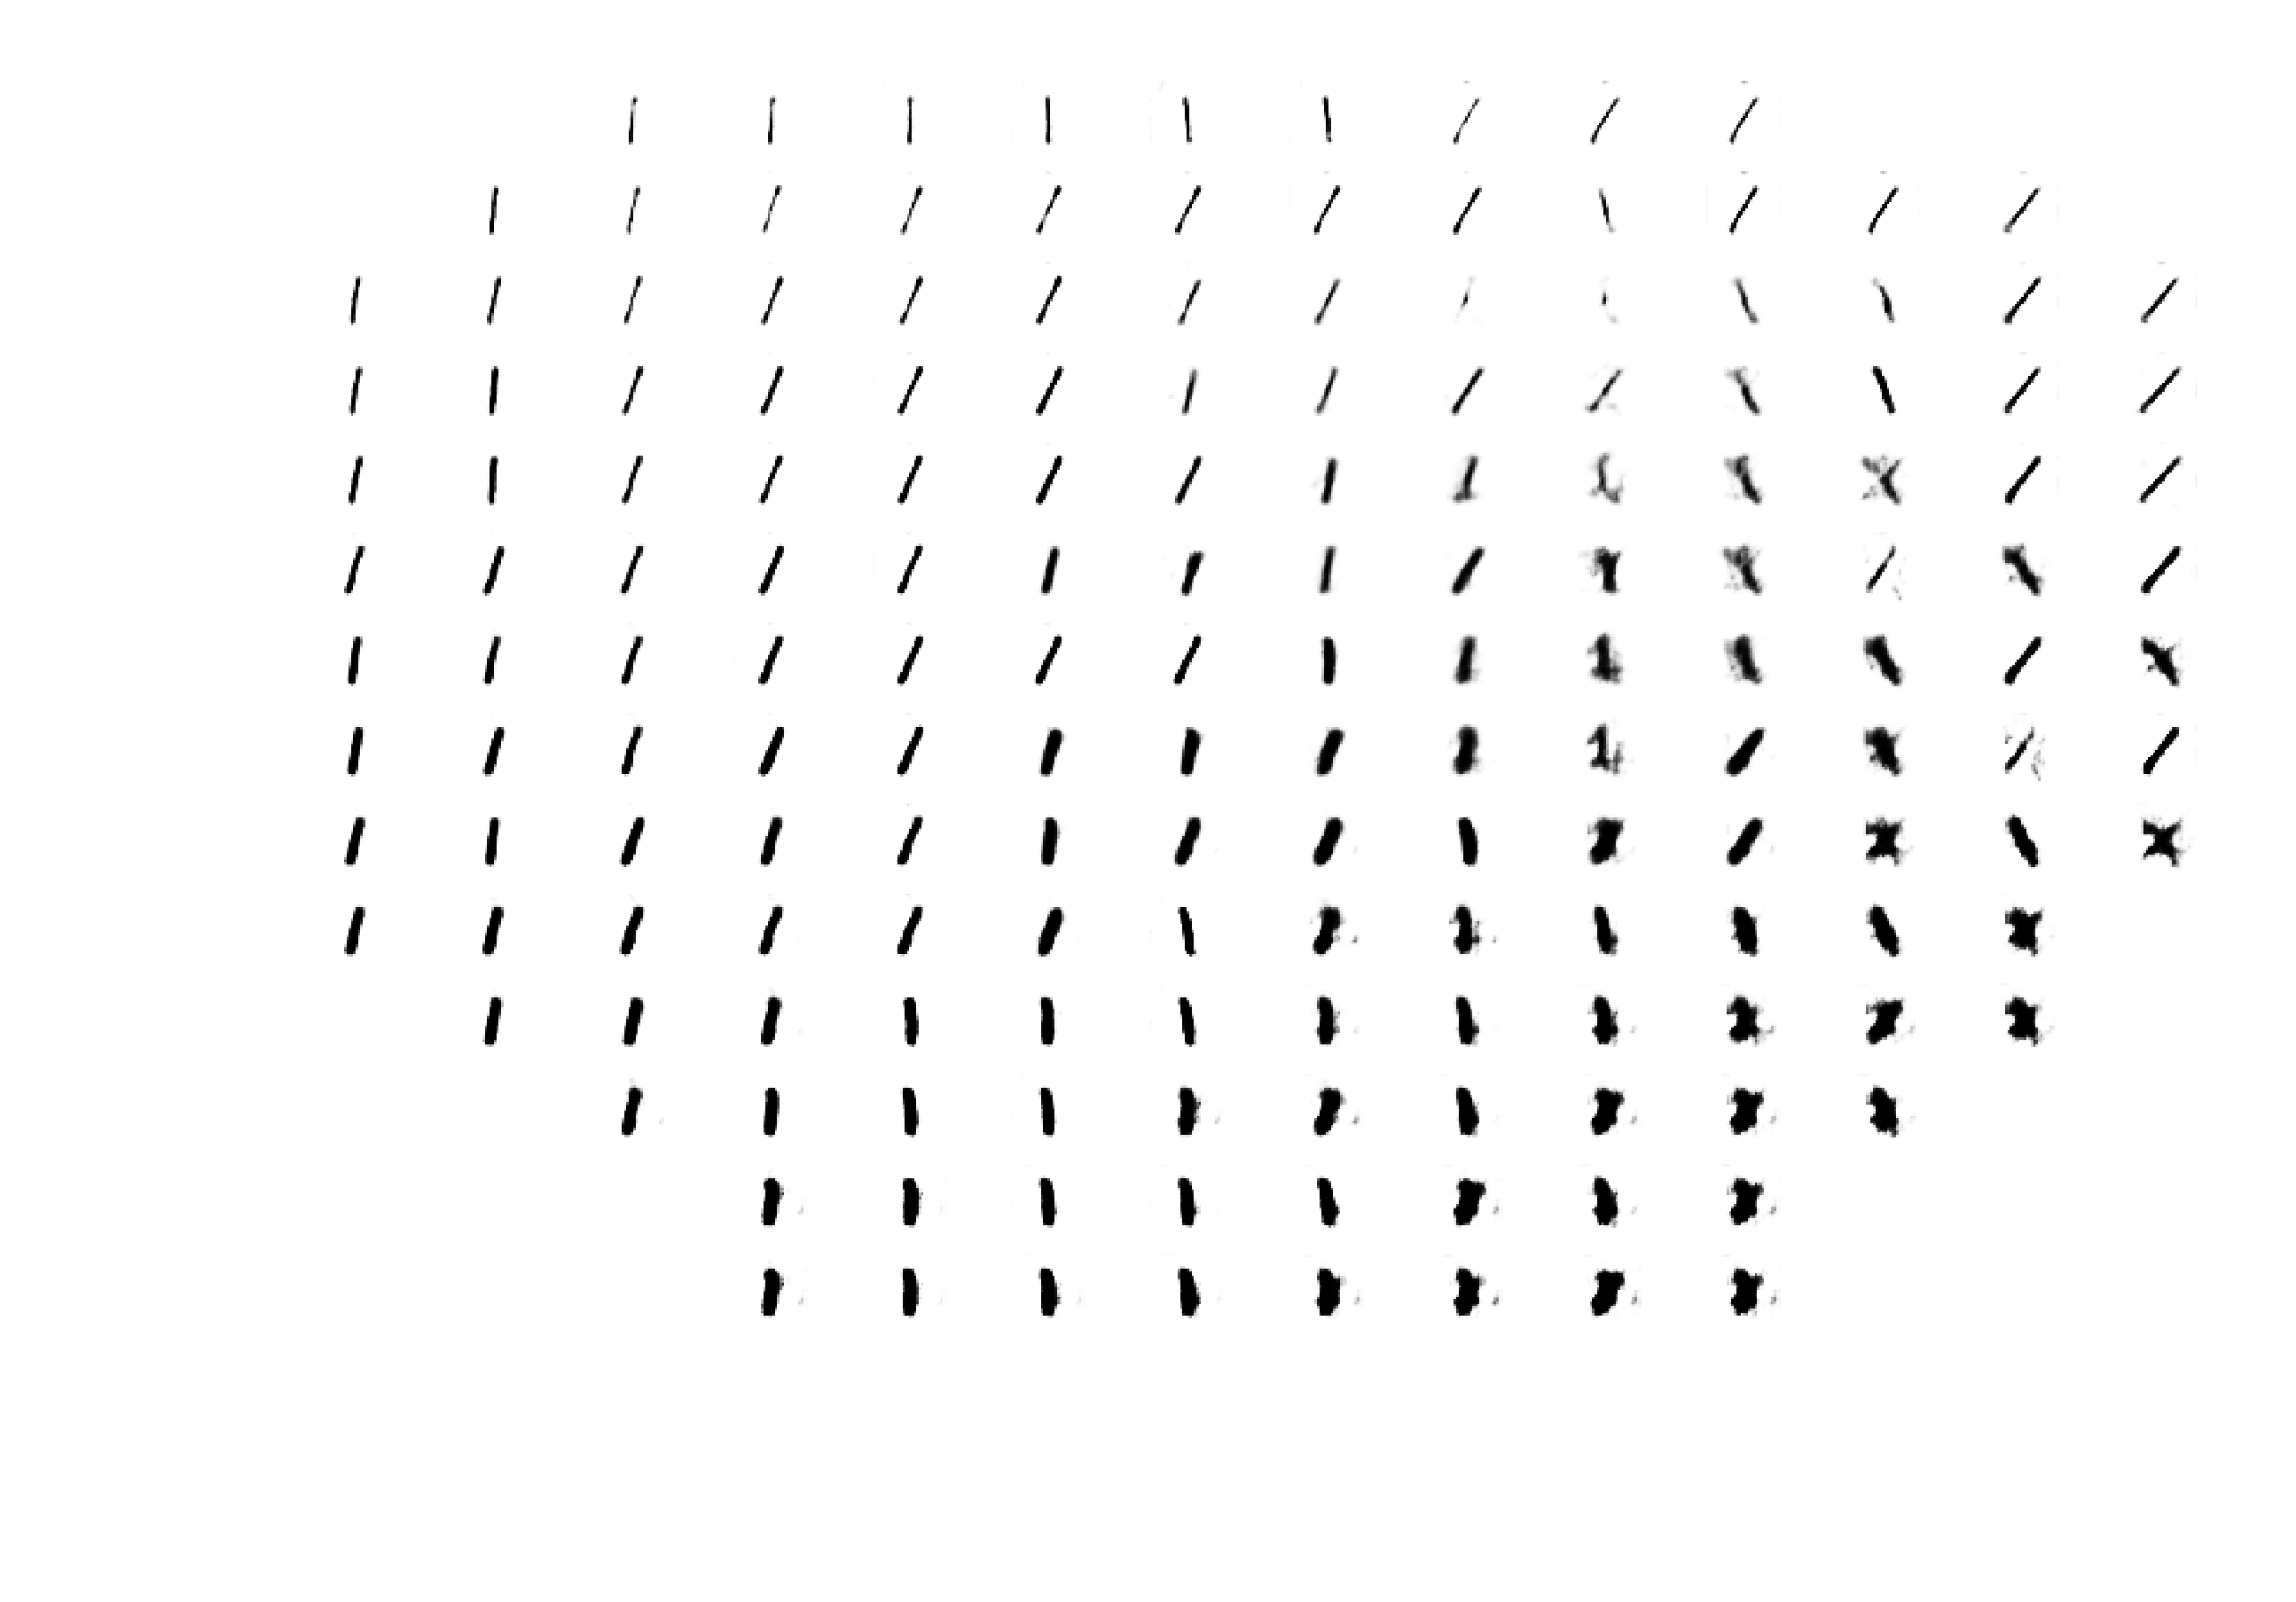

In [40]:
# plot similarity space
plot_binned_tsne_grid(embedding[:, 0:2], embedding, model, num_channels=1, dpi=500, num_x_bins=15, num_y_bins=15, title="")
plt.show()

[[-0.82055467 -0.50777256]
 [-0.20194778 -0.10239026]
 [-0.59418756 -0.71411943]
 ...
 [-1.1373564  -0.38640085]
 [-0.37427792  0.45814538]
 [ 0.19753546  1.36284113]]


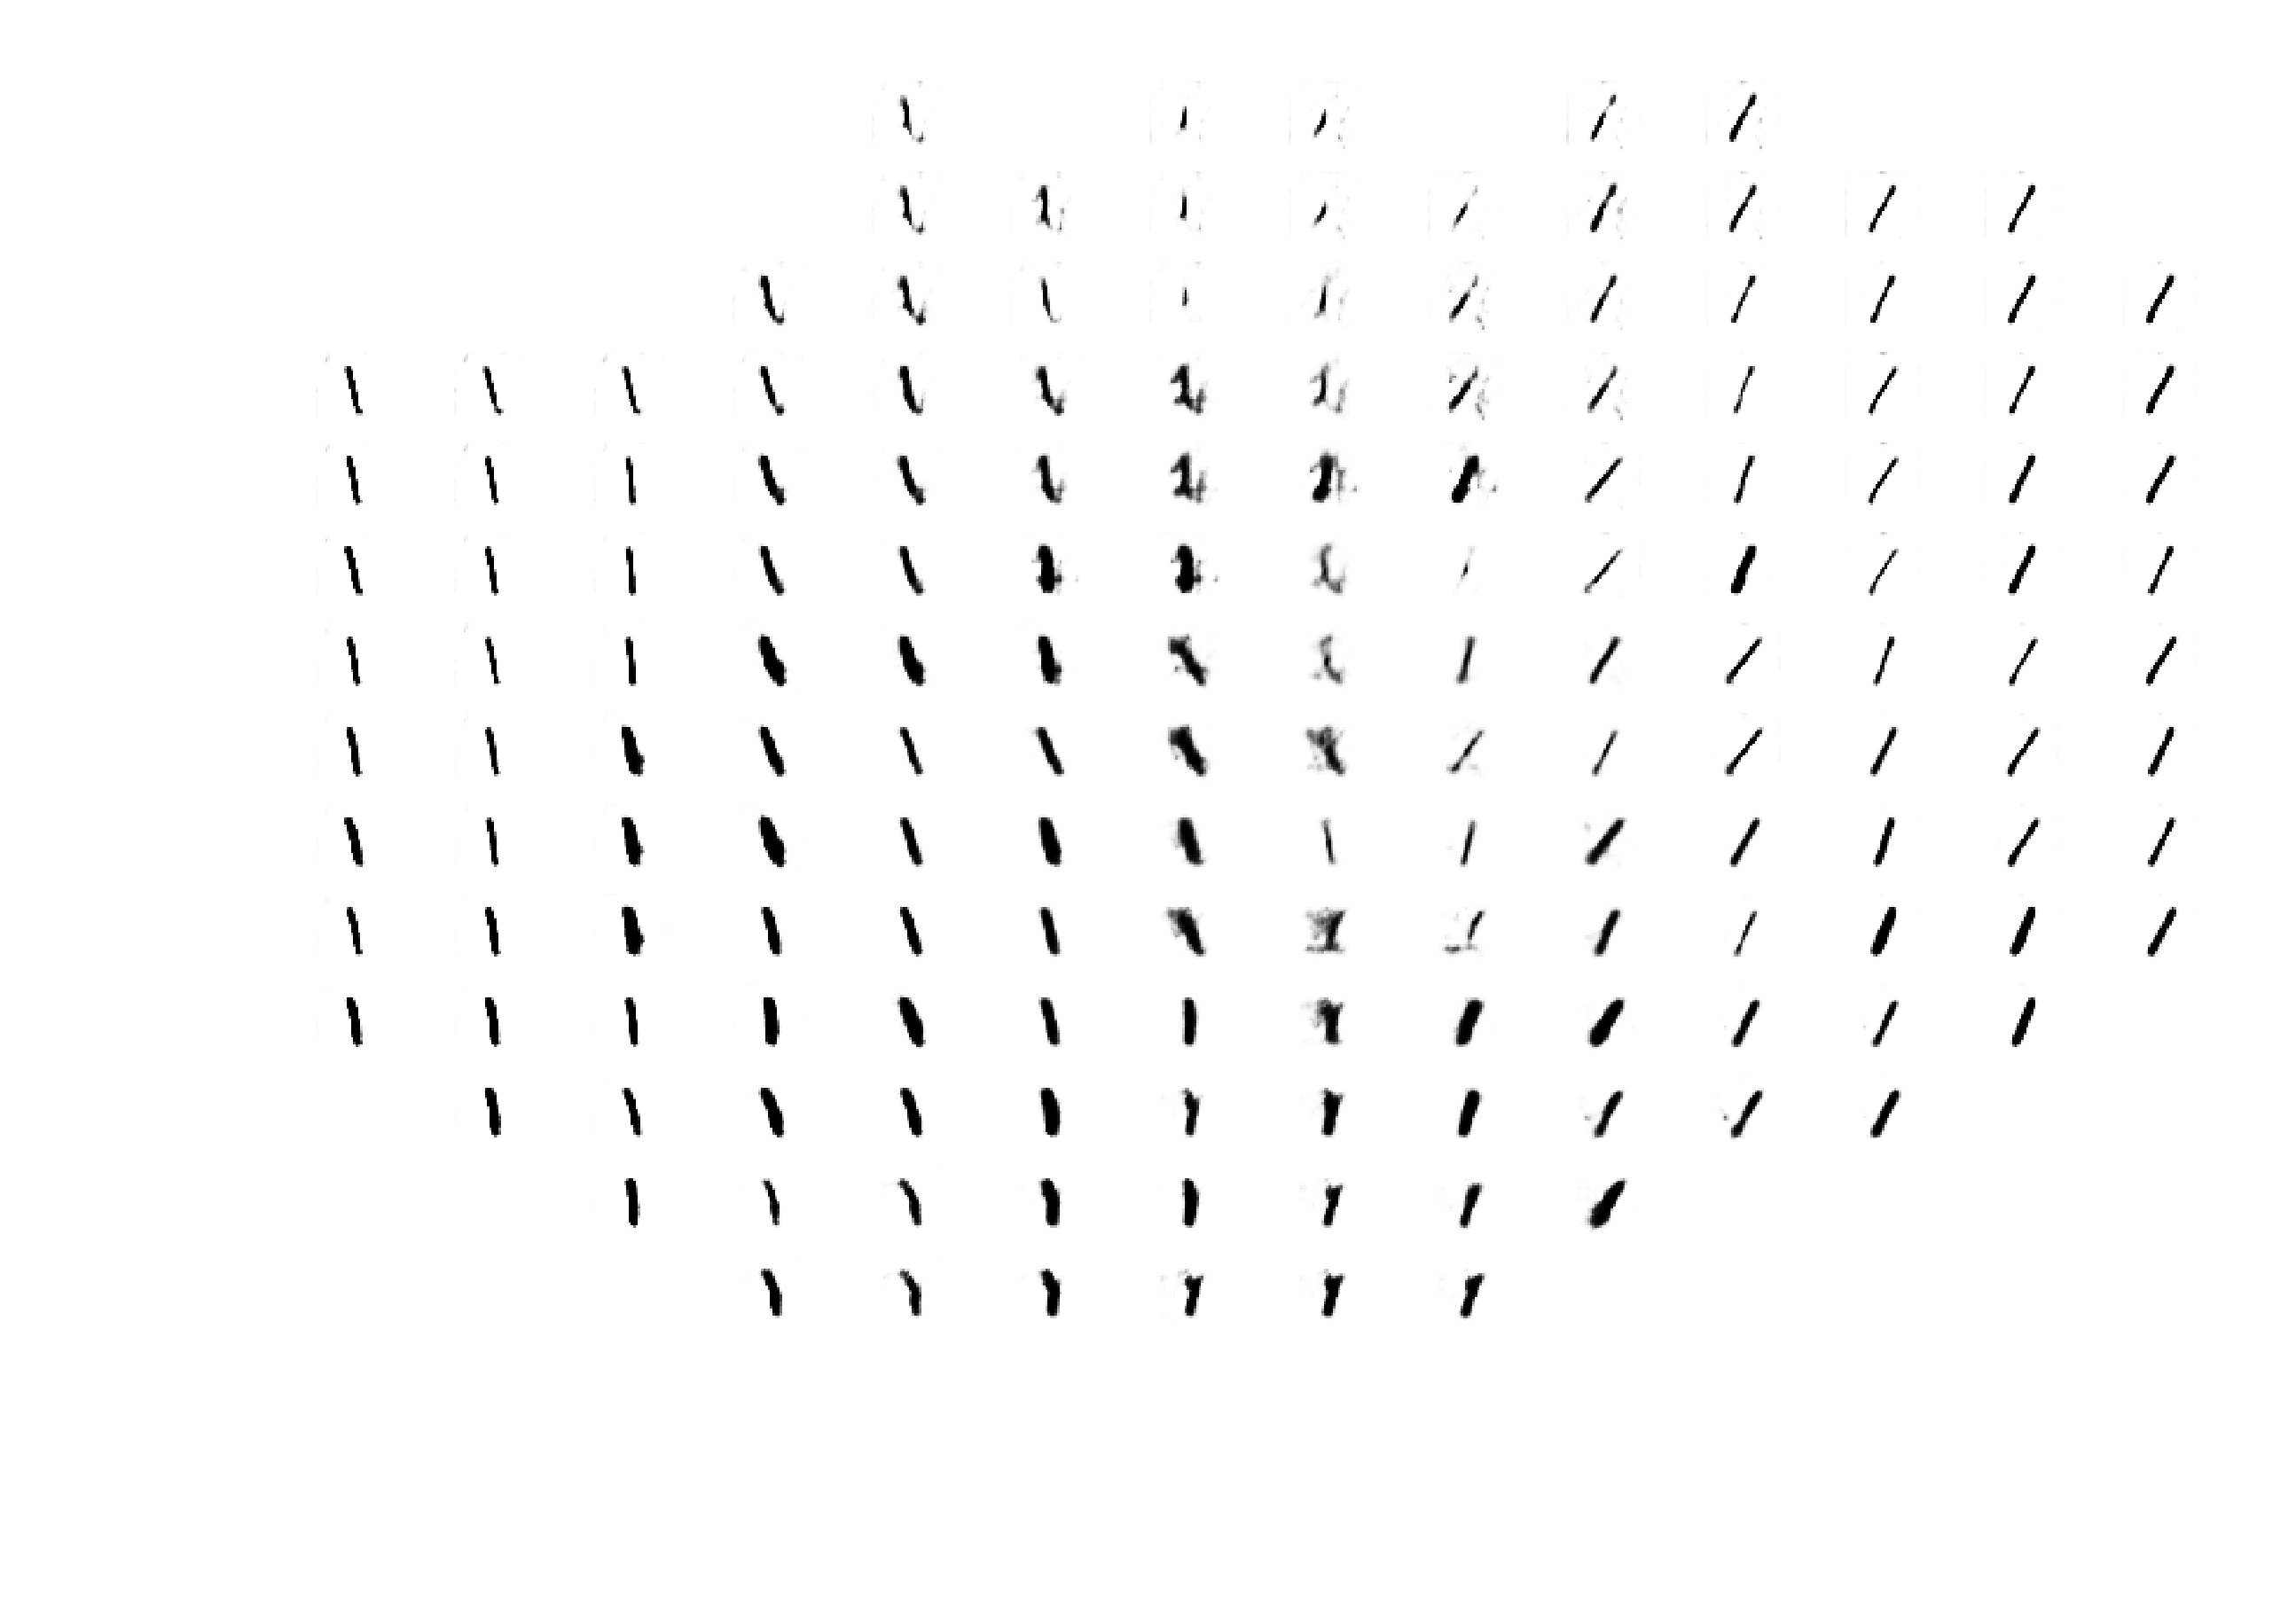

In [41]:
# plot reconstruction space
plot_binned_tsne_grid(embedding[:, 2:], embedding, model, num_channels=1, dpi=500, num_x_bins=15, num_y_bins=15, title="")
plt.show()

In [ ]:
# plot the loss over time

In [ ]:
# plot the metadata loss corresponding to the localization rollotus

In [ ]:
# plot a grid of reconstructions

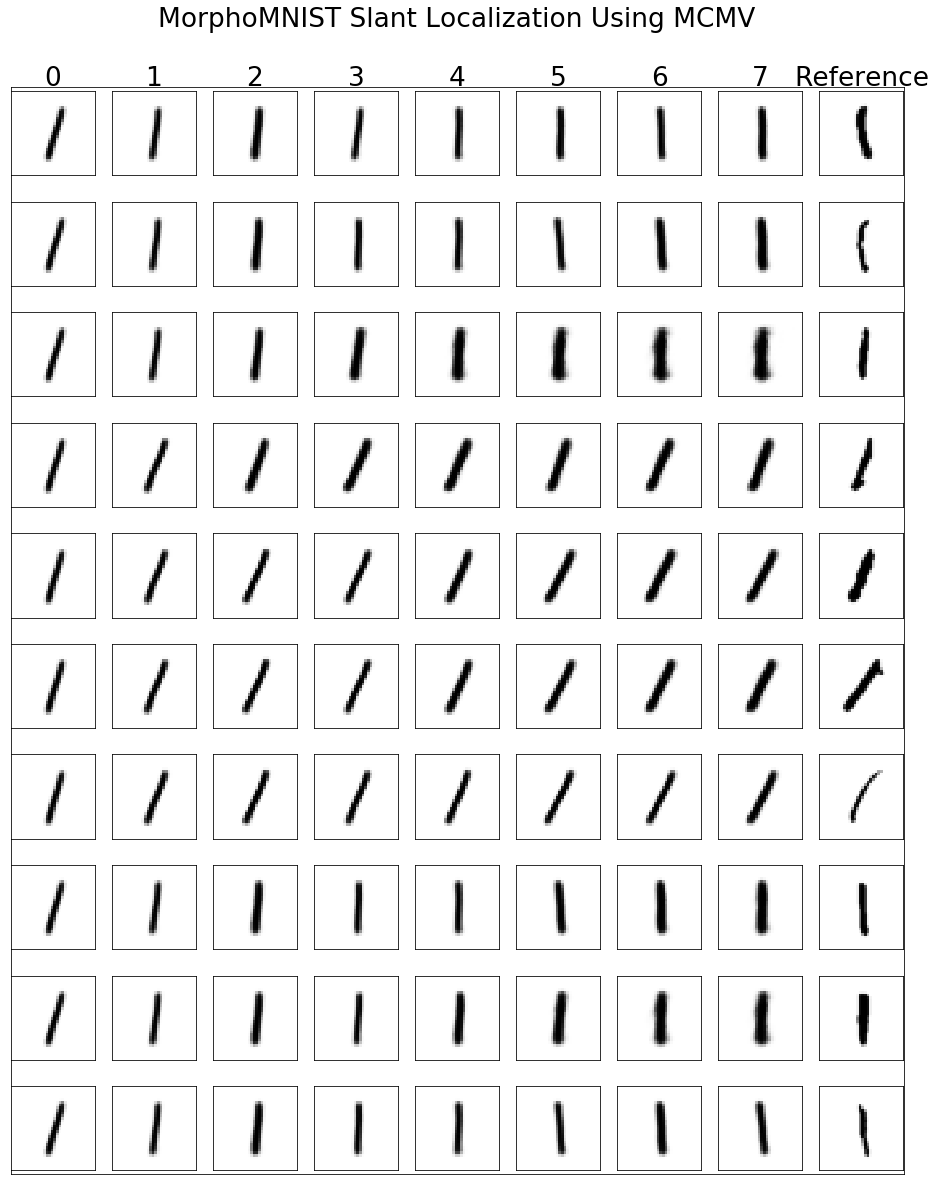

In [26]:
# plot a localization path
model.eval()
num_localizers = len(localizers)
num_queries = min(len(localizers[0].posterior_means), 8)
fig = plt.figure(figsize=(2*num_queries, 2*num_localizers))
plt.title("MorphoMNIST Slant Localization Using MCMV",  y=1.05)
plt.xticks([])
plt.yticks([])

for i, localizer in enumerate(localizers):
    for j, mean in enumerate(localizer.posterior_means[0:num_queries]):
        ax = fig.add_subplot(num_localizers, num_queries + 1, i * (num_queries + 1) + j + 1)
        if i == 0:
            ax.set_title(f"{j}")
        # decode mean
        mean = torch.Tensor(mean)[None, :]
        decoded_mean = model.decode(mean.to("cuda")).cpu().detach().numpy().squeeze()
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(decoded_mean, cmap='gray_r')
    # show reference image
    ax = fig.add_subplot(num_localizers, num_queries + 1, i * (num_queries + 1) + j + 2)
    if i == 0:
        ax.set_title("Reference")
    ax.set_yticks([])
    ax.set_xticks([])

    reference_image = localizer.reference_data
    ax.imshow(reference_image, cmap='gray_r')
plt.show()


In [ ]:
# plot average localization paths

In [ ]:
# plot morpho mnist dataset morphometric distributions
# I want to know how low should we be able to get for different features

## Metadata Stats

(6742, 6)


(array([  2.,   6.,   7.,  13.,  56., 148., 345., 581., 712., 711., 732.,
        658., 723., 698., 576., 435., 219.,  96.,  22.,   2.]),
 array([0.        , 0.08653993, 0.17307986, 0.25961979, 0.34615972,
        0.43269965, 0.51923958, 0.60577951, 0.69231944, 0.77885937,
        0.8653993 , 0.95193923, 1.03847916, 1.12501909, 1.21155902,
        1.29809895, 1.38463888, 1.47117881, 1.55771874, 1.64425867,
        1.7307986 ]),
 <a list of 20 Patch objects>)

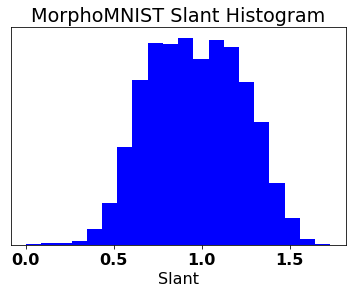

In [45]:
metadata_dataset = MetadataDataset(which_digits=[1])
print(np.shape(metadata_dataset.metadata))
plt.title("MorphoMNIST Slant Histogram")
plt.yticks([])
plt.xlabel("Slant")
plt.hist(metadata_dataset.metadata[:, 3], bins=20, color = "blue")